# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
import base64
import numpy as np
import matplotlib.pyplot as plt
import cv2








[137  80  78 ...  66  96 130]


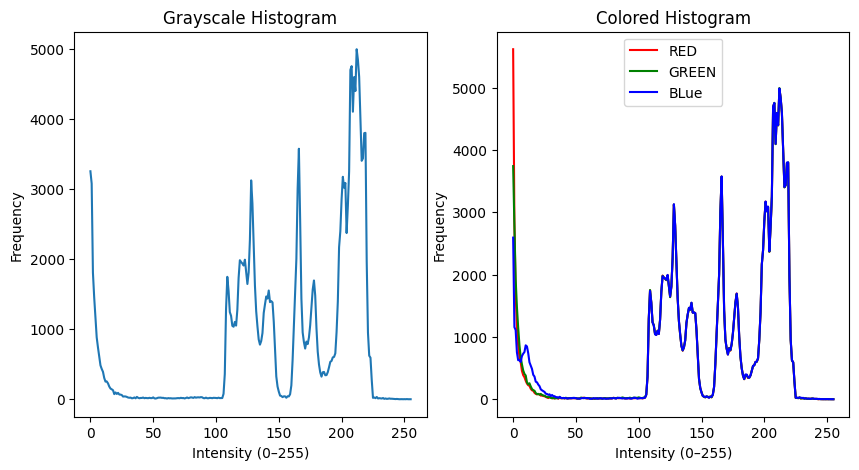

In [ ]:
b64_str = """iVBORw0KGgoAAAANSUhEUgAAAgsAAAGECAAAAACdOjyCAAAgAElEQVR4AdTBC4Ik10Eo0Yjc/64ez4CNsY2NsLQXMrg3s7L+1V09M0LmHP+fmZmZmZmZmZmZmZmZmZmYmZmr2ZKrLZmZmdGSmZmZmZmZmZmZmZkJmZAJmZmQPJU8kpjkC5Iz4wMGQkhMArGRKbkVyMckJhkC5NciJCQkxOA/8YnkBTmJ98hbDIQYjI0Q92QTG/m1GGB8QKa4ZVyTt0l8QqbYyCGekikGGSTu+P/ZhTwVyHOyi7PkNfkC44oZD8zM2JiZmZmZmZmZmZmZmZmZmZmJgYGBgYGBgYGBgau4ioGBgSFTYGBgYGBgIGFgYGDIRfIFBhhnMsWn5Cn/SaZALmKQKUCeM+4EchLyhLzFuGY8kk1s5PvILgRCThKIa0IIJFPyRPLrMcD4OnnK3wExSYBM8UjeEJNMgRCDTCEnxoeEAHmbMZgZg5mxMTMzMzMzMzMzM1tWEzMjMzMzsyUyMzMTMzMyMzMxMzNzXTIzMzMzMzMzMzOTTSZkZmZmZiZk8kDiu/k7ICYJkCkeyRtikimQmGQK5F3GJFPyIJAbIWcyxSR3kkNyx3hKwjiTQ1yRK4F8nfEROUteCGQTcit55O94m3EhZ/GacUO+nUwxSYCcxZl8RIZApkAeBMg9iUcSt2SIM7mISb6XmRmDmZmZmRmDmZmBccXMzMzMzPwd/8sMhHhNICSuyDUjkGtCIMQgb5KzmOTrQp5ICBlCXpBd3JEp7sgN2cUtiZ1xTYa45z/zj8d4JHfiRDYCARJ35Cw2ckhOJCaZ4kw2IckTMQjxIXlH8hm5ZXzIuGM88F84hPwgMcl3SS4E4gPJEIL8KgyJjQwxSWyE+IQxyZQc4obsYpJDciLXjA8ZVwJ5wn82MzMzMzMzsyUzMzNzFVdbchUzMxIzMzIzM7MlM7IlMzMzMzOjJTMzMzNxNRMjMxMyMzMzMzMzMzMzMzMTAwMjsyUwMDAwMDBaAgMDAwMDA3lOCMLAwMDAwMDAhBBXDOQsGYwzS2OSuCKB3JBkF5NMq5wJxMZA4kyIE/+FD8mtQAIh5CSQXdyRKQZ5KuSBxA8gZ7GRFwL5lAxxYZwlrxgIsZMPJG8zkE28IMRzEgf/lYSEhISEhISEhITEgISEhISEhISEhISEhISEhISEhISExMzMzMzMzMzMzMwMzMzMDMzMTMDIzMzMzMzMzMzMzEzMyJbIzMzMzEwMXM3MzMzMzMzEjMTMwMzAzMBMwgyQe8lJ8iH5QEyCEB+QIS78V36E5NsZZzIEchJyEju5EvKjGF8nxIXsYpKnEiQm2cTBQJ4KGeRX4e/5UMhTCcQkgcQgQ/IVxhPGK0IghLGT34gZV8zAuGJCnJmEkJCQkJCQ0JIZLRmQmIGZmZmZLZGZiYGB0RIYGJmZCRgYGBiZGJi/50MhdxIIJHYGxiQQ8kDiBeMsBnkqZCeBEEhMMsUkvyUJjGtCXAiB7AIZkgsZQj5l7GSKM9kEGBshZIgz2fh7PiEXIQTIWZwJMRg7+bLABJIhBAlCfgw5iROJa3ISk0wxya9LEpLAQBISEloyM3MVMzMzMxMCMzNXMQMzM1siMzMhMwHz93xKIE4kBjmJKxIXEjfkIgZ5EJhAAiG7QH4QiQ9IvENuxUZ+AAkMhDiTW3IrgZArgXxGyD/wBon3hbxHLuJCICEQAgnkf4fEV0nckA8kb5O4I09JYJxpQIDskmshF/6BfzwGCATGJ2SKM/lI8lUxyRRn8h3k+8mdkBtCIS/JLtA/8JIQg0CcSMhFgAwBEshJIDHJVxgg8T3kqQC5E8j3CuRt8lzIBySuSEyyCUwgdgIhJFPIE8bgv/GaxCTEiQRyFiBDgATILsCY5D0JJJ+KSf7vkmcCGRJI7klcMTYyBRgSBwkkZApkF3IwBv/NzFXMzExczczMzMyEzMzMzMzMzMzMzMzMzMzMxMzMSAzMSAyMzMTVlsxczcTMzIzMxMjMbMlIzFXMzGTIzMzMzMzMzMxMrmRmZiZkQmayyUxuZGbynSRAIAnktVjiisQtiU/J5B+ZAmMn3yI28jYhBAIhITYSGE8ZJxJnQmzkIBDfReIdEk/InZBD8g/FP5qRmZCZmJmZmZmZmZmZmZmZuZoJiZmZmZmZmZmZmZkJmZkJmZmZmZmZmZmZmZmBmZmZiauZCS2BIYSBgYGBgYGBgYGBgYGBgYGZgYGBgYGBgYGBgYGBgYGB3AsBCQhBpnhJ4sLYyBTIjZBv5R95i3FLiBPjNRlikh8iDjIkZwkSSHKIjfx6Qt4lu0B2MQmEvEdiMpBNgGwCIQ7yKf+dbyPEO2SIe3IS8qk4M+7JIQQDiUmIGyYkJCQkJCQkJCQkJCRkICQkJMTGhBiEhISEhISEhISEhMQYzMxVSAxIzGjJzFVIzFyXzMyEzITMzEzIbFlticzMxMzMXM2WzMzMzPx3CBlikl2ySV4L2SRD8i0MGRLiGwghEMgnZIhrEoNcxMHYCTEJcU2IQSCEAIHkmUA+JgEyxIlAyCF5IvkCgUAI/wQhQ0yySz4UcpG8EMjnZBPfxAAJkBPjIAnEJENck9iYbOKRxE7ihkmAyRSDBLJJNskm2SRTyCbZJAYkmwTMzMzMwMzMzMwMlsjMzMzMzMzMzMxsyciW1fwTBAJxYSAfCblIEkjuBMgnhPhR5OuECGUT38OYJOQsJnki5A1C3BBikiEQYqHkPRIH/8RHhHhJhhgMEOIj8oKUfCCuyJuEQE5ikO8RMiQnIV8kxCS7QKaYZAp5g3FNWF0oOYtJIOQD/onnks8ZO2MwPiTfKK7JSyHvkCkmIQYhdgIxGRiTxCSxEQjjRL5GNgEyxSRDgMgUXyMkZzEJgdwJOfjnZAhkislAPmXsjLfJHQt5EE9J3JBACAmQKyGfkHggMRkYF4lxJsTBmGQT8kPIIfmABAnILs4kQO4ECIT4Zw7Jb0am2MkUJxL3BGIjU1yTNxhnIRACBrjKSXLmKpB8Sj4TyFOyi3tySN4jcZApHgn+2czAVQzMZJOB3Mlkk9xINslZcid5JEOcyBAHiVstQOxkiGvyTUI+kUDyFvlIIM8Zz8mXSRxkiCcE/8Ih5BMCSYAEyBSTJEMgBAghQ0wyBfJdAvlGcpZcC+RGDHISAgkkvzH5IpniFcG/mJkZmZiZmZmZmZmZCZmQmZmZmZCQLZHZspqZmZmZ2RIbY2NsjI2xMRIwpsyETCZjY2yMjbExNsbG2MgQGBtDArmRAbILhBiMQb6PBMijQD4kxB35Pv4FJAbjljxjvGJIHBJCnpA4MwYJkCluGWcSO4lBiEfyMeOBDIHE5+RenMmQfEZOAvlN+R+8JCQkJCQkrkJCQkJCQkJLJCSuSGBCQkJCQkJCQkskBrRkRkJCQkJCQuIqJLREAkZIQkJCS2ZmZmZmZmZm4mpmZmZiRrZEZkuuZmauS2ZmZrZkZmZmRmZmQiZmZmZmZmZmJmYmRGgmZGJAZmZmZmbiamZmZmYmBmQmBmQCRmYCBgYGBgYG5n9wSCA5k0NMQmBMcicQLJBNnMn7QgIEIU4kPpWcyWAQBhIbIfmMMSRDyAcMAtnIJibZBAZyYgwGAoFMYSCTJYeQQK4E8j6ZYpIhJrnwryQkJIQkJLRkQEJC4iquQkJCQkskJGYkZgYkJCQkZmZmZmZmZmZmBmZgZmZmZmZmZmZmZmZmZmZmZrZkZGZmZiZmrmZmtmRmZmZmrrZkrmJgZmauS2ZmZmZmZmZmZmZmZiZmZmZmJgauZmYmYGBgYOBqSyRgYEBiYGBgYGBgYGBgYGBgYGBgYGBgYP6VlyR2Eu8QCGQTd+TrknckJ4HckHiH3IlJQmphihP5Ogm5JUNck11yEgiBHAL5ofwbP57xlJzFJC+FxCSfi0fyFcktiTMpuWVMEnKRfEyISSYTYhcymBCYkBCYgZCQAZKQkJCQkJCQkJCQkJCQkJCQkJCQf+UgIXdCTgL5RjLFHZniikBMxk528ZRAvCSQQLJLdnFNbhiH5DUDIQYhdjLFJGcJEpMMgRwCGWSIk0QC5BAY8kP5Nw4SciuQISGQOxI3kqdkiDsyxTUhIJY4MRDiKYG4MC5kSgjZBLKJG3IRsotBnkigJcAYUmInU2yEkCFEVmQQYiObQBKTOCRIIAkJgQkJCQkJCQkJCQkJCQkJCQkJCQkJ+TduyZQQN+RGQhhnci1AIElikgfpKiCbuJAIuSYxGVdCYichd2SKG7IKJAe5F2fJHSGQp0IuJE4kdjIFyA2Jg5wkg5yETCE3kmshh1jiRnLhT/GMEHfkSkhsjI3cSiBJXkqSO7IJQj4XEhfyngRiIyCbeCLkJdnFJEOAxEaJE4kbIfJICDkkB4mDxIlMIYdALkKmGARCphDwP4FAfjSJM3kQQkjySiBPhJzFJFNAiHwubonxSmzkQSD3JK7Ja6FchOwkkF1s5B2yCZApBAKZAoRApkDwJ+KabAK5E3KWQMgzyWuyCQxDYpCzYpAL2cQgxCsxCMiD+JA8ikliJ3HLQC5CDiEPhNjIwbglCYTckiHkSiBnyS0hdsYgJ3Eh+J88YyA3AuQshARCTkKmZJMkEBu5MDCshRhkiOdkE5PElQSSKQZD5ErcCZlCDoZMcUdiEohbhlwEMiQB8kDijtwzLuQkkBOJE7kWckOCZDDOJG75E4EhCSQSG5nijkA8EIidECcyxBW5lpxIHJJbMgSBkPGMgYQIxElyklyEJG8TiFtylhAIcZC3SIBMIUNCICdCyDNCTAIBcghkCDkLecL/gpgMCTF2MgWBIcat5Mx4k9xIHgTIE/EhAwy5kTyT3Ar5VRkXEpMkgWwCgeSWPBLihgGSQMZGSCB5Khn8yThYLNyJg3EQ4kyGEIhJ4iD3hDCQIeSJ2MmVeJOchEAyJPeEuAi5IyQBMsUdmYJA7giEfMYAOQRCyB25I3ERsjGMC0kgNnInBPyJM6EWLuJg3BAIkIuQV+RWyB0DhBiM5MzYBQIB8jGZAoEYhEDOYpKzkCckPiEQDyQmeZ8QKSE/jAHGJMQdwZ+MbMl1yczMzMzMzMDMzEzM1cTMzEjMzMDMzMzMzMxsydWWXJfIlszMzMzMVcxcxcyMzJZczZbMzMxVzMzMzMyEzJbVbIlVlszMXEnEzMxoyczMzMzMzMzMzMzMzMyWzNXMzJbVTMjMlsDMzMzMzFyXzMzMxMiW1ZbAzMDMwMzE1YSETFzFgMTSaAkMDAmWFQxdwcDAwBXFn4xkI1PIFQlIBpliEAiZYhAI+ZwQGwmQKRmSKS7kXiABsouDQHIQAoyTlCEOciXkx5BNgAQScitkCEkgORFKYyOTcRDiJJGQECkQSAghZDLAmCSSK4H4k5mZkJmZLbkumeuSGZjrkpmZmLmamS3RkuuSGS0ZmZiriZktuZqZmZmZ2ZKrgbiCuS64mpmZmQmZ2RK5Li2rmZmZmbiaiKuZmZmZmZmZmbiamUCIqy2Bqy2BkYCQgYGrmbjaEhgYuNqyioGrGLiqgYErGCyBgYGBDKWBq5hMwQJhDLFEJgZIrshgbGSTsTFAdqFEaGDJFEgM/hcH44ohQzIlkJzJFCcSGAeBmCQm2RmfcEUgecKYkhPjnsSgxGckdkIIgQyBISQQS5zFIBByJZALY5IhDvJIKJmSQYZAjF0IgWyMBzLEE3ISskmmQAL077wkQ/LdJAYhCSFjMCEhISEhBiGzJRISEtISAhMSEkISEhISWiAhIaMFMhIQEhISEhJaYBUSWihlVVYBIy0BqQWSEhJSEhIyE1chISEhMSEzIKEFMjMw1wUSA7Ilo6VlNXO1JTMzMzPXJTEyMzMzMzMTcwVbMjNaMjKzJfPvfEx+AGOQIWSKM5lCpkACJDROQqY4kYuQRxIbIXbyRCAbITZpJEPItZR4QoZkCLkjEAJxQ3YhkAwSSCmBQBJCcicQIZ6QQwlyiAsBf2ZKSEg2ySYlISEhISEhISEhIaEFkjIQEhISEhIQAhISWiAp2aSsQmJCQlILBCQkpCEkrEpCQmBCQkLiKiQkJiSsYkJSAkJCwiogpQS0wKokrAJSAkJCQkJCAkYGsklMyEzITMhMwNXEyJbMzMxsWWGJYFnFyEyMxMx1ycyMTGjJzMxMyMzMhJbIzMzM/JlDYpwEMhmTJMQgT4QExiQB8o0kICXOJCBkEzIIAbKLnZC8JsQgU2wkJgkwkIQkdhKTEYOcyBTGJAG1gBwCBOSBlAiRcgihpVhYAUGIjRDIWTLEYCDXLDF2hgQkEEL4C8S0LsghLWRIjIuMxVUhJotJooVAAhliEEKmkJaSkJMEiSkGgQAJeSJk44oGCHFPCAnjICQhm9jILsCQMBCIFgZXBGKSO7GRIYSQKxKTBBjIEgRySIZAQEihBEJ2gRDIiYQlt2QXIDEZyCZAdkbgLwQkKRAbIQRCHrRQQshZiBBggKyCcRACDCRArsUgm0AI5FoMQgwyhdxIrhh3DDBAIHZyEoPENYmNEDcknhEC5GBMQmCAIQZIIATIA4EQQiBkCORM1iXuCMQjGeKevzAlLUDsDBACgZApEEgCqQUIGSRCQnbJU2nJmUDsZAgQCIlXZAiEQDaBXLHQ/14YYpCnjEEKJUKmZBPIRWzkQchkXJET2cVGdgkYkxASCIFCnMiQDAGSbIwHySsS9/yFKQEhdpYIgUDIFAiBydAS10ICQzaBXAsMSc4kDjLEIAHGpyRODCR2AgGuCsRGSK6FbKTQCGQIkEBuxE6ISXaRILvkRK4ZuxCQQKZgIYYQIdnFoAyBEAeJpeRGIO+JQX9hCBkk7giB7GIKTYxAIHYCAa5i7IyNEBALxCSPYpCPxSAQGlMyWUocjE2CcUMOISeBEBLGxhBikF1s5F7sDJBdck2SB4EMyYVsYiOGTDEIhAwtIVPckSk2AslJ7ATCnwVCSIkrIRKD7GIIDSFCDhIY4CpDIhA7CahlaZVBHsUgQyglD2Ij1GJMgYClxFlKGWIMCSQgySaQXQiBhIGBTDHIJ+KK7EJOQgYZQizZBAIxSGLEArFJ5I4QCLWQMsQjITZCSIAQu4UIf5ahYCFAViWQQHBdWJdVDq66IlMgmyQkCSEkGWISaAlICzlIHATCOEjshACBQDYJhJlcSQhklyEBsmlhCiEJgUCISViROyEXxk5IYgo5yCauyCbQOBFIXJGQIQSMEwkIlE0ISEzGTlYRaKklDglIIMRJyGAY+TMgKyxBuDAUYAzSwuqqbEJwFUICIQYN/G8NIeRKCC2rkBAGspMpDsaF7OJEAmQKJITYyRQSIJsMicEEkp2UgMRgHFxBboXsArlmDDEkSiCbuCKbQC6MCxkCIbkI2QkxiKwMQrQQEgJmCIQ8JQVyln9HNsnQggQEQmCSYSABMgUYZzIlIYQMIVNIGJLEJCcyJYWAcSFT3JFNYAirHCQwHkiAQGwEQp4KkJBDIJuY5F5sNAbZhHGQTSA3jGQywABDSKYApeRMLMCA5EImA+QkEOIsJQYh8O9gLKwtEoQkkzFkmFAKhKQRspOhhBYMVyQ2MsWQYJCADEJcC3kgBCFDMskuSCm5kkZyQwKMCyFAIAYhJiEGA+x/KIMXZMkNxLqCedDa/87EGUdIshdj4hpA1fs1OVI4062R+U2+y1wmYshc8mUxTYYI81h+CnOrmUaaW5ZNmi9ZLiOXhomR28TIjrn0f8hlOzAv+bROx2jkch7bsTblQ+aymGMy30ysCZPlkvmQxTL5MISRlwl5m78Yjg2ZsGM0l+bTyiyXhuZDZ35qaG7Lh0ZuI5chxJC55Mtii8wtL5ORx/KIeQnzyMtiuTXLo7POvOQyv8m2wjFL/6ftcJLJ8siHNW1yyVyWNsllaHJZJppHc1tYE6bJyJBbI8vIXBpajLwsj8xj+WZkmktGLiOfWi5nmgmN5ctyG/mLRfOhxhBzqREjhnwzmVvmU+YRi5FL5tIQi9mBaeTL8rJMXjK35W01m9Qy6X9nbnWumLZD88Ma+bDcwjwWGbKYS7aQl8llXmIueWtojDxy5hEjt8lccpswL00u82nyISaW28JcGjFivonzcFsemS8xoc0jL5lH5pa5xFzCvGTIvDTyV5NHLCbz0nyJ0WRislwmQwy59L9lRFutUyw/rWVpbkOIeRkxuTWLbCGPEfMh8xIjb0NuOzb5V3IbYT5lxDwm361MXpp5iyHzJbbcViaMvC3kNo/cltGQZsncMrfmp+atduqY34zE0GhuDc2HMKu5ZZom83bMrJj+qwxpq3WS+d3x59Hpy8qn0cgthsklt3mLkfmrkS8xZJoP+e/MS97mLT/lMpcwL43lQx6TLbfF8haLrTyaD/luyZb/DzGaW74ZDkNbXjI6hRGL5TK5dGpymfzUf8WEJmzqJD80bciHXIZ8E86YXGI65Zb5W5mR3+0wzac8htxGmnmbwzya2xJzyW3FXOZglktm8j+YvMQ88ra85bvl74z8C53FPPLNkMfIo1kmjIy8jFjTZG6ZiLn0nzWPJpethjzmJYyaySNzyW+WL/NIk/kbuczkMvmS1TzmQ0PmpWXe5jCP5bZkPuQUYoTtwOTvTD5lFhoxj4wweYmhLRpqfjPkZcLy1oi55TafclvMI0PMpzbJyCwLI7fcGuk/ypaQecmmhjmYW25thBFTzMp2MJZLbDUvZR5DzsNbbPluCMulobns2JT5bjtkPg3JjBpTLnNZYohpbsstTHNrjk2yKfNhorksL8skzEtuzW1hmZCXEfMpj0mGzK3R3BrayEtsubUVWy7LY5KtbMp8iP4zTslyWS6Zl+bSPGKal7ysODlchlw6CUMmb3NpO7wsJp+GTEYey8Ryaz4stmTyNuQ2hDlsmdyalyaT+ZBpLtkSNiSfRprL8mnJZW75YWGNPHIZmS95TDRkPjS3hmb5Zrm1lXlZbhOa3y2X/otNGHlLNspM5ptYXsJyG2G5hWGxfGpYWea2mEcYojNMZExuK1u+iU0mfytMNiGP5dapJnOZD7E6WWVTmA8NmUdtxMplXjK5zEumkX+pWTHkh7nkS6O5DWkubWnaYrlNXpZmNbfG9J/NkFPyFua2suXTkh0zQuaSTQ0ZyWZpPuUy5DJiucwts7xkLrnMajSZfFqyheWHCVNs2RI5HZhLnTtcGnNpRjFWOzuyPw/NJZafdrStWGFMVuaHjJiYS37TLJlLXuZTvol5nJFs+dAWy22OsVia1dwa03/Od408wmzF8rJcspglhpopm+Qyl7Yw+WFqPoT5acJCc1n+hbCwRi6TucQop0xu/VmZR5OFeTSbw21lU4yYt8wtL82lyWPkb2TEfJOfli+5zaf8raFsar5bbhOW3zWm/9jKraGTg02EsWpelkz9KRlTJsx+bavJdpjl0llMbAfjPI7TLWeZfNqKyeSluSxMlg/LZTK5ZT41c+h0bDs8Js4DC81tyGVionaGkZch3+V3sTkYh2F5yYj5NIfJh4mtPMJ8WHnLLCYfsjnMrS2X5TZ5ZEu23JpL/+tYc6nNHH5acovTJbcmnEeb5tiOtuYtG+Vxlnk5y+QxctmOKYawHWPUJh+m2A4TbXlMI2dhiOWylbeRRTirzSW3GJOXyVzK3FpnnZpcMpPmEtkcztyay8KIwzxiaCwvzae2iO2XxwjzdpziVCyXqTMjl5Vth61cZuVty3AgQ/+rxWT5qZFTXuYYGVkuDVlG5i2PkS8jnWGNfLda5hIWI2eZPEYuy8rcJuzYaguZl7zMDrfJQphbFuaWycu85cOOtWXyN2Jk5F9ZxJD/Tswlt8lPtTMxYbIMYS5hq3nJdxND6J/HZNOKYeSSqbk0n4YsTZua29R809xihKHOmtpqRhO2mpcyGdrSyPwUW16aTKblmzgjI5eccjkPq8VM2cLS/BQT1rJMHpnMdxliYTH53UQNk5zkU9sxl0XmkpdczjLRRuaWISxmtWXyIZeFxbzUP5sMYV7ymEwetbmMXGrmsprLan7KxAhDTehUc1voVFsuS5bbYuQy8l2b8hhWxsp3nfKW1Yk4D9NqRgxZ/pXY2a8x+YvJl5hM5i23eQlhSCf51JbbJPOSRwwr2tD8lDW3ZeQtH4aYW/9ojhmHk0ZeFuaWqa3GcouF7WjL0HzI8mHFVnPJZeRLWxkxsXxp3jJLZ7lMXiZzbFlZLEzakJecuTW2aiuz3HYwzSUvy1tnrU6X6AzLl5wO5u/lMpdclh+WS25nhy2PmEuGWCxk3nbMZaFNGiYvK3MpxhBDfxxnGY5NncQ8aufhkhnChIn92lyOzXQ6PBa5jGN0llk5RYgtLJPOMuFMk8coNpm0kZWXueyYxrHlpRGjocZcDmduW8cmJpcYK9NcYjJaLjvYjk63dMqkTW45d2Tm2OTWkFOIIWzF3MLkUlvOjnbmEbPkFJ06zJdljmFCzIQ5zGXKfNgvJ2L0T7OYw+2UtlxiMsSYcpnDlss0x87D8jL5IT+0OvOYMMlMlr+3ZBaWW77ZYbnMLY+Rb5ZJmts0eQtbLsdmJJbTr3O/dh7aar7L3GKkYXLLvDQvC8tjh3mEaRImTC5Lpi1MTbOorS3Mr1NGPjVftg63ecSmRv8wRGcyj2zCHENzyyyX3BYmbxMmv8k3naHtYDK3vCwvc8vbSOaH3ObSyG8aYfJYJnIbQqMRNmFENna0mk0xWb5kHmHyUx7D3PKpydxaDHlZbmHCCBNGGbK2FjtOxcLccpvHYZpPmUtW/cMQzsKUyyYvK2McZoRW54pp8rKw/Ca3eQud5G2Ux/Iyt7zMpYypuS1kTJ07PPJTRm7LW8wtv5kwkhk7OqlpLs0ln5q3jDRf5lKbYr5rdJJMhphbvsQsDZlbzctQW7Qp5kPMbUczsdzaxKz6h5chH6YMmcllCCM7pq2MTCOd8j+Ychl5GxHT5K/mkpfMp8xjWmjyXXOLycLIbTVkNJNHzTLR2pljkxGyvEzNW4b8VfMy+dSWEVaGzId8mQm5LL0dhncAACAASURBVI/m0dSGmtvyu/Mw0bxkyKI/aISRZohmaSbfzeE8RmsutTPE5C8m3zUyLSxMxDT5i7nFSPNpZd4WGZlbls6yRdoytxgyeTRkyDzCsrD5ty2WL1PzFkMLi5FPy6WhuU2dua1M8yG3yWUuIxlN3tZqMp2OGCaPIbdlovnumLb+XSbFMLk1c4khl2kx0VbMpXYeLiN/NflynG1pmszBfGrkMi+ZlxhqXpoll63MpS2ZJiyrLZeY5hZDQ0ZNzG3k0VaMaBN5WyPfZLKwmLf8rcnbyjSPJbd5LIw0l5WXNVqZSywsL5NPyw42tzSLtv7wkh1sua3OHW6LSTbSfGputWkuuQxh5JsMze/CyGO5NLfFarSwGPmy6JRpZGJlx7wsncIc3kY+jbZfzkZMXpqaR5tcMnIec8vfacS0HXas0zHLNJJZRr5MQ26ZuWS5TD7UJkZuU5ZPbZlLPmS+mVt/xITJ5DZNHiN/I8ytNi9hLmEk85uYWy7ziCmbXJoPk0tuzezwNpeYTJZv8rYycu7Ichv5NPIyWl5iai6TySUj52FM8jJiEiNbTdaOUyaTKZczQz4tJt/NMY8JS5yHaS65TQgjlmVu+TuTW//ww9xqzWONOt1iiCXmUU6PMLdYLKO55RbOPNKWD5NbzEvmUwz5MrcsLJ8y5GVpZAxhkbeRyzTSGRNZLpOXRZicIb/JfLOattZkZTK1dWyMfFosP6zMlwzL8lMek9vUPMJ8iPnSH3lZLnNLnW7TyJcRS5hbzEvmEYtpy0tux2zyqC1iLqM85hHzIXbM7PBpxMLyKctya5aXUadY5GXkZahOTGSZzpRhEuZwTmUuzSVGZvJYbcfWjonzGI00nTFymVhMfphjPiyNkclPWUyjNla+TP6qP1waYpNHncKIOUZbbiO35pat5tK8xGIZzS3MYd7mYPkpt3nktpgy0+QtzCNDJiNyehwz+dCUDXkZ0anOLM3kJdOE1SZhDuciRj5Nvlkma83RzmNYzaXFCCPTXJpbbiPLpY2MXKbJhyln2fJhCfOWectbf7i0WKd2jNwmtiO2zjL5oYU1y1tYRiOP+XJg3vZrFiPNZZLvppjbyOQR88htYRm5zS3MJDJkaCjslFva1LAyl0xbmlpmNYez5QxNmcdWrHmLrSxMmFsoNmqTLeRtbi23yaZMlmWNpmnku8mnURuR7RiZZv2BJtZZa+SxmDQ63fJDi2m+5NImowlD5lbMSzvmMbllyHeTDxOTR2ahEQs75sPc8pZla2kylzTOvNSm5tOK8xixsoa2X87jPHYmP02YS9nE8jJiXsrkbbVl+TTyYRpZkzVZo7nkEjZyWVgeU2YR2zE0zfoDTc15OA8jX0bIufKbVptGQx4rY94y8iEfdszyTTK/WW215W35NMmIheUyt9yWT9lasuO0kLk0t1gsl4mFJZflrak/jyG3rSzMLWeZY0zaVm7zyChzy2TIZXJrU3NZppWtyZpMLMsORmNyWUw+Nb9ZLv2Bps7jz8P564wJy225rO1Xp09h1OYSk8fING/5IR/267TM5RiN/MWkGZEht7lMNJcMzafclk/ZKNY82iJza7ksj7nEcpjF5CVjDnObmoxMzjKPWE6Hy7zlcYxp5BRl2+G2mhHT1KbOTCMTyw5nDNHcVlv+Z/2Bps6WtZiYfOqkzKcwwhDLY1mGWL7ktnw6zs4YQltZLsuHUVuW/15D8ynf1CxbZN6yRYxMTG7N5CWcv5zkEVurmbQd/VlD5hJzmRqdDvNNjUU5ya25TG7n0bbENLWtlmk0YsIytzS382jLYzV/p03/cJnDuV9n/VlMTC41l622kE/TCMuHqeWUWIwY+bDyOH+djrlMTCxMPiyjNhpqbqMYO8YcQ25zy4dZuTTCpoxYzuoUE9uBhUzm0fnLKc2SOQ/689eorf6UW2wHY8WpNg6bXDJLNLcVa9mK5Ta3FdsxTbYybTWNztqOvMw8dnTu8FjNimVD2MGmf9gxt0VnO7Zjli9hxHkYsbBfc5kaRpYdQ5gJI1Y4j3PHhMNm+9XWSTIazSWGmqVTy6O5ZJpL5kOdjmHkbeQWltvKuabm1ik7GPk0S63zGLVZHRuyFSNsbUfnMVND5iXLvNSGHduxs6M508Q4OutEx/+NObYYeVlYtB1tk3yYYzucxylftiNzmTBf+qOz3HZMZzu2w3wXhiwTFpZMk8tosizMLcwtzWWafFgycpmYS8wtl8WyfNNosuVDTIshLyOPzDdrk9ymmE95i/M4jzVh5NFW89KW1XnM8tJ8ai5zyduOudQpRkwrcwnTXDblsbBoK+aSt8llx4mYWyOPCSPmUn9YeTSWJoZGQ5jLsU5yy+xgjs0l1tSYmFseI7eJs7zEqZbMbRlh7MCyWM3L8tZk5+E28hJD2WLkMrE8RppvYsi8xGT7dbZjjVyGvGy55basyYdmclleMiYvbWq5nMkW5nCbOVxmSJhMGDW/iZEhp8jQyMgP/fsxeXRqx5owGk0eo9YWmoyDrZzIZWpGXpYPk5yOdQoZOtWExWiEIYym1bxMPmVncsllLjGULUYuE/NoZJIxZR6Zt0hbZzvWaGIusWy55dKpNXlbTJgweUxMrDbJbR6NWDaKMSRMRkwYIre5tNW85TLf5bv+/fChUzvW5DK5TB6jzmMumUwebWoukzUyYWHESGd2nEJmcmluGfIyt5imHZ0+TZnlshXmdrS55MtcYvJDJ7kMtdWm5i0TOjsPMX+xwqxjnVoTliHW0GIeGTlrTSZLzC2LeWReFuJMxrGRWS55LKutyWUh81ND5ta//2JuObVjTYtRG2EZx1ZDJvNyOHcc28SyRs7cwqlkox3br3P5cB5NRhjCEEamSZ0+jLKRy1nIzJHTJV/mliXzltsyxsoOm+SyJZna2XlwOMlYbhPCrINzBxOWTTG3FhOyobOWTcdGGm0O52Hqz6WGzCPOZBw7801u52G189iOZvLD5NJ86R+5zSWcpLk0tcV2aKuzZqlhO4xya2fn4ctiaiu2HYyW1WYHtl9DW21ZLWaJEUYeZ2kYeTRrSEwuk02NMNQ8drAdwzqPpmFyW9rKy8TCWkySU/v1p0e2rGNT28rOg7aW9ue/Hf+3tlozt1xyRuaxfu3PUGcuDW21yRqyYzqP+WY65nJ2/Llf1uQ2oslWG3KGsqb+ObeYMJ+aGkOa1bnDWyNDLssSw8g0YrlMbluHjWQ+TdvhEcuMo03ziMwW0TBljAhziZHlMdTmlsuOMcop04RmueQ2K3YeR6fl0xBhHqt5y9ZEw8pZkw05y7JaW20p546d5RGZ23GecdhcsqZZTbSF5pZOx6lNMZc0bWLm6DxmHGvqn3OLCfOpqbUJzWrLN82nXGIYmUasieVx6nAips6yWZmaSy4zB6b5cIy5RMOU+RBzyXBsecwl8+UYkzZvoVnIZMyBNnWmeWQ0ucxlsdr/Iwv+Q79v9IOuP5+v9/d7Xff5sV8uR6Ow4R9Sf7QIw4WRdbYmmYkiERZIJhOJtiAn0oZ/tIyghAjJ4kZQ/yiMrWYkkUgj/Wfu9xlWQlE6HcOpONfOOdd9/fi+X8/en8/3uu9zTj0eYNyVEgzJGneJEBdJszS5cSU+JhgBkmBxJ4SEUymBQNxIyGqBltwIlEKSdRAhN/5s3AjEnUBcDGnikoCssqAWX00g5Ca+ioGQPFsUAgKRuzCQZ7KCuClhJGAgLsh7EiFfTQJdJC6S8Z4GGJCEJJcQjIQ07kIJNBIC5FJyEQwsSW6MZ4EEAoHchFxKLc2QAKE9gHhP4pI7w0rJnQEuSmgYF7mJkDSSLzNuDEsDuUnw83ITGDdyiYskySXkYkggRrzXcHElLsIKIXfpioTExRKEuJMQA5KLBAYIgYQlCAQaxEWeBQpE8hUMWQGBUp5JmVwsQ25CILEYCiG57IwbUiiQNcnHDEI+EQwrEJjsoGUSycWQnaRAZBsShLhJCEHCeM+dms0JNAINJJjFwCTAuEnSuEtZuTHMz2NgIEHKJUDIGizkzkUhhAAjBKE0A2SVTTFL484IGCIUQshASAlSCKEQBALjIk2ByWoIobEDTBAkNyYE7gSSgdwsUkcM7VgIBqGRWEqExs1EGBCKQAhJxntpzGlCAgkkpOcgJTcxEBdZdRMStJC7gBAaN2Bc3msIE0uCGOMmZwEzIzQucdH4ammYn8eSG4Od6ZzZJkkWkRKQOynkIhSSQEIMAYYldysMi0YgEnfGx4TQuEiNCyECIR9LQgj3gLj49PD12jJg3HWc737l4ewI9mFBEhLiWcNNAiE3yXuGQGkYughx00CukyQZffqzLIGnw9u/f3CwkAgRYkhAkgaC2xB3lu7wLJ4ZllxSKyFEIpGbkBsjeSZZIEjcCXEJ5CLxzM+DIaVlDOssxkUg3pM7KbTEILmzVaZAFknikjSEFgzEVwuUQEuQbVyVTSklCSQQOVoeXj8QYrP/y0eLIBB39U2/8e3jiQ9vNQwDgbhIIITcpAXyTAiB0CB05cvmRCzdIefp8a/8nzNcxtP9xs+9Po/Htw7E/4euXALBsmHDJDEkg0RqkpI7oRCSS4A8kxsLeSYZd3KTXOKSSCEf82dLkNIyhpjFuBECtAC5GImFrnyiho6VHRZhRUjYCTRCI4GQZ4ECIUlDKQk1yGJgIaAEHedYIOzRv/H5DONGAv2OP/6G5PThTGsCgQCBGtmG9wKBBKFAApUIU+LO8+F0nBoC5uyzf/CH4pnuP/vf/HJ1JJe4SNwk7nAJJMGAoiGckyHjRmq4xDMJEAgCSUtAAiGEQHAnvkIIEhggp/Ke/mwhQrhMYFysIcBAAjQgIbFAIIEkmPbhlD1YpIkgpCHEArkL5FkoGIlsDhcrUAziIojLJfmapxounTP7u38C0+UTx/62P/l0nrx+S6UlyCUuQghxESjlJrkJwgSGywoTz3waBVpnh+bp+NQP/Jm33MzO+lv/+7+zvPvisYhxFyARaBgIspYSO4TGRZ4FSBKfCCG5kUtpSCCBvOfKe/EJ+ZiL3An+DAJCEBMYl1m+TAKUCAQMQgsJ5BJ66nkQlhCWMAQYSHIJkGdyl0LLSAgRSHJJbiRAef2/zsMpFi/fzMN/+FfxkBtp2+DX/Ka31q//V7/YhCVyEyTGV5AAIQSChhKMCVlT4m5OZ/+D/+1smQTzg7/zi3xs+HX/2kdz/pP/xCmEPItQSgMDSZK4SUIknk0BCbp8zICQi0nUUGMggTyTlQAxArmJZ2JIXAR/BjNBArkJkLgkd5JGgWBMWBJIyKU0SCHSJC6NVHIxEFaauBkSF5ggLrogpIXETQIG8qn/63c15wBhzasnj6+baU7FN2/etQHBv/tH/m4PnIf/z9PDus6GiTVLaFzkPYmb5D0h0NPZPXa+5jgnZ//Nv7jxnoQeUEQJ9j0/8CWfDr749si4SaCUlEJIiRsJjBAaA+ImDLTkInGRaEKC0AQKFIlPJLJihECBYjyT8PNcAjGQS9wYUvLMnJYQ5M4SCENKSQIkQFbjZoj4hHAOe0AghAYYdw2FsTMFEvLMuDz8/L/kGhe5iYevf3g4fXdsx6s3T5QBx6//ttdzcj5+6bu+6SnXWeY8doFZxYCQZ8IiEu8JBDRwvjjpT//9h+3o+As/ZxLPpOOAWCti+Kd+45vRF//CP7I7y00KyLAYISGE3IQQCI0LEjdx0RISyJTCkJuUiwUGQgJpzTkl8rGEQO6E8PNcAoQQiTCtId5LNOKiRCnJ3Soh8cwSaccAIZJPCCspd4VCQoila2YGpCF3yc2LX/it75pFgWHDXngc8tKON7slHe9eHZUJ/vCv/8KE1qtB0LImbgwMkkAQiDuBsF68fOrY3/VXVmjK+MRhY8RNmwkx+Z9/5yvZQSgBkwAlYiil5Ea+WhLyLCGEZjWa+JjcSAiFFhISThnvSdyFXITwpwUDjBshICWN9zKNm5BLCMilmARKnoVmBgIFGhDyzHg2BRLIs3TdwY4nIQy5S25e/vxve5uC5LBlyQsePz3NW5aVjrevz2ZltuNP/dq35Ka/ehVK3FWeJXEjNxI3cRM8vv26H/mbj/vu+FO/IBlIchP4IFIRuGVwLJf/8nNffHBBYriRmwSCYVNqkE8YhGCBxifCmICYdYovk5tZkAhDKMl9IFKIBFkECcSfRoxLSMhNMKwSz5owgULAkAShkFCIT8QECbIgBoRcZKdAaAgJEAgMM2MPJCCNu+Ty8q/9y+Ny58Dmpi998WnZj0wwzz0f4M3T4+tjP+Us0H7rD/89FmsaMi5GEjfysZBggvF8/IZ/+88izGnqBhxzCq0cJkRcCpyTmPW/+NyrQ+ImVAoBuYQWEiKQEHIJxAKNTyQhz0r5KgYG8iwkSM8HIiXSCAEhEH8GgcIVaELclJh4L5MEQi5TkkAYEhIgkFa6QwKBRiDP9DxauQmJi7IMtpo70LEhhBYCyeXhl37wM3/9h4zQgXDXxnkI9lNCRxce3j6+fpp3QRLCP/3n/37pm1eTJSBQuoJEgBDIXc4B3/jv/BAEx/KQu3EwaWchmAJSNi000Yefe70aGHJX2gRIChGuGAgJzkKAgcYnkpA7KSU+JhBDPGtKifREpZBLwHAXiD81CVJN0h6dM2HKgiBlqdvMKRBDYCQEw2XRAAmLY3cMkJuYFiUNAwuksTmFgGEhHEIqjhLE0yTD8Fd99n/4PRwn9qJIugCSx6dloLg0b9/aGXIxv+W7PoL1H/5nTs/Dd0frHgicHuEOlzBw7fDp4Y//9Gd8s3/jFzMQZ9oT8HGnXUgIkDGwIuPy4ec+krgTWJSvIO1hkRADhIBIrIjsQEmIxYAsFwEpCQwBKbQQyuPkZrJVkkQi7TxC8acmBAKXqaNVMCyQjxU2LkLIxUgwLlLyLCFdJhIQAlk0JCRuhASTuEgQSkihkFx2mNYw4Wt/5Acejr/3hcWYArUgYEKDx+MYeL0U5MrOMtvs/Jb/7Dx2n84enji2gUXDJFwmmCcezvOl3/MXoePUncNFLsM+5QcC8SYIRA0J1uLy4edeyXsahFwkCQQs5E4g+UQgN0YShjmnKAtCGhAXuRikJZcwbsRWA5NLaNyIP2USYC5TQwmmAQbIoiQEgqWU8UwXCblbNJdx05CLQWhckgCRuBEILeRm4rLDKgTTLDHL7MPrF8dHb45P/5H/jpuQ1NXwBCGZD3xU37yhZA3WdTbtN/zeL23nt37zbCMJaTVJkMasH7x899DL3/c/Bcw8MY/HbuXEbnzgMbEfLZJcVAK7cPnw278kKHeLPJNLCAjxntwYEAoLiIXggkZayEVI7gL5/wt51rQaCARpThD4k5MRkkAMZUxIYlxcQDPAmFKKu0TCQO4WbU7GTUgB45IkYSCfaOKimwIx3CSrBrQH1qyuHE97zMvv/R9dDnYS4iBggdD1kYORM6Ad5OnpOM21Yxv2j/6OV8yJAUo1yQrM5h6f/6JP54v/+sfXiaAHNYHlXOThpeu+XsS4ERqkk5sPv/2VIDcRIjcJIReRVj4mEBfRExAIwQV5FnIRkmchX5ZQShN3TauBEBfDCQJ/0uRuB1nlzijFUyFZ0B3ZaY+4cZFnoWFIuCiEQFwELCTjRgIkdJkg0JAQQsqJi1xc18awHdN98UN/5fjxv/nw2DBKvTshBRbOwPCzj8Euh/b6fDjhXbjiHv/R7/zifPTpp0luLIE0ZunYP/CXJKuHF8fTW3bl4TG5+O4tiDx89ulLCzxQLTcPy3Ry8+F3vBLiThLj0tgid9oeAUZC8kziJsAkLMcWhUBuAuS9ECyEJCZuwtJA7gySS/iTJmBhHBUgGKT45LihhOcc7XQeexB4KgRKErNIzKaECXEj2CoZmRIxQLMaAUPKIuxIYFgCtjZoGM27F08PT5/6zJvv/XPzOL0gsDdPB2shLHGJXzXBec6D7JtXDxNvH3bVk/kHv/7p9bf++w81tjhBkp4O0PEH/mfImIcPzj23Ux5fFIhv30q6L7727ReX4bDduHlYbLn58Ds+kuQmJYiLWnGR0iBEEAKBQC6xIklIjItQglyCRO4ClAKRjYlnltzIRRfaAwp/UheQJMQCBCFcphC3Y8VSJHKRQA0KQS5x08xyE7qCUC4HOxnophCS5I4BCROXuEgil4SafTg5ttAdz+P7f/TgnDcoy3mGBkVcso5pliMZH2eqE419VSH/3Ict7LlMx7tjZTY935yzL/7wX0DujmMDdh9eJlJ7nnF5eODt5phFXBQ4ufjht38k8Z7AjkGWswhp2T54glxCQi4rSGghhC42yQokKHET74nlLHeBfCIQCeRSMfjjmsRgocuN3IQJodURWMpNLgYI4WyAICGhLHeGIZazO7Ou0WgQKUmTBTRACAhpIXcSw/lii7CO7fGv/cqD+8XvPld8gYjFJcDac/YEH5Phg4fZepKbL56AfOf3PR2efN2L8+B8eDfp0qf/9//kV9j5W196mkE7nTkOe/emBx5FsKe3eMR4th0mSYUCJxc//Oc/GpKbAEnCUAsyIU0yeWarfGKVEErBDBoC5FIidw3xXiAWUggIIRJxM4H5E9w0wgJzKikQO2KBRuzIx8zFeE8JhNUatqHhEsSEwGp17HQsoStIEibPEgJDsLTkIkjZsY0Quc7oPP4fv23xmEeJLO4k6HLGcYzIy8dtzyzpI3Lr0XHe8ad/w5fYefdwvng7Qy9++nu++DQZLwVamWPWt2/x8aXRyru3+Mgyde4cYUCQwMnFDz/3EewYSIk7hDXTaqtI3BkIJCzDexkSQkpgIQJhfGwC4k43SbEwEjChESpuhgh/AgglAkwMhAZaBpC12SG5hDTlyjMJBJLQRd4rDSUg3dlpgmIgQBICZzONZEWYBXlPoHn61CMg4TpPh8v89d8cIw/hKEEIrNQWyIIMvnxsPZuV45xenfRw2uOf+0c/Op8ijt49PMzDX/23flHWabg4ODI+PfHOFy6E+wSPrGylaYGCwcnNh597zceEJEALYyhASJJALMAQgbiRMJC7WUI+FvKesIJk3ElggBAIIfEsFPzJktBFIAELyZwIEKw9AAmJBlgEEiyUkBK5xE1oIIQM5+TasDgsoSTsxGxDExJ3EnIXAufD/PjPDUjM07g76+Pf/hMn8ux4uSE3jdVTYQU4c37m5dP4dB67x7Gerzw5nuzxX//aVx/8K19/sKcf/N0/tk+vfuILcLQCMi9wAIMv8eiyEGsfzLpvAuNOBbOTmw+//ZXtICRSCeMaYE0krDI8DehiSKDxnmTgtLAPKxkIcZGbEHlWgsQlNAMSNJCAIAX8ydJCUpLATWnCuJHMpuTGQmEBSTDEIC5Jyk0NARI72h5rYuuEZLq4zjKlgdZEuBPyXrgeX/cHf9gFY9YkQRbk7vhgSSBZsXcELTdDX/PBObxb2x7gqdXtLZd+zZ/5Wo+ns5c//1tYmA6mnUX8YIUGOD9qDkj3BD/zuO4XT5AkEG12OLOjP/YdH41cLDFCGpoSahJksaMVMAQrMUBclLgJhSy5GDcaNSEYcZFnGRoQmLohGJeBFn8clIAAXRAwGnZcCyUQ3BCUU61ZLhIIBoFYyF1o0MQUlibJ5RxtTg2T5Ca1pOjhNN2JdHaPs/mG7/tBAzpCECGgyGImQ5750HKpoIAHfbnH49K73I3L+QTYN383x+tf94+//eAX/sXlojIB6QtShM49z4Gw5oFPH69338rOZloCagvf/Hu/8J2/9rUTKdnsBIQCCZFyiTsh5GKBoQbExZCbuMizNEBuAiGNQJBAgmk1LgbMprlD6I/HWJCJBFjTUOhOixMguBEzdjJc4hJoaCGEhMQlBMxSsHSHJAxiiGYWJLkz3Dll1oBZiaOnY2a/7t/7wWF68GkQGCTl6SlpuZjE3bx4OEl2p62Ok44X+5nPvjt59TbkEiZP+3Bmv+OPfuEzf+M3cyccQsBMzSHgvHu9YOCLgxcPH72yB05YO9gkRXnyW//s46uPdqaFMXdWskQkbkIhnsmdNSy6aA3ExZCAHZBAbozQZVxM0gXBbBWIaYe4COimOzuE/hhIgKzDCtgOQ6xaoSGEoIsFSrxnkAZYTIDLReTGVrnJNAt5JmAxJWASNKeTRDOnbhPD0+PXfd8PMs4eXAQlLucZbhgfk3wxAa3SRqGP+/Ll+eJ8/bRhSqbvztnJ7/r+L3zq//4ti9w0MxYwdTw0nMzTG957ocfx9NFxSrPZsAHa4xPxj/1Xj09Ccmc0YQnIJSCHCHkmNw2LnkoNdyFfFiAXCUMzbB3C0iBJJC7JndwlGQL+GCTJLBiGlti0OAUYd1MMizxL7iJB7sJAl4uEGjVAuiZJXMZ2DwtTMuQS5nmAGbKQcHA+vPum7/2z68OxxwmCQTiUO6UE54lAMcTF44GAFp7cg8dv2DdPZUkr9c6I+e3f/epTf+v3nApZowFizDF7bnPu6CYd51AMGDFRcZkw+Jb/9sVGjF103SOnMAwJSCEuEghIyM05BnJXTgkEWnJjMDU0Z0fnSBJCoYQEGAoBEiarq+RfVqwkDaaQlSEIRCK5sZSQZzskAUk4EWCgcVOoCxwr6RquUhO2I2HyMSl0Oc6p4RIxyWU+/R//CE9/h44FgTY4jgMQAsunJ0ROIITmeAxcWHqyXnz9eYKG++Yc4wx2Rz32rReaXW5UyMtZBF6WiVYwQ2iCDZDLP/Qtr7/l+ycuYjWte4AucmeB3CTIgoaQSDSEgQRCchOSPAsNYQVnKZFgSgiJu4Y7qyNLF80fS8N45modkaFlXIwbIWU13FmRwDACrSFzZYeLEMnFpjCBSDGgo9A1bgQpMI4oEYhEQuaLr/vb3/t3TRizkpmRm7jbE5ONZ/HwuHKz8sTy4rNPMjmwr3ph0/DRG7kLHbAtYaYEnOgMFMOVJInkLggx+X1/6AsBQajAAmIuAjUSMMvERUrAJMEy5MYMacIoJFFWKnZvTQAAIABJREFUS0rSGJcagYQQkmWCJCEtJi4TF38URUqJSNkjkDCE0OIiwdFKeh47EBeDQCA5PUp2uJN4loTIpRwkgkAaCCEwwFAgJJ4ZHE/HsT/3+3/pPJZZTI9xla9UU24ELMQhHkDA2e7xck18+MzypXePMp69eyOEwQwEG5eBNDSKHJCKRsON92QfnpBmf/cffrVPL2a5JBLIJZdJISAwRAJCKWQnJMEasonLrJbcrEJMJMlOSFoad6GemBKXELSk5CLij5WGsA4RskdIISGIC5gBU4CuyV2GJDcW045AECILQkKIASk3AQI5LWg8M7S4ky9rH85f+pPnZ3/+L8WNHhoii4DcWEQLbITycEhJS++YxcnHr4XXb3Mej3Nr23ckn1BruRjvedBAGzlTbvExG3r4Tb/69bf99tfCzqIh7zUruCIJRLoKBCgREgg7lpYNNyYhl7hIyB4ESZISX2VxXO6StBhCAgR/tDjqsNORCJNnoYtcBOJGCifCAEuQr5AGbqDEjYBQcomUS6ASkJQaAi4mIHEJuTunhydePnztn//9YNbDISGYPBMK6IJxknAMxUyxJz7w8PLdW76x+eVd+Ozj23fO+uatCzaEMFpnBgJGzEFMl1WHpeVjUzycn/0T3/b6fMNBO2AlEDeTMAEhNzueU0MmNJAYEJK20IDgTsklpDR0lUDuhJJLCKXQBCmXYJkUagj90RiJGKCmjnhWjosESGlghLPulFwCucilyzhlBBokIATEANkYd4vQlHIpFVgNE0jiRjzHc/Scl3/5D8m8eh3KjdxJIBY8jHFzLp0g4UgW86LHD96+3n+g45ffDvvCfXJw8+kpHj7l026LSzgnzQyeZyhhEINExI3BUcw8/qef+wIHhQ0UAgZSAyYWFwmhhmb/X8LgLmT3BT3M+nXd/+dda+09k2lmMjWRFDXjxGoLFdFSzIEIglWkQqmeqsS2isZiFRMLWhC/ipYKJUpFra3Sg6hU6YEoScoknUxpDrSRMNZIzIzRijFt5mPvvfZa7/O/L5/nXftjmgj+fsPGEHLXUWlhcmeyDhDNrkNCEiLJjfEkhBrbDiAUSMJzJHZo9EtgWgxBshcKdNdxU5YBQoEiZtadAqSdKblpih1cZ4XkY7MJKRQjceOCfMRCbnYmXN5QAnTZI6mH97568PaP/CkDgZD4iNy8NUo112XPkhtdhuDi8YLOdT/B0rtXB4EL11cwn5jrnhvQznDGXAbOawRykwMshEA8mZ3f+jve+3t+w6tZEAhMJIKhJmeh5MZcp9ljz2PHJS3MgQKaEAMS2+FJx643ZUKTpK1DcrOA7JSEWrITktdjCqZ1/PPTo4NxWff0KHXR1XNHSM6HCJQIrWOT9diF42QCxJUQuamDKI07WyVyiHDmpJ3rHBJNzDZwMjKtO3vYCudMs3uwIiQUy6f/nT+ulEkYdwYYjIOAG+0Rx7pzzcQejo0Xn3z/6/mZ56fnN666zc4DvaTLswuP26nJMlccXVriYKUYl7u4kTzO2Tn5x374/3y/PS9DmJBASYhNzQkKBEMQQ7rLlBITIUQDpFOuhB2LQEggELiDQDnbQMAys5yXlD0690IpN9eZwOkUv4TxRuMOhRaCJTtpAqEFSCDBeYjVuInchUBAA5YWIItDpEAwJE1QkGhpyqa5s+MmpkEgICXGXN/+b3/iMtt88VdiGPlISS0IBvmMywOtLx8N7OGy57796ddfe+w7L6+mx8dIcnbfBwTGTSHmGm8oXQ7d8xryJG7Esvn0ZX/7H/rl67AMAUJoJDeuhNxoBHJTAlMIITehGU2SAUJIBjbLjYCU7gGBy5QgVrrspYk9qgkJ4RwJV8EvWQYaEndpaYJcx5zlia1K1EHZENkQxl3JR9QS4i4VAvlAgMRNoBYgN9bsrJZoWebEh+pIj9y5fv/PWsMIQshNW9wl6QOXB+p49zUYXJR9/vZjB9fH/dSlV+diCtf3gxCHHQI8AyGP4fSYOK9JfItZ8eEPf+/57LveV+4CuQkNENxZJkBughgLQtcauclAdoIJQu4MyZDkJkAIjbuORZSt4aYpYNojDKYQ0oIc8kuQAWKUEsiNhK5uR9yEpTyJaTnCCJESC3mjAcJAAtMgbhSIuxIl0CAYFjAzJWxKtpGPRPN41MPVefXP/G/X6zIjH+oGEwjLOfISeD3L6mFq4/jrrg+/8srPPLy+vi5UuL6KALU0bgrEOPTK5aA9F+Jjl6vBiz/2tx973SMhbhQK5EagWUwQCFiHMJCoAaFpJQQU1lLuJENakTcMbRnAQJ4sAscJNO0RkxBIaNEQ40/FxE0IhkRjadAY7HATUGOAlHS4CxNogYAUAh1LaCmlWZK8IVhDCDVZAxGMlDs7EjRxE2LcpNw1pZ1/7r3jR77cJJB33LlItXEjB5AsxF4um+zx2ceHr72cb3t4/Xh9fuywa1uvTwmOt+e9c5HwOChuzkVB2eUjcnPBH/5tZ+fYUBhyswokcReKIIUhT6QJ3B1gdofGYpJgNQFZQ2JIAiGkFEpEYLkTV2ahCZFSSgmw1D9fibFMukoop+M5nlxOXYFwOmNIzJajWWa1kMATh1NE8KqNxbRo1swOayRGXbiOVkfUMRuY7OQaQxhaB1cuxZ1Ex3I8znHqw+n3/8ycPPE4NKRE2HapwwatyGoOa3v+yX39lud7ry7ttz/bWV7tMr27iXt8u998HWAew9CJV8Jm5tz42LE8/7e+/Zu/+TvOZvY8chniDaWAOpplVgQLAyR0uyyStHvEGC64Q0yYgO0BFtOiPEl2sK1RCJUCjuvsnNpxMiEgrRKyDvlThKXJXUwN1znOMRhOadyGmN3huJp7dGoHJ2MZctM0KzfRFHPu4awE6OmlleWug2CHGyEwpUA+JDftuCitE6407j67MsRN+4O/oLz3VwmPA4knk3vuzBKgJwOkrDXgQ6+/89ivP3Lup5472+slegdI5vm8OiNGxnO4KXYkYnliU7PTfOE3XN99RKQaQtCSQvlYUykhYkki7bCGnjPLlNQEQyIhN2WZYxC4zHJsjcsoZwyExI3GKkKZJjDdoPhFkA0Z7sLSc44FciJulI1JmnXFkNK6tC7ecNpkQGjJMuAy7AEnx3ZQYExY8sRoAhruQm7krkilHcGCcTvOZwnEzv/zOLz4c//GVdfkAz7YXnn+0OMrBOJQE/bKzHQGf/2z69feb/btt56d8eo0eCcSmIYtLkbLnZcJ22t8ZGqy47/+7labbkAtMO4kUOJuKAmQGwm5S9bAkCey4Q0Byc0ENGejEE0QRyQBFgwS1cwCAtkYMWsgKyB+sTg6BbkTwuNkriM552yzKkUji4Tk1HK0Y5IQspMhAgFhzKIspucIC44LsiCQkBbIB4QhKEvQYmJ27YD1+OUjA+acmeP46R86Sz7SPMfrteeX8/HKjQ1DCG2OtPBt03VZU7/N99fgnTXwuLBdg0Pgyp0PszHnGR8weDj37/+eb/7uT3NmU4BKUBhIBhJIHBR3QjKnRhNQKIFkKKFAAQIaN0kpkGQdQNzEnZaDV4UQXGIwZg2oIxC/WByVDQGygjkrN67heVBOq9UR7qwSILjCMjt6GkcEJkk04XpcCXHiYxIfMg0MkRP5iCUIYbiCxnzlX3opBM3q+fzxr8S0YSA3l2y7TEUQBSZkDlYYLy50ba/HZ3u1Zu+sGSotcIidPDnsYHfjA7qz8Mf+vlfvL3QUoBRiMSA1LLhy0xA38kTiToiBYFHiZownAYIkBGFy10G4gCUfGm7iODtYPGdqsQNckUJu9IuBJTtEaM6CExCSpGxaAnuss7NpgOZi58xOs7MIcTeB7KzGzerOsbiALtoOd+VkiJvcyAeMuxSSZVabdh5+/ve8c3Jnk+txzOOl60J8SAibBwjYE+IND9nN7O3J7fp4fEevMXpnDRCImwdhr7yhD+xZfOg4fXj03/0H31uYnXgyERAaclPoCpI1gXwkQFxnC5gpk7RADOQmtBBqjHhiKSA3YRiCxE2GECaSSckTv1hgLgcEa2NDrBjSkMBiiDXr7LRKiGvoYjTNsjhWWo6LISvpOqtUIFLK3TK5iiFkEoEEjgvSsE2ZNXz1n/q6mTxpOObxYa+BIZhxM8tcgOBc7ixzIDyWXrjm9ZFPXILo3dMAuTNmsGuA5BzVxhOz48UPfurlb/3sqwvrDneFEgO4IW7onCihBUIoNcuNWC6M69Qs5LQ4lBoRStlBOxA3ORuDISsYIOH14slk0PCGS0M03PmTYBOra0crCAgBIRjmckSIC4bcuHYspe5RgSRYR3GnSWlBXdxMApE9VghL3GOxGDBdpGnBKbk5Ts+J4WS6fOX3fh0va0A1LsIiitzFXfHEzSPSWkDo2cO5IwvuI8fxiXOVd07jiQrFk8wAgbiRhObFn/nux8cT3GGHeDK0GoYxsTiFJCAfkOKJZO7ElCbLekBpKd8ilIWJCShxJy1dIZwiDQNiCAzdDLoE4k8mDZ7MuoOzO4bcREyhxDIGFuAQsAYmiauB05Ka3MXYksw5gJidIrAMhNC4JpSzp8eAu0MGpITcZCZ35+Wr//Q3W5+9OiSCObMJQYS4CyKehMONtdwIzy5XB5Z1rzKfarN31ngySpzcGRjfYpbZw/U//02vhQy7XCGZEyUDccFSms6ZQN44p50dRCyaJDAMa2h2D5dhxwSXktAakLtmZ93L1aNFKAWBTbkJlECy04M3/AlQTpE1YYg7eeP0ppJEWZ5oQGaDBKXcuHuQeApISjyREJrdkZiSRSHdWWahQUvcjprtCBKQEBaRm8vP/8Hzm7/kZQmIcTORD8hdULyRimEbT3y4MN7gyfjuftbz1frOGk9mKE+eCC4fmx3i4Qc+9/7f9TalAgFhhiA3ScgyNdQYEobsrMOS3Jk7Ucd2bJdTF1AJSW4ixwVhjTRgMtd1SgwhXE2XO9MFEXfHc5DwJ7gxa3ZWamZ3QIQgpRJdtRBKbsxssGVWLJQVFhWIBiRACmEnhJjZPAcJzB3jTmAxBljNQITVPBlA2nnnk1/6l09wuXNCwAkD4kkEB2AFTFHEjY3zlminA+/x67u+hHcjnsy0fOgYvJ58RNecP/zb32VTZqXOmZrTsSAtTQvp2IYQkkALsYBw4hwkl6Ep4ZwjWDQQLMaVm4UBI2B2AimEwJgwjDshwJhouh5Y+gV0bcpmJ5bhJlCgKZ4MKzfJjRBJMFnMTu4RUlIqNyFkwIQhi3FjU6YQzLrTLLMKtpjMZgiClO6cIjsd5z6fn/rnk3jiEVM4YEQgRMGBYAUWBfHG8baMIXu8t59t37N3IJ4cB9c1njw84OtHYCJg8uE76Ad+57uPl51qZvF0as4ZF0ILSymGkOQmgR7O4ZwCWZhcEQImqKOUSFmUjiUh0GII0HZWbCiEwBBZEAItwXBHKIj8ApANlECaLpImuOxB4jLFcTahIRQGghQDATvTOhEiN5FSDDelBXOOKyA0JK00MTUGhGFCKDeBGRDg+At/+tny/Gf+ItkAl0dQDCLkJkABqdCgtLhxvGwj1fh6vrPegTMfH7kb2fjAMQi7PcBj2PT5P3I5P/nJk5wzj9MuZ7NMQsaHsmF1Gbbhrmlydaca3ERhhTRnCZEgtFBIKEltFQKBMNF2gDDwvHjaQNRB3BkZGpBfAAKxgBjD0KBhJ3dCXCEEScuaU0u5C+dEN6d1LAyB04FVkDKMiZzwZKgJJczZWJtwFeQmPpRozBaDL65v77z1R/4DwNXiifwaARISd+qGHRe6gi2aD5+lb+bD+v5Lfi27PLzgm+cnjlev5kT7/J+4HNdGztmO67M9G11nzWzclIBVkpsEg52OeLJmQyayEgPNpiRxJ5LunA0NhYRxp8TEEwl2OJYurSwQjIueHhE1DYlfgAzQ5U4gxjI0mmjIDDIFLGhWC6UEWbVVyIksBXY5JgiMMKe4kZS4EdPFbaxJFoWkhoDkTu7M6Fj95L/3p4Yd8vXG/w+JO5XNjod1d8EVxm+rs3mI91/y/+V4/tz3OdmLL138/H9ywalhj+vDyXapASKbHe6MGwlwm1luzCRAIhrjRlcXLUMJSBAsyQCxQFsE1JVmA4UQm6XLo11O7iTUTVnN86DBLxQINJEYEkdxI57qMuROWMpdyxhYIKFWOCVSA5EIq8aCYIElA6Erbwiry8AiAqtCeu4xxIfixgD1PHr2la8+0OV68Y/+LwEqd/KxiALlSQlhTkfw/NnjuxLzPC7wLF6+5Ncyn3+yz3zml/73fXtf6vK9f+Kog+VYZmfbyzkauZMrNwKhBVMCgQGh3OiyY9zoJkgIgbwhtArng1eOlYCjsBhbaVgYKJW1OS/Xy/VhA8u4mU0ac1Hyz6KLtkoISAyxCO4wC2Yaxo3BdsypFEIKRAzxRG5SaBUCFFihlcNFCOSJxURHp4PBDneyMdyFxBGQNJ6d5+XxMnA96sUP/I8LziG/WhDnDiJSJ3cSXMS333r9K+7k24vNM3jvJb+W9PDp97/r1//Szx/HvHZPvvdPys7AycO76DOSLCdzJyFuXAvNaeXOdR3uNFZIGDqVJ1IMYDxJjW0EN1BhCTFAQEJyZehxPK7DGxY5LKbZerT+WZBCVwsZC7QVcKdjXfEcV6EEhk00SEhKLSbtdAoBKQknIIbVXaYxJEKgcIzEZXam2CkEjDtZBeZkqr1SV67T4wPl7PEHfnbBOeRXy+LMm5RlyySnGffFs/36nGOfPAGf03sv+dVMePh1L7/neP3i+IvOC77m5//TEdCdZ//m/8Tf9K/RuNC4Lh1JEs5azGLyxnHOmgKRmWnIOSGwY0mIQExphISEIRk3uswysig3ngJ7sEiAlDauIStx449xAYqmBI/NQgiBndk5J7Rpx8D22IadwtLZBadjk+NxTAIJEs9pVu4EMuZUoXYmJFBqD3I6L0scp9xI2M4s5yGsx3me17MzTeMca06f/9DPzMJ0LIfIxyICxJDojDsPQ/fYK6hvX6fpBb33fhhvSKgLR3Scv+k3P/6Z88VxfKO/9T/qGefD2Qs++fv+O/7OP9rD2UyRYiemDM0VUYubEI8z94B2ArTZ1T1qYHXtenFyMb2Oq7NcL+yxmGCAPCk0PY9CCgaGyOtMNzgQZoCwDPnjzA4U0w64zXE2Q4Gwzno+LFg0hpCrnEcEAxQ4bJoIlGBpe+zkhmLcGJ4ON+3BpsCQnCpWHpwopW6SdOyAy/XVuTtsmq6E5PQHfjZAkmMYPhZECCZEZwTMTMUCmseLc1be2t5/Gd9CL8f1Ol2Wubz8/Oee/V/vf/l4cb7/N/9nxzln48++evHHv+Rv+ZNXXqchhJAZgsSTgCnDmAXpuCqkG4Ok5Zy2lybP1LicC4h7nKBhgsTH5jrOeVAJEq5JMYFYmDxpWPXHxhWCqZHOxnRYSVxc97AEkgAN7DyA0nCZNCSOTUpAF2SFROJGCEMQdma1oBhLiSlwgkCCkd2jYa+P13MpRUqT0OXYf/8Xr7/wGJgjw8cCUsAFooLAcYbzCmjOsyb4xHXeewnEGwYPl8cTpgfcX/ftn/7c43+z8+Llb/zhF4x7efX7/teHdx/7zn/89d/4fUVIOdQEGE4BcldIwKxQx6mEENosU8x5hJHhOgsSwnkBIsUIeSPEaNLNWWRlpyE+JHchNynrjw/LG6nscCIBY0hN1pCT62JqDLsohMushhZCaIFIMQkxQKwSIARKUhxRarjD6RFQA1gIO7N12fPV67OZswGlNJKYev749s/9q78sFhq/RoA8CYRAX7x1vPsyA4/LkeHzjnffA4wP+ezY6wm8wHn9+D3f9/LnPvPVrxz8xv/ieP/Vzvl7v+wC9g/869cFIRy2WRRyAlyEQLSkifagGOJudpZxa4+EHRuvzoYCXTbm8WC9YWu4m41x5TxydocYVnaaUgo0w0Jg83D98dlFkEJrZp3iLrQ9wkKENU1A2RBQVhJzXeRDQgzEkachuELcSICkQAwxLTYsY8sQIIsTVtfrtXVeazMbRmMkq8txHH/pD34zpDD5WNzJTQgkUwG+eOvZuy9bjIcXQetDl1evOJcPmXrM48al6fL4t/293/jm5376p/Zy/I7HV//E3/I+v/vLw9rsP/JDr3MMAmMibrQQeWIxZJlxVOimCSaUO8is4QLjGQJax4mrIX8tz5E9KFBybYLlsECLJG48xxx/dBYQnIBYhR1JQr0ei7NAww53kRJDYThL6nYA5+iZCEbieeTpRDibFmjcCIEindrBCnkeynUIBGx4fd1XJA07ns4mNMZsQxmXX/zT1+XhL3wDYfhY3MWdGje2GT5/eHi8Pp5MHc/XIY6dGd57lfFEQJ89nmn01uvv+ruvfeJ//txP/x8h/+Fve/X4e/7SDizzu37wDFtUWifiRlsQIdSVU5dLN0cYGuZ51JwTk+uylxhWWSWcdq4MrJMQyM3OsKvubKjnzNmcB7PGzNkUZk1yI8uEPwqTwXkQY7wxwTZms7OmNdzFsMdV52SKWVACpFA2B1yJg2VzbBnZ42QoELlzU9uRoCHZnOM6qy7nQ8e2j9dzr04kq4RCyJ0GAR6Xo73+s18B97icYNwJQdyIkhGd3JkPe8pNOM/GZS7Ouy+Nb3E8nFcMeHbs9eG7//Lf8Bf+yf9q1v7tv+Nx/oWfA7pc/Uf/xavHLjK72pCwNi2Oyxjt8MbOHsu0B+dBoRYT0GwMiwpYhsSNsshNc7Vjto4TzwfumlZxwQB3hO0oS2GPmhO58cfLQFdSN2Y6MyXFZmeFeENuZMW4kYgbgSm0lCAJAWNsG9lZhFI+IIYRN01K0OwIxB51vj6vxLjcBXIjgdBYMRRzuU7nP/eLllwWDeMjgaixUfGGD7vcxfgsLnMex7z70vgWM5sWXC7y/BN/9Xt/+A/9D6+/tnz6OfyVa03J7/yhpVlrgJoAm4gbIc2V8uY6mZkuiEQoWEggcWcamgsxIcmKq7nH6ZwjVEPMdOYEMQQ1YkCYJCX6o4ShTSAtI2UTIWKyw6mJJNslPAcLlLA0plB3Z4rkTouhTUwSSIGA4YlsYsaTg1MaoX11fTw5jrPhiRFDgKmVhEmyB77/k68f/8tv2DSYEk+MSBjhzJYn5lHGjXs8nA8z57Ph3ZfGt5KZ3MXL9Mm3H3/l+h9/35d/V65JYOI//K+8mjnPhxMEMpRMoDg6xyZbETKDKQw1QgNbhWUIAjEaOE5oB4eV03GzyZhlqNYxJMbdxtmAVO5iTt2DDfXHuCnrIGRRKpCpAbNZS0E8dTvCc4yUOwPJAAl5koQQkpFICClxd2zqqSE0ETehc516vF53GYMm5ElCiMsQQiCBe+H1s7eOv/z7/+9ZODAB40YiCgdawAIJuLDcuG99ansJb+U7L42/hofJFY7j+olP7atv/Mhv+cnvn3jWht3oP/T7X32KEAImS0ESqoNTISlF4kY5G+QuBbKmQD6kLZrc7KQ1nTMhK4KlRSJJmFBHJQiBiKc0toj/PTjLnB0EhENkcOwerE2zgITQWFPukDWz3AjxAZGarCkEkkYWhLBGIMBAT/5ftuAEaNcELcjzfT/v95/T3dPDsDhEBWVVUFAWHWUssUSlopXEqOWOJaFcKokmVVY0LtGKCwKKxoUylHGJUlgRRRGEATdEDYnighDFuA0iwkBkgJme6e5z/u997nz/6QFHy+sa0hoq6S7z6Xl/3cs5a3sB4pkAKbVAGFqUsjzO8dFb/6fvjTySUIQgCDYdahljQaMLC+L5wvvVO+B167teMd6LdNB4BfTR83ve/5oPevX+yR//1rvp8V6uL+f6+vfnD/7gV49Tg50khCEe7EEQDYHgzk7mNjwTY7JaEsgDeRASwyIh2A4xNSTfJ5djscBhE4SQADGLDgL8y6Hr7I4Fx4lgszacB9HslMJyo3ITDdLJMRG4gDyYE+UmNF7jioVTUg4QkBJ1UMYwJbHn9Xz1YOI8wtiZHR4sSuGQkNykC0h7AH7vn593fs2VIyNvIuJBpeIuM7Wg1sGmzfnCB1z3JXvx9F2v8O+RhPHEWTcvl094+Sf91m//tH/U5Xju7qnfO+cYfNEHHjtOsiRp2RDSEESKFce6A03NCimSJZ5KKSHPBMaFM8sD2yYeDAFiwLocJ2PIMp4KBLM8sFk8L0D4lySMYY0HGnOVI0rlZpX0ZE4uhUI8kJKGnRoCbBZj3GExYNrJnTlziJsdIWSPdcUjl9Wktvvu4ZQpMQyRDM+jcXcCpIbXzAJzciyhz3/Lr37SRHwfAyS+38xGKqyLN5yve/8r74DXxUuv8h4GjHkyZkO2Mzz35DM++19+2r/I5x7vcZ53L52JX/j+593d3eHGjZuCgbAHJyaCFciN1MwGQggxRMZ54InxzOCch2EUusqidOwqTelpTDAEyGKz0zqhZRjMoutfwnAb5xzOY+XGhYHCKWgk3CaODQ0Jlc3tQDddBpgFwiQYOz08jYZFMGmMwGAWO3LJ2bM9r+d11IUpNUCE65DNOps8sIabwEzWge7OffSPf9N9vBchkPg+jhspxoJj9ML7nry0vADvfkXigYEX8pp4HN1sx+Pr5eVf8Jv/9Z/9/77x2y5eLj06Xnoy1+YL3oe789HjS0gcrYYLAlohIDtzrggCutc5QnQDgZ3t/grXipujOS54uYQp7KKLCCwOGHAOztbomixm4+qmZEhdNsi/BImQSSY3pRYybIKQxaStsuo2WpkDbLIePBOECI1dZ5LYmRNQI5F40LHNyrEn7Z67p6bE9xEC4TwoDU1usiaeEYESF5jvfMvz/+ZvQTBmESBCPBMaUwhEisvj95l9+eTi5d1PjGfM5rlrXiHvjq3OleNk7j7hi17/6/7oHM9xuRz317uXns4XvvHJlfHy+E5rSEp5EFIKBBIoDxY91Y0hu9nOvedUiAdyju5c7uZygYAEFgVKeSZQt5Ftgh2zMVmUOBV6IFlhAAAgAElEQVSZAvwq0oLZY5lzLF0xeWBghLzG0kIIAUFWNxGrsRAES+ruuo+KVYKBMJCb4Fhilt3rdV0eTMasq9XwjISlIAShZaESCEYc57QXH3/15xDMYbQFikAwtWAznKFCxZ0XDy7ntt29+tR4xqZ54enpUhxuTKcw5/SJf/j+H77tX35xj7zQXl65v3zOix/waBs57h6zMlICwsr3aSwXlAbwdHPI9tz2PFm7cAUJ0DmFHfDuzmMIiWNBmIUyAZOO4mbKxWbH9FRaBbaDUL8qmA0GE5rdmeswyTNhmRPv0bASuuDQWjOsCBTDgs0KkudFOi9ruGjUgaFwDu5w3ftOz5xtLJg6YrUaCURWT5MbCTAMBNeUMG6aLvNXfv+cNheijRsVIqQFm6MzvKGNFy6Pz/s9LvLk/u7pleUZmT1efPJk5BrIg3zh9Vc47vfy+W/+O5/xrud0j2OGdz+5fP4HvXpMZ8fdnOMNTTwjO0ICwgrKag5La2e7s2cyccpdO66huyYdbnLc3V2MGBIwqIlpQTs2dI8izEb0zGJWiZvUr4QdhtWdcCEOW5tAYminCeOB6akhCcaiIDeBJCEYoEkW7sEOZdgBq+k5sl2fbm5DEEgO8f20YGAxMA2IBxLyGgmhNL38td9/Gg6ZEMgzEYTgtIECNY89Ch8NT+5n6ykPlIMe7T3TjYEvzvDLf+a7tyff82uf/i8/8t98+f1feeWY6NHx0hP/+Ie8ei+xmgJKkqygBEjM8oyQcg6bQNykzcIQEuAaKOVc8XJ3uYikJDU7gKwRwwOjOTElpx3YIVkYW/EtepVhj/ZYmzXUDEiux3E6O6URcXjqTns0JAvjkumcYUq6CK6u06y1RzvDSkeaeIVjd6/XU7CVZ9RTIDTMmF0UWSVyIkBuAt1ZkAfyYOPxX/t9LiA3OvH9dnnNjOfyjDHEMcfdxe6vwj6JGx91dHLesUU51w///Duee3FeOn3y0q941+d+7Dz//M/55mOPuRzH997f/ZIXPuhHnzQraDEEhkCrIAQTNzXc5DqF0ODukCQWM1sw53ATA4Uzjy6DB9vshfZyFeYqMFAM5zQnk5aWzV4WK5PAt+g5WLbH2pGlNAVCzsrOOjtBzSxGiO0Yki6pLTYClkIQeayuRWOaIMYJ3V/PxWFBSEAw4kYSwzAtQFsnSrkJGnJFXlNOzvF/f4Ev/1vixhsSKaDlGWc4l+93WS7HzGV6egr7JG58DHsyr+/V0/O0Cz/2Dz19Pf/s7fd3Z9/9u6+f9aaXX33d//j2t3l/1533r8L5n/+al8MEKaW0DAlQFmFFSITIqUTCmhWN90jwHAgYK8LxuDuOg+acOaek45Q0iNmEFAyIwXXFkND8ymbB4nK1wQxpZ4qb4xSvR3KTMEENUhOGnnthh5gIk9Q0aKWZU5vTOTUJRXfv9zwLXUaC5KBIAssaIcOQBx0tQ6TclEkaBAImi+67n//qzyeekdcYswQIahsPRBKP8XIce7/YPokb7+jmeKGneb/Mf/Uxz33MPP/6z/iHXdg9zw984eN+86uzv+Db7845Lns8fWV+5q9+ZU6MZwRWC4UwHkhIaIAEEoFJ2HE66zqBlK7chKxIwzZzuZs5Ztu7+2O2aVhuDG1RMnRdEckdshjXtzDbsPToyh6zGDQZD8I5B69HDUGje3o0bjCczLHLdERCeB0QUnZKYa7SrLPOCljstWtXBeScccvD5UGAEiGEaBAQw+kECAS40hCFAu0ceXbpxT/3+bw3Id5DmGTjgTi1Hhd65NG1bJ8E6OFC4TF1f7ef+6a7u3/z8+7edVzgOOnkp/xv737nG376t628eN4dL7/Kz/0VT11LbiTMwpQHxc1wbIuzIAYCBUoCQYKgFJ4DRoA8cBHlcjd3cxWOdlbDMBhOuJwZQ67ArMdVzjEE38KcHCwd56zAlBCGgJl7tEMmuRy7d1dNGk4cg0yRZVbSdmwVscnlNSKdc72euzIFMSswLFpCcqNRA8sQklgNq6HclLLanDwjN2mYXt7yh3gPhYgbCRAmKB7IDOc6h1w4WKJ9EqLD2axx57mPP+Xxp/+g691bP63e+Jte8bp33/H/fsdH/uTzk174Pe+4/5qndx3HvMNf/Kve+USvw422KMUs8n3SnRVqAAXiPaaEHXI1IXTnHG4CTCRu0pibC3d7x84CgRZM7JA0YcAe58H1mHOS0q8wTU9eMzsxG+Pq6so6CechISfHZkNjEEkM2WwoNCWWCO7dFRebghmu3V9X1vaYLYY9eI9AwELLbFyRzcSWI26UdTZhNpxdFDFabci5fNXnQcziIZ1JIM+IlYEQXtoIeb45NuJ8ms3ges4pTtuL/8X5qz76r/6G+ZD3/8Q+7t27Ty7f+nT+1Z/5AX/2ucP5KW+/7KXt+hN+4vv+mJcf3U9IaUyboBQgUEpJh1QK5RAgBQjMCro7wy4cS9jU4ZUcwMKbi3d3NBUTCnNd6XAxJKDLle488Zxh8ytmNSlAYScsZZlzbFpn0evBA7dJmHZAICDR5TWTZUfLENN1po7Tg9ibc0OImEUIJUAgECyUbE4mmMJIVhCBVTfBAFklVDqdrC7PfckXzqv3BB7SGQ8mQDCWB0J4sBHMc+AOO9enwRy5zz3m6atL1vv+ptd9kH/vM+9+xof9vO96fvbuu9/xjm9620t/94Vf89yPe/67fvn1u85Da/kJn/OOVx8VU41pIasECAVKSGKlEEiCwnITs5hTU4HGjbbjggFjrDRyeFwceSC4HXYO2spN3Z2eRw3P5FdoTc0CSgkGLtqELJDsBDisuB00iwLnTKWBQJMBskoM51HD6m7X68Ye4+7QcA5QB4USBghIcNqxhysLAgECgcEQBAINVkMausQR73jbG/7Y35sFxuHMAAO5iXggkAebLD6PruH1KcrUvvi+1/vv0TP4AX/wI//e33/b3/zUX/vk9fPi80/u/p+vfb8//dbn3++5f/r0D73pyffe/aLvvlznOO/7yZ/5di0kmAzSlZsSRCLARAICJeQmjiicU0ttAV0NDAkpRGkZIJgZnBm8mUVygHgmZmd2cS+7iF+hy2wTNyHIM6HNpuRimIAanc1gPPD0iJI5Hb6fLIjuOcycted1C2V2uh5SYyE3qUVyI0jM0nHq6uawx0ZOFCIpcSPRWBg3CrsX6s4XP/OrlxsdNhgqXiPxQAgus9CmPL5cBa9P7y5Br86LLzztXXhd3+fFP/rD/+xvff6/fdPHfo93j17/rrf/nV/H69743Bue/PP73/jf3L/thY+d61zm6fIpn/WdNGCEDSunE3LjMkCJwIo0EKTtUHBAwKwU4/LAZQjWAyYiHng6oWxYDjhyMCON5RAZ4Vw7zhMKfEuuBAjRkBNhYHPiUDLLjbAamS4DAWkGzDoEhiGF6HZ43m9eaZWElJsaSFxJgUJu5MGsOyspobGWgJByMhIgcZ0DCCSB5pzz2Hmf3/E3jiuGF1ZudvkPCMFlyl2g5+6uunN9elxcumfm0fNPXt3lB/7Kd/38D/+df/IH/qef+DNf2o5XvvKvvuNfP/fi8cKLT156evmID/xl1//rxb/wpZfLed9P+uzv2g4wwoYdTg2kZhGNlQQEDCRtB5B40CxmQzyTPIgxI4FwFsI6DCmeGR6kMUDRrHJ6tErhVy4dm+egwJpTCQN5ytR54XK6KTStsh7LCpJQHZZM7eFiQmkNx5OT6+rplCR7uXZxnTNGomGBsZUHFgO57rhKSTA0BFjSOmQ8I4tjkTSJ2/jiZ/31jJshebAYzwgEctMxZWH7aDhYz6feCd071xceXV+pftCvefJjfuTPfufH/NBP/NlP3Ct/4HPf+IPfcHnlAy7nyde+843fyDd/yO/+Az66vNxP/i0vTSEBNudePIdSa04OipRFQDCQ0iQQCJzFbcQzEQslIKXQdLGOpSHB2UQKtNxshrXjipd7BiPFt+xQHZwMlIotTOu45+V0Ms6LpzmVAjGESa7TirCCc39IU+J5eHp9yok7UMozLkLJQNDUnOM6IWYFE66unjqeGITNIjuzZMNKyJBSEowru0xv+F1/ZYKM/4DyoAwf6auJh+W5HI+EjQoZz8ePnjxt9+P+zHfevd+vftePfv8f+bNenrsv/1df9xUf9CMendfn5th968svfsrl09/wx776bd/y6BV+2m98CSndUF4zEVqJNQEap2MlSoAQhFzuxzKGWEE8mXZ0gYOSYC/tuEM7rsPGcHbH5pEnR7jC4s5etoONUb9cbDkspCRkykUhVsPjZDYkDRwKmjB2jjYFwhgpQ1mv950WFI48cAHlJl4jcSyExI2EBHM6q0uHAQU2McWsmdyEICHFjda4C2/47L8OcWP8+xRwA3xuenVxDouzfCzQA3Tcx5f7p+31R3/hu/78V7/1P/tZ3/qRP+XdPP69X/70n33kx708j7j+0/f70Kcv3f+t/u6jf3x8+f9+nP2c3/Dd7z4sA6Sj0OJGKK0pbjRuDDABCZh13aMELUCgGHLHbQinJA2XBJGCMQhxXU2aCJO5cqyJ+KVH2moI4bAxZafH0U6yNoshpK2u5kQs00yLAjGtiBDxdPcc5pQ1BIbXBAjEM5aDBRZoIIHrJJEmVEwDlsa6IgTHYo0tgoCF8/hrvunxd33tFeK9DA8CKcDH8CTwGOga8xjaJOCc2UfH0/uD+0/8P975eX/q+KW/5Ie+7/ZdL3/On/uwT8h3Pf/4+uRvv/2jP+G7X/2uffuP+gPv+II/8vwr/IifePdTZ8NihrVwFoKBaGrC4rgOyayL3MhrmtCzoSHkgSzWgNtImWMJNTsUDEy1HDE1q60mhDldnb1bbvyyAUpMiIm0wFASaqghDWSTBGeRJF0QKackw92ze0Ra2RFCiZBnhHgPaQiQQiOccp0wy1WIpomJB2uglMe5ipRy4wpJz3P3Db/lFWZ5LwcPTkACfEz3hcdo94uPJ2ALWO1uXt0L9x/3RU8+/w/7y3/uRz133n3z9bO/4qPe/K6nL3j5R2/8uu/5AT/j/njrq1//yV/xbz/vDzyeXt1P+ux3ACbCIs8EWkzQlMQsN5rxjLyHdHQiIUy8h9a0EtCAIRazUiIY5uIUDYUYkk1pluGXQ4C8hxsO58CwYLiNy0iEpTSFwJSss8hr0sWp67nVUOyUIjfxIEZeEwIxnUfI9wu0JoR0o+EZswYQdtYGa9hlhGXMZa4zwak++obf9hTjvQw3AfGMd3CNdJTryt3gcTzZkHsOnz9eYvb68X/m5c/7E/vLftGHH8ejb7789i/78Dc9PR6d7/PnX366j37aB77r7d/99Z/8hd/y1/4qf/fufOWTPvPlzpkM2OFGIrQwwQBpdgUx5N9p1h2JG0OemSi0sJAha7KmTAkYYB26gQkxa8hAkE3yL0YM0QDR2HWOczJGdrKOEzpcYpax3LxZ9zxsZoUEWw7WrucWRuIeuwc3wYpIkoEgN9t0XshZEOJm2GUUQhaYeGC2g2BroJBNq7gMsAzVMZ0exzf+Qd/5Mu9NAoYIDA3iNZN6kHO5X27uscfHq+N5fuKfefV//VMvf9ov/+DXzfGvzs/8sg9909O5Y//yOy7nfOCHv9/xb/7Bj//vvuHHfPT3fCo+efNnvnvPGc8YacORSG5KmE7GOs4uVgMS32ePq6iEycr3sxrLmU7psNblstjBFYXVPEecK+bsxDJkOZtHSX6ZgSuGq5k7yM2iGXHsLCCyU8o5zHm3O+1RgjxY2TnOPa9nQ2KrDYEEGLgTGuScIHoKOed4ijErEJgW42YMISE7BE1JdhQdBXSUZggBs8m+631/39/EQOL7eXQDBkIYoCEeyAk4dc2e84w9P/7PvftLvvUtP/3TP+zxxW/Z3/kXPuLHPp2DV77m3dQP+sAPnm/9+jf/+n/4wR/53b9w5+mP/6yXSnDVjQfKTQhZw3m4TDQ7nIcrEc4561AawZx3ZRQw4cJxDsuki2bBkWHYXKfQaZFkzglIqAHrOA9o/bJwZ+0I4kYbpCRhuhkixk2pgeByMjvbwW6XBWFn2u53kyZ0kT0gmI1hJRMQwtVwToUMQmROXWwIS1mkCd3MZhFkmWZNdgDZxsKQ1ywc3P/Az/mqTOK9TQQYCHQpiAnw4hIpXaUXvD+n+4/7s0+++Fv+2qf+ko+anvvW/awv+dA3PX3l0Yvf8TfOyzmf/IGv+G3/4JN+xT//6B/1zp/+hPPNv/1lchmDxWm7FCBgsgYSK8faHuTEg51UTjTCPWIi6jCsjp2WSUuQzcmdnaY5jZvLmQKu8UCoWWa7FKlfijS1w/eZJoIphQg9zYNNSEgkzfaI7bJKzLm754KwR2lAghC6qR1XzIEIqTGkEhCQ6zHLXIfEdFMSsMCdGnDXaZbGU+TGsATkwY4FL3zR1x9v+87A+HeMB4aXy/3Z61482z23gsHn2q5Pdo45r6/zfCLXj/vi+ZNv/9Kf+ukf8ejC9/BbvvLDfuTV8zj5J9/84oc+/5/Mu//t133CL/vmj/+Yd3/a/duf/rjf8QraagRITQQG8mAHiR3mlOQZMWDOo5MBhEwXASOt6dgwhpIAZz2P62WPneXBXs7GzPPY4TXLrLNdNuPilwp7xB4njEF2UEgIS87OitxYGHB0PY6FMuk4Feh6nyxiTasQSMAsw+IwS+VggaVAkQhmdLDYEIaUhi7SHpxjgpti5JwDEcfusCg3gpGdj+6PR1/w58r4j/LR5f6+F1/cc286QffyOu59+m4uj/fpvs/l/pXt/PgvfvTnj89/02d81N3p09f96bd++9/+IT/4VQ9f+To/4dHj69Pv+tsf86u+5Yd/zPnkya//xp/wP796OmUuWmiBPJAkQELz1Ay5sUyQxlPigSwqRtgOxwmGQCZhs3M9miZu6tjGgGYlxMKYZU4nxi8FcgdLIRoMeSCb6+zU2LQkhsh5KYMEBNqeFHrOwZkayeKlDd2GsElWGGFnLUTKlQkZFmlxXCCNmya0FXfAyLDZKQ0J3IYaEgxbDln1T38xVPzHzKXO7p7vXKWF3Ll4uk855vR83r3v7KN/1/ecb/zNP/CnfsyH/uAn+9zf+Nf/8E9+7Mee2aN/8uRD3ufJo+/8zhc//od958d89JPXPf9p3/gTf9vLVwzlBJHXBErA7FwPl1mbncWIB7PHso82p5VAbkrRbGfTOcVojAelRjbnwYOYEhdsIkBC0mA28UtLSzOGSjHiRmkIVtE9TgSjiVkjScqd86yWIQLRbVxIDfBkLI0Mh/BksDCYIJiFITNuDAkEghy7HhhIKTvF1HCqCWEgKxI34h5Xjn/2Tbz9qxYw3othc5xgGHOZXVxdIDeXu1pg+Yjf9K9+4Yd+yrd/xC/+yDe9fOw3fMfX/tGPePMTTq/HyHn3lnd+2kfdv/xjP/rQT/+7n/TZ3yuQUqEQGgFSgtg6mU0ENBAdsZdF4oEmAesQrJImhUw8s4MlkMKCBsg2aRAYzmrmNuuXgq17nJdTllYebBNKqF3OISXAuc45A+deWMjTuLK4HQ073MRsA9PaSBBTCoEkTSsNBaaN2+TOyQAxmS4pECS6YrAGM+exDQs77hHMNgkEFgNxbB7Xx+ejb/+VxAMJMNMwHpgCj1oMMtlZvfduzi3Wj/qtb/0vP/Qn//03/L4P/qQnT+fu7o987vs9eeMHznUOeWWPv/XC//DkzZ1v8Bu/4u/82zf91vvT1UUrHEIgHoRBQzRGSnqiJKE1JbgNSUpMRIylGbiTZLMTNNICQh1JeiLJTSiZNKs7p38BbMVmO083agBL3SbishoKE56ksTukazanHpyZJhG6Q2PRQHSc4zKLOOfOnMNiDJ2Hi81sZsZ7JBgKhOyQwZSnwzo7tBMm50AHocWNxWTYeL93+9zb/msC5CZec9lAEVLozsvL03FwvHxpWTm9m/MqnP6w3/7Pft6H/aS//4bf+yEf5vPb4z/xe+ZtP+RHPfGYy7z72/ZfvvHXvfrzH739lb/8O5+6b/7cd1xZZ0MK5SassdBgj9YmIAYpJQldZG2m00mSwIAYQkOiIwhmJ0ISUikMm+LGMhRI1pt1/RJooK7AuXMKaboYD6YmwARXAsw4rjjU7LFkHSuIBXoe4YosNw2SLhPWeGJoacyiEZbIM4lh3IRWByskTTkR2s5iurMCKQWD0WQJx/W5q3dv+xVToPGMqxYcRxYHsXc/4NG3ncwLz/Mdl83V+7kcneXJ+3/qK//9B/ylV//ih378h734yU+6+xf/6Ou/6duf+n6v78n1pe/1p77uh8wvPf/Pb/zHf737PuJnve7jY1bSgLgRW4GEZjib/58rfIH6fcEPsr7n+f7+79773ObMJZcZMAMBQgqEhJhwSxEoIKsqaotUqdLGWsXiElaD5EYVQ1eXFDTg0tKCCUJuBilSjMpdKQ2uFCmrq1zSLIIJyYRMJjOZOTNzztl7v+//9336vvsMrlU/H1glQ+4JCQRTgu3ICyGfUYzssHBks3mOgYDbALKzzB7uYsfukEhSHZbrn8SuNHcnDbiCBQOcONc52NmUhnPWpsGVjivI4l4WdM0UI/BkMAwYIufksiCnYiF57DqshgXuDsM7xDKIFJYhM8NiZFFyMSZXC7FAMdwh9G684I/+trcN+QwJ497lWNpjyh69//Ijd/D6a9ePzOLdSXMcF5+dbsxnf+u7z8/7qj/xy37u+7/mY57He/70X/v2H/LJa5eev3n36m+7+/irv+PZ13zTo3f5yTv3S37nOZfbCV0EJtmYknthjpwm5tIYEqzHcW1I1niQQ6CBrDUuAzWA27EQQ0qtY6thB53K7Cqga5DQrH8CzrO9nLIasNqwDPGCNRsD03lZd5qdBQZ23Oa8LCFpTbww7VCYCOxlIRvi3g4gHWsxNa0MrDs73AvNEhDZdEXPWWsQ9LQpwWCnWZGMBwo11MD+vo+1T3+M5B1CHI99fjWOY2FvjnPtkBN2Lnv20qN5+47by3Jz3F5d5PGXz+/4ot/0J/+JL3rXv/ypS73yl7/7rbc+9y9/T1z+0KPbu/2iV954409+yyuXfPmtN37hb796nOUQElKCxAsNhNdDQhIEwsI5GbIGyBBZxkJXEizNwOVyQkw5UnFv1lICdVchxcUSZv3jV06RYBmkAqedjJGARQQ3FHAJbZpzzgFiyj3K9kACoRBJIAwxEAuGQpoFFwSJgaxZJhcGbJ1gL7dzTLs8UAtd3HERiGMbV3c2j3Nv2L20s6888qv+BmDygsRRj1+at54Bx+VcvJHdljnohINeesLT5/P82I7Hd88FhP1LP+83/rF3ve+X/pY3Pv/2pdf+9ve/e1793h/guv/Q5emP3/7j/J2nf/w/eXLAK88//gu/dgdObULDlQBJghSiiXAiUKgG25kWmRrYDpodrjazloKFaIFuaA2EbQ73rIPFEFiUlFLu5R9tCqIJLQKZIlNPtATEAkn2KGk6zjnlgTW5yHlIgFAin7FTeh42K8QDgVl3IsFwjQkXc1O0NITTsfPgBYl0G5eDhdmdmlly4noA5wXSy5//gVe++yMg9+ReHLLdPOL53QVu5vauuajdPDrPO/LJXJ/vzaXz2innk8e3z5g5uNvLf/yF/6e/8+G/9T/933zq5z5/6ckrc16Ot5+dn3r7jc+6/jV+zbPv///8xf/7uy710vOP/YKvX7EpW40JAwxbbdJiAlzQwILJkJDMGNrJJJM9CtEFQUopmW2gJIc1LF0MUCsGWYwHfieUICwS98YgQuREJUACIaTLLrpMsyEP0k1JIMRCqaPSxpM5pya0UDeYZY8kEEiQFUHiM2Q5NjUg3pESLjCuVjAmsF12FVe5+G/8TWYx0HhwDJ3Lg8vBpbtTlNknr51vP5VHL988fXupcc9mX33y5jMezXLu8W/ffeDzv/P3/5L/+Zu//Omj128ucH324etb+wM3j9/75Mvf/Xt+39njl9jHz3/iF37dwkBJGkZiEKDNasByEJ8RiBmSwuksCOZKoCuQBloaDwxLHsyGWta4GIESoIUS6Lcfhksc5zo8EFc3BIQwHgQiabOLs5groUSY8iBAIIGOFqZhmWiPGkullVnOAyUeBEI8SOSesNMOIHoWjPHAMMnjSk6B0RiTnvrqo9Xjd/3581g0MozLoznvdkE6DsZrU3jZR+/at9/2PF5591ufrMXpjuN8182btz3ySvS/fP4VP+tbvw0/+Gc+8eTyeF99+kZ/5fWXfvKvevbqd10++Pj3/e55fLyyPH72E7/g604xUsRwg6EAgR20bDlcUChwdtYaC13Bk8NyjRw41TDQTXnBuBcI04kDGRiGVgohIYX4HdbwYDYlwDjH1ZChMF4IGNJgcwIDQu6tAmJBiLzDQlbCHFgFAnGbdQeUhVnTmNh1QDBsdRlpcQo1cLnnnE07dUwrJbazB+H5Bz98Q/29T3FP6Lio11sfPzqfn8HNcTfg3J3oocsNez3W4+KTffNqBnaQ52X3ijt9zS/60Wfv+f0/8M8+c37qz1junn3603/70Vecz1577St++D/8QzzuXRyPn370539dE+RkUMoLYUA7KmEN8YKk5MoebqgsA8RONqsRCiFBQ/IgsRVMsZ1FyACFDHQlDAG/feKeeqKt94idOS2YlZi452xIaVgcK0ag7bhIwFTcUyt1QWAd1lPp4MHWaO40pZRWurrDjgWS4OmEslqgFQqYsos2rAiscVxfeaQ9/9rva4KGELp5PHp9U5QNnjy63Y2KjgvZMgw7+ppv3ipXDrk7L0+uc8d1NvsHP/gVX/Dod383s/2GX//pve3mL/2HT77t/IkfOH/HX/umP5aX1/C4feMXfA0TpevApkIYE/eaRSACEVLEzR0ykIbEYnYyduRBEOMSww5W2nCCxjtCSSDLiXFXDFchvwMQIYZdBg0adwVCjWiovZyCWDi7R1Czx05gOzSnYnWwI7QHC00nyJsAACAASURBVCUqsK6T1HIYk+wkJSHIvevR7HEdYuTeokGAzhkp1nG6zDmTe5xzd7Oatpc7L3/9h2/2On/mw3Oc0DF7uU194rG9BRxnXppLddIGc9khvB4TNo/m6Qk4OyzMXXPVQPrnvuLNm5/4/Z9kv/Tnvent7flzPvDWB7m82y/4+P/5O47TJ3b19uf/9isMkXJPK+4p2DKknbrKBE2hLgruIpMus0fXA4hZp51VArcBZCU4CIjooGDaI2bRIBgeSPx9frvIC7IIIRCGgWCkO1SChixDO7Lozh4nWkOekxgvGA1ZOC1agwQE2h5prrKCLO+wWSGG5Z5SDfeUE8kmQGzH3GOhg4LDmHd945/dCTpeYc/nT15t3rijy41Tzxzndl96zWS4+/RJu49ePgWfXzWk8cqQdLjSdV2Jo5vbr/xZt1969699guA4Z8/f+uWfvL2dX7p3N//2t3m1A7t+2ddfvO7IvQAJkHektBw0y9GiJSEC0YTIarAXNgFDXZCKiSFA4h2hxAPJpo6F0BIIRPAE0f8oUu7NmQObMG4S8kKN4WaHuRkMm8PpcLpHGkzNdXghjm1WDKOhGBc0AkPYacDrKLWMRmhYgFIgaJTgTtSYsRMcYdzbywnO8OzR3PHat/yJq0nz5LCnj17l8hN3cyKyznFwe968fjAmn7w9cx8/btjuTsIxXOT2JmZkz04C9HK9vOslX7l89ct7+kSOH3vrs/d8/dbPvvtxv+d7bucnfnSTR1/61bqEkDxIiSmgmXZwlwP3dDTeEQKmxjLoHrs5MYvgysrpJIlWyI6VGKHQMCcT8Q4hOCLinvgfYbxQDhH3xnIZSqDGcHEHZpNVgmkd1510Y2iuY8S9Y5sdIIiJBxJC4CpkQ65oOa0EukIpZCAYhCa7HmnUHgyQ5PXw5Ei5+d5/D+nZJ0GaOi7cPnplffO0qZ1VH+11fWVObXwLz+3x4xV4Xo1BCF1ffnTeZeyelpe5Gzihz/4j1+Nmb+Z868fubl599IW3b37iU3+B97/04bu/+93Zl/7W8/W7GZZ7gTywnIIUiGFnG/RUCRISmJBcFJpCSCGQxVkMoTjiXkIhhFrngSsYxL2RSCAExO+slGSduCcsWkoWAs0CEiQZGkiAO2szm4DnQEiCnGNAKRAcLcfyglCTNJTKorEouRNouSgQDRKZdZA5URKz2vk4neml//Y3X2dFWQljwqw5Xun6tODy2pzPnx4uxcHN4+vTffLymbFtc7m7WiteX3/l+VvnQLtzdS7c7c05Z7zrn33C+fjd58HHP/HF73vrsy+f+sj84Es/cF5f/ZG/0dPrL/6GNzsPtwmMe3FPXkjDmHaOE5hNuZdIwCyahchENXXZJLlnmaGw3OsAAolViml2VkvSVYhEmAL9NgcITGJS2x1pKudEYS1JAZFODWa5J3O6Tsxp7gQOpzvTdUBoGRcdOmc2AY3tspKzqyTsYejJXI9mUSAJhJBwd0ySLmtkzDnnHH73n9Jp7v4O2aSwzuLieL3sPnq5862Mef04nz975N2i2+XmesvM8Wg2ONfLeSeteH39pedvnhfwZG69cGZzJgZ+zuffPnr1rY/+U1/yt9561/zA5bNf/dbv/43/9Efvnv8f/u4v+IanYWkgGBFOKaxTTbLHpgzbhCQkQ8sIEZrL1OE5J0MwnsGkQKFsBwFJoVN7ZMc5bWNaPDDuHRvqt2kouEgcVFq4MlFKbg5yaik0mzaLxATLEA86Qoq6sBhgBlLDCzvNarxgTqdoq8R4grCmNDSb7kysq5ae00jBXvbocK6Xx//xt2RgjPEgAR8fdL16Pnp0dnq1iceXu57PhGfjNYadx5fhztO79372p36M+pxX+PFPv3z7+qtP3+5uhXP2CqZkgZ/1BczLP63jfbfvenb7PD7rj37vP/MbP3n59G//4Z//b76l58i9mqzLVYFmmxRyJSUxcE6mxu2gRAiQQDeQYxtYG1uB2WAgIECbTWhYtEzuuaAEuMARIP7fnntl3O3gM0qlZZqakJKGNQzEZoMd7k0GBcoDF0lIwAjFwA2NZi1GmFNWm9bhXpDMKetcL+2A6cYkzU7gNvN8uFkCnOcv/Z0/9yi5/MD3cjNsmwIBQr50cD5revLo9jnzuMnrXQ3LK4/vnnbs7R5PuoWbw5rb86v+5e/+l47Ls9/ypW//ib+4fc57nn1qn1V7uHcZHnFq4Uhf/75v/f/+U7/y937oX3zyR95+6/Y3/PNvzPn/fvren3erp4QRDRynAmvNclg0rrMFXXZbLKdwkGQAS8dAXNbZKbFyCFKoLgSFeDZH5yHlhsOCFvdMM0X8w6/c3F5zWJG4F+TQThOGsUer56BB0BicQ2LEyMmx3GvCmLDAVR6YFAM1EHFPpmWSEEgN4WyoY5EXBJNcU5OwG+LesT36r7/xmik8OhaupwNFcW8eHZy3yZObu+f06jnY9XQ7j1dv7p51nLfNY245vLs5llv/hf/t/+srj5t+3Rfuf/o3h/e9/uabd9dHV6/reXJPCySc6/Bvvvfb/upX/rLf/eP/6st/4If+R7/yPR846cmj842XrkO8kEIuAhKGBMlaJ3Ci52q4M61TwCAiOqnjzs7lnEogqSGQYAKlMqBTKdwQKkAkNTs8wK99z3vfdbmemEjcE1inzMWQGpbJEqlJCz0Zg5BieEcYx4kZrjyQsNRq0pAyPR1ecM49CCQI3cYoEbDJ0z0M25m7P/Bc7smxb37vkpk3huceFkW8oO6jI7jeHcerz7nmwbYzMufCySjnfO673/wR/KpHP+2nfd+/9IHf8rHXfPKht64f/K4P7aN5zs3e7p57BOz28vW6ci8+ePPjb/7yn/affepnX/7Gs3/+N7xxjrGzN9cxiAdTGhYsJEtYnRggkfIgWSYCFNAoFTncmfPAeyjBuITca0m2jZZoKKVyihdkRVcd8Kv3eO1zXnnEskg80F1thwFKM0KrCeuo2R1mm8TF0oa4F5LAHlhGCGEpsBNTSsgLgcHixL3GmlzEkqzpWNdm8HDYN//XdzwImH10s3Kv2/NwV4QgQM26uTnurl25PHnedrx8uW7T3R4xSuLcfuH7P/R9vP5fPn365o/85p/5jT90fvLJ09s3P//b/+rjD7z8sU89Pm3vziOofOXu7gQuV3NOkPcdt6/263/puV5tvDw7MCSwORuILTYWAlxhwGDYk4MQKEWgJBK5FzSByYj3QMYg7p21BNGIsBqI3QNRgjGtuOfX7Xa8/J7XHl/Ws6NmOaqxDJhtgIC4N+WiQZMFck8aigeGkJThzrFAEuCKuEyrhCSfYQ0Pms0pjlakOZ2VzKBHf+vHjj328vyPvhWBZTw+QuJ6V4DEZwwuEsfNleaKk/XkuLJtXsiZbj32OH/Sk/1Zb7/8L7w1lx/9w6/+ord/6svzsbc+/JO/66+/+r4nb7wt59leR+cue7S7HEtg+PgLbn/d//AtzpnmLI9wMWdD4gxOujdRMoARci+mIeNeShmGWJKEQqBAlmCGNCyhUIiyDIEE8kDuhXEv3SHNr+tMuLz6vldfuT4/3Dw8h3tR02wCAgUaAROSFcg9SQKEAo0XQoxpx3A5D5jCGiOFEALpKN4RwrCwMz4/PE6NiHn37/nLQPrICqYFvJ4lFQ8EAkSEEsUL3S2vxXmVrUn2tbt55fEn33yS57HXL/qWv9fH5/L8+cc++Y3HN/+q2+/5ex/7Kd/0Vy8v3zifZo95dvaa8/bOXV7am/NqTfjT//d7HNw7mnUlYFrbM2Bl5wyIowSEVXCVe7YOLwRIuikBaTGQJBJSzoKW7cgsxgONqOGBPCgNkZAHhvm1G6Pt8eQ9735p7s7DPW8WMNlpNmC4F6ALRGgMBQKBJSAsiCugBeSwCLOcR0LDNiQ5tEcUQxMxnJfiniXOHZfcNiHg3f/uX9zJnZeOCoihrnfxgiD3Aky5Vw7hzfBsfbX2ujSwM3dP7l5+NG+/eTPz6NzrF3/Hj50ffvryz/jRP3X7X8y/9yUv/5kPvfl5f+bvXj9yw21w2Zv3+uPxnOP5zoXzcp5zzkx+4BtmGbw3eQQFu1DLgITxGRLiIswKhDGsgHyGNLSYQQhMoZQShlqZ4IoEAhYsotwTQgKpcTnOCfNrg5AmL6++79WLt9NsoNOKFQihEUqwjHDivQrTMuSe6S4i8SC1eOB57IDETo0h94IYdkKgKYTA5HKWc/NvfUQCOj72PMSZLbDA2AV5QYTkXnKvGee66HSuNzVu82TunudLx/HU8/zg53/qe8/j3Mdfcv28r33yX33H5/7W8+nlz33Pq7/z8hP/JS995FvvftlP//Bfvj69/sL/8fxfPuLeHLenU0et82s+77qP/0GhYpokhyKGzFmgDu5ZaNwzCUMpQ0GCgNl0oibcNJCUEki5l9IeFMg75F7qFWTi/5+EgLD61dIel/M8zgt3l5ff81kXaEvGcLHQCAIlHqRWIBsqhovgTrIgFGKAmGV77LFaNjUuqcs9Jdtxm0IhpI7zeNT18Uv/4o9AgNzc3N2cF8+7uGetxQujEA9CAiF4dIO3J52mwXFc9pyX5/bZ2euPz7d7fv4jv/oj3/xJzi63/pz//JVv+dov/FM//srl//iHP/Dn3/3Gd+zlI996/sM/46N/Yd/wy34Z3/yG3RzXLbCbO/hdP+O6d0y4x2mugbygUK4yAUKAQLgKc6LxDhGujHg6BYZAMDxYh42x5SghpkW0ibgnSPx9Ei8kD3QZ9ojSrx7XMt2D2Cevv+c1KsCgNCYCCa3QFsXAzhEILQTPY2WHdyQQYFNyHufNKSHDyirEvZwMAiFQwpD55IeOcx5/0w/wwuyjiyeLFOB1uScE49gC8SAwg0c3cLfRcXPekReOznmJ5ye+9Hhv+5z9gi9+86+8fAfL8Tn/q/4f/+4Xf9cb89If/q9e/32vfvTfedfnX3/ofPWlH/ovnr9+80Vfcv6xD8nN7B0J9DNf6Td8bk0b42IGlmIhUEwM7+goJkKMdwRKBIjca9zEEpJQYgpMi2HlntSkKwkBJn9f8oKF3DMQaGL8amdP0esFFa+HL733fbNNnYftsGiAvFAKhbOuFvckJeMFSaIUi3tdTlmUHZBggHaGVojZZGKdQOCcnTlmX/mz/8GsPUcwhsF25UzuBSHvGD4jIpAXFKJLl0fd7umsqHs8uTnanr/+z9zu3fV/8D9542221/6bf53bZz/7T3/K2X3r+u5P/Mp/4N/66Ef3WZ/4jttf8fqTdz/+0Hc999F2nZqd/d992dvnarOYxgNhFdd4kBbIPQ0hw1Ujhs3hheRBHBuiBTGeSoChC9LB9RIs4ylyL620RvIcWVMWJARhdQfCwa+784jdOeLeHHl7ffRZ731NrlNLA0ggn5HslJiri4SAZNwLS9BiKKRszFIiQLQmimFOZwMjJrmnHbs/dPT4v/mjJ8ZxI9DRPVo5l/+O8kBeCIj/nuxRl8c9v54gOnHz+OLB+fa7f11PP3F+4W/61BufvpuX/8o3cN2f9xeeP+LHPup+1lv/0E/9nX/vo9dz3vrOpz/ntc95/dGnv+uu3eNYtnW++ktv78ZQguRBuqAJBEi8IJCShKtGHMQOmTGsQIbyQjmsEPcMedCwQ9wzEAJh0QRkneJBikRI4A4Gk1+37Rxez8sCwjHudrznPe+aPQfiXiCQgEUdxD1XF417AnFvAmJxSGiVQGM2TTeUB4FyOttRrrpaICCPf+S33w13JxlzAcIKSHZ5QVD+O1lJiBD3JMiOjoNrHDeed6lzzDGd15svvv25v+onjp5fPvj0pfnY973/z/3p9/3Pnumv/sDty6+8/dte/9fe/P6z+fjf/Pg/8fKz5z/5P/nYl53f/vTLfslP/MlPPf6yuf3HfuadS2jcG0pPLbABAoTkBQtBSiGgcVHigcaDYMJlFrV4h4TckyBDa+JeKIHg5rBjaYGrBGgxpwyEfr0877iZ59ccZeZkZJ7z/s99pdvrDVAJQsi9ooO4ZxgC8cCQCGkoFCqHGjwbppVAHojYNk61CsPqGsj6pI/81qcwKOyI9IAHUiCmaDyIIAgQEQjiXiB6rOvLXu/WXbh4vuTtuX3l7/3wh/6z29d++VvH9Lk/+Zt/T9Dxu37JJ9/z+Pbf/6xfz1+/m0ef+L43fturP/ihz/uD11/r13ziH/tHP/5733jfH5x9escsaAjIoqsFJBIY8oKwMSAl96R0GQkD5DNk0VblXiAkISAss0rgInKqgUAYk8YLIQ9MC08ZCPzXN86dg70DnT3E2aPdJ6+/99XOwhKQkAeFSGC4GhL3DF1DAgOhEAOsaTZJpFJ2pGyIGIz0vBTKuS9/8l99usIl2QmJOVs+Q5REIJAKCJhABIKIB6N7ydNXu7tmyzF5eXTq9dd81ac//j09+sVXffquz/vjf2QucP7mL/v0XG7+68cffPwhb45P/Oinf/Hjnr//25//ikff9NbP/vK3f/+n3vONjzauxzaCRQa6aA2BLrrICxIhYBkKrmIQgitIIIWzIZKBkIS8owELXEQWAQ3SmiRcIQSULJtzEBK/jlk8u4HrXXPUYbM3XO62y3s/67Vzo/MoxgiQcJXAcIdlbNNZhp1WmmIIYgjwHMOQKMdoWAzZg1xMTHYK4XI++sS/cpvHHisJEmwBxj2VeGAIbBio8RnS8oKAEzuPdhtbp/Yf+PUfOXjrre/dn/OrP/byz3rzPK+Xo7t3/aTby+1Hn7767/zQb/pNP/jPffIf/sD73/f2j/6k/+AHf/VXfvKV52/cvnb5T/+8b5/v+cZHZ66kgUAgllImuOjyQF6IYYVMqctCCqt7zLLqxhRDWBoGwmoahOBUBHIvAcFgWmUFnAVscVqcYlYpB79mhOHKXPa8O7kI6Ixht48+8L5H1+txPeTqsbPW0U7Ndrgp63Fm45WbllnBQu4VyskBBQK2aM4ug1mMcSx7WCwMOzwoH33i/7o//LeJqWObhVlekHco95apwLgn6mLEC9kU6gLpZVndYNif8mvf4Ol+/C/xZf+Lj1y+7O139eyNzk9/zpe/dT778JuvfcN/+zX/yo/+qk//2s/73J/ykR9+/x/6wX/y6z/xg3ef++z73/1dfxYur/zex3djO0pZHYuACSEQQiILx8lksEPDmtPcDbMeG2h2OkA7x04rgjVsB+ys0riQpQVCyjLcMyS0PbIMEGgZxpOBaiTxq0cYOxvt7qrH8MIMcMer73v9xuV6WNKwPGhCSgnjgeQ6azElJEilGC8IQdMerHuwDmV2LLJyT5J7w56Xx+/9zj9ggGumywsKxj2BwuIzBOVBxGekc0UOxqKlV5/Q7vn2T/rH37p55XY+6UuXt179RS9984euX//krbfeevvxT33zenPz9Jk/dvn3n/6Kz37t5fPJ/Oir3/f0fV+1f+jDX/P43/h/7s/+6f6Tj68TKyIQSoRpSSghYcSUGCBpJDs7uCIECCEPXBFIS+rIyiFAiARCiPn/cQXvsbov+EHWn+f7e9fa+8w5cy8thSKXWCFclKBcFAhYwVaNYFKu/kWrBoIJKUKZaSEaUSGaRhJi4h8KIkFMSFDLxUYNBIJCFNoUDIK0WKS0MuN02plz2Xuv9f6+j+/a57QFP59SIBBCgSx5LW/aYU0gBPQbFRn3xIvXx/Y4YGY7mDj2uh/60o8/u14bMIicdRVy0TChxnNW81TkSQibAgLBUHrlcjpLA8SwTZMGyTrLsBx0PMyH/+QfvjvO2ebtU5fXBOUfUBBoID+qeJ/ZcaoXpb268Mk7ul73xb5xvvn117rsFx8+9gu/7Df+rflvP/z5z3/h/3r+FQ+XTzx/dn7+O+e/ePwXf9K88WivPv5n/5ef9q0f+VV/70/df/3/zG/4NV98MbBiqKULipuWhHJj8cSAWUCQlcDENYVIXeSJOwLlbGY23GinaEC8bzYlIZD3aVnymhSCEEINqd+oICOdHLSPDRxHqwcdzMM5H/nYR5/1mDGsOWtguAxBAwS4TO54zpxIIMRrQiClJ8dikzuknBx5KoGEMMVeti4+nLPH6f3nfu/38yTkRkwgXotAJjCeBPE+Jblzr3m/QevaJ561e15f5Pkl/8Y79w+9/LzPf8abf+57+OVf/oXHPnf/i1988dUbLy+v/l//9rNPvPV9733oJ10++/E//zd+6td94Q989hv4Q393/9Vf+S7JToZWEihPLAlTN7mRmzzOSIEkJHHH5QNyE5M7vG82m7WBQuTGIN53bFpCiCSBrqy8FjeCEhZq6qewUA/29OZ6RsdIB9s4nqtvfeKti5w7hmGss5iyzCKvuUwgySJPxEVKniQZslOT5FAwkVOQPJGAjlO78yznc//e9x87SwKCPIkaCgM1MJ4UP2rWj3ztJ//On3josg1p9BzO6IS9/8fOu6/64tuvLvuJy8cvn/hPvvfyz378E3dfe37335hXvPnhee/u8aPf+hd+xr/p97z87Jf/0t/518b60l/73lf+5BeTMafcBMQEMWAhsGqrGLNTzOLqbOgyrE0TcWMpIeIaIFhi7iDF1NRQ3AgYEPIBCYQdchWSm2YZwAIJ/dS067HO0ZZHu1vM0BzskR2zj91/yY954/pgODXLMoHaMmdjDtdJ17lydI5CC4KyCUJDUB5bNlKM7TSrG8qwBjg7jwd7tBeLl3/m8h1/jbkiqEBAJRCGAsn7IjCeyD/xa979mbz8m/zQH3rlhVMthDZxkedf98Xr492bH717OD/xB/7e/ddzefw5zz7zzr5z/7g+v95/6Z/6s1/x6+ed+899+4//js9v9lP+o+Pli7sT0HOMGDd5IkirxvtiiOOc4sZ0NsazKZtMaMd4InN6nBNxY8isK0EeJxND4crAgpvDTYChsA3NKpAIbAcpdMiS3zS1IDQH52kc7NmgcRjiZKfP3vrYh4ZdkJLjOljIkyRcRFzJZhuYMqAuJ+KJZEzQsAjywwRC6iBg2CYstZ37j/xnf0xWGBMqjOSJgBToEh+YjmXtF3/DvsAPH9/1u95zLJSk4njecx/e/vCvfvvFe1y5fPQ43v7IZ17+uC9/effsu7/3+c9/9oN/8f6rvzDPvu8zH/+Ov/tVv+Sv/jfwsV/weB4f/ZUWkkCGhGTcKAEBcuNKKMkTKSHkiUA8UQo0Jp5IEFqTpDusRvIBt8lAw7iReBIClsMyZ5PDALv7+Hi9Pjz6Kcd2c2ru3Ie9sFPtYahMGsOeXN766Fv3dTJrYyuhxmvTSiArO1yu5yG0iMRxCoic4GQrMVApaNzEUAPEBGibyMAbf/BbIbjbPWQrbuSJyJPltfiArm/8xIeHn/Orfbic/9tn3/2z1wg6hgU27p/3Ud77/PN/8oHrO39n+YU/7uVP+OT3/YGf8lXHl/zYb/vTb/3m8wf+zLNf98Xn52df3P/Fv/M1v/w7/qjnT/+WL8x2tTJTT8WVuJEnoYRACFaCvE9aRd6XhFKAroDcyCKSlmG6uhoYTwzXBGbLYZF/SDIU3qye54vz1ctX170C+SlUNrxcd+6Oc/fs0PNxBnCYsAkMePbhj36IRz2ux3o9loMmwNYJCkQay3YkQm6yXHQZSRcyhyclAYYSyjYxIQtj4eUvf/fdd3+75NFa8WR4nzxZEuJHTT/vd799efeKd+9+y/+Jwwl5DNm2Prv3Y+erH+g4fuK887n11/2E966f/N7/8it/2fzt7/ncZz70DecP/cWP/6zHv/E9/8hPuf8f/v5HvuztH3zz/An/9jvWQQXW4TkFug2vLQKCfEDKBOLGQCZeC2SVMDDkiciC3Bgm6WpNaHHjOq2Yrq2GIASYE43l5J6vXrx48WrPzTGH/DQ0Q+1MJ3M3Z+c5wzUQRZiMmzlh7t786JuXrisHxBCvhTQU0IDnpAmrUB1Q44mGC7PSnKKshHxASClDIKGZbfZymT/9n0dmGDcichOvFf8Q3fnZ/84Xm3zn5d3v/649po0YSyief8Q3fPh+/NjPe3k5983Pf+H8Gr743R/9ifff8Z2XOf614wf+1hv/6PE//bWf93OPb/2/zX/+X37v8mMfOigEqWEFGkpe25FNAbkJgbkKKMR6dB7xZIoUsEBLnggkoQLxxMAAjbhpLCTcsUCwBM4jjlMOq+uLV68eHh/PNSWmFD+FqLR7HOd2HDPn9dqdnevBMnjkwuHutHOdD33s45d53MYhSKCRSohpFjk20Y0xlokYFl1ptpg0kPNwwXhNCCEpLU1p19Nnf+K/MjuuvCYCAgFB/P/8c/8UD8//8XM9j//xv757OOcoNgOJJ29+bC/vvXyPvuQXvejx7iPf/j3zW99+9QMfPvf5Xj58/e/4mrce/+S++86H3+oHH3f46t9wvXo83J3Hwu5dYDsSBh0RhCwjBBIIyI1FoERDQIoVQg4QEnKTQIg0NTuky41QGAdrEqQWIIH4eME5p66vXrzz4vF64IUrOGzHhvipFLkJ0PZyyPWRY3cdQxy0iDFZ2/sPf+RDz86zmYgBtJi0ltrqXM4VMBQukQMOykwyYsCwUyQ3GdCQ4NlAutOp0PXyxS90vvWHvhMLYQghIyDMjB/xr3z9O3Ne3cO7//6PXl0OeXbsuyE3AR/65F4+8wr7Mf/Mq3mcj/35zxxf98Znf/D+jR6fNf5xf9UnX/6R98j0a3/Z2/vmR+mcWYuhYCCJ1xpICEmJJFJupFAy2MMMSywJraEmJLmJPAKR05oOVjcRKIRhQQKDAFNAGM/Hxxfvvbie0TRAe1BoZvmNgprapsYc7nky7OIQ0qFUjC43dXn21oc/5LmHXToDdTvP6/XactIe3TiBxfsE01wnHXJA4XCPaQZ1tskJG9ZZ8GAB3dy7OXvjP/xLjSfgIc4jsLISJsT81J9+hvXTfhasIc//8rcd5/3L71qfHbW7PBIex/ElD3effcUxPg/lvcf5uI+JwfhDfuTg+Ve8ipQUBgAAIABJREFUnNXzn/7q9+Zci6E5kYZzBIKQJzGzIUiQrKBQkkDTHknksLPDSsoichMIiHXZEMiQeJLyZBkJAgkorYstc7DX916+9+6yzEBhEOAyyWJ+o4DCTFGH53m50Pkwd5yLg3aOY60iEZ7Ss+cffvOOTUY6Hx9eXSlGrOFGoHU2boTq2EiL5clKxKX0zOBulmm2w9WUwWGd45g7LnDe8aE//dfv/uoXC2a4aXNOEFznFPs1//oroF68vDyOs165z/Ezv/Odkbu3up778jSe3fNRLv/Po5c7Xl0BM5J4cmzH2q/9urevB15fzQ5ZDrkBuhNSgAhsDGhIkISAkbzWsBPCMqRuGkOB3AQCossq4KmWYCCBBHJjUBzFzXE2Q4/vvvviVXi5giRBEGAYJuvvAFJRnHaHZS7udZHCHBgCh1aQMGK6PH/zOee5e8ZAQnHM2bBAMIUQIJXEqjuUwyJRJvFaBRONC8QQNwGix2Vm7u+e/e6/FYsQmqzxvg996Xryi3/FuUlHy6UOz3Po8uzv/q6XMz27b/d8Lwef391d5wtX7od94JMXT8/Lji3o6bExv/DXv2ACTgYohyIBcwUCRLIwNG40IPkHJJiBbtjo2biKVCBKgDQtcmMgpERKgCEQ7xMJJx9fvnzn5QkN20FA3MRNCIRGfhpCimFGztOhGe+uLxPWxUNm9uQymzG2ouf5jMeePX/zfvbl1Rmr5cYyBJapPQhYZZkwoIGQXeVmkgqwpglPjysTLMZANW5ertdL+Z/+PWYJEOO1sKOv/D0dD4+vnrFIl324Y/2hPnLZgy+8+sK3vDd3Hvdd67187vn8/sW7rtxd5AXf8Et/0ImdCIXWo/N6f949Xo4H7nKhGArRNeNHuRpzgjAFIjsQHwi5ETJAw3aCSQEjSECQnQKxYFaJRAi5CQLFBWX27S++eLWOXXaLAablJt4nAbL6KQuNSZzpzGW6XDyv5yIhOAfF7I4greBx1WMfefbs7jJscEQB0TnyWjnclBCFO2BGIWok5Gyuiw2nNDXh6hoK6x6LLj5+7oRInI99218pA3zzy3Z//G/h4ZjTLQk9j/6P/5jf8C/90Jy/72+6490xe7x8xTWfzz6/e/dd84378eEd/q1f8vbEenlEJETOo3Oux2busVx2mWLKWXcSAglIFyZEWhTZsYgJAmnSMnnSFDCUCBghIOF5hEBADFLyWgzFjaB08Pj48N4XHzoOCgIJWUkonpikO9v46Y0pDs/BHK2lmQP25lhcmBGyNNOgHEKoOY77iyO1ugdtanGzM6dGQfJEApNFuSnBcHGV5UYaCIOQ6VQ6NmLqQCiDt/7w/2oB8nN/U93fbdIsK9Dl7P5//w/mN/+KH/Lh931784be0d3Ld5q6P7o7Xr5k5kOcl8d3/a2/6OXm2TCcaggRmCsgzZLSdCOCwwkmEEbHoi5pSELcNGS6BiaCp0iklNwcZ4qBlIkUQ5jaNrMppVCAHvTw8t0XDycoEFMgiwQus6vUsRgTgZ/ehJShaUIpVJS6rq6gQxYmGkTMULrTInd3c1xmz5EkYlrZmesYk+UmJLZqYdzsyDIEMVQIyI+oYQ0twSIGCHrrj/0VDLCf8asv3PPGMRzHeeB2Rbz7q7+HL3/Lc77/XfzwXT5+8dh4dn+dfbWIb3z41b48r/LbvuoHHy6sMrvDuNQUchMgpOfgSuwlboZTKbQmkpAnhiQBxrSKK2FCuhNCGoEwNe0U8j4pDoKOJSFulPGaHl711dvvvXfdGVIJEsISCGtKAgP2CMJPtyLDyh5eKsAQRTl3T0ZABpIdJKTIAWyI3cOcy90cDK0QSTLXMUiQlZKbtORGkptCAmGRGykEKUlqqAFsBSGYtx9FbL171o55HJfjOLxzOoj56783PuCb9/T4juWziV6Fs/cf4frO5aF+y1d9YSInwnjNktcCCWeNBFZSNFjkiTvLawKmZYDkVDArYVgMBrpKJDch56VAQBIaAoNA1glxSjnPVy/fe3ndA4ZCbspMauK1BAILSyD99KIxAqf5LFvcUMSbfTwbIQ9Rth0RY3dHh+QUp7PU++PuzpOxbWqa6wg1MQsulq5C8qQFpzRoXF5bMUIIkDnRmkI+EHTXMlvNmQ5Xbly7zDHP7y6X46//+zF1lHfPDurtiLvj3BaOy96/1flD/cxf8Nmf/5MfkJxCduzmiA+EQB7nLE2YYCF2Ou4ONGuhgKTBKrIKrTasxo3Igq78sClsCpCbBCxwRUJJWO60V++8896j47AQ8r4IsZAn8SQJ0uI1fwdOm9o0mMfRskF4OI93s9eHvEFl3FYE8Ux270iSHamt5nJ/fxxUSpPXEbcpGyK0QNkQEkhCJIzX4knIzTpR8iRBXgt2VpvIdPegZHU9Y2aO4/u/7dnnvncPDmFmH9uA+8vjY8hM92/CD/Arf8sXHl6apIQhBBI/ymB2FkwaaBs7Nl6zvZxTGghpECKZtkyWZgxZICE/ImTitQABN2SPYmw4c6Z98c7D43l2SGCFxk24YklyU1OAJQjxxN8BTgsd7DTLcTGkPTtGMT1vnEHQJgoYWWyRoYMTA+qoZe7unw1uQ15HLIsOVkssZcHoKAQWkRJCbFN5bZkMiHXcBuQm1o6dUzvHJEPLlTmZ3Vnu/9IfZ47Zwziv2LDPZl+F4HH3obv+vl/9m9/ZUOJJe/DD4iYNpZVZNFxBKI5NI6zjHIRCSYJQwnVYbFonaGoWAbmJJzsSPyLURcLCIeCwfXz3vevDKRLDQgfLTUh6Ku3MyY3t0Y6buo3EEz+1MGALCIKHHR48Xjnm4vXULj1cOWQsZzoti5vhxLEcOHcQZnHPLs+fX6aNg10YInBa0jTrWEKQoqMmgd0pNTDcHWtskRtLcd1xQ24yplxch2U6Tus8VkPu/sKf9NqM58yDMHp5ecdj4sE5lw89vsO/8Jve9pTGswNO6bLkbMS4OOexOztzcixP1mW4mTkhdLHUYmYjxWpczxlsUQKaCJztbh+PiRallMYTZccoiIFx4Zjt5tV77z4uevXYOFaa63BTIATdXRvOARIIw2UCSSC/qTKGJG4OWQ88xvO6zUFpcj0zjwkRSLZCDBgFPDmFAVfP9dmzyyEkIZViTbCYNAvKioFlSCEhQcM6C/IkYAcEshTiSWIrkBBTDcb7jh4e7v/w33ROhp29ND66MjseuecaX/Mb3z1OqGFHT9kDFjHJXIEkNF6TxUBSClLjSUgyi5U6K5uglCRPXIG0oVVIimPjRhIUyiHrfLy+erienaaEkQ1LElIIRENgPEnJICGQEPw0UqAEuIqCx0h7rsdBN0LXzePgiSEVhVJyKLYnKcR0uGd3d8/uFHaPAsNwERaNJxICGTcSYQhxYwmzIATpgtwktIOEWUgYMNGcgqR57rO73//duMBxHjl27XK1Oe58PL7ikTl/5te9cok0BNlpNg4WszkFzN0LK090cWNmQUpummIiUDex0CRulJIMhL2wEiGgLM7uLDcaA9aKgw8vXrw69zoHnCJQEshyE1oCEcoyixBDqxBGCCn+9hmhdAGNZUQHFffKjDub0p5nxxwCoVm0KSA3ynrSEB0wtByX+zkOocIyDCSRuAl5EkJyU7qzIGmZlrwWFnIjyxMJGhdZXWmyuUoatvfn8l3vZMf1+HN/P0l+9rM9Xn4ns5frl/67nzx3L7s17NSwgnqK58GiNStg/IMMcNUFiddmY1wQiwQpNEkwJHltJ0ymGxHS1lWQGHLk7Hx4+fBiV5kFd6AsYSrJYojXAsNCBCIwQEoMxN/uDFJUaAebOHgYh3uejkObuueZcyihe6zumeA2yg5dzs2YPY+jDgrncrk7hm4GNyXSmBWKCYwdS56chztXBWs8MSWelAIZEroktmPJ6uoKyXDyxPOYx8t9e/h44Vu+N0l/21e+/fx7ft9psx/9xq/wcpwz5xLGcEoj58ipOevOTpZIGK8ZIDWUsgPIpgZGGIkGBHJjkhSYwQ6GIQjF1ESCOD0+vnh8fGjYhoSlgwICZZmy5Ilxk0CJQIlBAgEC6acXHTfZBToGaYcD5WDseup0yl5cHhedCeiyY6cVCqTts7zuNtqiA54wx/HGDE9mTyemdTkWJG60OfEcEboe7oSRs6vtCEEcJzezLgfWTuFwHUrPccdTPIdjWaTZDnu8W2z2u14512Ne/tS3Zr7vj1weB+++9su4P9+4PB/b2S5uuOIeMRu2FzqHaYfX4jXTs0vr0SldbJNASLdmQs8GZI0pSdfLbs5Oiy7LYcBqjgvlkOerFy8eWSVLS2IWF5NldsJNkEWMJx1cGd4nxdQUIUjhp3enoUNrI1T0dBx0ZLhembHFVa97cscQZjtDG+LsOQ5x1HmuN6QgSs1xXC4HR4sllLbDa+tsMsv7diwnIsbrEOAq5TKGp8OmnEO6rDIbDAGyqLQ4BAGTO88Rch9PQxoq3fRymbvLZSCNkB3AzcyJZvdwG9dFZ5Ew6Fg9TSKFJGVzSlfP4X0GJMQQLhpP0oSQDiI4ry9fPV43BESCILBEKGkKPU2iAQJdbpqa5mRsAS1tBwK/6UzGjNfiybA5yszETNfNEVbYOR/37hAMAoaWVUDQxs4zb4JwuEngchx3B7iCJyNBwDoEkWPEamhhHa08SUIChqWRljErYTUgECGeNCwYmTlrXVZKvY4oBFHMac1xeXZ3XKwUmtLFAAOXIxCW4QR5ItiOa0IpEFPjMmWQQiGGkbiSBiQ3xpwMKdjDw8PL64aBhATaE5C4UYqBIMPACKxBypomMJ64YMkTv7nldHDOkIaAoWKQucQxcj3XGYL20nlejztlxVCpc7FRQECv53qIu4w8cYLDPI7jbk7TGCqIGk/UeBJyUyIWQnQUej0siyFCT0HX1cK4ERepDhcsCcbTWddldg+HRQKG0j1mtx2O5/d3M8GcxBBgEA6VxizDJkhM4Oq6SqvcaGkZ03ReTiVAnpSz1gRu3kQOBJ3Xx8eXjyd4lBCJVEIZYDzRzbAYPhAilVNJNrzm8oEM0G+e3Y3mmKAoBZsN04MZulBnppBNj9QxqVCNcm57zFA5aJ27zhCLYsoYwozDcXdYnhBoC3ITKIQkr1mAlEjAMtMaIZCA62IocRNo0bhACIjbsSC5zA4IgaGF3CTBcbm/u5s5d5oFhEjTbQAXjQ9YDBDGjYS0BztkgDVkIQi4jUGzIAEO0XE9z4eHV49Byg5aadw01RCBxBOLhBoMCdBNT6GOcEdKiw8YIX7TuGztTB49QYRjg5jxGNYZ6kwwmuZ8POdwSN1wbLmq6Y4CR+fjOkJoPDm8zpjtODeXi4tGw+bsCoK4SWo1JCcj8QELcA1DLMDF5IclBMhCYh0s5speauwcmBbElL3sqm0Sebl7/iynOa1JUq9cCrnZKY0EZJWAQieg0KSpgNmjEl1Jt6PVdBUWFc7rq3cfthlq0ZhNboxAAywIiZs03pdhNiwEEiCZuCiBWUyl+M0oyy7scbGbFWMCwvUYPdDhXFsQ13brIjlWOOZ1IefYHBvacy1HaVdB0TGO1rzYMTMwhLg7QsAsUBoNTIsTFMycaTs00DoVIMkKSEguN1KAQrgNs7KJ7WC6CrZjiyZgzFY8u9zdH5OtTEg5p4Q0eDYZoCyGzIJuhExImRCzCAorDTWbNOYU7eP18dW5JyPU6UwUDFlh6Cnvi/dZGiG5E0K6SE2AkYCB3LiySIB+c3FAWzvDHLDb6UiRruZxhzfQnp4H2JNlBhikBDeoOUrEoi1shiIQRYekQVsYRy7HeHie6P/HFBxtyXZlhRGNWDtL8vD38mCg3Q3mp40q9wqfrCth5iSksCaR3XEHXPese1bANczCuWmAZWgEuAhJMPEjmRZcQFxwapYJWSXMuYkQsud1fvv9lCw0cFpoYu6rtkOhpSGl7ARYDCF4tkWnxfiQx84het/e3/fedyENFMm4O4Fl/JBcib+EgRlDEB+BfGQghOhCAi7nsoOh/7jt6rRuecZpy8gKsfRLHQXr25iQ3feZEJWgAXoMCljQjxkyAlRGoWVG2FLReZ1R2wYkieKjMcG8k02WUkTKIzAD45Eus0LuQCCtIO5wG4Jhbs2Qy5DsAKUuSpTGcF6/v07D1NkF7gHpHuUOELrrtJ7lRwp7oiRnNd3wzPUio2TvP+73H997G/5iEAjWSCwEEiDLFAjxsGQNBQILGBbtdDnLh3P5kIdLk6H/BnuDBdxOHnaIsgJ5GHNmJgff3sKh7uUIyA8Fq4tnXEuo3WZiFqgRZpBYwZOyGQ4emTNKYIHpliYf9ySzlriyIpGkKztGaAR3LJUg/pL8KLWdhIQpqZxSEhCB0s0zX1+vI2Ppt3au2PtkDTnFL6m5zrZfy0SNq2GO8WP3/X7f+77VMsgjECh5LILFw+VPw2LJXyxYQOSXRZBHEiYEYpauuWKS/tPvv1d7I04ZAy4iLbCgBDqnGQ4ue5G07+W8oAiRFHZxxECqDQSx+PCITO0q59BuzsR572s9r3PUYL3S8EiwnWbPWkMJQmQIGULAtLIKiSWFQtRrmzKQdNez0IAxQWnIIwJ1R8p1ztdv54B74hHeYYoFdDunBGdZpE5JOC1Ts3SX/tj3Ze/dE44XSCXiUYC4QrMpWYYCLhZCfFi2I+DKo5hSWFJ+CTnLo9yJNMx/mtdrbHeLSS84BCjE1oDxGOYg0+FN4bTvOArELNYYj+VICMVuwx55LOQ4ov3A85q+d4Tho+LrqPOat15FLyA70WSNyyMTZpE1JAkj0EWQ0uVDiHXYTjzCYBZ3QBoK8TIhNQLJAl7j7HydMw4vzsJrg2agZlfwDuHmNgS7uMvrj+0uG2GLPIYl2Kk0HoYsDyEtSchAPu4AOzzikSTLuBmC3rH4ISEBElPDxuzk1TD/5Q1fr8Ne3h3uLKEGI8RURDmCo9MesE2QuzpUDCHoCqUwxMfu4oQQsMOMPKbtcV4v71W3gxL+ITiMr8FBF6OGcKUxCwld1skkJAiTyuGXgJRHliHFjpAYc6VJloEVpAmxkJygeJTakWkkUClYqaRgswd/as2BAN0VJX5MC5aEQEZ8GB9hMbAjO/GREWIlyDYWwyN+BNkQhoTgdjLovKcE829v1nPO+L6XD4OGDJCJH5uGMw7Ra7VtoF0VQtJgriIBirCyG14UgR0YmZJml8f/OL2v+SqhedU7FsQ5OEdnzDYyNEAIRm7DYilBglHKhwWkVhizTCDQ2ridoNkpkBBreAQ7hkApAS7wPvfgBaUwhixCWIRBDIOQWEnIGIiGKJt2AiGS+DAYNywxsAbiI0Kk5BESxiMtDdcYYAWSR7MT9PrjBAL+reWqXzPc750YEkpAjQjkEQ9fA7icrkrU0iEekrMgHyYSJN1iQDLlcSh43dw9nTm8MRiDZsplC0RJjzqOAloBosQiZAnCCiZZ8hEG6KZkCLgINd4GyaSEEEgkMKGGQBaFwrWBAGEFLOMhLlJaDWVACKFrDhUTsYNlCAXySKZAgoSkaRXikfFLAsKm/CUEAhQWSYGiCZj3iR/+nS02+X3s/W3TnrNF+JhqEzwuWzM65w5BQh7uXpjJFZyFwGY2gQzrKpB8WEdtU8Ntmt99v99nlARzLtEDBCnGHObMyxwIJYPcJiYegUHanvhvlKDEAiNENhSTH4HEYwqcAozHKgTIStPyEDAs4xGCpZCEBUq24pLysTh7D2FphEgEWsEQv+R0lR9hSIGymG7GQ+NhwKoBBmrLLxnyCP9uxsY2X6/9vhlDCoTyqIgRjGI8Hpd5E3ikvTvTQDWJFCoIVMBCkmCBMmOtNPOt6/g73xehGcKh6AEplBQfqV/nNY4DrawXYeIjjUVrIJAE0nkz7WupFJgW10D3LAIhLqbxkMJ4xFh8pDTLIwXLEilCKXlYWnxkIRkmcnFaSYtfBAq9oCRhUrpO8SNjgmDaJi1+SEiGrUoI1NAOJvFDSv/XqxPLrPka7m2bcILCEeJKOXw07IyjTEXI0Dv2BS2jskiNgGCby66TMLVKZ3B4L+PSdOe8vvY7YNJkKCJYKQUK2ZT8OGc8nMGNMIpJVwISMB4ShLp7ksXA6QJmTG5DhhJmSnXmLvIIiRWB3HMFYtJWmiTiLA8XZqWE+BGCpQSzIblOVJjQFLoIJDFuWs1cQGBNU1pZzlpKPELbqQkRQsIC71nBFRPCf+J4Bmhkefl6/+e2vmYlW0ecdyG0vELnfXZ0HJfe7HGsez3bWEMziwQz+7VLdYmzEAwLA87AxRUk5vI/zx/fMxQMj2Ev5+5v3bGIjSG9e8r19No5M+c1p5It3WGRs7wHY+IyCJ2d6yqP5mZTg3FfPVB5JMn2crvH9XxPMSkh0SzQFIblY3MZ9BqsslMKV4FVHqubAhKwQh3YtHA1pnXaE6EE6yMKJEDZ0KDXZjtExmnKaNZ7ZIEkkfhheyDwX+71MWPUPOK+Q0Nma4zZQNbWmZitozPyWNcdcdvjuiZpyGNkSuqyyQ+hCXxMsPExhF9sGaABw+5sguwQmyzasEoBmo6vMzMqxOPabIL67iCBzRI7wFDJjrjmPVloPAq1HRbGgHJFKYwmrCmUWHKASGLKGjIkQiwhXF15NBGGhESCJUQT0yqsEjRhhFIiUUo8cmhBHkI8ynNtFuMXoQRLCP1n3ZuOOu7qee27LdAccfFNYEOLzLhqDDjurG95mIExGycwGASEai+SoGHE4AwUxcO5vL74XoMBwmGpRmr6GEqQFWooYXiInuMcdZh1idBW0lICMkBoWhcHSCgkJSCaFAtoFlcJl1+GdgjZhtLibNN6tmmHHwFxWoQwScKdCMTIQJB2QjIsBuJHhi6gARYkP1JaRIOmeISk8UNoGYmwBgj/1XnDFvg67bHR+eO7SdNlBlyK+IihEdiBM+4r3xLBxogUAxiIYmjtriXiggQO6ixFiV5fL24tKjECXXTRHsSpgKmzO0uiiSHVzNFzxmFGLhSGpcHYStuZRdtmFszikVIg1nFxFzFmtTA+YtwdQpbxyqOpqU7JiiwIxWlTfskaI6ABglDiI4ZcjIcQj4whQoSIh/FD24ZH2GmR0oWzgCRkpIV1gvJvgLQbeY7D3fGc3u9V2wO2L5ZoGVoPMCnFGRpmB4i7GJqukGL4CHHpFgkuyoeNTDyC0pjXubuBw84Q3iCEgkXDmFaNuTwmCkEewh6Px/NiBjejNPfA1bZxEfDCcN6mVAoYNckylWY2BBiPkOJDoBDdJF1TFqRAFqUEmqBpZzYhBIJA/kt8SGA8JMsmQiHCkEek8SNAjI/3C9ckicfhhiRlEP7za/5QoaD4ItxzBu/7u+N1jsXDtsm7k842+9sijjuAA/PH0uyss+OiUDITs7N6byUf8qdXKwiExLDzOvduMuyMNcujomQu0sxF0jdnU9xljIek61TO0Jn56sxAmPdsDcLGpEsGr7fvGTeUD8OgucebzdJJQgpdrBBiSMiWw2WCsUKgIOVHyyE6rS4KBAQBObY7wlxAdqxEWNE1wATCBQ1CwgWxZlGM9U6vO6zEL0JJCZH/KtOVhoZLzEjra2bv3X1dDvvaGFzKQrwyIOKAkOhOsHaTQRhYBhwIhKW7h8I0dJ1FkSCQwN9wl2+Y/ZJ4BOwAmyRNEgRWKpvysc7mSVYvWsPMyLyc43q+nbAVKNCY7ilLgZhiKHpd5H2abdjxjiFRggYlQWLyERGcXWZPQOgisFoasAfYWcPVUCgwwBrXZUrI2VWD9rDDKiXMrrPY3InZcHZY5oIwm8QECWXaJqj/jC/YN8phXWTkruec4fuPWeUeC064VsDKJA9/EA4ZLi7sOooSMWoRHxeWhxbDOohJBgFq8/K+p0tztCKgWdhDi5L8lyQLeZSWNiTxcWdWYuSI54wIGqTsKYWNcZHQQgrO2kSGJUnlEAE21RSyvZb/L12YNYyHEKyGPLwD7FnDDIRgRUhDvBgftjO5QJLixhCWBg3tWOi1HfnLpjySKCUoxb/fxRf5boU57jpxdx4vay+UEBM0FLrEfREwp/U18TAky1h3z6A8VHogs8tCaGAgMkkSjxCYGW6RHUmKmmJHViD5kFUiWUwiCUF+iRgXtNVCHKAxZ5yaAR/LvN6oAQm6mTsIGxqPigMsZtM6S0y5qKyEQGCEBMij1ZQIlJogsZAAg+BQYisEQpqbfIhsakkZ5CwnAq/tMT4aLvJL4Q41XDT/bnfxdbb3xmlIkYWY47G9FxplcQWUNZZfTjmTwITQOpRBOSMgQwVZFrsyEhYwjMuPQjp0vr4JN3zQgwFXWAgxkFYghvgRPxIMiRpAwBYZV4ImDFBUGkHTUXE4LGBkO7DNlHyEUEJTukx3DBDukFKyCUKAfCwC8RAJCRJWCSQ+hEwWDUS2YZFMMAIJCQldhAKs8fJDSIKMcIew0PzbzHKXOee2K0jlIAR5Xm43HoYZaGunCAK0RhjBIMVc2EYGRUTYKx9FMSyHLWUIROKxx+VM7dlzA4Viwt0BWc4NBOKHhEmEFFOzWmCALGoxMJC1AxPqKgnGIqN5YL6OtAOXSa8SCBEPwwzYIac7EDSsZtZOSvFD3CYMwZVmDXYs+RGIa2C6yIfASliT60RACHRKr4QBulg8jB9lBiRYycO/hUfe73kxe+9tBs2RGuIxBm0maCALNkSQIQIzyCIQCpSsj0lUujwycIM60I5hiA67dApH2LOpPKQ12BMBepNHQggkGIWULiaEpIWwU8pqOjXFx2tXO/GQ0BoZHn41M/fFamkhEQ9ZzaQ0wkUwWc2MDCMgEcgYIEJyJ9yxJAyMhFJxMaFZpgJJytMCLuJlyO6ZBQkkShEWwiA+mpBFIv/Rosz3lS/n7l3CQ51peoAi0gYpjxRokML4GGFmXYmHLn/RHRmNYCNng9aJWQlZhSEeqwzG8ChDIy2W4WMZwmW4ziIETRHoJvFDHglhaUQi4kjXIUL5sJliXKE2ke+yAAAgAElEQVQY97ycAW0oiel9QnAlEGJ4OwHStAaEEL9kuiIhj/cI5kryIQvNfr17FY9AflgSwRDBtKemcC7Ihy2ygiVIkeEaGAGzuHrH6/8WIjv7bl5Du7cZaVghQlKBoBASeQjGw2aVmFmnzSkkCDLtKCKPYp1dpsUYlkRACtCk2QGRSBsIDMMe5hSQLudbmYopAimJH5YSkAFNfISK0/CIi9SpGYRwQOx6ZHQetno77WxDIgUDySIh66sb0zJAhISss4kESBh0oBUDi1n3tRgPNwUkA+IhdwhjQgIJJB4FncXQxb2vJb3yyEjLhjte/xVN7PXdIsfhbotDaBIYD00heyBxWEjAXt8Tky5DaSXEn2RGZUAeu3y0khoJhEwEJMEIhnwojwApasACVsAFkeURIAHxJ4GAhGhIiEc4DYxwwL3LaoAndRAEQcLHTA2vWmeBeGhQDSGrlafLAPFLhgESCIsBk6wIQU7sxIcQGALxEUJpPITicQpZiARdPorTnUJ0g4bio9Pq9R+LTXNdrsx6XB674dAhwArIcax2YLchjXjMNSZbGyOIvwScHZXDOHEoiyDA5aGBBQqy7ACCmpIrQUMI3sbCRUIoXUtICGt4tDMtsqiVobBji7aTGK9xaNht22V8DGfVIYVCcxpO4iFLAotMPozCaRECA9yJOhFOD0FZ0hAI02jKUHasEFkJQ6IhwMVEgnhYMMUdkljlDuEyBGKRpJvmvwdL583x9p4YSWVhpSFgIuA6SIBQKzhBJBGuZLIgrfLhUicQBXGEsRhqWIcfhQFSw4IlIYYhMyHSTLBgcS5CCBeYkvjIdvghlO4erEQItEXYAZKrDAyvU8vuiigjTg4/Ykhj4sDAIFIxm1IwrRhIQHxI2RQgwdm0JkuMVbAGFhIU4sMgJh5pCVxTxLcQTguzGaxkUMfwNgQIubrDRfHfkY3CyXcth4dntrYOIQ+hAFsQoXRTfsQvhQQuYQi5llNolJJSOMa4CfEoCYO1iJAIkVB8jMczamObQ9hyYgODjHjUCEGGuI3xUaIXFIiGdDGk0OEcct+7OnjSGQR0ibMJJDijk4aXNJZhkeSHUWNAIJkglYBEIoGlCfEYlgRrYBGBAmvIVl2NILN2SMIgLHkEWnwYySMe/h+7OeX1DP3nzZfxUPrhmQIp61UtIrjLQ/kRJY94uCSk5E4xS3w0bAPx8DJWBOSmOetciEc8QiAsLBid+e31ep2Blg3nup2AeFTyaHhkLCPUhBQgCwM10JCwskpAMb7OqP/Xe3HGGZyBs8ubE7YjqGgvkX3dpSYhPiaCICYtEIyHy0MjQCAs5SPDuXxI4mL8qAFZ2WneQ2cpYdmzGBi2pyx5BEJIEBIg/gfsVbBZfR/e3zhDKeBtHS20XAa5BGqXKYWQyEXiET8ShHAJCQgJTAI2LR5m4TaAEQYEhJBkUDAEB3y9zmt8TYtZfARGyUcIpQFCoQQWMa4sIunahMRHSTOMRzbfN8844zjTbkFNDslDZ0bKmsUgUCg+QiyQJgLjofGXkL8kIQSC4WqFQPKQlbxDw+YdIkMeYXuIDAIE4r+sCP7H4S4tNuu8D3Y3YSh0amvEeCzkZMB2KAk35DE3KeXDChCSfM8QUfLfLUaAhLDyiMCAkITStUXvIDGk4cz57ctz7N2QVGJQYICtCqUuRkM8wmTFBWdhYG78SQzYcc4Zu3db/DqvM94rbSyGgsG8Xmrds8mfArSQMEqYTTMexof8kPiloRgC1lkmZuOXMIY9C80m75lVggiID7eRCibiFyF+hP9gzuzdJMdaXnO/244EorWoRC6zkMfakNWglOKhXUWSEhLCvMqmZViGQEH8cBlYw9VtCEhDCkjKuYZoNdMW58zXb+dLW6QCofgIJOOxM2TFFLoxUkLCRJYUCoGnlYLRmXPY3u91Xl9z0rvrXjJwcJvzOiO0PAwkirPrEB8Zs81c42F8yIdB8pGWSISGqwEBggUY7Nm8zXBlB1gDTNjGBSnEIOQREuG/ZV9Sy/vY2WKk7/cMEiDSxrgYs3CdwtlSDCiBsCRACIi0AFcsDMtCIAhLPpYhLHK2iVJKSModdzleLeWXsObMb6+vFyBLECDFD80WxqvFvJVHICA0rZDktMgPbTWUeDjnJb7/aPjtnClqV67hVcBxXi+Cko/4iKFACBqW2VkeEiCPLOWXJA2okVmuYoD/jyk40JFsuxIiGrFPVrfNJ4MQmrGN4IeR/DrPDm5WvxnPWhTCNkGdi/fMBt5zZQfCnfsq4r+yZuURD/2b7O7X4HvvuL0oZnr/0Rzw/XV79XpfRHaEIouHsjQ5XGeTgDXYcWfesog7V9Jl7tgixM4sITVBkCYRstmErYRGNC0zUVgmuDEp7cz8/Pl6Dbfkeja3WQxjiJBZ2Nl9QRASGiQuIISwzCwNS4fJLRE9fzl7f707fn0Zc6/eoHcqr42Zr5Ec7ywQXpQggUw+nPeOOw2wpAgUA2yzk8Mi6eo1CUKIjxiWD937IqJCC9wpZ4cFhCTIYZuugn+TfIPn7K91X7PYKv1a0YFiwtspsWA2AuPDGG6DFqULSboS6c5aUqYlD5dZWPlTpTwC2cyUR/GIptAg3Uyl1aAO5Tk/fn4N2BLYnXjMQshjFhrvZAsixW/GhyQkNODSMOsKgebX18vd/xfz9eWQvIugYuJxYI5HKP4lfhNZxoVMsibSlUc8OrkmNG7O4k4GkRDfEpAlEAgoPoQkvci/BGnKFfTvzHIpZ2zfvbDCOXvfb/xxx7uHb+sylAaFBUJqy8OEDOKbLN+SFcKQgCYCQuIjEIqHLC4orWAQf0oeNQEWoGQYw/n588fZ97hIGYZRyMPC6U7DhgbLQIAQyDdbZ2XVZueOpU2g5+tr9o8/ds68BuyxEVwUJI/4Qr4JAQKlZQzLQG6akTyU5UPAJOSiAcIKJZQ8Uoid2SVAJAiJeEhAp/gWxsOr6d+Z2NPtfk2959558eGw973IuAPoNjdEGKyusFjHjBYUcHGFMIhH5iIxJUFA6KKtackjAmQxfov4LxIIMEgIBQq3l4/5689xp0JWiI8AgVVvB9bIcB2Ib4FA6OIEGc3ODuneM5LAz/Pyj38u52scAms3WXDl2wuPPA4oIbUOLJaznC5pSrKI3ERxxZUF0YAgoIYIMRKKwy7yIY+gmjBmsU6BEBjUrKR/x1rD9+Brbhd2gPDM+33JcccSiEUhHolFNYS6EDGsZFOW4c4VFykJLWhKCIm0IBAIXKYgTKB4GIEJCSXoNlQnIcLp/Pj6eiHhJtSQhZAxudM2EfJIJP4lJHQls1kb0mUoGJD5etm94QzN8G23eCsJiEh8ATKEgIRnk214f62bulKo5SPWZgfiQ5o1HstHiLSgsDVCIKURMWGlFhICkcCwkP5NYE+xcznDJu/r6MYM+4vtL7cYmzXZjROgpbU7NcvZkIeLwWznzSznzrVZJCGwgNPSuTvDpqUbY1GzTlfSqATEFimHwAs5dMfitYUjZTPz9dfXIW5ITBEITbjcwXhYjrsIIb+FJE3Y/BqNTqurMcLemdn865n7vo5KCSgFUTt7BCkLiIcuZSMFCyUZgSYW6Lhfzg7OBEgnU7rxkUgQWBwLgkoNcMN2xg0wNEhZZndY/UcP1JrgfV5b3XXqbEff7XXAKWtMNhdSfuuhoWyyHmtlSQkLOmUruoBckSwkW5x1mYiPeARDc/dAZDGUsExgKaVBlnodSdCff/nBxalIGgLS1gRSKhjXkocEEhCCrGB0dpIEIhzM7dzz9eV96yrD1ZIJAlxGkjCYyzoRwXq2HVwn3Z1W/rRpxrSDZ8hjNx0FRtygpDWG0BbNGljnTshiPEKhMMYrzZLg33UXgZSgXrN7ecyuuNPlwoyw6wDhYnwYkWV5v7goIT1sgAR3xSArBJok3bSGzQwkIAhSSiIZFhdYEUhKCYKU35bhITLn/PyBRgY7tBqkBLj8yXK89yCExJ9Csj2kSWAMpTCbxPl6VdcOO/xXGWNoYQjLEBYxgGvnokEoC4FKLLTyMY5ugZbzyLOb1JTrImAZ32aNJoiPYYEQLMlVyn8709Vt2sPO7D2D7YILhMSv8COkTN+edorVAClc0/vaAItZHoF2O5TZ4rhYkgXEoSWR+AiIlCIJtZUIAWGTP1lOi3xLEbXO6+fri40kKbBlzi9RkkcBkjRRICCPCMn2JCQpkOR5OyyN23kda6cGkPiwBKGxOwa4ujuUIObaRGGgGB+t581HUjnOKxRW2ZhmMGBHjFLeghIQGAnuBLrLFILLEAnhvwvI5uy0Mrdhhr2BuizQB/igTK/ThhiBLGguQ9CGk8uj0FbZRLKdmgwL3QQykOU/xUNaXYk/6ZI8IlCvpC0DQoDgjjnz+vp6QbgkNRsDyuU/BFPCihAfK6WGnaWzrCJCkPMeZCXU47hXdlAKEQIJhKtkroayNK7MmhC/hSAIDd8WNiLOOG44SO2QzNAB947xkVYYQky4E0GMBciKRCD+770OEUNQU6bjbZOBzR3abdAsc5MYIpSSlPerO/PWHgMuj0jDTTBkExfDDMswW+WK8adAC7LAJIyPtPjwagKhUPLtq2Bivn6ccVwLcLFSIwK0AKedIoTkWwjurE2uhpJASbrKY9hzWFrlN4GQJGkFzJUQBFmbpVkcFm0FIUf2WM5A7N4lHcfTMtrqEjQHDIzBFgkyEwkbjN1TUkNYk4X6f9+XIQiXabYpm0PvSIa8QrdVEUiwWOQhBSspeOW3sDCoIUr0IgsShrkJk6xchhKI/5TEIx4WhDwCLSDlo8alRv6kDOD8OOfFtClheyggPiwEKUAiJEBCc/eQgKUESpbua7OOyLy6rBFgIEkDQZBmEILEMtPC2Zy9KsXHbJqigqNe4O6izoiEYrpvZHgRc/4QGh6RO0ZYI4XbWAgsE0j4f/B9VSgCk5LGpnqrGF2ahZoYWYGCIKeMaWWZeERSklINVwhnpQgMgXVqX92zhMS3hGVWt0miUB5FIJDYKvFw5T9YoAlnVXDm67xmbNnG1cIK+QgzGsJYSZrkY3aHbDK+DYSFCIFozFEvW9yzO0LKvm4nBERIW9vJXFmMAnlIE3FYZc8KzAgCsXtH5gyuBppR0HTgAFepoZz3seUhmUAx3mRVwn80876dl9yle4YCMgbdB2dgeY9LLXNYAal45CJMi6t3CBBKwgIKQUI2eQTIqhQ7DUiXj/gWUyBBgMA2fEQSDcTDBST5CHnUQVHw8fr68fJ914HE4puVZgToGjQlmLiBkjsriBDGNwkBAZ0TtOVmEci0I8hDQFm8nrmubkOEQlgDSBDNGoko6rC8L+rrxQphoslyYw4g6GLgnopv0iw1s9QQEvmPdXBvh2EXJNBshclbDMZ1UxbkUWIBBpbGCl4sBYMI77ApxIfLtwCJh4FQ2mJkIIQFUgiBxIdBEBIJWKAr/0UoqIjFfP34epG7s1iiLVIKyea00xDEN0lgWpoAgQCREkkDlJijtrB4ieKRhJBgjDmJS8coHonI5qxugp0VpBCGwAm625l5tWfeK0LTNHcXRc/IljBXHoHphlDotBL5d5th233//NrLyqJkTIhrV2hil5QtXxEEQaBJkOkbSS4Ckl7dppQKeYTxEALKRoICgkApoAYWpVUgIIV4FPKIfwl5zCYPJUdA5C+vr0O7Qqa7aiQG0ZBBQnzzHkLWXhuCBCQGGAyLMEDOkBYZ1ZRFiARoWWexZm58E5UNZqV8FWdR+U3KuTjhts3x2CKBHecK7SV4zUyX8Q7xMKzGXeURGPlvZz1w2l/OkbtQ0MCE0eHa7gvrvQ7sKt+EiLRhA8LtELMQyOJqUGqLhIUhIBExd9qkMSB+S9gGQkokHoUQDJsCJRAShEazDQ8R0VDY+fr6caSiHDaBTMDWWZePWSEwYTlLJz4MC/mQYlwEyesgnU2U6lzMQql4LHqHR+N7X8gjlDTSwOi1jebwIaEUDOf+0YE58mjNHV5a7n0vzuvA0FnKYfViRgMRH/k3EHz0vny9dteKh3xsL+WyoNxFoKWZMpGWh5RLukpYBBJIPMKIKQzDNQOSZjFCCAiQpUNBoIUhScG4srqQRAPFvxgxgSEIUzIGX+cvZwpWktII3CFcCYSUlSTQSH6LqbESKcYSSgwEN9EyV7PQIoE6XgyQGkxXEuKbYXiKAULTk0BoMbSbjiMw7GVsjB3afSM/mAFbhyTYxkxbHuY/Lgo6tL/UH713AXmINTv7sr0rTG2n7vpSitwOEWABGUh5EeQRWFMuhiTgFWpIcHmU8WER1uHymzxCwqBhh6vhTrhgxIdlY6uZy4QwIUpKXz9fr9O2kHaPESlQ1kAyrQRC8p9iyIyUijFIcC1Nl9lhEdK1AkOE0tWVD8GYNWC2gXSnVTENGooXwxAxpYvuXc/r+GuGuAHnvA/gjftr58UXc2wTg2TRda5g/n21VGR27/6Ydhe0RMy1YWbf22BXYm45Qy05BgEWxYdEIY8AvTwsQ5LVHdwkhcUsiIcFWNPKbwESYFI8QvAKlgiLQJnTSpM1ARqDLkPo6+vrzOxaGAYh0CxgJBKEVkNKPOK0PITVAAMNEqSMgcJIs0JCDNKaCJGYEAshmyQXtHMVQhMf61CnJLU21ANTUOQeXWO6XLZzjmgxabCG5yLk31dRKsbpfXkd3gVGmJpv58jeLgPtZAkxFQ8hmBZW/lM8pIAFhARL1kBdN8FthOIjQFgkpMBq0k1MC+KjuYMExG+l69m1TpYEmKJx2kPOmdfPgU1bhkd8s6QECYyQYPi2zsYs2sqfQpqSjwAJLEEimeIjMSSJR0PyYRLysQqc22ApH7qOSIJTPCJgXhIU857mDkz369J7wzNzDptzOQtSfPiP645QE72m7nu+bO9iYjILE3N22wXZWaVtfRldlIIpWIWAhuVDFsiYSnSx2NnJhlypIUiCgEIk4iEskwWYBvFRsxNmxJ9W12mhaViJR85yUpYRza/XjxcUi2IE5GxSgoS26IISH4Z7lodRTEDSlAZEDWkJSEWviiFEYlaIZjUtkG8GocBsA8SQO2Cgk6CyOdDDGRlr2+HcAfn1ujO2d2+dc8Yxzj+/vE18+PeMh6BvPfB+zznsjQX3dK4pMkZ3YYWGt5djzgYEGFLCNqwB0cSHi7Cii8TOTu7UXGadFhsqEmjWZeKbMW1CpqvvUwLuFAFCAYbpBk3DgnyzFLAxdfX8/PFqmwIkhLUOmzSECQXIb7IzNx6zQroCsxmy6BpTWlhjIYVYCMa5DYGrYAhlYrgNaKS56p09yUPp1MhDAqdd9QzFdc89JMza2cDed/N8vXiM6/nFQ//dcXN2p1k6hzf7ix+Tu3KF8T2IfMjuxo6M23vhSMS0SsDUDntaZ7Ok5CPkW0w7rQiUEEKR3uYeN14VpO5qzCIBYbJT6LoidyChnRDjEa4GWtg6mOwYjivVj79+ffWHMANUUsjDZboi6NJ4AQlOa9K4obQwpBsid4dGCKE496wZ4GWa+BdzmTqrpUmBPBzCFpUKBoEBGXYYElghaEaQZWNsSpYGB9r7R6/zOvhglyH/HRqcdtamPbOH9zvOi92boCsiWM7h1y+TsGkvL2ynjN/uUIwslguGAQIFyE5NKwLxEb/J4lWIh+wqSUzZOgFhBrpGcAf5WPmWEMMy3RFwYzDcyUd8y9ePv764uZTDOiUErLMp8WhcaIgkk3VakUAICJEkjPhWrzuBAYYrH8mHsAx7gpppFZCPrrpqOwIuioACxhAzGx+hDEoLMUBNbjMFw33/2h9nznDi4d9gFcFMko7euzHH23UVkIfB6HT/0ACJvY56d0IeEQlRjaxNGCHGIyiTFZDH6iYfFliWhITEt1mKU3wEhBlhYqERFAIxLtMqSCHfTARDLff1+uvPmgsEAULhMpBuSONKEqEL5NlWBF2IiY9slX+ZaxoG6AUhQGgypnuMEFBKvl0F+SYBAqHASIBofKSzwrgYrsYsU3wkEvdu5+yZOfq/FAknz7JDjQP7T/DM4r12eMTwWH6c/jBuPIbd5TGuENCChnadhQRzCU9tDK0NGSCwukzLt3jdlSZCJOJjVpKIjyAeGUNAiGUESc57QLPE+EgtEFOxHa8//vLz9ccQckMyfjtvJaNxJVscuKAQAoErNchiFvIngQXOVQpmQSiRoFF2R5JgWJDfph0LvQyQIAk4oGDRTEWMEAO6uEPNwK5KqZS4952s478BQs4yuYM7DfPVH7/e8xq6tYNAolAzh/a+0dDdjHFn45vsgoasJbgSBQOES0PGQ0JWKy3JQBYQimHBhTGC+AgkyYJACWqC+DbvcUcoQD5iiEBB02w2fv63L1vmChQCWedO6NK4GKwTXtNAiP8QymIkyYeB1exZBJbZgfiwcGfwGpJgPOSjTiFYI2CoBCS7CpvmGF9lCChQh62GgWFjeMif2t38tymHsIURXBv2daZf76sx3osIhpaic9o/uh1Xg9vAAOHGh6G32QxXpQaiZWoPmYGkCwRSuskyU1ETSLJxWD7SnTVr2hPobugaIpTkFJCWIYnLsLrhI9Ods/re//aXH5QFIuE2i5SzNF7MhmJgmxUIECRbh2XaXtyJeITQuUOIQUJpWHt2BGYbcjHHu/JtpnXSAcTbNyNmVy+C5DikhoowxiK1w8wqSTir0aSt/9OZRZwLKNSY1rzY/edZT9JdlCbMYXEe738mUhDDEgj72jssj52YILzjYsCqrXzLyzA7XMzSbTItXL1MewgCoWaxhlZTFr11gHiEddhheZy9Q9OKs3eQQB7hjqudDkb3fP3lx+u9hmuci4vj23jkRJIlYL0uH3pt5x6D4UpYwtl7XAME3LkTpbjN7GrONmyOYQ1JdJbZr5r7KmJrI+WxqUBI7omHce4woIL66zXL60Yw1gkcW7Thw/8FNMNvdWIZLZtx7j8bOLG7Db7cRUzyjO19a2gbZiGdvdMiWJBaECCUJHd4eGebDtCalMAKtpok4SZqFISBJWCJFyT+Q40rEM1igKSFhMQjTRrWBh3nva+fP87sjneSpHCuNboZUMZAlEM8ZlncQ7PAcNGyaad1gHhkCgls8mGH5UNQHo3MPW9cW9/GRxSDpAHGR3ln+M0k8AHikMMMbcZIfAgIg/7PgXVMkGBIoITmx9xfv96vH0Ttu3kZaWPL2ZPuvZeXuncdbqem3BDP2wBrJ6Y1vtmOgVeDPessSU2wAyyJwCILaqRcEOIjxiX3sPEwHjUsDpsEmVMaWOLyYTwkEh1fe9Offz0WQWjl3IkdgdLL2Uwkg1AiQLwOyywaJMkyQTwyhvgoGsNhG0GlYF1o7myu4Q4IixRCyKMAc2c5QBioIAVioMyYQwgKjdusOPg/cAJ0AtQWJzJRvri/3vvDcbcLktIYzA6M3F8rSnPlNsuEC5hXNIKY2Z3CZVrk4WrZLDTxsQ1IEY9xsQiJkOQR2BDd152GBdLCSErdXj0kLY3fjI/4CGMI1IE85y8/InChGN+jbBiNi2XyaAikkAQChJSV1VXiEZjZEk5IjiEgLhF7mVzaSY4FRiALllgIQQjZxMRHDTZACEwIBCoPEW0GBAH/O5rCpBSip7B1XO6P4/31y/OyfbcMDDsxNKdgZu/eZixbCAhcZEkewgrhhjAsISS2I7TOQrhMDWXNNgJBYEQoSfn/2YIDJcmOIzGCEVk9C+qTAfJo+myR25Wh17MA72QmdwIE7jQ7FMwGEhAS4mWykEcgJBA04WKILDBz7O3rbz++6joUrjtADBWyEy6G9xBIJnsWYRlYIYkp2QGCmp0GGh4mj856bysGKK0mQY1E8h8hZYTy2LPW8MsOpJD8SYYP+ShQdBiF/N2hGeJ9ju0hHFcvj5ml82r//XNe42UDFZZhNYYUuD+bmaCdorSYdfEq7bCppcV4VyF3LlOHnAsl2A6B2ZrUGHqRh6yUBEiE3gOLFgnxLXIuJzcESqTkWxOzuKAE4ej47ut/fR2QYn4OlmY71WCx2swVgpzNZnGHvGdTch2DPQuBTVPQCNouVguM9ECLxoVUFjM+JD4kIP5i1CAfO7QOIY+dCWQieUhom3B84N8bQpzIua8AnVxrWBF58a/tvr7alpzZlIgB0mG7l7MHd0XeBiQNFymBeBSSJOBCmutAO+V2diKxwAIMWYV2eBTySzs7GQbSrO1YDSsQD1l5FCOblgZIsgOUNZIn9fXb1+juwNUVxO7UYTH+I4RA77hANHxEjXsW79mJD+kss21a07InElmJJDHuzGIgEBlIU0NkySPDFAjDqEN6p1nlm4DAxCk2ZcXJfxABM7ZODMbUKCXEo7/N/p9/9XWcrU3D8QqClBze+9ZjD11qwRgXaBnjESUNFnCPLIeVdW4DYRYxCxZoIQsICWH80h7XBYGo48ZHkvEtBUIWp52CpsKQBoES0uas+vrbj1M0a/EIdmJIN+URkG7JXGdDagLhPW6vCKaJBWWnJQtJMuMOlIawjq3RzAUpxMWAhKbZFQEXU2p5rUZMONeUHC8hH8qYMW7LCv5xFivFgfDBRyhMhAZf8+//49kB7jqANCQhGHS2fw8jwhrFhjyixjAI5LGAvscgsB0TCIl4hLDItzDQq9UEIZFAgISkmwRBEx+uri5KTFlDEJaSELgYzD1nNV4/fnzNFLAljwBJLyKwfFiQO5QK8bCw/VqXbHYuIstylkeWuBOr1BBQaqwpIfGQlW1AIgQXhDBXkEAIY0hcUZaHhKjcYQboYf4+eVpClFkYyYlHKKjr9vW1P+8bhmIHNAE3R1YYu2zx4jYg3LUkcBWCeOSiEI+GK9OaZ0tjRSiEINDC4qHFI0AozBJIIxRisVk+DEpyCInULgohKyDelNwZSOV1Xr+90GwhYHVBrkIQYGhFE2A0fCS5Aws091wRcuHKQ0J2cidLoRLQnzPenSGQRxQmoQsYH+nKQ4ohcMdc2YXXaY0AABGuSURBVBEiRh5Ctj6YIQH/nnxrMl5XhTxhDfcEzs+XMWe4/7ogRcxZNH5Rl8m63TEQ8TatLOgy2ykgXNAIQ9cyaZY0F4F4xCO0gKAR4iMeNbmGEM0mNK5JBvHhIjEEhIYLQlgTSPHNlFVm8sd5Hc/LC6UXIll5RPKnkllAoACRlWaT8J4rj8xtQrKsyTVZHCoBYRvYQ5ACxcMWhRJC0tV4BBPgjutO8mEwfCunUhg4pP/IimHVgKMsCvLY1wV0Z9rpvPz5vojd1BgQ2hF2vAP5DgRdYtqphVlk5RGYJZCQUKQhq7lApLL8JbBE4hdZICOTj6yhHZeGJAoEQ5ISGsIFZTGmgHikJI9wxplzYObgTK7ESroQJEIYNospJGUWZkB5LR7RuNAQ5iJlwmpG8osbA0YIIRCr7LAYMQESGEjAJHcQuaI7AULmxEqIkv4xQElKoiswJQ7pYpLOLq+XdX/eI33AjJSE6Tam24NGFiTb+DCSAEOCDAmCOJtY0gTBbDUC0eh7CmZDcJEaksWVb7JAunwzIgUCiW8NMReQR1hahussJmDS+Pp6hT8dh3F0QCtq0rWzcDXD1eXqprYayIC1FGWyw0qc63LY5KNZd+IvhWK244IQAd6ZxQhLC7ADm3R22jGbO0FD8hGCYdKQ+LsiAQGW+FE0I8TQbDKXUc64P3+ixCX8qA47hWbS0iLQQGwgj7AgJJMwkIJ1SqYgAVkeIaSBa00EgpuEdFqIX2wxZSVCPlYkkAxw5UMK+Sgh09US+SXs9TrntBuLMx4Yabidxgtk6+wsSSGUGBBIM2jGFkFTELOhLsijyebylxDzakiA8bHqQjHEFA8bKGAWcrJZa3b402pM8iGhfyckQB4ZICPGQ512wgzDw7z6V21CBSrLV/dcBFJW2wobi5KERSsJ13QxkI9WEFlgAflFKiTnGsZD4luAm8ZfFgTiW4hcNCQwwJYJ+Yj/ZliSfBh/mtfXD1hu8aEyAdHowliu4bhxCohHEOCEKIFLKyVS8ghBcE0gSAhlXSQlYBHJkj8lCBEihYuCJLEnJHnsuJyrpLbo3wMtpgBLmB2RVp2mJt1JFmfifN3HNvGxO5MyF8mdQFfbSOLbAtvYokAmK4EE1CnAYpYPoVWgdDvr6gpSOSUhq3h5hKxJGAgBsmAC8afVMsbimwGGpavxGIIdCc6P38b37UKKnna8c+fMJQXXYIhYENCAarAABSe7QTJxh4/kY5ZVgxBCyIAdWXBBmMoUF1axCFRYDAQDOlcaAmF1mXVKLfQPHrJMSXM5wB6YQvfcGVxdGQkszyvu7hJQoTgsU17R8tG20qolVMiCBLOSi0RIaRaPCYI4REAMu4MrO3zbodVwLsLyqCEeMUQg8RGabCjEIxggCNAyw81JgxAkvjnn9WN43y0NPTEx7uGSMkus6c4yBFoIXJQMsMNQdGWuO6TEt1kXgUAIgoHYsWAiPqSwYUFWHsY3eVgTua8rjQvIL3cM5KF/B1YXg5zlm1OdU8w29opmU1x04hi+W7bERR5DZqyuaMzGNaShVXqAYATscB3chs0MoSlwBVksCZmIQgiFBSFhcaVOdyzUBSkIJpKPkFAgApLJnZJtWCW05CNgiqGJ148fw/1XY4VoZ1hlneKXEGPaHZkL6GK6UpOI0m5SIA9XEo1ML4eaDc37ystyLCSUKA2TtWHlEeB0h5hCwFIodD13BZvS/INASyi9Pig4KQ2rONGskgzBwBDltuSGEHaa62KAMKu1QFIKVGBlOykhizxcQIhAmrJFkIdBsPIngQiby6wEJUI80iDACPlIwoAaPnZyD1kNqzyMXwIhNGH09Tq8F8ibI4KSIkYSIGt7iBWQBIbHngjwAe1jAq0hkNIdV6AmBO+sCdOGJLNJAwuevRxy5RFSdGTlw5JvGdNO2CyCf/CXKXCVqEHLwZ32a3VtpBjT2camdaXlrgorswZY4WMZCmoFXKGQdtwEElqGkE0+QmSHTXMxkIcQEBbKx51mmcK2qeFbyS8hhfyHEYlk7oSFyYr8KSRkFTK1fH2d2bsaSTyUCBxBHjmLa3AH+ZamdjYqcTw8ajeoYVEgcmCxPSlZa4obCMuQIEQNNCW/BI13WIXQQj7iYcasJfgHEB8C8thA0e3YubP7FRMxPKT1Bc1Zth3LfRc4s7OAQMEEO1qydwiDWIXwJpaGpRJJwEXkfSjF+GYQCEUCobHTrES6a2N8FEJ8M/6nIBCJtQmpSQL5JZDQq4QxIOmPI3dhbF3C0y6hNAhkKpCBxZ+cPUBAoYz6RXv34qxWgDh32DQlZnNZBEGuQ66A7tLXUk4EpO0gcwViCvkQCgxzkfydmMKMMUhs5bBqs9CAzDZC69AYc5ptuXq47W5OJ0MywlZGQooCIX6RzaI0SSLjEQjRkCyDG6ARaUROIRWTGSQFYo/Tavz/uBKYkNksEAIBAvEhJKv8Ihju67fXvueuSrEOQtDuFDilDGUEBMYJ71EeBlKE53WmdfedqdvA3EO4aDS5EAbGhK0ZMK24wlA8UnZyJwSS0KAJNw33bIJ/QFPQbJqhoPGh1RjIhORcTvvaHeFl12vDIvdCIk3JIzgLgmS7uqBCGEXY5XVTsvQi2wtYsDQoAQmEgJQCdMOdtXEh10JoWm0giERKDNl4KJBNrjUFCCEQoMQv0pRmOzDndditZqVgzioss3dl48WesCkeKZUn+SbyCAh0vo6n9z5cDjvh0IK50/mp0iIhTaAbjdEsNIFSSO6wU47vIQml62kx3Nfy8I9VKhopBCWU1aaZm6unucxK5rCo5HBitxiBf7sZ0pgIpckOTLVwh8XD27GmK4W8nWCWWWistknDmtUWDptCpfGYZa65va7CAiEfd8h9dRlWEoVVaCVl3Qkwmp0FJNL4ZkidRTIcFrDErxdELG64ckCbBfKmBMg3i2BciT2AszSEujXLeZ15XbfesWIwU0CQuK4gMW0i0J64R74tWswsJM2uMoHsWd8HZI2kQfIfxAKxIgjxUBqwEBPXPRMlHQIxD7PIbgra3lZK1wesEI1IQMxepT0RE8WjkHCxQD5KPsIE4pFzQQswYJadEojkfyhBKg1IwGJcPrJh+eaVWST+HwYuwvAwHgZ4ZoRCbkUww54YINpA5BcxDAKaSBMNhmhuiT96jXb8eXs4bVqHRdeQzYHFQFlhz/If8i00A5oAd/KCSHwkD/+LWAJCPuLRAIrLntl5O01jAe6w+FjPunNYHhtjS1tIItTIdQ8PwR23Yjns6u4ZN5pllsIALyI7rBKyCCXpFS2QACunTXkExiMJsOQjELCWORvJR3zTK64QBkiABJxNk/8whpozMhWP5SIKBShtCCmPHGAWiY/SEImpE1LsLDm9fpwZae/PcXeBRnfifdykIBkJducUMVMC2xAaYE2AuXNBOhfBgPAfKT0wiA8JiAMUw44YnGLSlUDIg4sgtNjAtBuFtIKH2NmGj2Fxg6CEadGakoqmJD6EkLVECAsQCOQjCGSHRwQWEAyXwUgCCQlCI1kk5bGDS0IYCAQSIGDyiI8hyZhx+CV3Kx0IlESi+FgVZh1YDYN4WFOzyiMgWSa+8BxnaLNdLpmrAa4EkiuYICuhbE5JaSAhzc4d3AyRJPKf8aiIgFAoprRJQleZNRuGzSFaZ5hCWYxZwST2QgU44M7u4cMaVqKy5j1aGjGt7ZQZIAHSRIGky0cgEFjiZicKjAQihssIm2k8YuJbwmWAeDi5JBCCRDTEh7anhESY1k7hMMOwy2y0TEO6gsNH8VhCHgpMDpCtUlROQJ1qVvEnDh1mXs45WO+9sAtlAyF5h/GCEhIfSVIaQsienTsEhPwS/m9ufLuAXh7F6JWG5joNLDnnim4coJCmw5mfzIJXoIPTXdge2MCUIAiz+2oNuvfYgs7CnnKZzQi0kOoABe4YxF+KYafZq3zLaibClR1bZBtTIgNmSSlrDIzMFQiRgNJ4OO5aykNX9ggBM4N4szuWVzcbQMEBgW2TO4QyyKIzMbW2O4TeXiysA+2ecak8wJzhzJyF+5a7rQzM2+AUi+gy6RW0JM4G1uCdTQONkPSfZxcXhqUrO+3J0ggOQSKSMLsODR8JCI4UlMQ0y+BuFrvQYA4ECJ2dnfu61gbtoWSiFYhZ8T18KxQoA6zEhIhp5wqzJkFgpPEtaVYKIeRj1U0hkIhHwyMpEaJJSKgp0RBCGmZ3YIYhItmJNoGdCUlyBkJ2KYSpoVRgDsruXkAehtCCUggEkmPHo6+QudtNrm4iIZA8AmSZvK8KOO9xZwXCZULAfx4ab2tM78arq7t824NICQJJaqAjW8ARh6WglFMxCYtF/fv1c784pzuhse7h6z1xoV1O6xi7AwRNs3zbwDCaAKFCDEIi7OwEC0jrqgSUII+CgSsiYYHxixBNoBuWfMwaszUmgSCQrhhz9WgPoY7Lxz27x01AHoNjwJbuVZGCRp3RfV8pxPhYx2o2jSQNjDjreX3NOdx769IQdSIRYUmKiVmRWG0KMh4Dpf8lo7clDhFBsMuwjCEwgQW4OAg4UxtwYviQFg2MNKB1YNl2mSFEZN74+jkg9ICMR/JRk8WjAuPRECBFyEeIFaaU8VhX5RFJ8qdYRZgLxH+TCCTdxg0BXeNs6A4LprjIw5xNG6WwEATWVlkmBFkZASuoKdA05qLOS/Z9GVoCtEXkI8AkXKe8ojIzfv3G7e5uhEIgGLjs62pKEQMs5ioNlP5jPXgHXGva2R0rCsQgDn8yKRxgTArLE4Sh4AakhtzMr5/Dtfeyo3F2Ove8BxwC3x12JX4J14zAICGBgPhmpMVEWMhq0eSKEJjsBCTQHgNmV0KIPwU0Lh8SH7qG8SEhiZTQhBKSR3YdCwQKVgMSYREUBbZhK+YOqOTgjN1tNT4WSXbcDLmY4rSuuoLEa+bMS7p3NyZAKWl2rgLxiGERSAgQ/efbg3e2r+s22OME3KAGCOWbglxGEMGARdHy7Ds9KwsiaNtbPXP17gaB7+HVeY+hSevQe4IgHt5DxLeSYCJgFiQoh82dmNoJkyDjPyyTSCS+zWbIIx4NhTstkyCLurOGhYAGiYZ0z2LiUMfTbVwSZJmbUhJIBgoMssOlYiUVHZaZY3sDpdaxB4QklAQsI3hf3c64iX397bcz/2rfbwSkIIU9C0izewpZkYyH/tcy1ZBBzrkQAbMbBOKe1WIMQy9ir0QKQsWF2oMEthxwj/1knTzWAsu6MRloQ4KsgAXUpLtAUjwSCLBFjUArZjGSTMgMFnkExFAIBDZEIMJigEEMJUFihgRMIaV8CIvkFAjycKaF+CXdJrcxIAwkUMxJaqEVRQi/Hd4bEARIIZAs2FRMaCbgjpvo+Nvrxe2+l2FlbZqdSMgyoUYKXNPfhSFdC0waaZtpZQOEc3FJJbRV67UjLhAwMG1IIMnqnblnoPe6niGBK1EQYJyrNRZiQO7U3NDt7AqBJbAYQjykMtxTQkgEujzClbChkCavDcm3mJKSsMk74DZJUzyEIEEesthkOZEYOOiuPAKEsDQ+XNwmlHAYm41akg+Bmfs6sUWnkhsgxbhAUihMDaGVJoS+Xr7U9/smnSiYKOWRlBKY96S/C4pEkaCgt2GDeMSLtSUdYiiEXsvoRShBlNZCN5U77HGmve4iM6zxEVBS7hBjy3gRJMl79j00LUM5t6l5KyGPkNIyW4cFs22UJTJs2plKo1ktpiRAmkrSzHvAIkkI48M7rhJyZ3aCxl01SWZsEykEwnCTh2BrKA8TD2ktVEgwLnOEzSR6gIUYEKQYhoAVmiIs7Nd5/ZBl766EGIF8yKaFUzvi72IgmCVhzdRpeay0KcMdoDHLeEwjUhkujli2CctA2kgq7b2cww7UiocWyCi0tNUQg5IgFuXb2k48TCIeTYHxEQ9Z0ALiT0LokitoPEqpcZM04x4CjIfEFB9NWKjXuUMoQcrHxLhTOctHCAEFg/EIhAAfqFDR5WGMMRPsme6eWKhhiyHjYaHxbfiQD9lDvl5zjJ9vEkEo/u/AgPE/A+M/BiD4z8gAAgCKJ+Y/cnltEQAAAABJRU5ErkJggg=="""

b64_str_rgb = """iVBORw0KGgoAAAANSUhEUgAAAgsAAAGECAYAAAC4UWNeAAAABHNCSVQICAgIfAhkiAAAABl0RVh0U29mdHdhcmUAZ25vbWUtc2NyZWVuc2hvdO8Dvz4AAAAxdEVYdENyZWF0aW9uIFRpbWUARnJpZGF5IDEyIERlY2VtYmVyIDIwMjUgMDE6MTI6NDAgUE0OqdPNAAAgAElEQVR4nOy9Xawty1Em+GVWrX3OuX/22PJFMLfBsoE3DAiZBxBIyGhaiBceLAvxhtWNkKBH1tCDNC1aTYN4gScz4t1YPQjxY0vmBR7AIP6MucY/GMy1sMCmxx77Yhv7np+991pVOQ9ZWTt27IjIyKpae+9zfeP6eO2qyoyIjIyM+DIrqyr86Z/+aQohIKWEl/MvgKby4zheOR9jFK/T8y2/AFbVv02/hdaer5U7Fh2Df+FX+lq7/jhRq52or18ncbncl+g5b/9Y7dBssoVfae24CVri07zsTbfha4Ws+Ok5vsLvz/7sz65/JDM6diIo5JFxE4GthW7zQPMEaKu8dN2qv1RHjZYkg1doW5J84iYBh0RrdVnTnsfJD2vA4jppSV96bX3M9rXoLZXdsg/6mkE4Cj82HVvOlvyvC+RQuu3BwnJYb3l67Vgzfmklo6zwtNb7WvqlduB22eqY9wPvfw+/svKnHS/VL4RQnT17+LW2R6pPdVrTnhZaMh5vQ8zSQGgrj9tCmi6t51uotzp/DRrxIh+p3nUsN2+FBlsG3RbA6+W0pF2jrfuKEk0c9Hdpva+FX2ojT8IrJPm9VF8ry/vfc6zpy3+1MSkBJIu09kjHUoxrPebntuDnoZdjnPHSbVghuUnqY4yXTmgDng8uqcxS8vDY2kmP6fSt7WkBVi2A41iJ1kuWji32v84ApQVl6zYK/11arlb+pn+Biz02fE8PgOrem1LfklOotvLToq8EFKSVkhY9rRWX2i/f+/Q47VnSqKUft9TDqx/t/9o5ev5rHSBQCn/xF39xyRq1masXLGxt5NuIaFtn+RIQ24LHbScrOVrt3LJ9W9ltyepQ6xjZot0t9tvK1scGp3zMtMprscdS3VrocRzLXrrJiUqLLbeOM5acQjXQVSvjlbd1u3p+Ygk6W1OuhZY4YKvjHIu3VH6JjWidxynArLWVxcMDcJfazQuOW/kuKb+UT81uIcj34Zfq0mKzVt6ec0v5rg3UUr3aClKtvkXHBJtb0E3r4Vl54nFh65U4yrt15WYp4Cp8tm7PFbBwm2mJ4W7zMtJa3bQZFl+mu07iDs8H5RrnX9P/W9hBs2vN3scOmrW2be0DtSR1rPYey5c1vq3goUU/aTldmw0eUw9ONRlbj6Nj8uZj3xMLuA/zxOvhW+Nfq1fKrAUKS/XWfqtPQ7xCjwfV7r1dpx7Wktva1ZRj1l2zarClnbdaDds6uaxdwVgrQwKex/BvbdbJr6+hlnFxm1YTrT5eq9t1rbR56h8T9F9XLNFWLJaSGyxsdS/la4Fu+/LgsUmbHa1dpj/mjEkjbVlRS1w3Ac6ui8d1rGC0jp2W8p7bVbedPPs1tkjoa1bxlq5OtOjWAiq/VohP0rb259iypLLlkgbt8DW/ln5WOetXare3vNWuVjscw16edmzJN4SAGOOlROq9LrVf43Os35relr6eX16/dmz5zxJ+S+Rfpzx6zMEY7R/+TyKrPPdDLqcsC19n+zVdpHMeksppCYXbwms7j04xRpG/tw38Cb4WH5D4Sf7Vwk+T35qstRioleXHPI565bnLf+ADH7gxOO1VUiMp4NbuJXtkWoHcKruUNBnXff/7GIhc6pdXKFOLnbe43bCGWsbEdVJLArR4rNlvcEziukkxzap73XSdttmCLPtyuo4Y1tK/W8nyyokamrqOY0raMq90LPGjic6aWbTyr5Xfwh4af6m8R/+lx5q8Nb8tKzRLf9fyX1Kf/rNWTmpyl6xArOHTwp9fp7PHLVcYNT3osVZ+HEeklC79tsot/7x28fr1FtetFVKtPq27FT0uYJ+Pzdo/XmcJb0/5sppSW7FZ0xbrH5Vf/jXL+au/+qvHwwuumR43hLwFacHIKs+pdQa6dMXHq8+W8l+hdh95HEgDR611JdL4HdPfeOziAK9FF689NAB1DLLG7Cvj+Hh0o09DXEeglpJ+bdBI9+29twQeZ5Cxhd7aAN4iaHrKaoFfOt/K7xXK9HKzSfHPpe2i9bdImJI+LSCGvhGS1tVWLKxjKSZ6j7U3U2rXKUkrKtwu0vklvy1vBqVyC1nHnL+nvEdvSi361ORZ5R+r9yxYZIECaeB4edTqLCnXQh69b4paANSW8mozIW+Q9vqFpQunl1si/Vog6dZDa/0t+30NUCjUuppQAzpSQvHw4+Wt8zV+nvNLfrWEyX+l1RqgfkvbumXFy9XkaTpY5Wr6Wb+03I2CBU2xGnmSBjc2lynx08p4naTIPMZy+XUloRY5GgKVQJtld8m+lG/5m++C9ujnPd9q39sICjw6eRLPWoC6Rg+t7uMCzmpJbwuex6pbK2uNG2ulwVrh89TXjlu+qSF9dbT1l+rhmYkv1UeycW2FhtvJuzLRsnJxK1YWtORfC1YWovei/SUzSouvxW9tEKY8vOSd/V83efv8Nq6o3FZas1LC+Syhm5DdUn6t33vG9tcaSaB+CUmJ0jtj9/xqwGPpb03/Wn1p4mNNnqzfFrkamJWu87K38g2O1znz3hK1e1Y81spspS1m0S1BsqyuWOW05UxrGVQ79wrJdBO2ern1Dwc/1xmX1tDWt0XWUm21ZUtdj9luaRWEJmuP7BIf164+r+njJf4cwg3fhtDocZ1N3qYBatEx7SsNBI/jLz23FVkrVGt5HJtuS3LYon+2uj3RwqNVl+vmsUbubfCLGm1po2PcAua8qW2XrIRJKx28vzx8j+1bfPJ2rWBBm0VK17UyWp2lg8OT2LQytZmwxafmFI/DIJfIWhHQ+ug2t3UL3Y7ZPh54tpDV6tdbUqu869LvJm2yho6t602CkjW3vbaKv9p9/qUgVluB5XRMu2ttuvbbEFsv0W+9XO1dSlpa11v+tgcka4BsZZ+19HIDYhIdK1i8QpfpcbXJMVedluwpuy2rYMAykKHVad0vVCvv1c1jz62ARV+YtOzWtH5L+VK/Vs7Lt7aLk/KTrm+ph8a/Ra60WWdrfak+3D4SH295Sp7+t3Yta36yZb8s9Q/pOXBNv9bxwql1HFzXbyutleM9X9Nvq/Z42/W1SLTd5W8eLyTbaGW30MNLRTZ/B4JXFm0Dl9+iT7ER16HGo1VGK4n99qEPfUi0VC1JbKHQ40BWux+nNvPAy8/R81J5qb4lp9V/1pCXv6Sbt06tntcXLJt/rdGS/rhOOqZ+W8QObRxb5R+nmPUK3S6KwFW0VEg6pmjRmoE+7r9aeyS0fBv0XdIeQH68SCqvlfPKOWb7NP5ae5faz6NHy0xDC/ZfS8cee93UcUrX85XJrUmKUYWkGaz07zppqcxaHU/btDKef1vweKz+aSsLt4FCWD8j5YHpOmS2kuT0mg7XPZAfJ/L2m2bvFtvy8jTBSOe8vF8uK1kvB2qdud801fRsWfb3xp/HxUbS+OTXvfZpuWVQm6TV6DbZ9Va+Z4HSWv2OgVi3pmPK8/C+jQO+9VbB2iXWUreVhwQYtGOr7po+kNr/cjluuTVWO9bIY78t5B/7mJK0Uii1p3UvCa1HbaLJoyuSnr1LNf1p+ZY3ONba7bVHzT701/o2Rov9W/SR9oC12Mn8/Zu/+ZtEG0wdgDufRB6EWkNe152kPIFZ0+sm9L0ukoIApZYA/LiSJ4G3zNCug1rGq5eXVL+1rS2zp1pZj99t4Zs1HpovWPWkOsfym9vkm5ovLfVXj+0tOpbdH9ec4I1r5by4stDScE9Zq8yxjSw5lFfmWtt46DYNbq5Dy8zq5UTSzEGaQdHzHn5e2ZKccs6qswW1tGfLSUCtrGWXFj5eXcqMrMiUrofgv9euzcA1Wmpfr52s62smU5wHID9xUBtHnhWBJTNmic8Wv7ydW/O/id8Y46WVCvGlTC0D3Qpg3HCPK2mB+xjA4TbY6eW+elAjqc2aHbyBdYlsb70t+8iaKXuB7TF85jptIbXXc30JKPRcX9KmFv6UvLP1tfov5W/5Ze23hQ8HdFo+430uHd/2X01f3s5LYGFrxO7ld8yEJKFTTpJ8ihI9M4Gt9Nu6/BKis5PrksnpGAHyNpDm9x7dlwTdLajV/69DJ8s3vaD7GP69NskureOJpzU+nlWPVt7HiiFb8FsTe7m9Q9CfkvOQ16434bOFjv66Z23g3tSMlS6zXGfdx4lak9gx5d9WWjpoa7PVpXpwWhPsvTMxjbQAJ5WzZmUST2k5W7reCqw89r/NYHTtmDn2atAaIHIsWiNPipHH1n9r/q0xrOfLDZpyS4KPx0FuglqR+pL6101bIe2Urn7UZAtqcfSliH/NYJJ4SAnSszzqpZtYuanp75mVb7XCsGQmJgGRpTFG+kywR/6SmftNrtJ56BirRlutTkj1b8KOUoyQdJFWGSi1AFltXF7HKjf32V4qJFXWOuhxS6qAL6k8DrNbSlveqwWWo/81fb406bcu4Xl00Op4VwbWAtJjkJXorH0a3qVQzp+uxHlWF/njczWS5FG5NVq6uth6rZY8rouua8XQc7uj5bxW9rrBhTfJr7mF6o03Gm21WsL1AoxvQ9Q2bUjHVmCgCkn111Kr/LVytuK/pSPflvuCawHDFrd6ltjjJu4DXjdtMTO0rkvnvDP4JTbTEvFttT9wO3Q7tg5LV2BaZWxZ7iZpi1h17BwwPzqp/fJK3us14VvMQAullNSAxBFbTb7HwS00yYOXNePUNsZ49dDoJmcNW9VbKsda7l2ajG4zXRcwpf64ZPle4lOoZRXA26+3vd9ugq7TJtexMnvMVc7rpq32Hh2TzJUFaaYunffU3/JX06OQ57zVTus6BR81/tp5/vzqFna15HO6TdctO0pU88/r1v+mr7cujbb6xzECLpe/dklZAuRLQcnLmfjEiZ/fiq7rdkeNrEnbWn43TTehS/joRz86W1FzpnJtrcGP1cAtdFsiy7KXRBLwony2pFbdSh0ryHqDzBZ+0qq3R27Nvwtt7Us3HWS2Hh+1lbAlvncdtFU/LPFNXv+mfaJQy6qOt/wr9PKkWGbL1AnoOXpNOr/0H+f3uBzXfqX6Zdn2OvWVbovcFnvUjiU/9LR3ib7W9bX2izE22+sYv+Vv6odLf6X2UBme32KXFn34Ctrj9AvImy9v8rdm/9Z+1vy8yKFlbrJdW/H3tsdbnv7zxA2t/FGPP/axj7lgsrb8x89Z5C3ruX8jLfOvkenVh/Ircr3Ie+2M5DZTbbWF243Xs0jjeZO0he9zv6U2bJ2pc5veFv/Rxqam4zFX22qk9UdNnyVj3ltH8wWLNJvXeHnk1HxUk9l6q4nyXLuy8TivjNT6wVN+q9w4ryyUytqxhoxajz0N0urXrmvyOH/t2AIjlv4WAmzVt/yz9G2Rd12/Ujs0hNzanlL+NrRTa2/tl+8xsNrPz3va7525anpIv1vYSdpTo7V7y3G2RH8ux7sCYtnR0k+rt3U7LL/i5Up7a+2R9JL40xW/mvxCdANtSulSHPHsRfH6TWv9mzim9ucTU295jT/lx/lLx+Fv//Zvr226RpXcotxNETf+MVYWvLIfd7pNs2BOXt22mrk8bn6/hGqzHGlWWRJGCz+J98uFNFut5UdpqQ/WdFk7ppaMtcd5ZeE2kfjVyWOTV+bj0rEcNR/zlkgLj2Pq0aqDlgg1tH/T1AJiPOVa2nebbLEFmKN9X+PV6g8t5VqBipduCvBqs/XWcc9XCjxk2UriR8tr11v1s+qXY35e88VXjuvHvRdBbo1mW3k9Luhwq1mh1sZjzjqX8LZWWVr4e4LVMdt+bJ+ydJds6DknyTiGDbdIhl65NMgXOuaKRu16y7KvRK3juDVhtwAxjUerT6xdzdFsRt/gqS2VW4BCkyMBxdt0q+FxOXavLNSYtZJ1z4tfr+myhLSZbgsde0ZxLN5b8/UEhqUzwOsChlvMnlt9yZIpofyanY+9SrNkxu2pK5U7RhtaQJg2m13iz62kzchr5T0TupbZfIuu3P+WAhm+CqDFg9aVCc77NszUH7vjj3/846umaxZylpx+SxkespbDWnRaqkMN0WqDaouZh0e3MiCl9/J7A7yHeLvWrlB57LR0Fu3hr+mxJZDVdFvDU+rnpcF8DbW0ZStQrsWjYwLSpX7RMplp9VVOtRjVQq2TMI8sC9B56lpltxi3a/yzVX4pTzehLpXbqnO/VqhGtZnQUp5b1pWSY8tycatcj9Mfe3aoyW7tryUzEqn9W8zol1xbw9cqf8x+2yphrunnrQBkS3C87lhSk7UGyHuS6VZjsaU+T1pbj8vW1ZIav1o5r4yycXbtrRXP9UJU1ppXp0vyarfNShnLxzTbXdmzsCXi3hqErEVSa8sslV9bYaHntpyhWjyPARC9fI8lm/NvsaE2DryzsS1nZ8cgycda6l2H72iyJZnHGB+F79L2eWLnMcbH1v3RalvPeGu5BSTx9iRBrZyH/xZlvXZokeVduS9U8981K3p9KxKTlPMotsXgXpoEJCfdSievzGPKa+FdnKkgS7qsBfgHpUYp1Z8FbpmBaTJayntoid9L/r31ygmlm7qVx+tvOZY1ObVE0rrcXeOjHdeoFkuuI/Z4gZx3NaUVMFmxzurHtXHAAgtL7Ls0X21xG8+zAl3Kaf1zjFWhS2Bh7WC7rnvra+vXgkKLk60d8No+Bc5fotYZi7c9S4PkUplb09r72q0zH22wbnUPdC0d415t62rLMeg2AO5CnpnmVqBmK31qtGZlRZOn8VuyWrR0Zr7FbYaavK1BdCtPDwBfo8+VlYXCXDK2FUw1PpLSlkISLUGgVmBrnfW3OgF/A5nFT7p3tHTAehG8NUv0zuaOBUI0mZYMqU6R7bVjq0/wvT6aHVuAoFc25dU6a5NWktbOirzXW2jNbLRVjpen195S7LmOlcZj2N+b0K02c7u1zuC3sN0SH186AWvxJ0/dlva35r0WmsECD6yao3MH4PXXJt0aaPEmAEtWaxKzbLNGj63rrZG1ZdIArtr4WIGsFryPNROtDca1yW5pEG3lvYTHsW/jtdB16uAF1teh05IJRW2G6b1ukSeOLFnB2Xo8a6DAY1NvLrAm2FyOdktT0mftrZ0aafx7zwxMatiSZR7vcpR0vug5jmNVDtVL498yIIpM7yyxxSaazLVE+6fm3MdYIuU22PJ21XUs6S7RoVWv1qS75UqNZwZ1HcT1WDqj3UoHjffSyYJX5hIAdqyJSJkEtgB+a+WA9+kx7HedPKQJrMVbm/R6dbsOn/Dw6oH2pNaaDCm1yLLQVwtJvJasLLTOltd03DE7fcl1y36eWwFrVnJq12sg7qZnwK2rBFr7tdtbLe3TwNt1rmRZ/Fp5HrNv+WNtW4KqWgK9aZ9t1cGahNzGtgHr8kkL7zV5Uou9aybnLTrQtsYinAvgSz9SkLG+Tqb9UnnWb2v5Y/626rGF3q12lZbqeKKWEnetvtYer1yLby3pS3rU/KImz/u7pf9RvWvLjR79PXY4Zv1j/t5WvQBUvz7ZWt5qpwSwj233Y9rLupWwxD5eu4QgfzW0/NOOtfrlmNaRytNz/Ou7vP4xji19vfWpfUMICH//93+f6CCtzQK1a2uWmEodaSVB4lfTwSpb03MLHjdFVJ/azFwqY9lEumb5Siuq3cqWUrJpnUUvvX3UsoJi9RUdjxYVeVrftOrhpdvq/7eNLPtoPmn571p7W3z4NcmXvf7NfZv6qScuSeeX+HPLGKJ1JVvQY3q+tsIp6VM7x9vTEh+4zq2rulwvyvMShKghLA4qJKbWyoTEt2VGZcn31i/IybPyQREi5e/9vr12XpMntc+SU/SrLU+v0S+ldGWGYLWDDiCp/znyrfH1rFRp7ab686Ra9qHQFRDNLjU7SvU0+0j+J/H1yJf6fenM3GtniTT7tVzn7eDXpbgk1a+1p1UfD38evKVkMo7jleRCy5frxT+oTH5MxxnVgyZmSX9uR3qd25fPNr32KERjAJ9pU4oxzv80/ryNtXhFf3kbqb4SL3qO9xe1MW0f5S3pIfW75gucOB/JRpKehTxvqNR05NfDJz7xCRdkkxyitR53gqKIdF671oqULN7eulqgaZWt1ZPkWHyk60v6ZmsqQa/8Tam131pkWk7ukbml/ay+lILKTZNXHylAa0leG+f0usZDGzOtr6XX7C+VWeKXtfZaZPlbzXY1vluSlUg5adc8vlB+a+1c4nf02pZjbk0/rZWjybXK1vqOy5PAlvurkzVlPPW0+i3ntxoQa9q91g7W9VqyKcQRsHZd4yOh6rXH/Jw2Aym/2gy75ZjaQCvvaS/Xl9u0VT+JX8t13n/FXtb1JfyXlF/iP8DVWQ7tv/KBK+1Ya682S+R1Jf2oPq3+5rUX/11iv1p567oWByx7lGNeTnq3iNQ+TT+tXuEr+Xv5HcfxSrlj/nJ5vB3XpQe3F30aULOf1u/SeUvuFb7/8A//cKNTHB5QXiEdBUu2koCCdN0r1+LhkUEDtMSbJwqPflu0sdXPajKXkmYfqUytHC+7FUn9WZNt6ckTOz2nyV7aLglEbk2a3sdojyVX472mzTU9LZlSXakfJBBnlZNkSHpoOrSSpEPLmFxCXr01YOytu0anWDqK/yuFvce1+mv538Zjer8thHDpb8nYXv5aeUrS7Ewqv2V7NfLUp/ry+5Nr9WmVr9l3K/tY5Xk5j741fi3t95b36MupJs/iyY9pEvHYg/evdmy1x3us8fPYowT7Wv0aYJNm8ry8xz+kX8qH6l3OteyR0toh9a82jqgcPuPW5PFfjZ/Ep7RP26sl2UuS59HXozc/5nu+tpAv/XK+4YUXXnDBDW05plankBVgNF50YGodXeO/hqyA49X72DreNtLavmbGZ/Gk1yWyylg+Veurlhn/VjOeFlo6XjwrHkv8XptZanby2tfSRQugtL5HBifqU622KEDB2tCnUc1Ht/Qxqr8nQVogkpO2KlCWvcv1YiP+Ij4NfC5ZrWuxWW31iMtbKkfi05p/LQBN9eZ6aX0D4PKeBU2Bcv+GMvEE0zLLpg5ggQbeSH5NO+ZBocjl9z2tNnI9uRxphiDtNJUCYYuD8euegEX14Y7lSaiUpzQQNZu1JJZav3vIGxylWajEi27GlDbQrQETWlmrjz1JyOKt9fsaYKBdswDB0oSvjRneV17yxiqNPPbxjtklutTGkGS/cl6KSdzHvZM5zcd4zK7pWerzpzu4Hrxd/Ll/Tp7VA00f6Ty3Yw0Mec63Tj6svi/61PrPAu9WHZ7nSrleU9ZavtDqaIpqTmShmBaSgEb5LYDBklmTKyE7KyBaoIs7kDZ4LX15nXKNB1StnEY1EMbLepIQ17sFvNR4azL43x6w1tKPvExLWzw+3zoGrH5e4u8e0nxX8z2P7Fo/lr+9wLdGXlDTyl8CakvApretNXBZ+AzDcEm2FC8lfS3f8YAgqf+X+p/kz1r7PTnI0pPybgHwXr01mdZ57XrrpHDJ9RksWMgEkF996p19aCi8BkJak5GmhyXbI5OvIPBgYLWT62Khbi9pfUUR8JKk3NoPWhLWELWkV+sAbAU8S+p5/cvyYQ/xZdfSd8MwiLOplpnSUjvxMl5wxhOjxwetGOKZOdV4a7TFGORyau1oleGZlVplpL6TytdiuHWsXfMCD21FoVyr+bX0t1TPsoUnj0l7BJaSFR+3pq159/Uiyx0eaJ95rSFp6URzeG8wonw98q0guSQh1eRxHmtnjFvxoLy02eZ1+QWXrV3XwI9ES5IUr8dnWGtm0J5A6yHKb82M2zt7aZnRbkXa6gunmnytrTXenv7xlpHI03fabR1v0ufH2hjnfHhs1uKDJkfSUyvvjelWO7ygokZbxtRjy9TsLYIFq9O8BtOCGFdAutbSKVKnWzPvQq1fkqR8vMGgZfnKOxOylp+sAcv5tOogkfQF0JaEe4wB5Aks2sqQZNstgromu+Y7Vhs0vtrxlonXshf9lQKvN7bUxtia9my5siDVt9rL4wcnT/Ks6cFvd3p0pvI58Wf7pTqerwFLkzlJpjcW1vaxeOKTBYgKmPcCXy+1+LPXFqVsywSjhW9KCbFl1ryWNMO3OAuwDExIv9I/S2YZ/B4H4vL534XfFp1b9NlydWFLovbSQM1WcrznW/rvWKCmBehZfDznWni2lAPqid1Tj57bAtjQ8cX/XRdtObPTyknJzVt+i3EoxVN+jcoq53kit+Jq7VxLLPee53yOFQc0eUvqa/yWgE5pnIgrCyUp0g6tPcYivXGNl6EN4cv19ImLwsuDkLnORQeKOmsDyIP0eXCnemrt5eU5X+lv3iZaJqV0ZUeztqwttasmx+tUdBmR1vPYmifIFmDIy1r9VvMbax8KtV0N8WtJ3rNq1mJ3bdxp+nlnr9KxVF9qAx8XWv2WAF2jpcF0ia/V+sca3zX+Gi/tuJUfXw2Q+kOKQdZslcdVjy481gNX9+popMVNadKlkdQuLebXgJQGtmgekOxH2+t5bbkVw6letcmG1jbLb7XcmVLKYKFmJO2RG6pk13WiYlqjawlGSs4SWaBEGiC1ge1J3OW49XGulsBe2q9dqzm7dM6b+Gp8t0DYa/ujxsMDArW63plyS0L26uUlGoS9vqDx8di4lX9LkD4Gcb9fCkQ85/hYPebq2VJq8QduLwtctPAs5J0E1nKOVE4buxYY4sSTZPm1Psok2U1K7FosrcUhS18v6PIANKuPe22GZHWuhm6k+hpKks5z5WqzM94wet5yGu+M2ypT+CwNfq2zEsl5W1Ys1gZpq8+PQa3BqIV4MKjNijxyNR9eMrhrfagFHo8ML48lvD1lpfHeOgaWyGyR0yqP8vaumFl8bhpgaECrZTxIdcs5iVdtHPJyPB55wRkH2dZktXbOO4mS9F/Sxx5Q5JVv2Uvjfek9C7QR9JaAJkCaXbc6VJHBefElfu4UFk/JEajOlnG9s3yKNDmQst530Eo1NE/bJ9mnZebsTRDFhhYo85IH0FjBvuZvGnHfWNsWDyBdA64sQN2avK0x5J15WdclPmeZ5nYAACAASURBVJYOnrHpXfWyaImuVnkLINYAijYxqtnbQx77eiZovJ0WSasFtYTbkuRq16UkTPWX5PI8YU2IWr96yvXUJsoWSeOhZlNvDKVt5Oe1cXhlz4LltFZH14KlxlO6rs08NENQcEEDPz/H22jpwMtZ7aH8a28bs+RJ51vt2IqyPSQBQW0ALp0lavxqPKUA6KVa8FwzE5X6oebftK4UnNaATs5DAzNeMNIyljXw1MpT0nfpdUu2J8F7AvkacLg1eW3rnVRJfuQZh1a/ePuMg3sLtHlkSnUpX36dTzRq7aF20W7BaIlbuq7pa53nfKkNrb6m7esLk5TSpU2GaRxRqvOE61lFaB2slC/lUeOtObc3odbkaQPAGwRrnefp3CXUikhr8jyDg1/XBqCWkLaYeUs6e8DTUvnWIOcg1StbArge+bx+DeAuWf1oBSwtgNUL4pfoUguItfKexMnre1d9amB4CUk+JV1vBYPeGK3pQeu09rfUJ1Jc5jxqOkjlWnXzlN0qhnp48HK8nZIdedy5Eqc/8YlPpJpihZF0S4LWo8KkL3YtIY7OCs+WuhK1OL028LRky8tbqJWjZE0/SSetXM3eXt1qPLSkL/H2BMTaxicL6UvkAQveupJcTcc1fePRwZJt1W0F956A7emTJeOf1qeTGI/eEp9WHTwzZg+oq/WdRz9PfNaut451b+ywYl+t/pJY7iXPmLHGRMsEo5Tbwrc4L2kybOm4ZLJk+YbEb34aQkKZWgKjZaU62rVWojykBntmC0tRrFaGIzTKW0JrXjTZQi0zpDV8PE6t8fPq0mKnpe32zpK8/FplLUmirUCB8/MAVkp0bHv08uiy1N+12aGljxZcpfoevTw79reKbd6YtiSe1Mq1xuktfKPcYqOTzzV7AjRdpFWCmr0tALg2n2nAzAvU6XkOLGq5SNOHX7N06VtnGxa1BigPlRUNCkJqAcTSyaObN7BIqw20vqUn7dylM9DarG4tqJAcqfyuAT4a39o5ibbUo6XM0hnHEkC1hKyVKi0Q0mve9i0JeLXktcS/uB618V2bXdYAc7nmBapWf7T0lRbgPTosve6hFh6abZf4i1aW+6bny5We/rTsb/m/B+hZfNfEEk0/6w2XEr8rX530IhQrIW651CR1ojSANPIu1dDy1uC1ZHCdW8lCiprMNYm2Rt6lOA9ZSXcL//DK9awmSLPsFmBhPY9d06PU8wLIFqBfA638nKaHFxRo1ArSvICd1l0KNjwyeR2PvKV+bq3gbkHH4Fkj/gI/rscxyIo/rf1Iyy71fSqr1XeWTnIoH2nc12Rces9CDaksRaitAV2rqwVLKahbwXbLJOjh42m7Bcq8S8RbkQSWvDM2qX6rLO+A1Y413p465Rpd0ToGtfK2xhYlPrPyzlolm2qAg5/f0kZrfMjy0bVjp5ZUW8GA1G+Wbbn8Y8SClmS5ZoIkTeDWJN41tCYRW0BbqyOd53w8cYvGD+lNwpq/Wn6s9W057nkjuMNqSMSa5fAET3layzh0qUgLZFIykYKENbPSHKRWnrfJoy8ladnNmxz5oGpNHtYmMY+O0nWrrqULva6BVC2Ycir9wAedZwXBonI/lb9Lw6pvDVh6XQO45Rq9f+tplzVW6K+lE71mBfBaQpb0shIBvUZXZLQYJNmi5mdS3RoosdopxRFNZ0m+RZ6Ey2OqpDfV0wKMNX/ygkurnqR7KWOBjNqY4/3jncxw/rUPZdH6Uh7QiANAbktphaXoY8VSLlMaN/xc0ceju2bTXmqExsAKHha1BiuupNSQWlLT2iLpSs/RDpQAT4xR7HhKUlIOIVxxSk/i9YCQ2nVvgtRAXAtp/cv7SANunAf1uxqo433inelY5TWbtPCu8fReq9nSSgI135ASCr9Ws2mrbaTgKdUvwE2St6QfltbjpCXhFt6eicIS8vqYV9elenh5L+3HLagGWraWuSaG1GKdlDc8+Z3LkPj0NUbaDEcqI5GGZKRkyRFna1DlHe4BEJ4ZKG2D9Wlra6YjzUIsvS19ONVAXGvi4Mce0GWBBNr+GviRbFh7I6b0EbMlAag26DSdW/ivIT4WPf7O63mSPbAuidQmFPSYAmjpgzzazMiSL5E2XmszrCJTil9SOYmHh6wEUouDtRm4R+7S65yorSS7aHGvNeZJ1y3/tvIFH/fe+Egnla1JmMraArzW4j+PAZbO2regemowSbg0e/E0TuNLr0sNoNeWzAy1DqFt0NpFeVHSrknJz3J+iY+WTD3OV1t98CT/1tUNystaJZD0qF23/FArU7OBlzT/oTI0HZfI4nzp+do1Oj60cVKSMF3l0nSXEp/m15I+Ev+aj2kJpQAGvoI3DMMcxFraYenrSUbWpKBGmo9bfNb6lsTbE+P49S2plsQ9ueRY5PETrSwlKfF77b6EPGN0a+oB+REKqkRRjp/XAjevW65pyXKpATl6svS39NL04AiM2kIbjDz40TIaCNECtNUurW2STAtJWoi0RhaoksrVHLwGMDV9Pdc85JGv8bcCvwa6agmjBjy1uhx81maeWjs0QOglCwRS/hyMSXL4rT0PSPTYkV6Xzktjn+ruAalWYj5mIvTooV1fmnikiUFNtifWHZO8fSDpp+UPTxxZ0+4ab2uC66kvUa8hfEm4N/GW81KwsAxOl5NbX9IhrUrEGDEMw6XrEgCQQICW3Mv5cRzFz3KHIH9IKqWrnziVdrFSORr4kuysbbYsGxst5+X2t+TVSPIlC3VL9blumi1q9mkFPpKNWvX2JDFLrgQ8C/Fy3tka9TeedK12S7pbAJHXkXySlqd+KW320jaeeUBvy2zOC/qs8zXgrI3dQtrjti0+vAVpftw6gZBilJVfLF6ecl7eEvj1xjyv7rVyUjxcSxrgpjK0817e4aMf/WjyLO/RBhaBQPuHkzhJjdGUBewXSUjntc7nSVQCNnSXPS/rnYFayNPqLOk+vEVaeUuGJ0iWtkuAStJLCpKchyRb6gcPWXpJAE1KvrWBI/kG5aXtaq4lMMvm3uAn6SOBDEp8E68EjKV6Wjv43zW9LWBFZdR8nwIq2iYK1j3BXwJqvL5Uj/PgMdF6PFbjbYFgLrv1fR4aELdke/Wulbd8slynky9OVqzy6BNjFPeb0XPe8UnLWxM+qS73aylOWeOfgxxvjKDt4fbyrNoB5HXP2gyCI/8aQ4ukYMsHt0U8iWvXqSwtsVO5Wh26C3sYhqY2W2W9SdHqF1q3FrxrTqzpWcpzZ9MGSDm2nFzTp9h3KdjR2sAHFz1v2UoKSFIy9gAgS18uRwNjNKDw8jV/5HIoCNYATc2WUp1W8uhdu06DZg0c1Ph7k5AEHrV+tvxJIgvUcJImTlbCr9lzic285S2gUM7V8kCrbEparK/Ja4k/nrp8zNUSfoufaMRlaG2vxcBLr3vWAmqNuXTsNYBmLC3Ba3JrA1viKSVtLSByRLkk0En1ana1goyUtHhf8b7VApw1eKTE6g08LQmdt0lro0Se/qfHHABp9TwJgerJx0uNJJtLwFwC2vxvPmORfOrSl2WZT1j9Ls2IpDGzxAaaXbSkIpVdI0sDqGvBDC+r+bVVhurjoVq8oGWkmKCVpRMFTVZNLymfcJlSHNLGWk0eJz7Joe3nekqyrPHvJSm/SnrQ61p7JD208VEDobW4HEKoryxwYVoy9ZAWdD1AhDq1p2FWAgKuIs2ULt839SS1VpKCfU3Omms0QdR4aAO5NrA1HbxJXnvsscjm9S0gVSPNz2ronte32r4kwEu61eyn2ag12fAxqYEjqWwtga8lT7uLvsWPrKVsrxwvSFg7A7b62BNrtpiBe+KcBiaXUi2GtYxFwPY/CVTXxnGrTlp7tETO+XknQ0vt7/ETD3DoqeFKJSlYaMiyVaCErCzlqV4cnWqgoNZ5kuEpX0lfWrcmh5MnAUjHlo7UFjUnaxkcXsen57QZkhdYStc99tX6hyYS73voPSBM8g3JbzQdpWPOP6Wrb6Qs5EnKmh8XkvaOSBtbOYiqjR2trbRdnDy+6A10tfigxSnqI17ZtfPSY6vaOG0FKlpZb/KpzbgtORZ49M5cqb21N3bW2mfFyiUJ12Nzre+sW+LWhILHKd5WLbZqcmp97slrvCzndek9C7UALw3QluTCG1eMpt2L5fWsgdWa5KSALCFoWqY4OmBv7GwZPIWX5ixWO6g+GmrluloDUwJoNWBkAQUvoJL8isrnA0fSj573yvYACOnpAQ9P7pt8bGmBhPYp5SkBY6s9GvHPAks61GR4A3cLaX3M/Umq50k8NR2thKP5Ya09VgKUXlEukeTHHJRIyUarq+nJdWgZ7xbVALUnyWtk2ZfHQzqmarHbI69WTiMJxFr+asnz2kzLnV3XXbGNCWI+8pGPJCpYSpaAbmCerLzOQXlbg5SX5fUspOgJIDzxlHopJfH+rkUtwUSjtXUpGPPOGGoDzkKh5XiN3h7iTsz12WJmWJNf8wVvgNXqLNVLAlH8twamW2YzUhlrjPHEqCU2qU0lvnRdNwOdruuujE8ed7xA1Wqbpz+9SdoDCiyZtJwHALSMh3J9yddSLf+pxZXaea63NlmogQaumxY3aFkKUi3+xS8l/bQ2abTEZ6l+Wo729icHjlyfK7chyt+0g3jisZKElqhLPS3pa2heIs7bE7y1YKQ5IJUj1efntqK1vHl/cqdvQdVLkp+XdwsvqS3UmWugVOOnlZF05Qi8hZa2fQtf0MaR1kb6Nx8/nkAm9Ud510nhI409Pruhb3CUYpHkE1LbjgFktfhh2XuLvqaxlNbxyLJAitdGVllJf6/faaTFI973tdjMgSr1K4896XUOCHmfUH1a2t8yTgtJ789psa8FbiQQ1XuYehN+66Dkykqdz+Xwhkh60HM8udBAU0sWnlmAFWCPQRZ/z7XaF820c8cARh6SAoan36y+kIK6NHC4H1DAtQWQstq2JDHXZmZevppu1nEredspzXbo3zxYl2tWP9bIkzw1nlJCaSHtPTLSpEZ7EdtSssaFNtmq8WuV7y3DY7s11rVztTzDQUYhKk8DEBJ/b+z22pb3g/Toaa2vNH0LL5o7Z7CwNnHSsryetrxlBWiLpEfLpM7zBl8t2NQGj9RhWyXVpQOtNgDW6qOh+BY/2YKkNkmBbY0u1oxFGoQeO3hIS8xW0pf0kcaEJEsbI9rMgwdQKyiW8S8FeQ0E8DJaMNbk1UCgRlv0XeGzdOLQ4rseP/GSN+luARSWJEZJjxbQL/moFL8kagEj1ljYEmQV/aVkz+3SOkGgQJwC0p4bmh9z5+SKWUppgZWjQg95BpFkNEpe1F/KeL6ZsTUtHfBau7SEZs2IJD43QS0BHqgvgdZ40EEikdUnlj1r/LTxQa9rY0vSV5InybD+1uygjV2rrVz/WiLRYhDnkVJC3/ciaD8WiNeI28uKcVZf1CZtFh/LJ6z+lHLAkvgj+alWViIr9mnt8QLWFt61/MTlSvv2JL6Ut0Y18FE730JWXKIxaB5rPDjwYwn1U9Jel8kFtwaMUte6ZnUmr8+BgpdqznXsIOQl+jpTwOfw3KmtYEvPW7S0nncGWAMEHpDDAa4EqKgMKXlbQcQa4JKtaT9JgctKOFKCWkoarxr4lOpz/bX6tJ4UgzQdOJCq2V4jy+7e+lSnpWC/JleLrV4eLe05Rkxr4bskyVr1W3yD+4MVJ6TztfLeNtTKaeMwpSRu+rV48PZK7+VJKaG3Bj8vXDZU0HOWw/Ky1m5NLTBwQ0j8W4CDFhwksoI45SnJ08rUAqfXSbTgpiX+2t+AfM/LozMfIF50LNXhiJbykPjyfve8YU5rj3V7q9Tjia2lTVxnTY/yN/+Gg7bruvzSIKGRN/Hz81LwTOniff5FV4m/d7xpwG1pApPGPtdNA2K8nFeWdGz5iSRHAk88GZRz9FFuyd80f6V9o/mqVr7WXk1uzQc0v6Y8a4Bdi2FWbpGSKs9dWjv5Octfatcsf7V4aBMPj1wuR4p5hXrOzELG1jcBPEpoZAVODx9v4l9KLah8CS21qXReAwmSPI2vleypHG1AtZC3Py2kLiUjb4KpBaSa7p6BqYFdL/FATf8uG3b5Zrc1/u7VSQpwUuLx6NOq71J/s+R7x0BNHyueevjUfEoq40nIHoBaA8AtJPmEF8jyshx8LPEXqQ+kL7FKurTI8VzzxGmNx5K45uXNdaPkWlmQzktojF6j6LemoBZgtT0DlqH5tTXgojbwWnlKA1xDtS2JXjpvvWOBDxzPQOa6WXbnbfTYsSWYWPy9QdkiK1jXgK1EGlhombVa/U6Bg1VnaZClsrTr1szVmnVK/KwkqPWvNuO0+k5qYym3NDFqx5qs2nlehtqDPtlFy7ToToFHjPHKF2a3BGVrAazlUzUZ0qP8hSRwK1HNFprv8mNtTHjjija2PeQBKdr5uGY2W6tTG3Q1FFbq83+UljigF93Xykh/t5LEZwm/1lmGZ9as9R8NzHQArOmfNYGEPpNfdPK+E2Ern/KSJxFps3RKPHHQfvC8XMdDnuBF7a5dW2pP3kb6a/H1Tga4z3h0rtmBjw3OyxNbvO2RYiO/HWHx4fq1jBvKowZYtgIcrfHRar/WD1uOmVr8lfyuXBvHUQSDUv0a8LDkttD8ISlKNUTJGyldl449M11aXnsNsjV70AKcF7XR8nQwrZkRWCS1owXRW8G0VmdNu7aYtVo8NZ/ggyoE+dO21sunJHlWwqO/mu9xu1vJs1z3zo5qtpXaISWvrYjbnMqkslrigNffJBm1MeohzU5S/JGolpi5HA9JYEm77olTkq22muhI5zQQ0WobbUKlTWS43fg5SxaX4+0vqbx1jtet5dulKwnesp52mi9lkoI3fx8573wt0ElJvlynGyfp+YKwpBmAR+caaR3gHfiaQ0mBs5TTbNXqlBp5kkMpM47j/OpcHvAl3aU20LK0/pK2UZnemaMGdFsSrMdW/FgCDZ5B2QrUaHu4v1mgxfpbk89tXsrQ70lofKUkVLOdlaD5mKe6aMBBOs+TpET8lql0C4+2zQPCuL5SLK0lCNoW2h5+XoqN2m1IKYZqsYrz9rZfOueJBzVbajz4mNLsxOtyn+Z/cz61vyV9eLtqba+1UapTympASWp3ybtSWaltKaWrYMET9KyBZ9WxnIgPoCLDk/y2oJqDt5CE8lucROOp6VnOrwFK0jlrIFh8tqKWPl+qRy25efpQqrOlXWrggAcBqoMVMCTSEpnVnqW+pwVArq8EEDTwWkssklxuL0lX/rfHNzWbWLFQAzqUnyfxFh6efpFAgPbuAKmOlehafMMab14eGqCp2amFamNDspUnjkj1vDFHAo+t9qvJq77umQqmO0e1XaQ1XhJvq7PK+wNqs4OlVANHawJnLUhpMzRJB4/sJTrygNTCh7bTAzK9xFGydGzp59GllqjWgo/aOUuGJ0i02pqPY0mONKOietbsKtWx/Mvy+dpsrSbfM6Z5W2vvjOHtsZKRZ7YpgQOefLn96Ee5tJjIeWo2qNlJus7r8bGpyZFs4NFJ87lazPK2TyNtbEh/a58il/qyRX6NNP34NYmfZVcJOIfQ8G0I7TPSfLlLcwitcyUUVIjzLrcrWjbh1FAep1qQ9AQrLwho0XtrspyFk7V35BhE+fLgWK5rsxh6zgr4Hh2s2ZQGIo9lkxayZjGeGY4XlEn1WgC9FtA94FXzhVYAQvus/Ho2iGrJn9drTVratyHodQs8c/0s/aW+ojbQwJcVNywwRM9LVNpGZVvvTZF40S8GlzplwikBnaXjVQNk/G+ev2ryvLlGoq1ijybXBRaKIjx4eJXzGEg6Rztiqx3emm6e9tSAghUYJAewBk6rDi12sfpRsoPG20LfVjkP1ZC9Vz8vtQTcJe1pIYs3Byq12Vwhq7xHLi3jTYaemSRP2Fos4DzpMV3t9JCVdKTkRs9LybDl/TMccHrKlvK1hNsaG2kbeJLjSVqyMU+Emq6UvDG0HK8Za0tyRQ0gahMFra5X/9Z21nTZgngOvvKeBV64UNkMR9HfMAyrg6bVYBpMLCS9RAcp6FlBybOiQMtJKFbio8m0dJFIC4C12SPdXKq9G0ML5K0Bz0sSateSpOQ7tUHk7fdiH2nmUJv5avKWEE8SnmRn6SHN+ChxHtKTD5oMSaamL5XNJwMeYFjrg1qCtexa4h3n2wrWpRk2BTi8Li1P7c/joAaMPKCLj6HaDJiOQ8lWtD9pnOZla4mNJyd6zjsJkXzVeueMxkfKD3xzP4+fNd/wgtmlIMnqG8qXkjQmtO0F4cMf/nCihbyzKYqoaV3OZ0mjtUHNr9F9E1ailfiVpwCkdhYeknNLcniHSHa0AlVLm7WEUWxB3+in8ZZeUFL+7rruCjCTZhNSMJcGmJWMeP1yTQvy0oCtgV1LvgU4tDZaVHSXXsFbyJPsWstb4EHipyWimu9TedKrp7UE2DL+tX6n/V18XQJ9WmKj8Ym3pZTVgq3WDlqHJw+uY822Xl/TYk6tjpSIS10pdtNJIdWXbzaVYgyVQe3BxwfVL8aIw+Eg8qH6efuGk5YHeE7j/UiBD5Xj9WmpDXzfn/aKag9vDlhqOU0676WeOnsNgdWQoVS21QA14kFEkush7T372qCy9NHOSQO6tYN4HWuwaE7BybovyoNmzd68Pk/0Nb01HSTytq8mx6tDbTxo9agMT+JeS61+Zvk311nSTwN4mtyaraVzknzJXtJ4lYKiNRP3tJGfk/SoUc1GreDRo2eNtxbT+YSi9LHUPzyZSmNIi1Wl3DAM1Q3ztX7aMtfU+LaOXZ5famUkPShJ8XYN1WSGEOSXMtWY8TocndG/pcBiOY6HKDqTkKqkN0fklIdUXpuFWAN+C6eSeHkDglSvJYhxW2qB2wIB0szJ0kHqB4/e3sDqTQQt9TkPzYdbgHUpvzQI8XM1m1PZUhLw6mz56RLwx8+VlY9yS6AGgqRY5AETkkxPgrX8S5qRWkRjk6SXJEPTj/7yxKzx5O3SQKUElCgo0Hyi8CvnpHEv/Xq+3eAFuTXAJtm+5r+txG0igSdpElvIalvNz2t8rPO9ljQ14srXkn0LGPCiX212oZ3XeErGpAnPA0I0aplN1exjBVPJqWgbLH6eoFSuWw7NebUku1oyrgXmGnn0qSUgSbZm3y1Q/hbU4n+A/ly9lmhqQKBVVyqXx5Ylk4lSn/LRrnMdlhDVdSmfFhBrnW/tG8ke/MkE2japjdq3F6TJo2dS5Yk1W5CmjxYj+XX+N+fN/6Z8a8CFlveCTeuYy22l+WmINQOlRi0zzRaykKRnZmo5gDT7qjlpLVi0zjIkveh1PviWBixNFpXhSaiUlshvAaCe/tBAlhQIpIFbC26SfH6vU+Ip8bKuS22wqPU6n81KtvUEPslXWsc6T0pWGS6Dn/eMV+uY8uayi46ex+E02Rogk8aBFKss3/S0Q0tcHrAhvSjLIi25av3Fx6kFfmvxznt73UraGmCp+alkV65b4VOrT8utAUza+KrxVj9RzWnJoLcM4E1CGuqrBTePfhJxhMy/xNaa2KT2eMpLiYHbTQsgvKzGm9YDLjbcSOBubQKQ5PHrHpCzBGh6gI4k2+orvrHW6outievKg7ZHrjUzrPFpAYc1sGXpUfjWArK1yVlLxFqbWhIgl0VlLB0j3uTv1YceS+BI07PYnL+vgINgmqylmKEBS97mEAKGYVB922rPkpggkeX7rf7dco3nREk+reelVvvUePf8FkQN9fHnabW3wUnCPQ5UjmkQsBCwBByktnC9ak9R8J3dXC59EsMK3Lz9GjqltgkhXHpsq5znMnm76Y7j8lirNMCle4UpXTwhIgUVCeRZfcHbaCUNbjvaPsnhuY78/fsW2KkFAV5W2kVPA6TVJmtWYCVDyQ5cR6oDl0t15zaT2iP5NNWvBuI0Hek1bi/NdtLGY96/9BFfmtC4DbgenH/xec8j4Bq4odeKbrTNUh/xJyW4n0hPHAzDgL7v56cGNNtyP9cSgBZ7aRwpx9x2vO1U5xJDuE3pbQ3pRX7UNyWS4o/UDt5uWofbfM3TCNb45eWKDPo4rpQzpBjgiQs8rtA+k2IXANHneT0uo7caqgUirUytrEY1w9BzdFCWDpCSthbgNd6W3lKQ4B+/0pKkpJeVVC1dpM6l5aWAxTcscoeg5yWZPKlQWTwQS8CADlRal/KVlu55W60kzze/SRvUagnY8j3LNpoNNF25zTmfVrLGpWcccmCktaM2dqhM/lurx/WQypbd8rW3uGp+o/0Ow2DWrcUkCXh54hjVgZ7XdCg+rj3JxBOzJI+DLmpr7pe1pMzlljFXfqV+p+et8cnbD2B+xw9Pcp4cJckvJL3DgvPloIxet3yRT6zLP15eSvJSe6w4Ifkhv8714CvmFLRJ5H6D4zGJBzZv4FyCBJecWypzDXGnrQV/6tDa7YQa+paCiQYA6Dkt+fLyEi19M6cGBOm5LckapF5Zko6t7Zb4LC3DdZHqekBsqwwpAXEZPFj3fX8J/Ep+5xkjLXU8IJEHeo23Ft+4LWgi4cmmXOeJnPPXxp4FaL2kPcHAZ+ieTfPcjlaitL7bIYEALkMDbfR67bsbnngmkfQyJw141spp/mjx5b5ZABK3gQaoy99usCA5KL9eaxQnDa3R63wA0hdaUKfUZtCazi0DprVttQBrHS9NIMDlj25JiV/6pTpIwcRyau1Y4il956Pwlz4Uxp2Z86P6aX1fe8sd56PZqhYclvSXlSitsrVxSOt4fImXkW4DaD6wBCh5Z4JSQi71NRtI5yR5VHctyfK65dg7bjzEdZOCusTb65ea/lSWF2Bx2Zy/tszuiZUSUOLX6cpSKUvbY/mi1deS72tjUvM7S67EjxNN2FyeRpL+Upyg5TVgWsu/hfqakbkiWmO9pA04SzY/LyHF1kGu8fZ+MIvrKA18Xs7T+VJ9Lks6LvwlhKglYUsXWkazp4ZiKQ+tvzRZAXMUjgAAIABJREFUlk5aH2uAopaYvCBQa4MFYmp8PQDL0rdmV86LBgvNlhpY0nThQVrrA8kXpODF9eGBvKyWecCC1l+S33jiX00/b316jr/dkOtFdaa247depb6wxqE2bqX4I/kP1VHzGWu8arFMi5vFVvycNtY1KvFd89tanpAmJZIfc71rb53VQJulj2QHKfbzvylv6YVZ9DrlnVK6eCmThlIs5WtBUhJOSXJwK4hwudKMtFz36CMlVUk2X7bhZalOUpulNlHHkZzEaosWzC07SHpLZTV5VnKyrml9K5WR9NbK0LLakwkSANMGB08y1Mc4/xgDUlJ0SgCunL/sX5YNablaGYukFYKULr/ciLaLJmNuj0JW8KoFWklnnuSsNpXbEEVXXt8jl7dFS5DauLSCOf2bfjenFhc8etfOFRvUEgTtc1qPHodwdRNiLWaU89qTVFobPD7OQZL2qujadxcknSh4KOekDeGSXbV+kNoh1bUAk8ZfK+sla2xbehe6chvCGihS42lwpUtFxcjSR0k0NMp5a421GlULHlYHau3nOtO2Se3g6FUKVlJi4zwA/SM+tQGpybOASM35NCeTbFrsUwa5RrX+kMpoevHyPIBrCZHXORwO6Pser371qy/Z/eKbDwGAltiprhcJehgG7Pd7fPWrX0Xf9/NjYvQbJdRnPD5s9Z/VR1b7eUCTxmtNF884rQFiKUF5AqmW/Cn4KwnGCoyUUkp44okn8NRTTwGQl6tDuPwEEgCcn5/jy1/+8gzQpE2KNQAotVl6SsxqO20vLUvl8k3B3Hb0nAQI+Cy1lkwl4k8rSAlbaiMtz89L7aXE3zxp6c95aLrSctZGXCpTG4u18aXpSqkFvEnyyt89PaEFFKkDaBD1JBEp+Voo1zOIPcSdSHKKmlz+cRVt0ND61sDwJGVvfe3jPUtkWwFfK28BNmkAURAkBQDN1zz68UBXEnEZsHfu3MHp6Sn6/jJG5v15cnKCcRzx3ve+F48ePWKz9AAgIdC7VSnltYNLZir6JaSUdXz22WfxPd/zPTg/P8dut7v0XHnf9zg/Pxc/kNTiq5wkEFwDkZbsFvneMVx8o6U9NRnlfJnlF9KevJF8ues6HA4H7HY7fOhDH8InP/nJS/fNL5WNESCAYRxHvPa1r8UP/MAP4PT0dNZht9vNH0ziwNUCY4WkIE7L0sRt2ceSU4A+IG+G41TKawldiv28XA001fTl+mgxWvrbEzc9tIZP61jyAl1ev+ZvFvV84KyhFuVrjZXASG1mUQtkEuL26K0hW87HelOYNYjp4OS8NV5cvqQP57cUgHkczLKn9FIrzpsGOq63Bhg4H17mcDggpYuZfQn8WjsoIASAd73rXfjwhz9MbAwAxS+HK/WzHrgCHEIAQoh4y1vegu///u/HMAxXbhOcnZ0hhDDraoEmL3HwT4OyBdAkHjWgoE02eN1aX0qJZgkgDyFc+jgRTc7SFwA5rwIyuq7DE088gd/5nd/Bb//2b1fjJPXj7/u+78MP//AP4/z8fG7L+fm5+MVbr00k8sQAjXifclm8/zW/pGO3Ftct0nzI2w4pBlmAQWpvbUxoYN5TtpzTAKpVn5+XxlxtQsH7qwVMXppiScp7Eg+vp+1q1ZbtNZnS/Smpc1qAjkd/fo7W0QBMTY+StLR6mu0lVG7JtGYiXqJBg+rBZfPZB9+ExnVqSTjabIEHAxqkJFuFEPDkk0/OwIEDM1qe3kYbx3G+T04sM/0XkeB/0iLzS7h37x5e85rX4HA4YBiGebZ5enqK8/Pz2ZYa1cCwVF4bW1bAk/qF298jW/tbCpZa30gAshagadky06fjlj8xRG9RlXrl5UdldeHevXvY7XZzP3Gi9/nL76te9Sp83dd93aU27Pd73L9/f35vQGkj/fWS1k+SnSwwyOMt728eKyWyxq7VLp6keUJtScaafhaQrdm+xde0+kvqectIMa9Wt2Us0zJ9y9urliae2gBv5ctRdPmVEgl3Rs7D42wSEJLuAUr8Cs8SnLgczyyJX7fQao1HDfVL17mNefDQAFg5pyUmel5DuVoQoj4lBacS+E9PT/H8888jxjjvFeD+UerfuXMHZ2dnc9kHDx4gFw0IoUPfdwihAxIwht2FPNr2NGAcE9I4Yiz9PoxISPjIRz6Cd7zjHZdmmiklfNd3fRfe9ra34f79+yqY4e2rEU/IXlBLr2uAT+tniUf5W1o5k8ZpjafmP5w4sBzHEb/wC7+Aj3/84/PKDR/LGkC+e/cuvvCFL6hAAbiICxR0/OM//iN+6Zd+CY8ePZpXKr7zO78T3/7t337l5ULahIG3ibZdG4+eJEvLS3K065p+1jjlJL1F1NLFmx+s2KWVl/TmgJYC2VZAt1RPCcRYgF7jY8nmMmp1xZUFTXELoZVjyQG0DtcGh5RI+QDgziYBg9LB5bzmpJoMjaxkzQewZEsaPLUBX8pyh9X0luwmXbfaJ30fgM6KNB6UP9edP25EbSD1aS3gaO2V/O7evXv4l3/5F7zjHe+YbZ5XD2aNprJAQpqeckgYU0IXIx48fIiUgBASYuzw9NOvQYw9Quww4nDBL0z3wQF0CDg7O8PZ2Sn2hz3SOGBMByAd8Jn/+S/4H//P/8hyU5p3Nfy7557D1z37LGKISGlE3/VAAA7TMngIAV/5ylfmjZd8Bkvfr8H7n9uE7hyX/IyXbwls1rixAp3Uj5Yvlb/Lc/0lQT/99NPzbRwKAEqbv/SlL+GTn/zkZVsBYK2Zf0NgoCQAIXTo4t25VsLEK4WLM2kA0ogXXvgkfv7n/9ukc67xn376p/Hv//3/hgcPHiKEMK9eAMD9+/cv3aaoxSItyXHbSuCYj6MaUCmkxQgeo3gMsvaK8PZwnXgZyscCrlKbeJu5DG0saHwo8TimJWPJRhYwltojgWYpj6wBGFzvXlOYd6jHkTyAwItirLra60zp3145ngFDr3Fn4n/zelSOldS5TpL+S9CkBSY0sFULHhpw4TK5M9O/S4CXHlWy7NTih2UG/9JLL11Krld1j0BIAGc96xSQEBBi3lPQ7XYYDkCIAcMwIsSINE7BJ3YYhoRhGDEOCQi5LhBxSUAAQhrRdRF/8ed/gf/yf/0XnJ4+QowdDmO+PTEMA3a7HR48eID/8B/+A5599tn5dgptJ7UfvdcuPWpWbM+DmZRkPETrWsvqnnFoAcSScIqcYRhwcnJyaUPhO9/5Tnz5y1+eAVVKF7f+uq7Dpz71qSsrS5MA2vKiEfG/btqHkoDYI1za3ZpBxTAGIESENOS6OCAhzexCiAgY8YEPfAD//Rf+O85Ozy/dsjs5OcEP/uAP4pu+6ZvmfrMeCeQJqVCxkfSyOq0PJLvXYpoG8GqkJX5OHFh4SAIXUtKV2lIDZVYclmKSNgmSjuk5nk8o8K0lde28NA5rOV26Vn2DoxX4KVPNiSwj1QK/FMCszpeSrBc11zpT423pzpGgRx9eTtPHS9zekk6S3lqbNERL+fOy0mDTHqusASlJJ43K7YTdbof9fj/xjXNuCMgB/oIyIAhAvpWAMZ8LwDCMeOmlrwAB6LoeXbybdQxAvNPlRIGEGIB+FxHivaltCSmNyM0JSCnPhvf7PR49/CoCgA8+/9f4q7/+ILFVwEXz87m3vvWteOMb34iXXnrpys5zGlgfPnw432/ngID2B63Dn8CwbMz7UnrLIO9zC0Tzc1rZ4isp5adVnnjiCRwOeXWnAKP3v//9+NjHPpZ1ijm3B0w5PjJMgGznYuOrVPwyIsYOQIeEaXPkVOeC32RPjEgB0wpRh3Ec5mvjmG3y13/9PP76+eeRJvZ0BeSNb3wjvvmbvxkPHz6c28tfwFSzYzlvxWsrZtP6PCZaCVcCLlSmFFekpC7pI7VPIy12a0DU+wit1T6uK4+H1HZWG3m7pAmVBq4sfbTzrbG2l94eJpFn5iHNBqQyrYlP62hexuIt6a8lS3rdKueRxQcBTZQWWpXsZ80ANadrmeVZ98ol4OINXrQeHTBl89hSIFQjDbDG0KHM9MulsWxdDCUwjwBiTighAeOA87NTIIxASNj1GWz0ux1wp9giAXkNAn3XYQxlJSyvMIRpttrFDkMI6PodhuGQq03ZLAEZeMSIcczXYgz46le/ik9/+tPzffPSLv5iste97nVXVg5KeXqeBjJrV7Q0Hjw+aPGyzmt/l82Fr3rVq/CHf/iH+MxnPoPdbodxHLHf79F1HV588cWLtiRcoAUABZNmHaeTpa8vKQOyeXV63Dd0QOiREBFDLjSmufBULf8HACkg+02iK0oj0oQQuhgwzosaF/YtKwnldlOY/efqC7YAebxaEzIJQGgxWurj2kRDIy1ZUx7a7NlKjhoo0CYoVLYUo2szeE+SpuU4EJEmbloeKdfpLTM65svj3/ya1t+ST0jtka6Vc5fe4Gg1XkKfFkmKegAHv67NWjT9OFmJ3otg+YuRaLC1iPLVBrymiwUkvESDTY2vNlB5HYmsQSmdL4OgnOdgiterBQzLf/f7/fz+gjLDyyk9w4OLnQNhCvJAvjed9w9k+UAK+WJONQFdBEIM2O0i+j6vMAREpHHEMGYAlDFCQKAzwym/xC7i3r2n508Pl5R1dnaK88M5ut0O4+mI2OX++8mf/Mk5oEmrMeM44k1vehPe85734Itf/CKAiy8q0sBUAhh9jFCzr3cWU6MWcMFXTYp+wzDg7t27eOKJJ/D7v//7eO9733uFx3w/HQBSBKZ+CzEgjQlIA9GlQ4j5XxqK/1ysBGEcLt6UkUYAAxIGjFfuVU3tIafH+TC/eyFhBGJeoRiHPYbxAmTQpyik5CGt+kgggo8jL4CjfSwlHEmuRBIo5/xrdbYizySGxyn+UqoW0tpKE31NT63/eWz06if1qZTPNH0kmvcsaIrTYwkhSonOQnjSuVqjrVlNKaM11pPwWgaXlVRpGT57o22gS4s1/hIffs0i3r8WkuVOJN0vlQAQXSbV0DJ3dvqIouS8rf0s0TAMePrpp/FTP/VTePLJJ/FP//RP+K3f/m2UXW05qZRZJgB0GENCKNcCkEJCCEAIZdk52+n8/BEQAvb7Rzg7e4hxmjUGBIwjcO/eXQDTo7KhbJrskJAwpgNSSEDq0Hcd+q7H2fSiphh6xDgiJUyrCzlpnT58hBH2Um3XdXj66acvPSZabH52djYvb1N7WoG0/M19rjZTscZHTZ40KaAvQooxYrfbiXUu9moAKfTzo68hBIwYgWHEmN/HjdhFsprUX4BCDEjDYQKUA5AShuGAFA4AUl6NSN1UvozhML/lOwD5KRgEhC4CaUCMJxjTgHHY50Lp6syzALhy68wK6InUp2SBMgoUOT+pjzmIKOe1Nx5yknIDf4009b9jAYca8fhazhWdvDzo35SPJ9eVvqEyrX4p4Jke09xCdZJsLentoZ5upOGNtkBDoTJAU0rzPUSaPGgdadONFnQkgEAdjg4u/hgSNToHKrQd5ZyUAKk+0nXJPtJ5HtToTEmb1dXaQt8oSWXS9lAd6GzUozf9W7KvBA65bXiyou+YKOdKP/J2SYGj9H2ZLWuAhMrf7/d45pln8LM/+7N46qmn8L73vQ+/9Vu/BaRh3jVPy/e7fn7cEQASEjrcmZcbUgxI6QBgukUAYByAw+EcGVnkWxSx22FMPWJIACIiIjpEpHFKOCkgIQIxr3LsxwNClzDigBRHhH2+JRHCDinlme3UMsxdVhJVOCClATEAn//85/Brv/Z/49GjR1kfXAT35557Dt/7vd8792UZtzHGeRm/+FTpG/oFQepfpUypwxOe1S+8T2nyKU9+lGX4X/u1X8OHPvQhPPnkkwihw9npKcaU8OlPfxr5FlFCuV2U/yUM4zAfpwTEUHSkq0jAOAxAiOhixCEcEGOHNE4+nAaEcEBCn1cjwuQnANKYEHDI/QIAoQdQNj1mUFhWFBACEjoMIzIoTR2QBiDmytbmRe1lUVbi0VYayjkLgNPj0selP+h5qSxQvyWSUrqyuZTqZMVdag8qVwLOWpLlf0vvZuFtoH0gySv8tHjIbcHbLeWjolsZX3yDKs2ldNzxW49cX+4ThReP9zSf87aoL2WSUCUVwgFBMS43mBY4JJI62EJNXE+rk7ykvW2Q6iNd1/SRHIt3ENdf6igJ9Fht1Qa3VF/qI2kQ19qskSZXGzAclNL61HbeXcJf+tKXcDgcsN/v8dxzz6Hve3Rdhy9+8Yt46aWXchsDMB728/4CxDwDHNIZcoIfgRjy0nWYkvYkdt71HgKAA8bhgIcPHsyrF3Ha/JjntQEBHfr+LmIf54QdQj/ZewpSYURMQJj2V5RVEJpggYQ0BnQxB5V/+qdP47/+1/92CUyXycAP/dAP4S1vecuVJyXKo3spJfR9j8Mhg6DyymsJTGvPm2uA0gILpf/KOzCGYcCdO3cQQsALL7yA559//hLPAvJy/4fZXrE7mWyT9w4ETN9hSBkidF1E3OVHHodxxHAYgLTH/jDg5O4TCKFDnDc87oCpr87OHgIzWJt7e2oAAIzIj1gmFIAWgAswh7wylfswAcH+4BG1nYeofWsbVbVEIpUrQIGPUakP6a90TaJaDKJlaDzwxBravqIz/7CXNHHVZFtt0XxbawMnzZ6WbpSvdc2aUGk8+CfGKc17FmhnSB3JAz5FJrRR0gpFzTk1x5GQMk0WtAwnPkuVZkZSEuPJvQRnbngNnNDrXDZwcR+5hlol59L6R5Jd+7vwk+rxOlyXGkrmvCm4lNpDB66EgAuVlSR6+8ICG13X4fT0FCcnJ3j48CG+4zu+A7/5m785v8L3F3/xF/G7v/u7mTdGYJzmnikgDZP+8ZBnhUhA6pAQ816HsbQxIKSEvGchzKsHaTigJI4xDEhpxMW+uoC+zwm3jx1CDIgTr7E/wdlwmsWlrFmYl7fLeCB9BiClvLN/sjzyzHqYbZtSwr/+67/ij/7oj/DgwYPZbsMw4E1vehO+/uu/fn6CgtbREoAFdDlpwbT0Ydd1uHv3Lu7cuYP9fj/fOrhz5w7u3bt3xQfoWzYLsAHyezBi3CEETBtDx2mWn5N4CBHjEICQkMYReX/CkGf6I4AwIkzALaXdZO/DJH9uPEKY9JmbMyKlPZB2CNP7NgLC1DHIt5tQbNZN72AQTSXaidpcIyuZt8iQjj38LBlSHJP0LXGWX6c8pJVUyQ85uCgAl+Ysb7u0BM/zhKeuNRnUqNbvrTyk2A5cxF4OOGls76UkyBskJYNa0pLKexsp6aQ5Qk1uTT+PbE89D3l18rahZlsLBElyNZ1qiN4agBIAkdognec8+XsDpHZyYLbb7eal9hgjnnrqKcQY549KzbKmxxy72CGFiHEEQog52IcAoAPyJgakFND3XU4iKeVNdHk6iYvFumnmn/JMNHQdEEakIb+053A4AxDm2xkhRsTQIYT8OWaUehOrstmSP0Z32AcMwwF9d4JhHJDGLDfGdCn4Pv/88/jgBz94BZz9yq/8Cr7lW75lfuSy3OrR/MibkGh9HthLAC9g4S//8i9x//59hBDmV2GfnJzgy1/+MvGDHuWlWblvE/Kqy4hxTDgM54hjAtDnWw8hocNlgDqmBKTpCZd5jAHnZw/R73bo+ztZ9zEhhQ4Xj1aSdgFA7AmCAArwSCmRTbOBgIqLFYcQItIYAeV14ZKNvcnIU16KbVZ/0pjreWqG61Ab/9KEqsa7RlI8WBO3JarFRItq+a2W45aS1EctMi6tLHBGXBAf/LzRHPFxPlpSkR71oo5Jg14pR+/5S+U54uQO5NkRKoEkWk4DRBpyl5xE6jAvqNCSfg0NW3pT2/D7ppKOWllpVsCBJkeytYFNVydoH0vPoZd20P045XG08lKfN7/5zbhz5w66rsMH/uqD+MxnPgN0O5z0JxiRE2fAxX34kggyAMiP7A0D3TUPYFoOD2UXJfKthYA0vahnPz2G+QjAmLNVmpJJiHjyyadw9+5dBvRGDENemSjLw3PizYbBru8R881xAAH7/YPZHnTfCe03ek+02OrBgweX3mGgBTZub833pGBUzpWNfO9+97vxJ3/yJ1fiCpXT9XdwcnIyP247P0I6niOlAeNwjhEH9N09xH6HsgnxonOA1Of27/cDDucX5wMGDIcDHg2nADp0/R08+eQzGA4JIcRLSzkBPUK3Q0DeV1LezpnGARkwhLlk1v1kehIjTXcmAi6Uuko0YXDbWuV5fLaABJ8ASqTFI22TJO1/LcZZZE0gtUmhFDd5bKHxp5Tx2NYqI+U2TWcekyQ7SXm1Rlpus0jLYVSutFJf+JsvZeLGp8p185LdVQFaEtNISla80zmfcl1yXjp7KfdgpDKWnhLKk2wjkYbYaDutwWHpaJ3n1636RQ/6Kzkwr0PbSP+2HL30E6/DyQpixS/4bmzLDjTZHQ4HnJyczJvnTk9P8ba3vQ0//uM/jrOzM/wfP/Of8ZnP/E8cxoSY8t6EcUw42d0Bps0HU+rP8pFvCwxpzJ8nBpBvBeR6aUxAmOyZ8gt98r2L/Ca/KUtlhBET0phBwckuv2MhEZn5zlXKtyvoprNxRIwdzh6d5b0L3fTCqZRnx33fXbIZBdqlX975znfi13/913E4HHB6eoo3velN+Pmf//n5dgAHtNpScOEn9QfvM9qfXdeJG7no+MmgrUcXTzAcBqQxIobd9KRIILYcEOIBXXeCNE71J1cKcdIrjPOugxAiwgT8JskZNGGHLgYMIe9NoXokROSw2SFgzCBwHDALku4xJOS3MKSyEbO+Ykhtaj05VRt7lOgbI+f2KGOt8OO+I90q4P2qjUktpmhj2UqsGlnxUgK9nhjM+XjiryWbXwOufpSP6thCnjwH6Dmq7Gmi9a+ABen5bc6ckvbeAK6gZdjCg+7Epg2hCYK/L50+gcGTegl0dFbJd+pTQ5T6fPDwe+LUFtIuVWpwyoO+hYvaiv/SNkv20+RQQCTNsino0lZU+MCU+pNubuPXtb0qwNX9GVxuqSftWeAkOXJJgGWTXPGP0tayClV+y6z5/Pwcjx49ymWHA/6XVz898y9lz06nKWiclpCR73nnlYceXZr8DkAX48VEtgsAOiCl/DgeMAGFEyCUTXg5iYQQMmBICf/20n304SESBsRp83xKPbruBMP5iPOQb3mU++O7kxOcvOYuuhgxpguQfXe4i7LpMgOWqX/HAx4+vI+EA8Y04rOf/Sw+99nPzfnrDW94A55++ukrk4CyGsMTTXkbJf/sMt1ESZ8AOjs7m2ybr5+cnIC+VRMhAREX2whDxJgSxsNDjI/OEbsOaUwoqoW4m3Q5II0j0pD3ISTEyd4BISaMGHLiHwO6sAP6iHE8x4j9BDTyXoV8+6DDSw8f5LQeOqRwAqQRaRwRurxCNI57hICL2xKgr4icxvPkK4jTLSyM5N9lsnzeShjSNWucluu1mECv03FW/KKs0klPJ0ky+URAij9SDOG/PH5LYIkDG5obOPjlOvB85QFjtYTOJ6FUd/p0H5fHyTqvxXOpfmmn1Fa+twO4iN89DdBSYqJoVJpdWgBDUlzioTVMKtsiq6UMNxDvSI0v14k7Fh20lm60DG07d3TqZMDFwKczdwmM0OfUpf6ooeUiU2sLr68BLX7My3gGnjSYy/I03cXPZXG70lsoP/ETP4Ef/dEfvXSr4v79+/jpn/7fMRwG5M885JlhQE7SIQC7vr/YWBiQb1WkNIGEK9qDzkBDuHj0cBwHDMOIGAKGYY9hPAB7FM4zUMH0+GSMKSc/9PMmyTCGS5IQpk2PxKYx5hdAXYzbfGslhBFIwMlJj89+9v/FYTigix1CuHhc9VWvetX8PYZiw7IpsewJoeCc3uJ44okn8Hd/93f45V/+ZXz1q1+dz8cY8bnPfQ59X97meQdxTq5542dKwDCeI6WpTuhxcpLfURGmx1nP96c4H89xGEbg7AwJEX1/kvcvjOO89yQiIkxPoRyGhP3+kO0z+RCmFYlhGGaglZ+6yPYOCAjTrYYwbSrNvLvcpym/IyOlBMkDakQBVu66+vK85OtSPOPxQwITPP5IMvhTSFoM5zrRSQG/BuhvkPXmGaon5W8lUglo8DrUBrQ/NP6lrLYiTutIj3ByvhqokWTTup5YKpXhE87Cq+cKSQmmHPPZNA0O0kyYKwZc/oQrBSE1Z+OzFE+S8YALra7WFp4QuQ4S2KJ/a7ItB+Dliuzydwne1LZ8pYi2UULwGtLW/KNmW4lXqScNGA+C53YuvOiMdxiGKwDK6p8SiN7whjfMZWPML/554YUXcDicTrPYgIR+2jPQoevocnLK/ysAwQSGkz4hYRwTOddNtxFS3gx5cd8DoQtARAYFIUzl87UuRsQuf8iqtGsc8iw6hrKpb0oAk26IETHuso3CtAIzJbn3v//9+OM/+RPEkPdQxNjN39V417vehe/+7u/GgwcP5n7rug7n5+fzqs7Jycn8xky64pVSwqNHj/DJT34S9+/fn1Z38tsOs55ACJhWGjpcfMUx6xziyWzvGPP7EUIMGMYxv6K7LPEHYBhH7HY9TnY7lCcQUiig/8KXuAd3MebNraX/LiXGAgIvxk7+CfPdpKxfl+FXQN7fgvLERl5Hyv+vEx+L2ioBj53S7FkiPnb4ZNFKmqU+/ZWuSXUkYOKd/FmzbU7apElqnwRkpMROSQIR2u0cDeAU2fwpO49NJFBBjzmY0exXAxLcBwFhz4KUhDUHke4z0jrcsDyA8M1xXA++ia0FlPCBxNGy11F552iDROKtzWq1+tSJeH0twWq3jyS9JXtrQI0PcP4UAl114QBAGqTSfWsOpmqBQZJBdSrP6O92uyvXeH1qv/KuAT6DOTk5uRTY86sXcpv3h/EimYcwPf44PZtO0lBODlPiL3oAKO+WLkm8JJE5AIV+xiIBCcOwx35PXjY8Jarz87wpL4SAO3fuTm837DDG/BGj8ghhnqGPAALu3buXXyM9JMRoSjMzAAAgAElEQVTYI40jHj76CoZhxP6QgHRA1/cYhrOpXsJut8NrX/ta7HY73LlzB8MwzI9a0tt+5Xi/3yOEfEswxvxWwqeffhr37t3DV77ylekV2JN+AGLsJrueTc0LKC9ayrdcdgByO2LI20WHYQBiRAoBsdshd3vCfn+K/X6qh/xBp3F6F0JKAXHqi/KthpLts+1TPh9CXu2ZHsPM18YMGobz6TYS22hannoIk+7h4vjCXXXflsaiNDstx2WsaElilsjGVBmPUnK3ALuW2HhskJKzJMsCF9KxNI6l5Kklea5XLSbX9CwkPaFFY4yln3ad209qD6+v5SBry4BEdOWQ+k6vJVWpQzTEyI958C/X+L0ybSBQg1CH5Mbn/CWD8LZoukv8rM7VBpPG22qn9zxtR7EhJcnW0lMKfJDXBkMpwxO75DeUB5Vd26RVc2DJHoXKysJut8Of//mf45//+Z8vyeN9RvctlMHEn5zY7Xb4/Oc/jw4RA8Zpg1pOHACw31+Ahbm93Q53Tp7Ky95F15BXEfI7pItO00ykS5cTVUoYx0PedJcCkCJCHPNbCafn86nIAjQQgeEA3LkztW3aExBjyEkT5YU0OUHGGPN7HeKIgIi8Wb9H1+VPbud76jvke/8X/fwbv/EbeOaZZ/Dw4UPcvXsXb33rW/HqV796ngCM4ziDhCeeeAIvvvgifvVXfxXjmF/+9PDhQ9y/f39qawZV+W2X6eJz3uSJjov3UiTcmT6cE0LKG0oDkKZ+CejQdSfoYw+EAfvDWb6W8ubFcUrmYxonkJYB3LyxcUJqXdfl122nqV/GIb+dMxWdgAwYpvv0uetwwSQAISKhm8Ecpfw0jU08qfGV2EISGJDiLq2nJSFaT9pbVYivAJbfsr+HyqD1paTOdfDEAB5rJJI23UuboqU2avatEW9n4aPFPKoTly3pJdlJ60fe1zyma/bjx1LdKysLVJgFGKRERAVLCZN3hsc5ym9JjjVkKDlrLXlbSbJc56jdCyRop1k61IBTOc+XJakdpQ4v56ke0soF72Nahy9Vcv5S23l5KQgV3tag0trD64cQ8Mwzz+AP/uAP8J73vCfLHsmb98j6b4h52X7WrzQjlQSck1UI5f50kQtgevXvlagfMC0/hwkgFIGl36dkeEn3IpvMBKZHKFH0SmHaB0EagGLHMX/9cEiFPWKI6Lp06eNVYUquIWQAMgwj8jsKOowpv9Hwzp27GMcRu12WP44D+u4ezs/z9yT2hz3e/e53I8+8gW/8xm/Ej/3Yj817PMqeEdo/p6en8wef8i2XfD5vxgyIcQeEgN30FMcwA7Zio9KG/AbGNNmrrNSkhGnPQuadwvQa50nUfn+O8qImJOSnXEK+hTOOJKEkIIQOfb/DbneSAVMMwHjAfn+GcbjY34HpFlAeG7jwi5mmfQsoq0YZkE34aPKPdOFr6WKz9n6/n98zUXyarwJKSYLaXIvFPCbzv7UJQPEh+svlSZMuTjx+8vZI9WgdPnvXYn/Z4EzL8c23Wu7xTFy4vhRg8fpW2yTZmj618lYOpHoWnaS2UOKbyOfbENIStqUgF6otQWkdSpMPnclJSNNyLGkXKZcTwsVuXW4cunyvdZTU6by8lDz5BiBNBj2vDTquM7cVBREWkKFghM4EtAFJifeFBh6lvucBjupNP7NK9S4AgNuG+gwFGbQfC8+p1dPmQKDAhtjll+2EaRW83LnOr+wtCSqg7G5PGBBxoef8VsA01U/TsnXKr3M+O7s/gQoCBIMMhsoHq0Ls0Pf5Pn0XOyBFpG6cklFCSjuk2F8kxfK545R/45TATx89wNmjhwghor97B+OY0HU9dnfypk90Wd/z8z32+2Hu87xnYfIjJAD53RHDMF4CKQkXwGq/3+OP//iPAWB+U+a3fuu34tu+7dtwfn7O+vOy7+f+6vIjhzFiGBIQ816Q/KLLAKB8oyHPx+fZfMqrLnMyS1nrvECT912cnNybXh2dVwHmYTBiSuJTMk9AjCeIux4B5T0cEcPhHMOY38w4pnHaQ4L8NMS0YRLYT7eTgIDd5OPlM9RjwYBAyPIDTpBXlPJjlsU23/AN34C3v/3teOmll/D617/eTKTaZKOU00C3BPZ5rODjmJ+jdcoxja1cP+npM6mcFCO1GML1K8TbpYEaLk8iSVcpfvEJoBRzOUk5jV6T/uZt4jGdx13JVpLf8NvItK60UhRCuHgpE2+wZDSro3k5irisJKcltxrC40Tvx9eAhsXbQrBS2y17cNJAifS3hvo1IEd5aEGl8KWOIIE92n+836heklNTWbQ9fJlfmxnUBisFFGXWwIHfXG5+rC4/tYAADIcBfXcxY71YVgBivJg5IsUpsSSUGe7hcJju008z8zCifJkQSEjjMH3IKPNOqQAVPvu8TCHt0HX30HU9yroGUkQIaVrqLo8Plz7LS/gjAKQRsctPLBz2Z3lRvusR9nmGfvdkh6eeeALn59MLpAKwP99jv9+LPjz3V8rtPtndm9oLIORHlcd0wIsvvoif+7mfuzS2fuRHfgRvfvOb5yckSj9xmlJNvg0w5s2JXQBS6PLKymyvMOOy/fk+r5CkfAMhb3LsUFQvC0Blj8R+f8Cj0wcYh8MscWY8obmAPj8x0eW9Ebmd2X9OJ9CF1KHb9UAChvIIbAQwFhAVEbpuel9DmkUVX5zlIgOyEIGu32GYbte87nWvw9vf/nbsdjs8fPhw+gjY5QRBfZsnKCl+8DjMy3li1pL4RkmKDVJio23l/Pmt1BaSeFm3JjWdLb50giVtvK/FYi6D5ywtVtIyvI89faTlkFp+6bkSGnKjStIZnSVYUpzPYKVZOK9voV6K8OigoqsO3BA19Fd+JXAj/S0lVK2MJU+6Zulck0ePtTZLswfpPJeltUWyBwc8AC4BB94muqOZy+RPOqSUcHZ2Nm9qvIySp285dAHDkFcVuq5D2XdANx1mgBCmLI858I/l8TjkJI0UUe63ly8blgwR5m9bA/MkfLrOe3cSM+GMASkNGMcwPxVQlttzm3Nyw/SIY4gRGPO6SQoDDmU8TcsoY7lfn/IegocPH2AYRpyc7HA4XAS3MY3TI4EJMYZpmZ/O2hNSmFZZ4tQPIQEY8x6DhEsTgmeffRa73Q673W5e+r20AfeKiycAeaY9jhExhovHJhN9b8EEoaZEn4FMbmtKKSf7lG9jYGr7OE4gruwXwWTscCE7TRqM0y2pw2FahQgpb1iNHcZhauukxzzWQj/14WSfcPHNh1nX6WrAiDQe0O92OAwDyou9gLxC82//9m/Y7XbzO2NKfOVv3cxNuDr2pI3GErVck2KvdF7jIY3rGvEYreUjXscT2zng4CBWsh0Ha1aM5klb6zutrVJbrLK8DS1ATsu39FfaH3hpzwItQBUsidhaeSjlCkkOrt23lupIDaGkzYL50orGp4aiOJrX9JDOc/vUVgOoPAp++GDRnMgzS5d0pQm3LEdrX5vTgpEEWLQ+lvyAtoPauvQj5UUBIX150m63m5/zLwF3nJaR88a3iAEpP6p3GOdtZimE/BEo5LCeZ7ol5k/9gQjMj6NePPEwpHxbGykhISeOnGCpjQKGccAw7EETRJYHIO2nto04nJ8hhfMpn00b8XAx/vKbG+8AiOimFxcVTmXlodDhcMDZ+SkwJhyGAx4+fITdrsfdu69B1+Xl9vwgwmTfjJTmpBlCuad/kZTzNxiG/PHN6QkKIO9tKDq++OKL+NSnPoWHDx/i3r17+MIXvkBiSH46oKRPlA9rFR9JCRgPecvi7BpT3XnPyDi19+IlUTFGHPYHHIYMuFLKs/d570K8eD32fLtlBg8Bh2HAeD4tu4Yy3sptpXiB+IoP5/UmIPTT4zGlL+m4oEF8ApHhkJ9miQHTQykAgEePHl0C0NLY4bGAjxMan7XYp81Oa7FJqiPV5/FOin9W7NeSvid2cvtpCZfqY5W16pVzPG+VeEWf9uMxUZpocaBAeVrxVtNJAidaX2k2onGW1umpEK4gDdBaYqoBCNpwfh+LIjCJl9WRvEwLsqJtk/626pSy1q5hjWpt4SShX2s1h/KjNuEBh+4YpmCB3p6QgAJvay14cB+gy2ol0EtLjTVAwn2pvL3x9PQUzzzzDJ577jkAwHA44POffxHDCCREJPT5LYe54pwzAOSNjCPyM/lk93voTtCFHATC9CgfAPQhL5iHNL0joECQLiea2WaHERg7AD3KZwNmf5+ASwp5b8T8roQCPJCQUrmtFoF5Mx9Z/ZpWHcobEQMC+q7DYTjN5cd8337s8genhmmW3HU90CE/FcF8ZRxHnJ+dIaX8DoO8iTDr0Pdl82VOruNYPoY14n3vex9+7/d+DyGE+Q2O+dsZ+XXNCBH55VKZRwwBaRyQ0mFuf7Z9uU2Uy1/2g9zeEjsyyB2Iv40YDyOAIctDvpUQENHHDN7y6kwBdkAoqx8hoNx2CjH7QvY5ELwQ8mpLApDyh6yyssU1WDCPBeQACHlPxf/63L/D61//jTg9PcXrX//62Yc1cC/FQZ54+N90bEs86d9awufneHmNJ9XPKiclrxrIkfTicUvSTwJLHqDAY48U8+lbhOnTVPzWaK0NHp0kHQt5NovTvMk3Mmq853j1gQ98IElAwJOAeQKgSkiIqtShZTU5lnyOnqiTaZt5+D1zyod3pGQDDfXRREfbwxO71pEaErQcXnuDmoYUuY00xFr6jfeVFXh4GyywUI65f1Dda23gMuhxjBH379/H6ekpUkr4/Of/P/zMz/xn/OuLLwJhAnehvNs/J4kQCO9E9J6W20O8M78A6GqfsPvrSEjh8iOV+c2MKZcMOXFkPgEY9iiFLxbFC/DI8ksC6vsduv6pvARPNhpe/HH5dbnDIb8LoHzE6M7JHTz51JM4DDnZhjAFqLEkR+KH44gHDx8ipYQ705sqE/LKSkoTwADw6PQ+zs9OgTgBN/aVxlD6F0AIPRDyZ5wRYr47EFN+dXbaI6UBKHtBcgWE2OdVnYQJNM0azv0eYu6AVGRNmxrzbYFukhvnNufEn6a/D0AYEdJ0Oyl0F30RRkREpDTmFaeUMvCYeCXWzrxKVFY+qF/SmJDH/3/8jz+Bn/3Z/xMvvfSSOA7533QiR0maTJRfCVRzOSWWaMCA3kLSXjzEx7uW7KWJGb0u5QmJKD9pgkL15PFbKk9tpuUQrr/UHiqLrnJrtqb9IOUAKccV3YoMC/RpOZLaQetT7Xz1aQieaLjxJWeXzlvIzEKYFmChvCTjcQNq7eM8W3Slf5dVEv6ojkUSiNIGStHJeoqDkobKuXPTwKL1p9QnFtCxdOOATQMvvC30Gj8uj+49+eSTeOaZZzCO4/ymwdh18wdSxjHP4vPjk/tpSRkXSTP008eNIlIcMQ5yoJ5lAyVbZD3npetM+dYF5kf8ZvuQxyYTm5GOY9m+GLOuuRSGw/T+53I7BEAKYdrbgPlxySx3+hAUDhgx4nDY4/T0AYYxJ90MOrpZx77r8cSTT05PTXTY9T3O9/upXNn0me2Q77uni/v1CSgzbClQZ7skktgPObmPCfnJjtL86fPRxRxpKF/RyufDBbibhEz7M4CYMdF0LU3LPdPruVPAGKa1/5BBTRqnDZbpgLxqMr22e/rs9Xy7BPmpk0xl1emqD4SQa4xjfiKnvLAq2yHr9v+T9vbBtiVVneBv5d77nHM/3qtXVXxZJUWBFkTDDMgAIhAqg2j4iQ5jd4d/6Ki0/qPtRCtl241GaGvoTLdDdBDQzEQr0z0xzDSKMTjDTDhhCKIOPQqNfIwIOPJZVFFAVb167917zzl778z5I3Pt8zvrrtz3wmTUq3vO2TszV67MXOuXK1euFMlj//T0ZHquMSgWi8W+fwfOy5qaQqiNTU4sW2ryz/ZZDbhYmrxy9DerX+xJpzk5z0q2xgcv75yytDyx2+teGR7vbD/YcW9jUlj6at8tH1ku27rnwJUHhLxFnccvCzD1b+utUu3+ObBThF+pZ6pFZLZBHtLk57Ysb3Da8r2BN5fXlsN/L1Li/NzyhgdYzeRTU4qe0Ki1iQfsnKKe451Hg33HjpXaJPxKgNIcLXNC0ObTY1zq5T+OIw4ODvDyl78c4zji+PgYn/vc5/DH73kPkMay5w4ACdP+wLRHHpBidmQU7I4V5mdZ4ex89ohGyUqDk0hRUNNqVCZwMF1MldJUd2nNntJMAOIYkWQNQYM2tJByckCpTmU1XswXGFHuNJAA9PmuibP1Fik2E60ZUGQax3aB1cFqamoOmiZTkKUQAhadBlLLwnDRrdC1i8lJcowbDH2f7SIcFrn0VxwL2NFbNxVsQCAhWx2yHwmQ0lhuc9R3U+GJWl0KvhjLfCH1nlnRIjQt8gVRCc10JFYAUaBAZSOf+Mg0B+w5FiABun113kszv5HUgiJTwC/9vW1bfMu3fAue+MQnYr1e49nPfva07RBCwGKxAIApnyd/5+a2lSeeMub3aqBD39f3WOHVtj8vu2DReuYsFF4MGU9/eHKjxouLZH1tocoKX5/PWYbn5O6cTrvoXdsGa7W4qBxuYy3UQG1xbsdcax3J2BTtObuxguDC7O8ec2od453JrSEmW6b3W03RX6Sk5wbXZRQXd4oCBA+IeehRy7nMYJpTzt7ny4AjLtvrJ2DfO9vSOodya33M7160wvDK5cSBbPS9O+64A6973evQti2uXr2KP/iDP8C7//jd6i4HEVUsZZUbU1YwqnUmFb9T9UBeaQeUjHaPGufbltuwU5C56KyQpubqB5HslIdYohnqShfQiIoxTgRSP0jxLwggUjMQkp2vRVcUU9u2WC6X6PsB220/XXcNpLKdM2SSUnbpG4aIg9UKbdeh72PxfRC0zRKx7POvtyOAobRN+63MPQDZDM9KVwo/AoJkABRDyZeQFTadRoG6F+6Ng7I9oXEntFQpHiblhs9MRz4JkyQWyw1hAtH+UyEcMQGTPWtCfS6xIowxTvdlrFYr/MRP/ARe/OIXY71eYxzH6YikF4yNY6DMzeHLKExN3kLvIllnFwM87+0xRE+x23bocw8w6Pvct7Uj957ssWV5Cymv7ZZmT4dZuV7jXW3Ra3k3p9M8sGBlsrXOcJutfvD4Vyuby/Ii/7ZcqI1RoIQB/tXAttDLWB0skXYwMoHMBC9vbQB4der7NUeSGtjwQEWtTd4k4frn0GCtzd53W443gS299hyw1x5r7tKyPeuTHWQ1UxnT57WpBuRqY8HSLSLTFoN+5lMd2+12MvkCwLXbru3x5PT0tPg4AEBCjDkQT6kRe8pBjCXB4aMrxAqmyM/yCrdtO4Qm5LBROoG11pItBl1dZ7ARxy2AhHHYIso2lzlpOUEKDSTlo4djSiUkVYJICyDf0Ni2C6SUSrTCFVLcopcS3CkIsp9ftiCM45AvqSqKe9tv0Q89xjFiHIdcT9iBwCa0CMtDQPKWyTj00Ls02maB1eExRAT9sEWMA1LM2yEpStnuUOdEVdD5JIoEAcp9DHkrpMnbMCFf/BQkIY4DxrHHtE0QB4wpb5VM/h/qD4GxWD8EQFv6NT/L2xrDri6NrcCDAL588ISuAobr169ju91OW2McItsuJqzDXk2uWYXhyUmmxZufXvkWHGhdtWTBgLbJBvepKW59zouri+a9zVv77SL65+Qbl1FbbHpAydMrnly8bGJ6PBldq8uWAewDUe94pP7lz6o7Wlv4XNAcLtCrQMvykJ8SZ/dy1BznKUNvr8pjgNfAGtNqbbH1z5nDOL+HsPWZba+HEi9ql6XVAztzqNXzb/D6tQZOuE01VF0bcJaOmoPP3Djz+FWjUUGDpWEcR/R9j2c/+9l405velE8CADg8PMTb3vY2vPWtbyWFrsfrIiBpirI4aQzR+r2xVVl17r2a99FD0+VojSjAS3mBlBV9CBiAySyfvfXznrneiWBxiyrcrC8bxBAgU7yCgDQGDH0sFpGItokIocXhwTGGcYvHH78xzdPjoyMkHBZ+ZNpOTk/Q90N29gwayKhXhiCkFm3boewjYBz60kfFRF8sCI0EQAYMUsBEWdknpBycKZZbG0IBBBCkELMfAgRJWkjb5eungdxXCUhxmHihICXHQGAAgkI3IOgQpEMUZD8GpFJGD+34bBEp3ZiaAj4UwO13ripHlQsvfOEL8X3f9304PT3Fvffeu7elU9tmtIsKq2Sskr+MIrULQMBfGHj5VH5xu9hZnJ2fL5JJFjBoudxuO8c9x/DLLha5vtpCrSZ7uM0en2oLHfuc5b8FFh4dNcBiTyTarSovXhFbIDwd5jly2rq5D1quiAezbZQdJOzDYAeWVTD8TJE2X+TDiFS/1wT/ZZhcY5ztQD3exYPUotsaAPFAkebn99gio3n4LK7+tZPaSxZwWR7wxLZ18rOmOPxpXu1X7RNdlVsaeSXDxx55MvBeLKNZfl/rY4sA06iJtxZYUKnlQN+xvLbATCTvI3ddh6//+q+Hhh++/fZrWC4XQNlamE4EpDQ59kHngWg/haI9vD4K5Z8VTGo9KHlCwmZzhjasC73lnVw5RAT9NCZzoKYYE0KzAFK+a6BpGgxxRCPlhE8A4tAjxRylMaUREqWsxLPjYNd1CG2LOEaMQ4+bt3ocrFY4Oj7GZp3w+I3Hcj4JODo8xKLcLpnHXb7FMgQpfNmPsBdTQgwjAgIkllsk9URJCakwDgNSC0gTi8Wk0BbHbAWRsonTtJmLMQOEvHvRT+8HyUGOogxIY1bsGdTovR0ZfUiT+yONAQg54ibKRV0AICFmx8fYGyxYtlH2QEH+zsBOZQgfA2ZZ9qxnPQs/8zM/g89//vNYr9dTGGy90tsz9doFiP2uv3nywpNR/L4FIbVtCa7TWgbskWedvzr3NU9tEcB0Afs3HNbo8OS4rcfKTXtqQGW9rYsVr71SnXms71pwxgDRLmy8BZPXv/YdpZtlnx4PtyCLAYHKxna6dG1fJ3v8r4FOC2hijDnOAnvxc+IC1JSrDdDG1N5nQqzi0fw8sayCsycKakiyhgz1d7vPrmXxIOVO4c7y0DHXUUPl3FaP5ss4L9p8lr5a3tqg4GRRqdeflrdct+0LnqwMNNgf5qJ2er4c1hLB9XsT39ZjT11o6rp8cmK73eKZz3wmvuu7vmsS3jyh/+zP/gzXH3203AdRBGcSoAkQWbjtEeeb3hkgoicXUgHng5tPpn37kh+AiF7v3qBpOiwWXYYkUcGX4OzsVrYc5NYXJacr5GJ2T7swzGOMiCkDr67r0LQNhr7cu9FkB8p8fXc+YnlwsELf9xPYQkrTsjullE9phJCjHu40LCDAGPNpjHx6I/sDSGinY5ij9lVQYDX1an4XUm6PHBGHkTim7RVAGkDKFdYJaEKLpmmRFmECJXHsMfYbaJAptR59pUkFtJ6xV6Vx7do1tG07Ce4bN25gs9lMz63ynXiH83Oe35tbSHjKT//ahYSXt1avl6wMYuVn6bDy01uA2Hctjd7vrEA9PljQpO3nehmYefyfK8ujx+Mbt9/KS5u3Rk+tv+07FkTocw+Qcjk1IGSjiQKAvPe97022Uz2UYSubG0y1gVJjMlsZuNFze/x2NVobjKrA+LtF8LVBZJk81+aLwINHv8cnLrNWl22vff8ydHhgpFavNx6Ybq8c+5u+ay1UNR54v9vPOk5qvPLaoeOB+cjf2cry4z/+4/irj3wEmFYwecUckSDhsOhJdVgs6isVC4KGjlYeKA2IBKJ68xQl704Ja6RDkQZdtwIANE0OqZzveMrvNyHkbYLtWSlnzGWkBA1y1LQ5CqTIzjKwXC5xeJTvjgASmib7VAz9gG2ftwmuXrmKpm2BlCbFN06gWueFZIt/sTqMY4+z9S0AQ1HGssMAgkyTNGiCgpeU/RMKsNnjmwjSeIa9Y4sqw9RgI/ma6hBaAAnjOBSAlS+HQtl6iDHfoQEMuzLi5cYPJ2tJEMmWm9/8zd/Efffdh3EcsVgs8JSnPAXr9frcfOV00dz1lConDyyw/PTmyFw9/NlzMvRostsR3paj5vN0DHD+WKVHu6f0bLs8XTX3+xwfbF0X9QW/51kzeBzwYsrzqWDwYOthawIvrC1Nnj8Gl1+T5R742LtIqtZoZppVxHOIkYnjjrHPrWNlDQXbvJZur5N1IAP7d1rYPLa+2qrUKjQ7eOaSNyguOiVQQ6H2/bmJbGnwkuegWFP8tt21ic91zo0Rzsdl2vp5fNQcNmvJ8qfv+2mSbbfbc7H5N5sNAODw8Aj9mC+QmngUpEQ+LHTxETv9RbIpHMi+BGOxKEwaUwSCdn9sTZvkqufLgUDRsZsVXnYu3D9XMJRoh027zDxKfeFPCexUAIhef63z9/TsDGfrMzRNgyc96Uno+wGLRYdHH30Mw5BN/7o1td1uIUEQ+xKlEgnZz1H2DAKSQnEPECCFDGoY+CdASjCkmIb8TorlAMLOErJ7X4i3Wi6NCQB560CQYuZXTAmSRuT7JnZ5RATSNOXUZIn0+BUmjaNg5aGI4MqVK3jyk588KYrNZrMn9C+zIKi9c5mxXgP7Fy1mPFnKc9bOdysbLwI5nFhGWEU1Rwd/9/RPrf1zyYsgfNl2aLL6Rd/1lK9VylZHebyqObTbf5zf6zuvTbX2Wl0ZQsjbEIwivUJqez1zldVWjFy+Cn1v7+miBjKTvLItjapkNNm9ck3WFO8x3UOqtYllE3f+HNrz+MnJKvdaPk+R62dGtR7y5jJ4bNi9N87LpkFeXdQmTk3I2ElgaauBWI9v3D/6t+s6pLSzMihC17LatsUP//AP4+zkFKFt8La3vQ0f/ehHJyWYxvUEFqaaE3YKWXQ7Ju/zh+lQZV4Ki8i0orVjJ0Yg33OgFaRyAqEvICKgaSL2fCyTkpN9JoJ05UHMvgN6DDGoOT/PgQZATBFB/SCTIN8JkS9jCtJg228RC6jq+x7DMGC1WkJDTOs4GFM+4SAiaLsWh012kE+fSAkAACAASURBVEwJ2PZniMPAJhZEjMAIhGaBo6MrQGiwPr2R79KYQl8XoDD1f95akKaFaITFqe9ld/KhhI/utwMG2cG5KAJIC7QdQkpAHBAnC8/FSUTOKRi+YXO73U6WKQa2nF/7mn+7aBFUA/41eck+SVyvrc9TtN4C0KON37FgSOWc56Coeez896wYc+DEkyleugiI8Op5bpFWa4P3jva9pdeT4x6tDKg4H2+V1ur1aPR0VA1QeO+llPaDMnmNsw24SEFpgyx6ZASlz/WYm+7xWcFeY6LSrBOCB6Slib+zIwubvLRMa7argRZN1u9Bf6shaeWf9aOYEwK1wcQdyaZ95rkHbngyMhBQ2i0AsDywv9ntIm6Xvu8JDAYetX01b5tCt5RUGKvTj5c8oadlMADWbTB1ulQF8B3f8R15fzwIfu/3fm/i1ThqsKDzKUm+2VJCyHEPJDsoJpSLp5D1XkIsl1LtLBNJgBTzvQWjZpIiGFK5XVGAfD3yeX6nlCDlMqgUNZLkbsmfknHCS2lStm3Xot9uESNwenaCo6MjHB8fYRwSTk9PcWNzI29FIPdn1y2wXC7IWTUiSYftZkAaE1IUhNBmEBKzVQIy7Fb3hR9jyip+segAabANCeNAq/2dISaDp5TbIbHNbqkhIIggprw1koMrFYuBWilS5nFCAqTJJzKlzVEc43lZM5fs+Fkul/j1X/91XLt2DTdv3sQznvGMSUnqu+yYa+eh14c2eYs0TwHyHNGxyjLN1q95asqQy7f1WmXGiwluG28Bs3NyTTlpmZos4GC5M0e35Qm/b4GGlXU1HeTlZfnJMturl+nR9+2CyvY/9xs7iNsFkLVQewDL8sX7ru/aIIwppV24Z8sAq7xtxVbxWGWdUjonhD0rgt1TsR1mV7GqbBmF6jMN+cvt0cHJtDFaY9DCyta2r6bQGXBwXV5HKK3cZuUNr2x5gNQccDSfBQzMN48GS6O3ArAD2hNkjHDtO3YgesCFxxK/x8n2CbA/iFM6f4KH22THp37v+x6LxQLDMBQHvt3JCm6/mpBjjDg+PsZdd91Fc0FwenqGRx99FLuVb4JghKSu3DeQkEIsvgzYKT7oAjtvK0jIq3lIgyRAjGukFBGaFhLaYs3InvyTBSFmZStSgAUEEvKV3IAgaRymEApIyTdEhpitBLFsL+Tw1IKxTzg5vYWYBvTbAVevXClXekecrdcFKKhjZI8+9ghjuesBQAojZCxbHIgIjSCVi5oSRsQ4TNglk59phggSBKdna0hoMUZBEr2gKU08S9IBpX0SAiDbLAfQ7DZ/BOWkAgBZFmCVwVdmR5sBQxyAtJ3sELXE8sXOVx5/L3rRi/C1X/u1GIYBJycn6Pt+L79V2HY82m3XcwCQZK51Trb0Wto9Jc8KzQPUtrwaLfrMWh1rixYF4awLLNhgXuh3z4/B0lhbcIgIaj5r+pm3Hz0wwHUx/+1nbgsDNatDVW5bkOUBM9VnrKftKUG7QLXgg8eC1ZmavBgXtj/aGsK7DDrhxHk8nwOrcLxOY1qY0VaJc508SGq+CDWUZxWPWjk4v+VPrdNrA8zS4vEE8K0xnq+Fd2LFrmRs2fy9Jjxq/evRbsuxYOiy5cwlCyTnaLRj1AMP/I+fLRYLt2wWfl3X4Rd/8Rena7ABYLVa4E//9P/Cr/3ar2EYdpaiGBPGOGAY1eSuKMGjPW9ZdN0CQAPEiDEmxDGfFmjbFl23yOb0YYvtsCm59orIyhE5gqM+D5JVYaar6FwRDMMWCiyAHS+GccRwppchybRNkQGQAqkEvQkyDiPQRXTtEjH2CEnKlgEmSwbTSLGMMm9Fj5lmnm3XW8S0zVsjIR/VTGmAWnCkaSBoMvhIeYskxgGRYivs6mvQtPkCMKUlg4hc7jjm0yn1fiE6vV4zgvn69es4Ojrak30e0OC5YhdjNdno0cFygn+rKX1Ndm5aBVtrv1U0lgeeDpkrz4Io2xZbH1twPcXn0WrbxKt//suLNa7Do/0iYGVlaU1pe/z22sN6i4GVBWqWv5zHo9MbV9p+a7XgNDk4akZd3VpUaFeqXLktA8A5xMTWAJsYPWpDPcDBiU3mXIdlhgUkXocw8rQoze7F8SD3wJV+5+eeAvWQoJeX27EzgZ9H/R4C9yYMgxCu3w5CTt7grg3+muCx+Zgmm8+CgxrIYdqtIGPB7QlfjfHw8MMP752G8HimY+3g4AAhhHLRlODq1WOIlBVjStN+PTAi3xEhk2+eOGtYVZoSuqKyBE1KSHpDZvEfGMdxzxfEQFEAAr2+WkT5N+6eTr4PESJpUrgppenK7tz2XZknJzdxdhbK84jFoiv5IlpZoN/2GLaPT7dxXrlyPFlLbNLeTqybJ3NAQBMaNG2nJJZrwtNeUeq4OMWxEEVJ5+WSQBCKBUYjROa+zAAqVeg8V45Ral3XTQuEb//2b8fTn/503Lx5E0dHR1Wlb2UDj1srlD1Z6oF+facm+Gvvc1wT+14tcT1WLlvlNKeEPAXkzXFLuwf6PRrn0twiw1pU55Sl1Sv62dJck5dzcpQtPSqnRWTPUj7Xbzz2WN/Otd+jz/Ylp9bJB2BfSV5EKIBzg8hGZrRAwRtw9ndvW8DzJ+Dv9hiJVaJszmGEXkNpmjjgCA8wDzB4VzDru94EsR1tTVhKH5drAYsFQvyM++gyqTaovTItDZ5QZP5ZGu1Z6csmSyPzmfeHuU7+G0LApz71Kdx///04OztzAZt+tls84zhiuVyg7wfECMQSljif788Bg7IuSpNZfCpRdR6yvkNKJSzyAJGmKOx82mAct0jFUU8AhLbEdmAlWo5WZkU+ToGEptCTygNo2zVztngkimOACTAk3Lql1ycnrFYHxTdEfYXyin+MA4btUBTQ1byVMoGATNSk002SUjvSgHGMiGkH0vO12nZcCMqNHMX/YJ+X+6lcez3mYFQhNIAExFFvjVTUkvaZ6SSe77q9AACvfvWr8W3f9m3YbDZYr9d7z1QGAOfHNysiz1HNA+7eSpWfWZlWk9cMfGoKx3vGCk2/e+/YzzV5WpMl9p0awJj7PqdjavVcRs+xPtLEvihcJ5d5UeJ2egBEt23sdromeyeOlYM8Fm3ZHo88sKM0tl4m21irmG3hdqVotwu4fCaAn9n6agjYNtZrpO0Aq0jnkKY3YHWS2cFiQYNV5B7t+re2x2bbwM/Y6sFttKZPzeNZEPh3LstrH9PtTV5bjn3XpstMHm+1ZNtcK9frXwsUtJ06ga5fv45bt25VQYvms74pgoCm7dC0K7ShwbYf8r0LccSANVLsi0ozS+m9BbMAJabBtFqecpSAP0O+mTJIg7Y73JWkPAKgJxfGcQMpe/3TsEsAEKY6FQygOD+IbgXoqQIFH5HiNCgYmcZZgEjKsRZShDpOplTAh2jsCVXIpOCnRFYBiQXsnGPQjkslgJO2XZL7akkR47BGDtLUQsp2SoLKjotBQq5mf54uFovJR0Z9E9br9d48Y6CfWeCvUD25oc9qMmGPJ2aBUavL+50XJV7ZXrpISVu6LCCy73v+a3M6x1Nwtl21dlraPN1lZZyVQYAP/Gr5PKDD5dk6arLL85HwyvHG3EVAYA40eXS3NqMVyN4K1g4GzmdRpTbEW+lZYmqAwnayB0QuQnK2zhp48Bhllag3UTnVokPaDrEDjQecnUjA+dgPNUSq32v7pZ5y1881ZeyVU9sqshOlJgwsv20/Wx56ViFuj+1TroOFVkr5GCA7TWbFKNOCU0Td32TSmQlaZoBIm29elJQd5WIJLBSRzd5JlWPYV5TELnW7y1sDUsIjExAMMlkVJBhlq0QBOW+MU+FJn5dapLQtl8tKOSIhxznIdBSl3ATEqFaRVHwhMqCQUrRIgyYExJCtEWdnZ2hbihuhJhXQd0qJWiN73/K7uRgpJz8kn1wQ2VkTlJBk5yawi16ZQ1cjjVObdRtmLvFYVdP9arXCz//8z+Pq1as4OzvDc5/7XGw2GwzDsHd0ck4uALv5Zs3dLDc9sGvnts4HO6e9xQSXr3XUFDC/68kWC4bm+GdX3bVtUNtOS8NFNFnZye/P9YP+tcfoa4smzuvVZ+VQTXbXaPH6SseXjkXA39bm/vFkI9PI48kuWufa31pE4ikMZqR+vigcswUZ3p5WjaFWqXogxDJVn7FC0cnERxU5n1VAc7HB9V2PufyXO4B5wTzzFHfNOsB8t5Oc26gCy/JxDkAxH/k4mOUv0zXHc+adPvNSDVR6Qszy0JtQOpFYgFrabdx6De88tQ355EHbthh0Yls6ki5/Uw5AKIJxHJDGAUEC4rihRqriFED2j21NvKPiEy2T9dSjpASE7IwXU0LqTx1epvI8K3BpVuD4DJAS40GKFSDq/Qn5FsuJn5IrbrpDdN0Cw5ivrW6kQRxRtkPUEqBzUoovQcTZ2QlC6PJxyzE7EWr75YJ4yntslnzCYqKrKUIurvcujwaws15MWzEZnEzlJSCN/RRtcrIoOOPLkw07+vJ4etnLXoa7774bfd9P/3iLSsen3aq047kmzHlR5YFe+5nlklVadh55v9dkw5zMuAgoeErRLnysXGP6ao52XIbVE9zGubbU9JWl2TqWc/1cppVJ+pvn58b11uQs18nKvNZfc22f081WT9bGCecHyMHRIg5+yTJEO0wr5r0bq/A4eczjxtgBxfXZjvWY4w3k2oT1Bpx3AybnZeBhmemt4j20z99t+dzu2j6kRX6WV0zLnDmU+88qWQ+NWqGoeS0A1PeUl3rOnGnVurhveBJZfnmDmZPWZdtZA5k6VrWspmkQUz5aOAwRi8USm80G0rRoaLWfdXCalrZBBEN+iIiYMUQIyCSowktVg7c3R0pxuZ4JPwhSGgE5v1USE6bVdYJgr7JLAsUJGEmOdigplaOZ2Xpgy9MrvJnnY4xQp8oQApCyc+F0IOGC1fyuiiaDBTVFpFQcFf3ASSJR3UNm25hTXdHZ8ad7xPp5s9ngi1/8Ip7whCfkSJaVxQfLLz7Kre+x8lPHVX3f2xawcqQmBy2g17LskXVu71ziC6NU5ni+Wh5tnhxngMDfvbnPMse2x9u7Z5nJllwrC6yCtLLW8vCyQMT6NOn72v86Fmo6isu3MtvTg/b3Gn9r+tbKb/aJm3u/5Q7WDgLOh8GsMc9DMBcJd34f2F1awf888FADFHMdUAMXlg4u02OyB3C8uljIWN7OBWxiWmv12Odep+rEYmVo2+MJD8//wNZjQaW1KvBnNZ0xwNLy7UrIlsunE2rtrgEwFgoeD4ESubDU8cQnPhF33HEHbt48wRe/+CUkCMZxixAESCPGuDtVQNo7xz9IUnYtZAr6k6Mrc6CVYjdXYUA8J5VokpSqeI6VkMjncqj14jxo3Bu/SOfGC/MzZ4pIaUCCnvgolhfdypiE4+4oZTjKcRpOT04Rx4SuWyCEPNbX6w3iGCEhzUAmp+0IO3pTKtXW5nhpvp4nEeXTZes777TMIPKnf/qn8YxnPAPr9Rp33XVXDi4FuPPLjjMLFPjznBXPlsXzQ1MNqLBinVMsXl5bv/6ugJ+tj5amGhDx3uM5bj9zgD7lMwDXBG/bOXcazNJtT/3ZtvP7mp954vWd/Z0XMXYxZvlSs5h7FhZPxjHvvXbzM6tnrd73nPcBcxrCDjBGK3MOORx8iZGo1xCPIVZJ1xhrj+545di22Hfse7XEE9qalWz53gTTZM8IeyBD/3qTtka7BWWavH19ywcPUOhvNdpsu71jObW28eD2BAwLOu+zbc8ccJjjIX/fbDa455578MY3vhHHx8d473vfi1/4hV/IYZXLnQjn7jTgtsWIFLKiznp05xsA5DgHosJLAOg4pjKkcoHR1L5UwInkkwAhrEyMBQGQPfxzE3eWBb1uO6W0t8VRA87594hh2GAcI0Lo0LYHBSyQVSilKa5ECPn0Rja4CEJz/sSO7PG/NMtttT5LyCc5ElIaUdBXdc4mAE3T5hMPyFadYRgQx63HWbd2ng8sb8ZxxFOf+lS84hWvwMnJydQmK2CtXNLx6900yQrK+jNxXpYl9vtFixkG5HyiTJ95Msf+Zq2Gc/OXP9vFSW2l7NVpadI8AM5ZSHiMcdmeXPbortXN7WFFXpM9Hm895c6pBqAsnXP6Yi5ZoGXz83jnerS/PD0nIjvLwiQMHGXjEWnRkXVksZXNNd4zm3Oj7WdbrkefV9+eEKOB5U3Uud+1DOu3YfnC32vJvq+pZhGxaNQDLF4bOL+3X+VNhlq9TCMPOg/MaV4PnHA7ahYKLsMmS4/Hd544yi/tt3Ecce3aNYQQsGjbfHdBzlwIEdRN16L/AcjOiLwdXha8uX4JpUwrZHfbCud4pm3arZlp9Uzvhhb5sqg0gREN3rhjjKHc6ctprMeIhH5y5hTRtsiuTWo5Q96SaEIDNAFp3NEBojU5NFST5K0LATAqYMCckGwh0qJtlxOPYlyfAwvTSQqnLAbLXdfhzjvvnN47Pd35ifR9P4UX5zHMx9c8M7DbTDm/utM6awsLTbzatPLXnkbzgIFXlv1NY0rwEdA5x0grK63S9PjNeb3tYpaxDKzsexaEMF1cvu03q+y5rNoc8epV/utzDzx8Ncm2xQM4lhdc71zdSieDWRHZC59vebR3GsJTkLZydkBhwi2qqu0/28ba53ZPihvr7XcB2azMIZtrTLaKxLbPAyuch+v3nA2VRrtisO9fVkF7k44FQc105fUbt8lbJdj6+Ddr3mNw5wklzsMTvYb0uRx+XuODbY/tB36PeaHtVvOw7hvHGPGkJz8ZP/h3/y4Wi8XkELdcLvGhD30IH/zgB/fKzn9HII6TIm2kRT/0+z7+070DgfwJEiktjYkA7PsAahvzuyW+U3l/f+WRxv25mw0MAokCFPCQAOjtk0naElMB2N26SJVLk6M7SkDfj4gx34OhoaUzTSoYdeUUMGx7BGmKFQSTr0N+Gzg4OM71SQ6RPPTb/Xqnzh7y1kU5rQFctIWREOOAoVcjTL6SulscIcaEGDdIaUTTHQJoIBix7c8m3gh0CyJbVu655x68/vWvn863Hx8f4/T0dJJLrKitlYH9mdi0rmNHk5UPniK389aWAdT36Bk46HdWyDax3GRztAfu+Z/nyKd80d+sZYPbYuepXTTYhZHlwUX84XJq2+qWdo/Gy9TJ8sWj0wNGHp22/HEc904ZzQEQlckcdqBGq+0rfma/a3KDMtkBXkMxFz1nJvBzO7CtA1ytHG4oJ4u0LXCxbeKBaWnzBoxNmt9uMdgVu6fEvMHm1etd5OE50fBn+53/2v09pZt5b6NDeu3g9tqtKRGZBCrXz8LKTq7aysNLngC1z2uAhFdcHg3PfNaz8Nr778fh4eE0Jg8ODvD6179+AgssAGMcsmIsdWy3vaFlZze4cGWR6gtvoXemyIb83M6Xgg5S1ZevBZBDQ0cMAAEWpLzKaNsFYrlLYhxGQCJGJATkaI4aYlkQEEVX2gGh3V2Mpd4VMSVAgNXqsGxvADGdFLDgpJgDS13WEAEkxLFHigNSQo570S2wXB0CCLh168tIw4hFd4DQdthuTgAEhAZIY0QqR0Y1lgQA3HHHHWjbdnJQ01MPOu7tHSIhBGy3WywWi2kbdrPZuIsG7isrExhYz/kc8XdvL92TodYp2gMmcwqOF1RWPlgzvW3fuR4zdHpgpKYLavLYttPOcZXXVlnP6SYup1avXQTZMrlcrz5NrAfZN4S3Xli/1XxemC4LAKxOqbXH898RkfM+C7azmQE1QeU1XBtqJ4sdSPa5RZq2bI8xXJ73nqe4a0rHm3Be2TyZPR5dpKQvAl06YHQVzE55nK9GL79TG/xeVEVv4Hv857Zwn6mw1P6zETW9v/azB4LmxoJXnn3Pswox3aenp2iaBo8//vhem87OzrBYLPZWSHYiacyG/TqLBkJZ1bvp/KVjl0t27CSqbw6YJOTbGLOdP1+b3RT64vSGiGR/Csl+CCmWWx3LpkgI2QktSd7w0DzjOOLk5DT/Fknwl2ZeCJq+qsTzLVsHRMqGjSQsugNIt8hWn2GNFBNWq2MECM7ObkBCRIxAGnfjSIWqd3cM+2YpmNBxzqtxNefqGLHj18ojqzCZXzWly0rak0U8D3nVbuW6Lce+w7R4yrUGhGxe/Vxrt2dh5Lr4c012MF382bOm8iLH5rf97tVjlbc+5+1ZywdPR3Af1HSVBgPjseUlBnWWZn3GVha7AOXfLK/P3Q1RU4zW5O0pvpqiqQ1ALYfNdx5q8url+hhoeHmYeRap1erxPlvFyM+t8rT88ABKDYgAuw7jUwXcDlu+Ry+XxeCl1rZaP3lJabFIl1dgta2oubHGScvwHMLmeOC1z5bJz60w1/Gx2Wzw3d/93XjOc56Druum523b7gVLecMb3oCPf/zjpqYAlEuX9GZGj5bLp/NjLiU1IeTtiQwCVDOfhw35/aE4PBYTf8oAQ30SUozo+y1SEoSm3OgYBA1aLJdLLBYd+r7PDn+y8wOIKUGQsN1sphMfXdfmC6aKnUEE+d8soPnqkhTLQIw5HkTeBkm4++6n4vY77sAXv/gwPvfZTyLFDCBiTEgIQIoF/OysNtn7X5DS/hjRMc+e9HyLojXpWqupN99qC5z9ts0vLqxsYQue3QawNNjfaz4XXKeX7zLJsyRa2r02eXplrg6vnmEY0HUdRGRvG3JO17ADq9Zr6bK/Me1zssrKfm43gzyW3XwU024NMx01vcPgZw6IMvjhcls7OKz5i5WUJcIyw2M4p4vQnSXcc/KzaNQb0LYO+9wyw6YagqzV4Q0Wr/1zvJoDFnNK3EOOFwmgyyjyOSDlrQ4YqfJ+rQVPHi21ttn+qiVPeAJwHVCZPzohFbCmlFH3ZrNB27Y4PT3FE57wBDzpSU+a8uuV1tq+1Wo1XSS0V5fkFbg0HUIJqXw+faX3YqTd/1P2GRjjNp/YCAGCHKMgQY87Zjqmdqdyo2VKSNBjfefHTxwHAJJPe4jeYpqd/1arA4TQ4vRknbcb0kjgGwhNAymnM2LcWRYyGYKLAjT9/0qSmZO3OwI2mzMADbrmAG2bL8Jq2wXGWKwBbZfbF/ePpGbgEZGPq553BFNl03XddEpCx/lisZisgqyorcyakz1zco3fs+Xy71aG1xS1V1aNNls//60tAPi9OT82L+8cWPDkIz/nfwrweRvCttWzAlgdMQesLB2WdvsO0wacD1Wgzzj2j/YzH8mt8YB/s/rV6k5Pv2jbOT7EuXDPPLj0uz1moe9zhd6qb24/zUs11Mvl2Qlo83sgRs2EbCL36p0DPwwK7GRngaLlcGczEvT4YAcZ89Uzn1ueaBs5Kf8sQJtrn6XFaz/TYp02PeGkY8czddbK5nfmhGYNHVvAqfzRepQvfKMbT0I1LaeUzX9sVdC6tF2np6d7lwjttQsCSYIUEvxTFV/hCjshr+ZTAiAlPHRerovGdhCK8cFCPyUkSQjoymmHkjWpE2QRJgDQ5FU1sG9mHceI7bZHHHdbD/nOq+IDkdSXJylGySt0+UqtKJdPUiwKE4wSBSb5vozV8hC3bq3RdR2+4XkvQNM0+NCH/gNiTGjaDqvVEULqcf3x65PFI0Y93YBz8kb/Zd+OFm984xvx4Q9/GABw77334ld+5VcKu31HW+D8GGclVFsc8ftWGXKyq2UbvdZL1rlxDjTY+e7RyWVYOT2nC6yc4PetjK4Bn4scIa3+8uioKdQ5kML6ivuA21PbGuD3+LpsAFPcCbt1WpOlTDvLKm/s2D72+MT3YUyWBQ4XbDuIibVoS9GHNf/UmOoNMv2nTij8l/NysB42+9mG80Blhzt2HvL2o6zS03eYYVy+7YSUshc0O0R5g5//spK2bWAe6PfapLcDn5U1sPP8rylhBjy2XR7tNr/y2tbN7WLHMO3PmjDzBKSlUfuO69akfa519H2PcRwxDMOeFcEKdTu5vC0rEdmLzMZjaproacgr+WGNJjQ50iIE0rRZoUOAcH6FkPNWfBlStg4gFWU9CXg94SAQ5HsuIhQ8Kv8K7U2LfDtkAugaa0wApEGQRYkRkcNDNyIIApydnWCzPUM+ITEilmujU9qBh9zfcQIPIiHfm1FiIEBvxtRbMSnfXMr8T5hek3w/R0DAiHXGXXGBpu0wjgMeffQRxBTxsY//JeII/J2/8xzcd99zsO3P8JcffB/i2ONgscC4HYGuAdAgIaJpcrCtYRiwWGSZOI7jdJQwxojVagUAODo6wq1bt/CJT3wCAHDlypVp3PF11nZOWSXKCy3rR8TjzipCq3z0r7Xs7Q+h8yteBoT6195UyDKTf+e5q+Pfbk+y3Ob37XsM0HWLj4GMldWaV8E9y0jWEQDO3eHh+X9ZXlvlOQe6bFk2vx5D9cBWDUwqHZ6y59hGXKZdXHKylnr718p0rV+/t0yw9U2wTPCYCuTzxzwpWDnXHNM8JcR12AHCyXoj2wbbzx5A4bq5HDtJPFpZmdtO5zPXnLeGVPkzAxhVQpY33p7iZYStRdK191kpW2Hg8aw2+W2bWbkCOBfq1uOR7RvmJ4MB4Ly3t6btdovNZjMJem+M1/il9Nq2ar0hhBwAiITsfhkafS6b9SEhK3vJJm5B5/dBzeKgJvxiEdgpagNmkJU7l5Mk5exhhCSBRmNI5XIoW3cuLjsMxhI8Ko5jaQuQV/HFopBPZaIJYYoJASlL/oIIgvKnAAhQgKSLxi6/IwJAGrTtCk1YYBg2QEQ+7ommyIzsi9G1Ddq2xVm/xnazxfXrj6NbLPC8530jtptb+KuPfhhtc4ZVuA0Hh0dYn51MR9WapsM47hYYugAIIeADH/gANpsNVqsVbt68uScPjo+PJwsVjwc7/ywY1sSKlf/ad3UMevLZex84DzZYyVhZZ09G6WdvzvL413mp8tvKGtsmW4fS6VlRazJHrTxWLzAg0xW6vTrc6gVPNtb6yiZblsoHbY8FYsx3T35Z4vynhgAAIABJREFU3jJtHCuG81u9c5Gs9xLLVV74tdooftH7zBV4Al7/zd2v4DHdK0uTtyfnNbIGGjx0bieHvmsHmKdYPQcRq0yV0axsvbYxT6wjizWZc/4aCLF95D2r8d+2w9tOsf3CtDLQ4eRtAdgbOedApBVg1qTnCd8Y43TJj1oRLA+ZjyxAL6O0LD9SSrj77runbY1PfepTE3i2Yyjv5Y+QmO+SCMmfrNXQxntf0hTjQR0ohf6fV/D776IAi7Q71AmI9oG+HbPFISaE0ECaBQIy4InjSEQQWEVR4ilhVEfBVLY3Sp1QkBXylsku/+UAw47vAPQCqxCKs6YgjQkaoyFGQdstASTEmNB2C1y//jj+9pMfx+23PwH3fd2z0fdr/PVffwzDeIbTs1OsVguIAG3b4fQ0fwf2IzQ2TYPNZoM3velN+Ju/+Zs9n4UYIx566CG89a1vxXa7xdOe9jS89KUvdRXyrlvOKz87Pr08mi5aiM3JyX2e+nLe5vPe84CALUd1jG2bLVvbwws2K0eVV3abU7cC5/hmfU9s/bYOLcPbPvCSlVfcJgaODAC4/71td1681ayctfbqX6ujbB6vz6xlOsYI+aM/+qPkNajGDAsWeKXmndPnZJGmnSB2X4aZzYpVP9sVHYMD2+HcRm91bpln959seZ4irZU1B3g8xe4NCtsO+7u3qufklWV5UAM3vIKxAs7yxI4HEZldAXm+FjWe2i0IfU9XDeqcuN1uz5mAa2esPSHNbfIENwu+5XKJvu9xeHiIT3ziE/ilX/olfPnLXz6H7HNemZT77qCioyRlfh7uMxLAHuiQghci9kwGWs20xSFqPsgPk1oMQlbmIWC5OsTq4BBdaHByeoKzsxOUZmD6kB0S0LYN2qZFaBqguFgm3TYIwHK5ApKgbQQnJzdwdnprjziRy1kYAECkRdsdom0WGNMa4xCL7BkKaQHL1RFEAJGEEFpsNgOG4Sae/vT78JKXvAKnpwM+8Td/jTvvPMZnP/P/4jOf/jSaJvPjWc+6D7/zO7+DpmmwXq+x2WymsTeOI37yJ38SH/3oR10Br/39nd/5nfjVX/3VyfLEz6dW0xhn+aTjdE5OzYFtT7nNLRA8gOJtm8ytiGt9p+3w9vF5DtvtCk3sx6B0icjeqYDawoHbrjKC6e77/twK2tNvNVll28hls34C9rchmG6Wl56usnrWA15zi0PWicyjmozlNqvs1ra0/II3yCwhVqBaBvEgriFRb+DWEKoFArxKZOQ1h6Kt8LfvWebOffbAypyQ8/hgJ4OWW1NKIvtXMNsy7ACv0eE9t3z3yrM0ekrTSxaEcP95JsoaXTxJrJAZhgHr9RrDMOyNia7rsN1u9+rUrQPOz3XVeGR5yGWqwBmGAdvtdjJX18Z4Uq2dElA7GVAbTrXf98pJuz+q2G0hIgCk+CUI9iM4JSTEXGQqQiMEBAkIoUVKI2LEBBK0IkHm+bTSn0jJgY/GcQBSQEBACA3abglJ+Xcv2NS5JhYQlHk4oB9OMY5bSCsIzQopbZDidgJlw5AjN+Yw3AFNk/0wDg5XuHbtKkTO8PVfdx+e8XXPQIprfPazn562IP72b/8Wv/zLv4y+77HZbPCjP/qjeOYzn4n1en1OufJigsfH8fExgH3B6y2WLNjX3xlAXCRLbXneGPbAq6cAWXlzeyyI5vctTzgPy2uvfqvwrKy15QH7JwcYTOiCwOMB5/HkKyfPF2ROLtj3mQbdlmagZX0QPKDDgNHKY5ZXKaVqxMZaHpusrLKyVsfi5OBo99esoPdWh1q4HVgcetmW4yVGnVZJeKaZ2upQv1vmeEyrTUSL5pk/PHh4BcBmM/ZZ4AHMeS2tXvle7AkLxHiQsRL0wJxXpybLI7sS8vJoH2s93qqDadAjhzwmdD9vrr+4TH1XtxhizJHyOJ/SrzQx39i6MAdyOPGWkg1Drv2iz5fLJV784hfvrSa7rsOf//n/jRs3bhL/Uw4ALR0cbQ7g/AomzSAIP+hTtmCIaD9o0eXeBwhEGlLq++9JSiXmQo+Q8itt22EYEpCyE2UIkoEDUg7aNI4YYw6dnK+ZzjACqfAoJiBGNG2Lq4srQEo4PTvDZnOWFbsAtS5JJS6kiBpShhyBclygaRsImolHgoQx9pnOJEAE2q6FpBWuP3qKL3zhYQzDiDElfP6hz+PmrZv4gf/sB/D+v3gfHnjgsxiGhLe//e3TeHr1q1+Npsn+D2ru5hUzj2Er92xQMgaanhK4CLC6vDFzx5bB9TMdLK+tvFNnQKvUvbmt/PDqsY59rECt/LLyVmUMByGySsy2wcoTlplsHbIreo92yz/7uyY7DlQm2Hbpc/Vp4f5nvcFyiu/n8PrYs5x6fWYB3RyoZCsM867VxnGHWwSpgp4ZZ01DNvG+tyfIramFCWcTzRyqrZnkuYM0gI7SYu+RsIziiccKnOuwysIOTAB7IMGCG1aympfNYfobm9o8hxa7fWQHvJfmhJEFfsx3KwRrvOdkzVkc8Y7LYyGhnues7JVPakHQ/mP+2PZx/zGf+fc5AMltYIFj+cvj+p577sFrX/vavbPJwzDgp37qp3Dz5q29PDkMcoO27RDHOPkfQAIkno+/kJWkowASSjgl7FkeUii/iiCfviiBk6QDUvYnQEoZlhSQsGt3DqO03dwCtqc4TQCkRdcukVIAJEIkTQo+t3/E6dkJkCIk5KBGOfJlA6BDHIoSCAEtWiTk6JCQi4FCqQFE3pRC00KwhYQRKbaAxMynKAAWAHogJKQoWC5bPPLow/j93/8ddF2Hu+++Gw8++CCe9rXPwL95y1vwmtf8F/jc5z6LRlrENBQLScQjjzyChx56KN9/ofIjxWLpiJCUT1KorGGAz1txnvWWAacH8u181ffYLM3j0s4nlRNcnlXWPH9Yoek8Zdo1n71kivUDt9HKCW+7wYIkS7u1Lnsy1baRecyn2azcsb9xPi0rhDDJGqXf2/5gPRNjnI5cM1/tVgJbPbk9SgMDJbugtzrU9ktNjjGNDOQUdDAPuM7WIhFv8HlKlYnmQceDSZlRWy1eJnlEW2uDpYkHl2VwrRwLRryVpzeIvGRBC/9my9XPPKA1r+0Hj05bjv2s3y/Dew8k2Mnp8d4iWU12QvK7VsFzHn1HjzuqDwLHRQCwt5/G+e3n2vjzgKDXx0yTByzsnNF7AXQe2ONw0+SOETGOJfphyCcWNHxyzgAg6X+TNt3rPUGO5UBPcv4CPxIgktfloTxLGRnkulJWeKDTCVP7AaA8E0RAslLPLDr/PlLKYEdEW1DaHstRuLICihFJKsdDv8IU0xbDMCIfBxUgdBBJQBAk9eVIOeaCSAORFouuxWK5xPpsi5QCFqsFPvThD+PsbI2vecrd2G43ePzxL2OMmWv/4p//Jpar5cTZLz/ySLnFMuW7sQo/VKEA+5eVKR+sWZ3njCfgPeVnFSPXYd8Fzse68eaBnfc8p1je8ELHlneRtYTL8Oa7R+tFc82W4S2CLCibxg0BEpsskGEwofrMWtO5PutTYHldk8+eVcCTURYo2Gfe1oUn/+02h2dt4fytFeI1ZeR1iB3MFlXyXzvA5xSe1sPEe4OUy7fINKVdDG3NpxOW22PrtJ1j36vxhxNbRqyZ0uOr/e7VYcGcnczeNs5Fyb5bU+B28nj8t3TaZE1pPOiZ74puN5vNdImPKlu1TvDeZK293iT1tjz0XQ8oAfvbQ57Q5PpSyiGiefuj73v8wA/8wOTP8Lu/+7u4ceNGIWxEHLOSSyEBKatzSQlJVLkTYHAMQrIz9iPp6lz7CEW9xRYQmb6nlCBlK2E6/QBV8AkMAiZepFgua0rQuA5pQjHl3WymQBwjQhOQomCYLEUoN1cibxtI2Kvnq05xwJgGAAHSLNBIm30uQg7MqLJ0HAcI2jw3dSyI4OrV2/Cxj/01vvXlL8dbfutf4/X/zb/CRz/6V/jPf/BVGVCFgEcfe2zHB+3zJAUOFcCF/TmhqzZ7d4RazrztTU5W5swpePt7SmnPusXjvrYY8Mr2aFJ67LtWYfKcqs0tW7adT1aXeLTYxHKwZj2x7zLNtmzOb+nndnn0e3KTgQYvRNhKofm959YaO6dHL9JVHiisbQsD2MVZ8IS+MtQ22mO4x5Qa0y0RDA5qCMc20v71BpZHA9fFddfaZ+vUz3NttBPOrsY9gFMrh/PXwJpNtcl+UT4egDy57dnqGqiaK59NdAAm0x5PBPVF0D1/NtEpz60FxgqwGg12kns0s4Cplavv2n7zANR2u8VqtcL3f//3o2kaPPjgg3jnO9+JGzduFHpiOSUpZc/9fD2qw1U1uUkUJRQVLgKkmE3lSZCC+obk1XZAQkzq61AUoDTZipASpjDUIgWGZGU4liu4m6YrvgiMFIgUAIvFAlevXoXGaTg7O8t9J+oH8pXvzVdTMcXIHt7RMVrojxFRcv1jAaEp5aOcR8dHuHlzg6u33Ymm6fDYo9eLDNrdqNkuFkipzMVscsnlx3wcFtgfA+M44saNG9hsNrh69erevOIxbGXIZbb3gPnVdE0uAefluf5m5Zs3X/SZ/rVbylYHcP2XkXN2Yca/ee233628ZbBi5YYHXlime2DKWiM8Wi3dHohgi/NcG1U2ah77G7/nyeYafXPgywIgft7a6ITW/M17xrZQ/usxy2OENyB4z8XbFrGNqgn7i4CPLYMHgd0f88rVd2vl1uiwisgOJK+dXh36/tyWQK1sr29snYxUPZDlOQ/ZfrITTn9TPwQeDzHux0RQHxMGizzZOcqo5fUc3+zvto+8sejxag6Y8FxhZ84Yc0joxWKBxx9/fO+0RNbxEZAGQQRjSlMkRqi7nio9qQCyYkkAdnpSrQz591SUHCBBICnfHZGdGDJYCEEQNVCSjEAMyBaHkEFEQIkcqeAC+0aBPTBTLB0i6LoSLRL5Vs+J3tqWx1eTSt0pJSDlLZ2YEppgnEclYYwDYspbBcOwwdnZreJXEBGaBu973wfw4OcfwfrsFL/xG/81Nus13vKWt+CzDzyImIAQGjQSsFwukcbsNDkMm3wMNO07ZL/nPe/BRz7yEQDAG97wBtx1111Yr9ezUUutrJ14Y77PAXM7nj1rYU0e8Hssj9lXQemcUzjeb3MLJJbDngKvzfGanPf0AMsvbwtiTo9ZGc30XaZdntxgeeFF3LTjwMpelv22HTWecb9q/XZxxD4PtozWQxCeMPWYAWDPLOztHTNxtYZ4ne4hHX5u6aiBEptHEzNYHZH0dw8QKXPn6ObfeZ+6hmC57Fry+qHWFzUnvMvUo3yoIVMPWHirD2+/TpW98lmdFFV4aj7lm43EpjSxYyoLMS8xHy5C2lq/xyv7vv7zTJjKD7viSilhu93i+PgY3/qt34oQAm7cuIH3/PG70Q9jgQVjUbgjgAQk9V3Iq2MRNfsTSNA4Bpy0SdODBJRbH3P2sYCGVOpNAPLNmAm6aubCQgm6VCwQaQSS+jvsaCyjYAINOU8AQHEGZAckzo3ErwotCIGU7JeQ+VfA2J7JIaAJgjHmaJrr9SnWZycAcgCntg14z3v+GKcnPb71W16GX/7lf4IHH3wQ/8s73oEHHnwI4zAAraBrOjRNi265wHbbo+uWOE23pu2zfMxUcOvWLdy6lZ1aN5sNTk5O9kLBZ3bUV3p7rTQKyxtfX0l5mseOW54f9nSTlV08r3Q+eIs321Z+bt+1fg8eQPcUttc2LteTiV57alvUll5vkWbfqS1GbN36lwGMB+SsY/tFd37o+JgDnh5/PB2uz1sPzfBqTvfbanviVilyxXwXgWe6scpJ/7Ljhbffpom9N3mPjunRz5YxTCfn5eeMRJmOmg+CN8g0v9LLiE6fWdq4fUqXBTc8aDyFbgdubZuGf9O28XYQ9wl78npbI8x//cxbDPrX8kvf139zFhjex7NjwwoSG5OehSzTyolp8BI/t1Ymz2GI+Xz16lX82I/9GA4ODvCZz3wGf/qnfwoMI5DGfKywKN+9fkTR/xw8cWIgzv+4051ENJDSMJW1I1t2/5JuQ0TkexsC8pXXQgv0vI0R0zrTCwGkBdAiCdBIyBhFsoJW44Yeo4T6XuQfkSbswzYRS7zWnK0dBI0RpAHKVkEIsdyWGSEh+0PENCCERXYgDQFRIhDyyZDs06D9nDAMCR/5yIew2azxTd/0XEAEZ+s1zs7OgDhmCvsEaRokCNbb7JsyDhGHR7eh6wJu3LyBOA4YY4LerimS/VZ0G6bruukfcD6gj+bRvzpOWbFrvhrw9RQby8A5JaPJHt224NvbQ/foqSl8+1tt8WGDGVln4Vri+aty0vLR1ufpMguI+LnSzfrDAh27eKqBB+ZNDSxZ4KD124WT5aVtkx0fll793fZ3a4nlBliFyg6C2omeA5hXptexVrjP5ffK9+qoISkPmXIHWAZy2aygmDYLhLxyuX3cMVaRWEWoIEDPd3txFyzvLCq0g/2iwVqbEFyHB0z4HfZDYCsCX/ZyGYHlPfeAJYC9cen1tzWj1sbiRQK0Nka4T+xvmvgiomEYcP369b3+8lcrpU3nfi/jSMrTvRfUkbSy6lIrw2QBKGNCYrE2lC0I9UmQ7PeQv5atk6i0aV9k+0OMSe0gAICxbHMgARIIPMWd0lcW7frLJRsQY0WRgNC2ABqkpOB2BJIK5x4QQRMatCH7WOTfMyCKSRVDwmKxQD9sp22xx69fx4MPPogvfelLeNnLXob77rsPH/7wh/H5Bx7M4/n0NEerLMBntVohhAbLRY/NZg0JCeOwye0u42K73eYeDQHb7RaLxQLL5XLvaJyVRWxB8+ZuTVny+LNmZpuX5RE7YnorTFuHnaO8uPTkrJ0jtjyli+WNOjtrUvnitQnYLRqVDt261DKZ31xfzdLMv3E5nGr8sjpA67OgjQEjP+e+nwNG/IytI55erSV+1+bVf3tXVHNHWbOsVW4XNcA6ynEdzLy5oxpcnxXIXkP5PabbU3rePo9lugdEuJ7a3l3Nr8HyuAZWuB21emrtsLy9CGDV6PToYCsOsH+hl1oR+MImNpXZi7E8oMe0XwQG54Cot0qx42Cu/XO/cfIEpucgmVKalAWQg0rddttt+J7v+R4cHBzggQceyFaGvXq1D9tpFT4djEhl6yLG6T1M5vbiDKpRHfeakPJzpGlLIyE7ICbRZb5AQlfqKSclRBCTmvwFkE4JyfxOYz5aiZ0FUiNa7gSh9h+w3mwgEtC2jZkrc9xmfuZtk7ZbYBhitjpIAqTJ5GFUJw2EIGiCIMbsrJmkbJmkbNGJA3A63kBoGvTbNSQl/O7b3453/P7v4/nPfz7e9u/+Ha5cvYr7778fv/VbbwGGAaEBwqJDTCVgkAgkNFitDtF1HdpOcPPmjVxeGfuHh4dTKHIA0+e2bbFcLidLQ01WeuP9IuuXTR4At/PJ7ufPgXor43mxo7Lacwr0FJGWpfJDLZCeuX0OJOk2pjpQb7fbCQi1bYuu66bPerMlt7vGK1boNfDkLUbm5Lrta5Xn+nstiNzc9qtHe21x5vln1WSkiORtCG6EfrYOFGxJ4N88Ze+trOyWg0ewp9Q9cOIBCf6rae65p4C5fquoPZRm2247vKbcmD5+zwIyPXoVY8RisXDbVzM5MV2Wf5cBDFwWo2pdGasg4NML/K6lw1vZe1setu/nBKIFRbVJbP96k7kGxqzAroFYWx+XwVY5FYhPecpT8JrXvAbL5RLvete7JrCwN76kQWg6QJqiSPMJB4lAviiKaJa8bSBoAJG9GJCJEUMoFoM0ZIUJbWN2aJTQIUiLKAkyZk//jCGa8k8QRKP7jRlQxHxpVdt1kHJHBESwWeero9umzQ6fkmFKFoIDBJ0z5uYQQ9n2SMhgoWkxjH2OGgmlSy0QA5ASxrHPl1vFnWVCgiBIwjhd2JUQx4gmtJOAVmX+xS99CZ9/8EG84AUvwF1fczf+9pOfxNt/9+3Ybs7QLZYYhmxjmSxqKSHEHBq7aZboWsHDDz+Mk5MT3HnnnVgsFntKZxxHnJ6eomkadF2H5XIJYN/Z+CK/HOD8uJuTCbYMK694HnuLGqWHAYWOb5ULFjxoXl5Q8HddeLA8a9t2Uvp2Htp2MGCx/NCkskpEpq0gBXNzztvA7kSWl1iOaRkeKGBaLU/s9dW2XbYvrPzhfLYNli67xa+Jrdm2HBHZbUPUKra/MxF2b1kRjw62uY7jZIWyZ871BogtgxnMdNuG231CZpxVwDyZ7KCYUxJzncrK0QNAjMo1toBOKj4tYAcl9w3XywPACgUL6CwA0rbrRFPfA0X8HKnSChQPCHn9cVHyBJ0FdhbEanvm8nqgwRNCXv94fNc6bbuYHuWN9mXf91iv13u0h7JOzxEbA1IKpEITULYKNJATJuN/M4GGRFdV7T4k5FgOJS/KcVZ+r6y+8+5B1GgKlAJSuWo7R3EsWw2IaNtuWinnrac+R6dMORKdFJPwZrNB3w9lmwIIwVdknFIhVKQtMQ0CQpPvmRj6ATEAQXi/NQApYhx62Iu50shumMDR4SGuXLmyO94LQRNafOqTn8IrX/lKtG2LN7/5zfi+730V/uLP/wLv/F//N9y8dRNN00GCYOx7xDiiaZtyTXfA0eFtAICz00fxsz/7s1MZd99993SfiI6fcRynU0HqAGmDOHnza45fPB49K2ltoaR5rGzj8li2sey0/krcPv2N99htKHymk60LepLK6hc7/1h3cDv1dw7ixlYeBWpd103WBg9U1ZR/rR/4PfaTmgN5XnsuqqsGnDwdZPUs962nZ/lzy1+YMA4/zIXzIOXBwGWIyLQ3pAPEG+BWaFuTOjdibs/IK88T5JYBtY5iZWqdRmp5tDwPbHFdHtDw3uG9NaaHQQR3uDVV2TbWhIXXLqvo2JzHdFhQ4O3Be8DNKlb7HvOy9lzr5uS1eQ5wzk0M77nHvzmwwzTzeGIe6r40ezjnOgX50qZt+QxMbgQikwUBwM4PQbIVQZIBCtP+BYC0RX6LhJCYvwk4d99E0pDUEYhNiTYZAWikwgZIwDj02ED3XwEkQUoxn6uYlIIghLx9EUIH6fI7cbtxfTYhApEGKJdQ5WIS+u0AlLIRkaM2IpV38zsiEVGRRjmJcXx8BU3Iq1YkwT/4B6/Bq77/VTi5dQJ1s1ivt3js8S/ita/9OazXp3jsscfw6U9/Dn0/4lWv+j5shx5/+Id/iNPTDULToWs7pJSPYQ7DFsvFEk2THT5TAoYhW2ZXyyWQgG2/3ZsjCrxZCdo5wO/quPI+zyn7mlxiGez7z+y/z3Xqb2xprpnsrb6wwFvntfUh4M+e/Kgtwuy8s1sn6lPV9/20TWG3KJg2r/36jHWct1D2FLi2wVtkaDkMwjzHaqaR9QGDM37H22KyOwlWj6WUdqchPIGvhXBscO4QRoncSFZAtYHKn/nuCRtL3a6gOVnFqOYkvlTEDi52gOEOt4xnBGvr0jZpXbZdtQnuTUL7uzURcQfzoNR/vKK2AMkCNP2NrQxs4mMLBm8xKD8t3R4o0mfcbhWENeVsJ5AnQOz4ZL5Z/lolXQOHHs2cvHd4zFte2LyWD/xM89tIe7tyE/IpCRozUYCiNHNshoBoDiHKdBwS+09EykVOW9i0I12mTCE0SClAAw7lbQq9nyEHb0qiRy0FSAHbzRopDUiS0DQtQugQQouuaadTHkm3CSQr9nyioUGMPSAbBynk4tv2EEAqoCRhjCO22x4x9vnOChQFlfcokI+CJsSYEAQI0mIYBzz96U/Hm//Vf4tusQIArJYHOD4+RGgaNGGBcYwQCVguNwgN0LYLrNdb9Nse4zDirrufiv/yH/0jHBws8cG//AA+9anPQCDY9mmKTNl2bTH2ZKdPQNC2Hf7kT/4E/+HwEHffdRf+4+c9b8/nh60IPGbsPPOEuJ0ndqx5+/52juyPBx8g1wC6t4Dg53ZusWzzQAW3if9aOuzdMcwjVpLcJk8Wal6VdQpWFovFtBWieTwwFGPcu3hL9ReH/7aymPvB859jPtm2cF7968lWbjP3i+c0y3+tPtdy9qLceErKIidLBBPLvzGR3jMmhveD7ARhtMSDwBtg3mTxFA6/75npLEqz9GiyQEI/e5OSy/V+53J04NaUqA3i4aFSr0xOXns4QBJ7+NYQqDfBbeKBOkeL99l7xzpR2f5lWqy1xSvTjpcaTd7Y8fJ5ZfD7vKWln4+OjnDPPfdARHB6eoovfelLe/l2SfbCNKcSO2HaiYDSJEgYGQXk8qr+AIK8tdEgO0DqMcX59u3iT+cQym0DxJTrlyLMQ/GRSCkr8ZSUL2lX9WwS7EVjTAlRb7FMWXYcHR8iJeSLxsYRIgFx7BHH7KIRE9A0CV3o8OQn34UnPvFJ2G4HXLlyDIjgEx//OB555BH0fY9u0WEcBiREPPbITWw3PUJoMMaIxarF6ckZbjx+HUfHB7jttmt46lMjHnroIbRdi74f0HUd+m2P1JVAYt0SwxgxDiP+7b/9HzCOA773e78XL3rxi3F6ero3jmoKvfbdk4H8l8v1fgfOr2h5UVirc+53m6zMt/LKylOe257M4LYw2LrsXOTkgXxuPy9cu66b5K7VV5pPlTBvhdr6ra70dKOlh5/b/qqNEQue+B+30Rt/zBeWty1nqKGTlHZHTrxGW2KZYF75cqO5Hu+4jlobPLOTh0ZtnAUGArZ+zuutyHWgKGJkhecpJx7UFj3azuA6LAjwzIeWV/o7WyDswOR22r61fdP3/WRN4DsXmE59zubBWhu9q6prYIB5yXk8xyivnDkhoVYk+77Hz1ryJrPXz1ap1yYw97PSOI4jnv/85+OZz3wmDg4O8K53vQtvfvObaxRlBR7HvKpHvqQJfHyygAagmcCChLBvodhRNp1wSJKPIQpUuZeYCxU6MmAJUJN/blefywwZcGio59CGXKbmVV5MsRXmQEyhr9ASU9o5K6YEIOyPWxGBCbSiAAAgAElEQVSIYHo/AWgawY/8yI/gOc/5BiyXK9y8eQuhaXB2doorV67gX/zmP8cHP/hBpBTRtg1QAjzFiDIvBvzGf/XPcHi4wvOe+wL84uv+GdbrM7zhDW9ETAP+/t//e3jwwYfRdktst/kSsSGl7PApDY6Or6LfbrA+O0EIzd4WIwe18+TvOc5Xnnvz/Rw3K4seW76V4Zq3prw92WLr5LL5rzevbCwFK+88AGLlwZwSZX5ZYKRlqZzTbVj1JeETFfqO6il19FanTN4q5nlvFXpNdigdNq+1itt+t0BgDhjYBTHTZWnd81lgAi1jvQFU299ioW/N+d67vIrms7r63V6jyXn5r1VuFsExQyyI4e88ENjyYB06befqd967szyxvLR+INwOr51zCtQKG6ukuO26/cB/GVly4u0WOzn1t7l+9hC8h2Ln2j6XxxvD9m9NkNm21gSRpd3mqY0HYLda0XGtvGJAeuXKFRwfH88KckxbDIGsBsb3QH+eLocCkgMmM615zx4iu1MSyEAhX9FcAQuS/yfSIkhTlH5EjFsIGgRpC4jQPeIcc0FEyg2b/pjwKpJyAiOVuyRSzLUFKR4T44CbN29CpBzPDQ1SGtE0ghgbdM0SMSb8R895Pl70om8qjmwBDzzwObzy7/0guq7DrVu3ypn8gO12dzx4SNt83bZ0ePiLjyAh4ulPvw+333EVJ7c63LhxE7fddjsAQYoRm/UpIAFIwPGVJYa+z3vgTYNtyr4n2t+8Kgb252hN0dv37VzkcjiPXYB4Y4xBujXv27z2ew2w12SYnXdWTrFs9JQW56vVbemqgRSvDE+xKj1qeQWwBxzY8sAnnyzfLEDx+GrbYPnIAJN5Mjen+B3r16DP2KmW8+nztlYg/1VG8YBSpnCDbQOtQvEEag0Z6sqQfRdqnaiJ4wDwvoxF7hbZcds907u+5ylMbxIzw+eEgX63Ph78vraHOxmYv5CLv/OZY95esGVxIBVLN1torI8Er5JrAs8TKDXl6uXl9zx07vGsJhDnhISlwRMi+te7mKaWeEzwnLD+OHq1dbUcKBYgp9TUlkBKCeqEmNM4ve0JWkyHK5VuXfdna4Vg2HeC3Eul3MmyUCwR+jSlbMkI+d0Ys2fFWPBIKjRJ2Uap8QwlYFQ+3VEEbVKrYrGWhJgDT0ooDoXZEoA4YrU6wCte/koslys8/d5noWuXGPotBC1OT88wDD36fgNIxJ13PgH/9J+8DmdnOQbEMIwYU0TbrvDwF76Ej33s4/jCFx7C1atPxDvf+fsYR8E3vfhlGIeEl7/823Dj8evohwHvfvcfY9sP+YRGShiHTO9qtcJmcwoRwWq1wtWrV6eLprQvvUWG8sJT8jVQMQ84z+e1clf/WlmigdW8fN6crdXHdNrEskbniLe/rs89vyWPL1bOWzpsO2pyjD9vt9uJJzp31XdBbxbl+DKWn1xPjYdWgetCuMbLufHBvoZ8CyovYGo6UkR2Do7sBOOZuPn4FxPF6MQqGH6HieA6+DMrTh4kbBJi5nP5XmKhXgMomuw2BbfH0q9/LfK1ypMVLCvmGkDgTu26bs+50JrmvP14toioxYAvaeIBx/xmumy7WbFx8gZ4zXrkCTumxeMrD16eyPqc22DpYjpqgM7ygscxv1/beuK+tjRyP2k5VtBYfmoZ9jz3Xl/EciRQBNJ02SIAySBBQx1LgiS1N+Qoi2nySUjAZNoHEqQUob+V1Uo5YcCGinxMcyIKwIiILYKkbJ2YTmOMSGNEHLcZDIggrLp8wdMItE1TrtLmlaZ+l3KaIVchoYWEFvk66BYxjgUkbIFQtmFS4YcExJiQ0oAUeyABTQi4etttGMeEa3fchqc942vwR3/0f+Af/+PXIchVvPQl34Xbn3CMFz7/+Ugp4t57n4mTW7eKT8SI0w3QtQmbbcI3vPAOhNDhgU9+Ej93//148p3X8D//zv+JTUy4/+d+Filk/4z/9BXfivUjjyKmFnEExjCi74G0HtG2S4zDBp/+1Kfxjne8A9euXcMLXvCC6aIxK5esUtRx6i1AeO7YMemBBysPuQ6ej1ZheuVaYMHPWH4zDZ4/mH22Gx/nndWVFv2dLXc6X1gOeFcWsKxRGtiibeu3NOlijHXndruFSA7xreVrwC22ONTkrOWxLvS47azgub+tL8gcaNOFr8aaYEu88oQXhCmVCI41lMdMsRV66I3zWeLsioqVaY0GHnB2Ynh06mcr9L38dkJ67fEUnFWyNcFe44sFJXYiaR3r9XrqMG2PvbGOecZ7Zoo+PTOe/cwmca6/1p7LCB3bJ3PJ8l8Bql1h2PI94WTLnXMGYiGn372xxTzkfFyPLeOiMcVlMR1N02C73eLo6AghBKzX6+msua7OVeHn/2tZqtqzn8AOFGidASkV1S/6266sfBdEhJ54wDmLwq78nIaSV/mVHRexBzFi2S4IEMm0ppQwjPmEh4SdRcPyKdMaJvtFfmtEwoiD1QrL5RUACdvtBqfrNRBz/eMYUSJWAUjo2hb/yfOfj4OjYzz22HX8+Xs/hI999DP4/OcfQNMe4Hnf8Fzc+7R78W2veAW+/OUv4+DwAMfHR0XAt3jskUdx/foGt125HV/46IfxwMOfxcn1DYbwZDw6jPiTd//vOFge4AUvfilWB4f48iMPY7FY4IlPfAIe+fKjGEdgRAuRoNdxITQB7/3378V7//178dKXvhTf/M3fPN0doYHX5sCAN44sqK5tBXqfPfk2Bw7071cyt+fyXUS3Bdx2YcEO+azYrA7ydBKAcyDA0ws1HcjAjYEIz+ntdjsBEA0/7YEP215NLMNsbA67oPJkky2X6+b4F6yLvKBMAHZBmXjFa1eUHpCwRMyhGNtoYP9iItsxlvn2bw28WKTFg8fWUWOqMpHpq6E0m/ciPswNWvu+3Rrg4448MLR9HEmRBzCbmBiBa7ImP5s8gMN0cJs9XtSAB5dlj1Uywucy4jjuVroVcGlp42ce6LCA+DICziJvC4T1He4ra+ZjetTh7ezsDC95yUtw77334rbbbsNv//Zv4/3vf/9uHGaKii4ec6yDUPwDBFMQJUz/9qgmgLD7I3rnQtILvkhw7QGEchdEYuG5s1JkiLCACLLzZcyAIm9lREAycEiCEmyqjC26YyJXExDQ5BDKxfIRkelLaUQIKxwdHWHoB4TQ4uRsjSbkMmLM76AEbeq6Dk/92qfi6++7D3/x/vfhA+//CB76wudwdHQbXvntr8T9r/05bNY9lqsFnnrP3Tg+PsbBwQE22zXatsON01v4m/f/P7jj9it4//v+Ch944EHg6G7gWT+I06MV/ulv/Bu0m4fxL9/8BrzkhS/C7bfdjt/+1/89ukWDH/qhH8Jjjz6G0ArGIQISJl+Ffsz+IGqyHoZhWn3aMavJzgUdY/bdOQBdAx0e4LUKzJtvXAbntWV7tHh1sbyryRpbprW4WMDB8r6m+Gv+a3MgwvKH57+d47oQs/5wSrf9jf/VAIm3WLoIxFl9qFslzHP1qVFdwW12fRYsA2ziTmHm1QbGRWCDG8+TomZO5nrtczvg7HZIrZ1cLg9Cfma3Ezieg81/Ubtt27lN3FFal0WCaj1ggGAnF5uqPCXGg8cOci6nBs7m+GP7pZas1cKa5PYUPM5PFAVEdtBr2bavbTssT2o022cWdNl39K8nZBi48WmblBLuuOMO3HnnnTg+Psa1a9fOmVNzivk8YEhACkgotz0mmSI6SrldMaUIPdngjcZMXsrWBf59v2V7n3Obdk6WIg1CE4FUwi2jRxQBUgYi6/UpAGC5PEDbdvkiKesyUVLXrvI7ha6IHC2yX58CZYz2/YDtZouUBDnugiAEQVSjQgi4cuV2LBZLXLt2G+644xpuPf4Y/sf/6b/DwcEV/MN/+PP4xhd9I570pKfgscceBTCiaTqMcYBIwtD3+P84e9NoyZKjzvPnfu+NiLdl5su1tqxFS6GtSqqSQFIJJEBAAwIJBpCa9TT7mZnTPWeYngZ6phm25qh7DmuznWYZEAw9p7sFDaoWktCCqiSEJAQqLaUqqfbKyqzMfJn59oi497r7fPDr8exZ+o2XwvO8jIi7uJubm5v93dzc/fz58zz++U/w1l/8PyMoG90Fp18Go+sYrN5KPd2mMiOwRzj/7LOcvuk62toxqCoWFxe4fGkNaw31dIq1MfaKAK3bH9Uu1+fL6bf0jDbUWl9K2ZX6KAcedL/X9/dkIu8dk+VJGiRITu/rvPRgVNYl916Otr5BwLx+m3tW81NPd2se9ulzzWOdt8wz9XfJP8kbWUcpA3JaRXsjclOk2sZp+ZntUto9m6arZQyDrJ+sc6kZJw1IqqRkSI4QeS3H5L53NRLUqFka5txzued1fbT3QqNISZP+rufTNf065UCH/t73vL4uhSadvCbpSY2eE/ZcHdIzSTn1lSvpT585ECCfz8lQrj7z6qyBSu5Zbfxlp9btlOoun9VKRcqE7Hx97SWT3kc9V78ceJApjTQT8EzTEOl36shlWe7r5CGEOLcfunG/8XhrurmFTgaIZrtDWLMrvSnAVZY7coc9D0LB7BRK9j9vKOJ5EtDdt8yWcXZnR+xNkXS3TFrlIErz4F2850IAOrBj4lLQnZ1txuMJg2rAwuIio9EC0/GEtu3OqTCeU6du4Ed++J+zs73D0WPHOHRoiXPnn2JhccB1J69nd7tmc3OT48dWGQ0s3ndtWZbsjnd597vfzXvf9z4uXSmwt74Ft3wIu/RiKAe4Qydh5ThMa9yrljCTTe699z4ef/CTHD95PT/4gz/MZDLh137t11leWuTP/vy/8ed//o5Imy0oy4qm8RD2go21zv1ikzZW+5pV9T2pEyO/83E3OaOm89R9NSf7B9Gt+2UuSTAty77WgdlBeljrhaQvD9Jpsg59AEhOIUu+zwNMUm/llsVLmmSdcnFl2hbqgZHcS0LaCS0zIMCCLFAKkAzK0I2bmNFnSHSDzgtE1O+lvfPTexrI5FCnNhzaeMryc8EykqkyyQaXwpSjO410Zbnpe98IIf2WqLssS6bT6UxYZJCLHkXMmypKo1dpeKQy0HtcSJeYlAstPJKnXwyy122Rc4PJEZauV45vKUnZzAEnXQ95TU/RHKSMtCykfHIeGi0HeuonvafrnZ5Ly1q1YiF4vG/xaZRvzJ6HIEj3fgQKcaulvmS7gET2NmMKbvZuBCEiWFjgENPVxXdTHYbobUgBlCY4ggfvXXe2iKXodliEmYMCAO8D3nZVMYYZuDCJTwVtW1MNSlpXz96P4MN2bChZXjrCoFrg0uVLXHf9Kvfd/36OrZ7m+c9/Gc55nN/G2AmDYYkx1SzmZ3FhgTNnnuYd73gH9vqX4k+/BXP8OG6wgtm6AoeP4soFSjOgre4EhvzDu/4Ln/z4f+fE8eP8xE/8a8By910v55Zbb+YfPvn3hJCOaC8oqyquwIBZXErSLbq/XdXeKkmwkRtAyX6S03WJhvRsn5t7HmC4lqS9mTKPvrxy/VrWRevLVBd93oTUB5q/uTJlXbWd0+9JXSzpSu2pPeM5m5h0cG66XL6neSH5qge1UodrD7msh947SddB86FMF3XkY7om1wTPM3Y5VJM+U0Mlpafn0FMZUkHKjUsmk8kMOEgGaYAg9wqQNKTvuc6gDY/OW9dBMjU9J/mTDgeSUe3yfVl2Eu7UuBIY7O5G121ugxKZ37ytXFO76PpKwZFRsPPQrvyTdEsacu5PzWPdFprH0mDmwFHqXPqaNs4yDkID4FR3CbR0fIoGDVKecoroIOWaUm4ZrJx2kryRW5Pn5DSEECP/Z4y9qrh9KfkIZIoAwRIYiGvJO9EAdVeWhxDrWQ6WMcZijWcy2cWHujPWAcwAawfdOQ3xlExsABqaegpMsUWJtYup9JmBr6rlrn4e34YZCjAY4tbRaR8Ag2WAoQI/iVtEGENwEcGcOrHKt7zp6zh//lmqQcV4POHokVMMipbrTx1leXFEaZaxLBPCOpUvMcNF3vOed/DwU2t8+uEnKU1Lu3QSbn4RYbiKaRsKU9Eai8PAaJnCTSiamvp53wjbdzBeWuGtb/0ZQrXED3zv91HXnpVDx3jNa76Sc+fO8uSTTzCwg1k7SS9fcF3Qp9k/GJE6OcmcBvvaCEl3ujaQSd7Sb+1ByHlcNXDPBVnnBnF94EDe1/ZE0pl0aR9oz/W5eSBG6pykI2Tf1cb9WqYZ06BWghc99Zu7J+2L3DMhlZEGd2m1Qm46XU6FS3vZZ8NSfdO9dB6GHAzn2iL9lXoOKtcgMg5AN0ROAIGrkLJGKel3bn2/bHRZASmcUgDSvRx6nGcANS3yOY0gc0KojaMUnpxgab7K99JWy9rQ6ff1nNM8b400QOlaDlTkOqKup3zni5mr73tGy43khbyv35dGVtclV65+X4KD3P1cG/fllQNh8v2rYw2uXraqRwGyzXKBnylpubvWFCjUbwCDMcndmfgAdDsl6vyttRhrMF7UvfM+GAOYMDu3ouN6B0BcDHkMLSE4DMXejEbnheiVQZMAtiEESzxgsht4WBsDO4PFuZjHtJ5SliVv/6//lfe//3089vjjvOEbvoWv/dqv5qmnn+LI6jLWRjDSml2K0vLQF57kz97xEZp6i7Zaolh6Pu7US2DzAmF0iOLQ9QSGuMbDJ96GOXEa98I3wiuOE66cp508ya/89v+GoeaHvuc7mO4scOedL+Wuu+7m3nvv5ff/n98Txs9w6NAhVlZWaJqGnZ0dCnP1Mchar0rZy3kj+vpBTvfMM6x9stanU3U+Wu8fVAbsLW9MukueW5ObEtY6O8enlHRfTPVIZUlDLgcYOd7K/CWQ7/NI596V7ZTTlTnDrcGHtEuaP5pXOn+Znx6oaNuU7pVyh0SJIuSoM6eYJBHaU5CSJlrOj+hdGXPu7ES8FpicMOhGSvdT55SMzQm7jFjV9F+LMpbGrK+Dy4ZMz6TTHBO/5ahAjz7nGcecZ0c+r+vS17n7kmxLWb95AEzz5lrKkEkDNv1cnyLK1TH3XE4BQz8gkeVq16GU5T5g1EefViop8OhLv/RLWVpaYjgcsra2xoc//OEZWEz5fDFAAQCbj1kJYS/faLXp3ZQpBEdwBkj9sfsLcZtkQ9FtfxDiTou+C8DsnjPGRC9E5zwIIRC8j7s7Jr4nOrrUugYbLN4XBO/j+Q0h0NTxuOuyjPscOBdHpMPBgGlVceHiRR741KcoioKFxREnTh7l7lfcwerqISbTbQoLFy82XKmf4nNf+Cif+9RfUd7+bSx87/2E4LHTS9jxFabLi0zLFWwzxk4m+Gc+TvvpfwvrH4R7fobKO8Z+BHf+KKXb5Ku+8U3c/eIX8cu/+ptsbGwwGAwobMlwNGQyHhMoePjzj/D7v/8HVFXB61//+qsMlGxn4CpgmdNPuT4p78nUNwhK93I6Rm7MJN/VhitHf44+mXQ/gP2eOK1fNH19NkHaNElTn5Hv44Gmr698yS/tYZA6RHo15EBX2hC5Zb0eZOhpyz46+pL2dqfvydugU5lTmDkD0FewbASNorRSlxXXDSfLlvlIpCfLzCE1zaC+7/K3RFk5pZ4TfM0rbZS0QGu3XwIGIYTZOnqJdBN/cu2QcxP2GTR9r68eByUNSJKQ9hmrg4RVd9R5Rk8rJJmvnq+V5R/U3vNozOWn6dEgTrd7TjZ1nn1eFe89u7u7vO51r+N1r3sdVVXxwAMP8NGPfnQmL/PiVOambJsHunOciXstIEb8fSmusDAmyVu8lg6hYsaTOHr3e7GNHUDo+JrkoCgoTNwr4ap6GdkGYRa8GYKndW0qPH3EvoVnMKxYXFzEOwjeYY2lrieUpaFppjgflyyu71wmNAVsBopQ4xdHjI/fDhtnYLJDceoOsCV2CP4jf4G54S6oC4xzlE9+geZ1Q9oTt1NUz8Htjil3v8Clc2eon/tcbrrpZkaji4xGQ7x3uNYzHC7gg+Ozn/0cn/n0p3nVq17Jt37rt7KxsZHltJ5WiHWdP7eenpmxMCObfXE98671DRDmgZIvJmnwkZvaTKlvANVXF5m31Dvpu+zLfXZQ8lEPmnLvyfK1vZDP6YGwHID31T1X5kF6T7+TAy0SiEqeljnjkzKfNzLTCjT3rg5ASWBBM0Z/zxEq85XPpOt6OiLRpV11qXyZ50EMztVXX9c7YGoeJmAgN0vKddr0rjbIurE1TTkkKK/nwJBMuh36+CE71Tyw0nc9x+uc4tPtpZVdn4z0lX0QsNF8kJ/6OW2oc0pbg4U+4CjjJrQsjcfj2XMy2DXHx2tO+857CLMPM9vhsQs8nJO/71Y3mG5awaTNnjrvQfABj+vm4OmWc8azKowpCMEQvCFYPwMNtigoy6KrpyjbxKkMH5dIUBR0sVRxL/7pdEpRJH7uV7apz8Vllb47fbKY8bMoLARL6UtGAyhKh7MGO93BbG8S2hqGRyiLGtyE0fAEu4/8OdXf/yZhvEvLCZqNXapzj+BuvhO3vo5ZPsV48hQYg6PiypUrnDnzDIcPr/Lqe+7BYPj4xz9OWZUMhiOm4x0CXBUDJPtrn/G6limyeXKidUufvtP6NA14DhoUfLGgIdVJTkWkfHIxY+mzT7fIJN/PGXp5T9crNxiQNOdAnPYS5WzTPHub7snpCG03dD45nug6yaSBiK67zqPUjEqMlZnlBFO+IxVeclNJI52ISC5UPYLOoUcZ8Af7t3rW9GrDpZ/RLixp1OVIP7cRkKQpx3gNXvQ2nGkJXA4kSB7k6NNzaDr1GVSdjxbkeSOBnFBpGdGutdReGoTl6EwpN08vac6929fBrtVw5ngv+ZHrkBoYyWf0PGeu7rIOmo/y4BkpO8aYfdNi6Z3V1VWMMWxubs4CYL/YZFKf3hcNaTCz9owbO8Uy45/mcds2HeiIIECyPwRPoI3YwHV5dIdUWduBBcq4fbQPs6kHY8A7M8trnwyIb3FjLkdTF/jZ9Kna6dMarDHddMSIpeUVxrs7tG3DcDDCGMvCwqjTUwOK0YCJaxmXSxCGGFfgfWDQOmoM0+DBDNlZ24RmTD1eh3IF0wZo1mnu+03KO16DP/EKqkOnqa88TGksjRvzNx/+Gx544AFe/vKX823f9q1cubLO137t19A2rgNZkfc6iDClpAdlPzNm/1I3KdNylJgzZJK3OQAtAWsqTz4rB2ZSX8r7Wg99Mf0Trh4cpLy0npff+wZLKfWdpyD7sh4MyeWO+uAmafO0vpD5S34kwy/jzmQ9c57SdNqltItpOkjXRwItzdM+fktbmH7Lekv6bM5IyUonAvsYop+XTEzClCqrDYRWovK6Bi6pQrLRpbLOxU0kpZvKlueRayanOIo+HsjnU9L0ahBS1zXj8ZjJZDKLTdAGI9dxNYDKjWS1cZJKog9t5zqyRO05YymFNP2WG4XIZ7Rgpnzkc5I+KTOyTdK7eo5Q05RrE90B5Xe9QiVXX80bnYduH30/h9blp1YGEhgmpSTLds5R1zW33347b33rW/mt3/otXvGKV2Trnstfp0AbjXm05vHPeIKt8MYSjJ09aTK7QIbgiEsqu7+ZcU8bGgcMLYYWa1wMIgyhu1N0sx2+2765a1ugqRvGkzHOtbP4BUz0TIDHhLg3AbQQ2gho3NVb0wJx7wZr8C5w6uRp3vxt38uJE6ewFpxvO52R2rIFV1A6GDEFEhAeUhcjChzWBfAN7G5QuAbLMsY1WBrwu2CnmLUd8J7aNOCmtN5hwoDRwhFGo0Nsbm5z6dI6ly6tASGe5dGdwYHwJkp5SvpO99l0r08P94HXPrDdd1/vDSBX56Q+nVsppwFETr9LAy/BRyon9Qntdc3pSflsrj66n87kRIGsZGhlX9RnP8iydRvkwJKeQko0yzrqPKTdSadaynro84609zynw+e9L9tcAhGt18qUebqpDZU2rtrAp+85wKEbTTZEn7HSz0vvRqqMNMiyEeV7fQjUGJM9PS0lqaRDCPuWjso6Jb4lIU2N7lxcS647huSt5pkWshw96brmVS4/6cbLtYFM84yyrq82opLXWhZ0G8s8dOfoCzCS7+YUXZ8h1gpJt5mui65Toic3f6dp0fkkGZCguW8euS9JJZT6X1EULC4ucvToUZaWlnrb6VryvyqFQPCuM+p7QYv9ORmgAFqMgRAMhS1wlF0ezHbbJBBPbQ4CegSPc4aiKLt6+M6zEbrXw4yuvZ0lDdZ0Gz0l4IfFdYGWxqQ+GL0bztUYE3De0baewpaAxTlPYQu8d0ynLaPRAgPT0pRA2R2v7VtKu45hTLs1ISyWDJZO49Yfx+08BWYXyhO41jHE09z1HTQ3vhKzOSbYKVSOgQGs58r6FeqmYTAYcOTIYayNtNfNdEarNVcfeKf7ybytkKWcJXnR/UXmrX/LfpPy195eaexzOiT3B1evpJLvyOuaFr2cUOt1bRj76pdo0Qe05exOTv/plKNBl6V1YtL7es+iHF80j7Qc5PSWttma3tzgIaeHZZtJWUi8KnNKTzPyIBePzFT+7lPwukztZdCMyqE2XbZ8pw/E6KOq9bu5DiZp1wp5tte7AAdygyNZR/me/p671peHPvApN4UBEW2mpUfXwj99L2f05b0kF30KSOahp3nks3oevq9MXc8czzRP9b2cXMj8pazl/rSrUtZXltXnddC05doi0ZIrqygKdnZ2OHnyJHfccQdFUXDu3DnOnz/fC6SuOYUUKBgBQz4ZDJaiHFCWBU07ie0XAsPhiIWVI10f83gfV0Y458C76ClITgZiMdbabnfmktFoBIR4GFSI05nTejLjRTkYYm1cFRH3boheh4K9U/mQdTaWxcVFCLC0vNTFBcTdJ9u2ZVCUVFWJcy3DxWUKY7AWhisF5vARdlmEwsDqArSBMN3GnbyRhe/7b4w/8S54+O1w/CTT5/0gTEpoPIOFIfX2LrBK6wdsT2p2dnZmx1Anj8fxE8dxdc2lS2v4xloXIDgAACAASURBVOCUJ0COkHO6N6drU7un3zmDpn/nZDPJ27UA+Fx+Oq/cQCtn/JMukNMriRc5mmU+Mq/cYEDamURXTt9p2jTftA3Q+cry+oCNHoj3tVN6Xg469cAwfSa+9bVbzq5o/aSf17qrKIq9UydzGUvgoN3/OcHQQGAeUNBMlEyQUwuallzD9OUrKxo6BaRjCjQCnCdIOqV4hLQ/wjzk3tfBZeq7phVJbp5N8j2Vo+MKtNDl2nAejbqN+xSPrK9GxZrfOQCTo2ser/qUqvf7d9OcZ6AljbI+OdqSjGpa0qcc6eXmfHNKWpaTi/dJinc6nfKGN7yBN77xjQwGA972trfx9re/fZbfPwooEIhTC913fTcESFs+G4OxJdaWWONwIQYeYi1xdA9RVcSVEWnDJEsc5c+KMNHT4H3clK2qys7WNxgMPrgZALDWMBgMcb6BNsY3FGVBWQxoG0Pb7j9hFWOwpqSqBqwePcqJE6f4wAeXurYpGAyGVJXFubiJ28qipVo5xFe97hu46aa7eOh84C/f/28onvda7M1fSdNewXkD5SJjeyPc8Z2Yix9jgKe57pX4xQJKT1OPCbaAoiKYGl9vYLsDpOq6Ztpt5f2Hf/CH1NMdfvzHf4JPfeoByjKeb2HMHk3aSEpvYZKXnIHUo2UtW7nv2jDMAwo6bkznpQGATjkDn+ol35XTCnIqZh74ydW7rx/rPA7SN/q61ukaqB1kS/raRz6X00W59tPTLzL/eTaoT+/m9HIIYe/USZkSmpHGSBemKy0Zo42XJkh+aleITum6pEW73fqMgKZVAhGtWPuYqTuPLHc6nWYNtZyeAK7yaEhjk+OpMf0BTJKOHL+SqyvtZpl43Cdoso7a4M4T6D4wKH/LGBVdds4jkpMpTau+Pw+QSJefVhyyvD7Xqm5/CQB0m+t2zClT/UyuTPldehSSPEkPTZpOywGQfxRgmJsMaUto7w2TuolxBN296bTGmN2O7uRd6+gy4IPYtcEAwWOCIfi4+c7Ozg5g8L7dbzxMpK2pHc7vGY2mqXFN3CEy+FTnWMJ0XPPZzzzMlSuXOXRomRPHT1CWcO7cs3z0ox9ne2eTW2+7gRtuuIHpdAoMML7h+pOrjKctl9c+QfHQ7+FWjhFu/mooV/ChBTOBdolidRVuezXT8Q4U21TD59LubFINjtJc/gRh7QFeeddXcudL72Fre4umqeNmVN5RT+MR5CeOHyEe8tUFlZUlpt5rw3lxB+kzZwj7dIXMJ2d4ZX9J+kPucQB597TUqTr1eaRlOdK4DgaDuVOiOs0DI7JeOb2nwYns7332JGcTc3T0GWoNwnJ6J1c/3ZayTdL9vqmIg/indWX6ru3kLGZBMijHQD33rZWiNrySyJzAaIGVc8Qy3z6EI/PVRkAbZc0AqcgPqpcxe2djpEAXWWfZifR7IYR9BlvHWuS8ArI+OZCQ6JH5aaMl6dDCkqOz76ASmWR+UuClcKY6aSUneaunlFLSHTcHivo6ZB+Cl16FlKcGhjpvLeuJNzk5z215mwN9ud/ymqZHP69BTZpegggiXvaylzEYxK2aL126xLve9a6rFYThQCyQfcQYZhsuGBMdEMZggiduvmQwZgA2uvh3trf3eAEYG0fVxnZnV4h6eSFP3sdg4OhxiHELxnT8CnFJZOvGYKCqSoqiYjqt8b7bZjoEMHt8a1rH2tplnnj8Mf7pP/1Obr3tFn7+FwY8+OADTKcTjhxZYWFhyOmbb8Y0U8witI1nZek4R1ct1TBuZ83kHGawAtMtShzBTXB2Abezy+gF34MfOEJhaUIDDDDVDv6j/wesP8jtb/kXXP/cGxlvb2ONYXlxmeXFZQ4dWsKaKCvDwQiI0fGFsXGFhL16sCKTDnabZ6i0Hkz35+m6JGcS6Ov+qctK5eWuaSOZ03fyWXkvNz0t3+sD4BoQ6P6entX3c3nId3K6S6e+Z7Se0XZK1lnnleOBtBFy8Nxnh3M2OgcuNK+uAgta6ckH0lxI2tVJGjzN9FzSFZLlycpoGuSJfLKyxph924DKSiZELINJ5Og+xRPIcyZ0Y+pdK5NiluAk1SkXhZqMuEwSsOiGkI3Wl49ucN2ofYAp5S1pSN9zAUzzOnZ6RgqkRqCyHRO/ckuw5GduTlK+f1DnlEl2/nmu1Nw2ylJW5L3cVI5sHz3VIeuk20umPhmRZeo8JXhNoOHFL34xL3jBCxgMBpw9e5a//Mu/vFqxi685pd7dIK7kk96YYuYNiHnGfRGcayJw6Jb+EUxn6DsjPzuQKt4PwRO8TxtJgw+zjaDdTHckXhnCbHMnKIp4zfsJ8TApS1FYGtd2KwkCMQgyEAMdDVU5ZGnxMAsLS2A8mIZA4Oy5p9jZ2eH7/9n3E7eMLimqkqZuMdbysi+7gy+tBly+9BTHTt3EyJ3nyXf/j3D9KwnXfRWVneD8GArDpBhCbTGmodh8jDYEXFFQNpusnriBO178crb9RV772lcRfJS53d0djPV86lN/z3+/9908feaZmexMp1OqsqT1zT7Qqkd4OSCtZUa287X0nZzBlLpAguecfsh5DiX40H1Y93Fj9h+mlOs/6bl5z+R0oaRVfuae7wMF8jPnzZaGWHr6csBIgxCtY+V9qVtyNOrPq/p05nrOHsjfWvfJti11AX1ISipLuZxEoz9tcFI+0hUvhUUbrvQpwYksX3cYbfS0gGra9TyypEXXN4GO9ExuVYjOR9+fZ5A1r3IGRH+mUyIlnRLcyXySskkgKWfcJf2JRxKo6P0ndFv3KS+db06QU3l9HS/VoY8v+h1dTt9zWsFKBaDz0woy8VR3al3nnALT/JmXNG91nEpaiisBS5/bd+9sBjMDDtE8S14lcBbvhtDVk9Su8Xoy2CnuYOaRCBEYmIgWZu8lD0NVDdjd3e14mfaU2FsqNx7vYot4DLWJCyMjhR7IuEUMhjDzbnS87qjxPkAwNK3D2mK2csJ0Z1cEHNYUrF28jLEtCwuLeOeYtvEEyEhDYLzxJOXZ99BOA/7UlzLdvYgNi1AVUOzgy0NYO8A5C499AOfHFONN7KETVMMBg3bAc557msFgyKW1y4zHY97z7vfwb3/h55nWNcZ0IMrC4soCmxsNRm2dea2ycy16XMpPn5GS72v9kpKWM+1h1e9fa8rpu/SZ6E76LAdm5PecIZxXbu6+1itan+RoP6hekp85HZEDE1ofpmt9wZ997SZTXx2kzdXAq3jLW97y0+lh/WDKQG4qlMCCHjnmiMkZ7Jzga+Utr2v0JRV7+kvCk+jT9/UoNRlcSWsOgOiRZsorGW3dGDlEqxmv85VGXl/r45OmV/O4b1TdN/WR8tCjaFmOpjmHUHPGW9c/J4QyP31PJt3RZBtr2jXPJF26rTX/cnWZB0J0bISWWUm7VgIyn75PnU8qb3FxcSaLZVmys7PDX/zFX8T7MwNriGChIB0bzezP7v0ZwHYgANsFLM6gwCyrVNYMNHVuc2sMZVVizf4YiqIsOH7sOIcPHWJnZ6erS7y/uLDA8soKw+GQ7a3tCGS7lRQxyDHsncToW2IAZXeYlIkEzWCCMcTDqSLIaJoxTz/9FC960YvZ3Z4yqJZ4zZd/BRfXnuXixQs0dWBre8KVK5d4zm23dKs6oLAFS0uLvOTFL+LQkUMMF06wuxvYPfsJzNoDmNaCWcRMLhIuPQUXHsKc/TDV+Y8x3D7Dt3/jq3nBS17C4mCZEDx33/1C2rbh43/3Mf76A+/nH/7hkzz5xJPYMh2aBKPhEGPh4sULXHfd9fv6sZ6KzX3vM8o5XZ6TJ/2ZdKTUTRog67xzLu0+me4zjilpcC77qwY9Of3bV36fDsoBJ0lnH30zGVd7xPTF4fXxIgdKNA3afkpPaO5eDpTk9EpONnJ2IoSw/2yIBAzkS2mLYnkt1wiSkboQaQw0M+XUgTSUmpE5oZDrViV9mk7tocgJoKRLeiB0BzhoZC6TbGT5qfd5kHlo1K69IJL+1C7ytDZZtp5Xl3XM0ThvSkHyVtOtf0vvTY4vsux5hlGX0SfcfXTk2jgHQOeV3Ud/To7S8zmgkMtHt6muX07ujYleBWst0+l0NqWWVuUsLi7G3R0NkLwJxnb7HkB3Q1USjOmmUvBgLCZEw02aX5A0YPDdpk3Bhzg6LgriERNhn5fBGEs1GFCW5Z6cdiWVZVwy2bYtZVVRFBbjDIUlbqpUN7jW7SM0ZV+VFVVlmY4neL+f15cuXeQ//5c/5sSJU/xP7Y8yndZ8xVd8JadP38inP/MJ3v6n/5nLF3d58YV1Tl1/hG96wzewtnYRW0LTTHnOc27l5S+/ixuOfpgTq5/g3B//DjtPPIHFsrP8GTj0IhgaoIXxRYqNhzD1BtXScV74om9npzVcvHiGpcMlJ45fx2Qy4b777uN3fud3GFQLHDp0GGxgYyMGPz766BP83//+F3npS1/Cy1529z4vYNIVWja1FzElCVzTc9Lg9wHVxLv0meKttJdR6xNtP1KZOqYqV0bSWQmAyullnb8e8PX1sT692me4ddya5q/mq7Zt6VOCmNxAKufNlnTIzQMTrfNiEHT5ufbMlSfrr+uRA08y71IyRQbxyTgF6a6VBWmhlIXpAJk+13sIV5+jnfvr8zpoJCiTNPhaECR9GmXqkaJmYA509AmxbiBt2OcZFl0n2SZSkLRbTisSbcBzSU+5pHxlnokvkn4NAmV75IIdEz2avpxMSb7JsuTUxTyAozuE5NG8Od5cW/YpVw2M+rxzuhyZx7UCpkRTkoFf+qVfYm1tbUbHeDyenScRQgEmeRCAbmtmyEx7mT0gUZQVg8EIaw3T6ZS2TUcqxyz290tm7xeFxdqC4OKeCqlU7xznzp4Fw8zwB8A7z8bGBjs7OzjhsVxcXGAwGGCNZXe8S1M3BKBpHLawnew7PIGiqLqFFV54RSDGXRg2Njb5uZ/7GWxR8FM/9W+oqtOzg6dWDq2wvHyEoqjY3tqmrmvKMnoL05HRbdWw2U74ujd8Azs7O9xw/EY++JEP8LGP/BnGB1prCNWA//i7v8+wKmhqz6SxrAbPy//Ja1lYHvHxjz3A+vql2WZQo9EI7wPOBZaXDrGwuMDu7hYb65dYWFyayXNq8y9mlCg/++IcDgLv+h2pS/ReKZIu3f9y5eX0pyxD1lt/5uqiQbb+ngNUfX0xl6/WSX356Lr1Ja1PNM0ajEj9pgFEX0zXvPJz9ddtp/OUdJbe+5k3Qa5n1UIrK6tHjTnlqoPAcoKlXVuSOD0P1qdkNc362T5DkjphmpJI9ZWeCfmu7rS5jpyMeF9QigxakvyUz/a509MzuWPDJX3y2fSpwVaufNlhZV4alGj+6o6dAFEqR8qFlCntEZJ8lnWQHSSnDFKgn7V23/a0OfnVSkrmL+VDlqnL051Tx8xIfmvwoOUq8SqB9Kqq9vEjx7ulpSUGgwHGGLa3N/nCF74gJSQChDSVkK7N7gEhdLslmmhkMVhbYEwspyoHnVvc4tqWtqnT+VCRtrTXgolGO+ApKGbnSWhA55qaEKCwaYvbvfq1ztF2Bsha08UnxN0gQ+It8d2GAQRDoCEEh3GWqhhQ2IIWB6EhBjqWBGKMwrQOfPgjHyX4hqr6aRYWK4aDIQB//cG/5NOf+SSvfe3rePSxp1nfuMJtt91CXY9ZWBgSTOD6k6t82Uuez+rhV2CsZXl5hVufdxNffs9rMEDrWpw3rIyOUFQFJoy5fGWNpp5y+NgxwLO1dYG6btnZmWKKCo/HhZZAQdsFjM62mWf/1r/SMGjdJZM2FrlYryRXuh/J/qGfk31EyrTu86kfyPd1ebq/aTuiY3Kk4dSGVT4n+4sekEpdmzwlub4py+lLmkfa06D5ndMJmkY9+NaDILjaoyLrp8vR9cgNHiVAy7WLLFvXvUyun6RstXBJ4vS8slTy6XruMzeilQ2jdyXMobRrRVBaycoVC7l3pCD23c9dyxn1HH05o99XxkH1kwIu8zbG7FsXLcGLfFcDgz665V8O4OjntUHNtWEO7GmwIGnO8U+DK4m60/2ZkeqMUF/K1UHTl4y5jFPR/Es05OJlNF2SF6nNZD4JNJRleRWoABgMBrzzne/kscceY2lpiQsX1kDEIESc0MUfpLUH4jvd1wgSLLYosdbMpg9CiKsTmiaO5p330WtQFjE6IBiKQUVhCura430DIeCNx7sARgQDW0tZVd3aeUfbOtqmIcymEUqGo3iYk2tbJtMpgUDbNozH8YCp5DFrXYshbf/rwXuKQTylMrhuy2kTiBtFDbE2Tc3UeBcB0KW1dc6cOcfR1ZN8zeu/jnPPnuOzn3mQl73sTtbW1tjc2uDGG29kMm0wtsBs7fK859/O7S/4klmbFEXBC174fCaTBucCmxtb7OzusLG+wfHjx2jalotraxSjIcPRiMlkB+8bHnr4QS5eXMP7QFnGKRnX8cF2AaPSeEi5T3LeNxWhdWZfP9WyLb/n4iK0ode/03PpMxd3pUGD7r+632mgoMvP6QnJGzktnfpOzlAm3smBnebLPP09D1z12cM+O6Cfl3Y2Nw0h6c+BQfk564vCBupBeI4ObR9Smq2G0KN/WYGDFLdMueAITZQGAfq5nCDJpAUzV+F0Typdidq06ys9nwMqubpLNCyfzYEIjf7mAa0cyJEdJ/0l4yL5leqTM8I5gCENfE4RyU9Zz3n8z3Wk9E4OTEph1inXFpJeOaWj26tPCeSu5Tp7+i0DYWVsTQ4U6U6meZ2uJfqrqto3pZR4IfmV3kvX77vvPj7zmc8AcTdCQ0EKUNwLXuzKZOYQSARFr4A1WFtSJKUU10FCcDSNp2lq5FHWBhOPc6ZTzD6WY22JMXSbK0GwARM6L0iI9C8sjLodFndpnYsehADloGI4GFBWFZPxGNvUeGdom70dUfd4HQgm7ZJqwRiqqqKqBtT1OAZzhu4ESTPABY/pDsgy1hCwPPXUMzz6yBlec89X8j3f8338p//vj/nsZx/k4tpZHnnkYba3d7j59Gkm4wnjwZTDhw8xmUyoymrGw7Z1jCdjnj13gaYJ7O5M8b7h0ccfZlBVDIcLHD16jNFoiDGe664/yR//0dv45V/6ZVoft7VuG09VVljrIs9CIK1EyekyqQtzOiMn+ynlRo9aN+TyyeleLb9SJnPApE+f6HrOS5qmvgOd0jPS29A3ANB56/4+T8/lAI9+NyXtOe3ji6RdDnR0m/TZSE2DfDan93L11M/1DYRLPQ8lDYhkmFZismF0ksZUG2f9nMw7XetDxQcxoa/x+wyzvC+Vtqx3rsFyc2G5vDWtEiikZ+fVSdd5HjDKuQFz78k66Y6lZWDeO3306ndy3zWKzQl87j09tdU3J5nolJtopZQLvMp1IF1vSbfs2FLGtTJOn+kvla15n1YXSCVx+PDh2Y52EkjceOONPPjg5+I5B7OphTitYIyJgIDOe2C6VRFByFoIlFXJoBrEqQbn8G0TAxtnZjHsHVnt41kPIUTo4ZzDsqfgrDXgO2wxAyMWK7ZrtNbuWyXhvaOuGwZVy/LKcvSw7HaAK8SgyegBCbPjptO20tH4mw7oeHxw0X0SDFDEszCdA5pZvb3zfPKTn2Q6cdxzz5dz3XjK5sYOBMOHPnQ/H/7Q33LzLTfzpje+Ee88o+EoxhiEksm0YXl5mfF4wvr6FiEEHn74Cxw+dJyFhQVuOn2a7/+B72YyqVleXuHP//wdVFWJMZbJZIJzNePJLsYWDIeL3fRKgQ9xFGxsDALNybCUn5x85qZdc6CgTzfodyUQ0Ck3yNH6LOWX06/yvp6H12Xouss+I3WV7ON921DLOuv8dZzWtYCY3IDoWt5Jde+zQ+l33+BVPzePBj1gzw2o5tVD28yUV5m+yDmjvgpJkDDPaKSCkltIAoecQf9iDJBmls5Lp5xrr8+AzwM/+neOdm18rwVR9hnIXCeT7aTrk8pP00maJt3wmm86RiM33aE7W84dr3kpDazMu29+LMeDnOCnfPTcpQQQubndPiCk4xtSkvtapDqk1QgaBOR4nuNZortpmuwJgW3b8ta3vpVz586pOAbPM8+cxbt4yqJPJ0Sb+DumEA1Sd1BSAhHGGFzbUtcTnPP40lPZcq/cfdU2lGVBUZQ0TdPVNfHGY4wjBIdzNRDiJtCmxBaxvNm0zHTC+hUHpjvEKVIWT48EJpMJaxfXwBgOHT5MCJ7trW2aGQ/3lFZRDrrlnyWGwHRad9utG4aDRZzzWFvgfJyWcA1gQsQRwfG2P/oDgoebb7mRm266nld+2T289KV3sbp6mN/4zV/lscce4z/8h19hMpl0AMVyy23P43nPfT5xtYWhblqmkylNDY8//gif/8JDDAYDfvVXfwPnHOPxhMcefYLllSVuvfUWHnv0cdbWLkHo9qfpTsBsR3WcNinS+Qd7sqvnsXXfk8HXOUCak/F5BkfrqHkDIU1DLu+c3tIGXtOdozNnzHJz8HKgqeOu9Lt9U7iaL7n7uXpJnuR41WcT9LtSr0nQk+oxb6DdZwclrXogIwFbLkmdLVOZq5BkiERw8ppGLDklnOZfJALWAiHRXa7SOsmKHtSg8n4OfecMtn5HN5zOR76To/0goNHX0fvcdlLopbcn8VELY1+8iJya0QBQ81oL2zw+6udkkJbkoQSekgc6HykzUlZyHUD/5WhONOXezdVNKh6pzLWSkAAop7T1e6kdR6PRLGAxvTudTjl//jyf//znBUjZO4chEEfbkGx8NOJg6BwAFIWlLKt9/G6tpW4mQCwjnucQYx1mKQAmUBQl1aCCbpOjWL/opfCh6c5KiCdO+mAojMEQXfZB8CGevQAm0REbsjOeHt/E1Raj0QhrC2xRYGajvejDiLEdFdZWGFNgi7iPgncNthhSjQYEWuLmkHvLPa0tYlwFgRBaAoG/eu87efihz3PPPa/j+c/7EobDiqXFRdbXr/Cbv/UbWBvrGwJ893f/MHfecTdbW9t4FwFIYUecOH6IBz/3AH/yn/6Q0WjEN73hm3EucMlf5qGHHsY5x9d93dcxHtdsb+9iOg9PUzeUZUkILT4YQmiY+kDTtPtkTicpq31Au8+YpXv6Wk6/yn6Zm5rUcpw7VluWqfVWekYPeLT+yOk+DQBkP5N117osB9zn0ZzjmQY4Mh2kz+Uz82zcQbpK8yP3W8pIDtjJgbsMlNd59l0rJSP6mKiFs88FLAlO92R+OXeIFoxcII80eiGE2ZG0aUvoeZ1ANlya407BgBrhpnJS4EsSUG20Et06+lbuailpSXnrqRzJI22YZNKxEZqH6R3txdEbRyU65NSSrJfMP1d/SWdfJ9NKLNVZ8lxGKss4gHnGW/I8dz/nQUr1kNMROYAr2ye1odymOtGY/hKPZdxI0zSzGISckkhyVZblbO+Sqhryd3/39zz11FNUZYkP8RRTWxjW19cJgWggi5LgAiGY2R4FmAJbWOjyrOs4yjfGQJLBsLdl7F7sRUEInec+BIrC4tq4qsHYgrKsOnAQcI0HiniWQWEBRwjJl1DEqQdDjA/oNoaOOxLuX3ljjKF1LdYWcWdoIZOJj9PJpJsWaQg4CDG2AcAWBmsKnHfduQpx/t/aEtMdUd22DSF4jA34tsUYD8HEVRqmIIQKYx1//8lP8vf/8EmWDi2ysrzM1taEb/2W7+G1X/E1/MZv/QobG5fjVIcLPPjZB/jTtxu2uzMv6npKXdc453nRS17Cv3vrr7Czu8uVjS1ssCwvjnjtV3wpxgQuPPsMi8MVinKAx1OU4NoJbTtivNtgTMAHz7aL3+OyVDNb3aPPgJFyrg2Y7Hc58C37hX5XG2ipf+Wz0l2v9bjW2XsANx9gKJ+VnoHcIFAPeGT9pK5OdkHXT9YrB0rk4Ev325SkZ1E/oz2qsm656R/tldG2oS8PqYslrzRv0++UtJ3SwCFX374B5lWeBV053UiS+fLZPjSil/rpvPuUfk6wZbJCaFM+uQ6kBU/SIBVWqlOO8Tlg1GfQJFrLoU75PQdC5tEvwZQWFJmfVjCaf32ApM9g96Fs/VyfK39emTqYJv3O7Qyqy5JKoy9pYCvpl0pNlykVb19bpzxD2Nv7QJ8TIZVBUmpVFUf8hw4d5u8+/jHe9e53KWUQR8Z0yxQXFxaJ7v2Aax3TespwMGBpeXlWh431dZqmO7MheLCRHoyZAQPv94MXqeyCh9FoyMrK4b16dzER1sQAyqZu2Nra6gIVS4KN8QchQFGWjBYW8Am8z9hlOu+C0B8zFGA6vrdMph5DBBXAbGfI/Uq/k0PiLo6pEMlrZhs0pT4BELr8LFVVzUb4m1tXqGvHi158J7fediOrR47GV4MhAI8/8Xkef+LzeyDSGoI3tK3hla++hxe+4AWsb24ynTbU9RTn4PbbX44PLdNpw5EjRygrS1GUYq/JhvHkMkWxEOtjAnhPIOBcEzeo6mJYEmjQhi6lXD/LgYScXtbP6/4uBxSw5yVOcipPxc0BmD7aND1SZ+iBiXw2l5/0ViYa9UAm5aEHE5JeXXdtVFMemhb9jLaB2s2v9ai2FZLeHCjJDUJ0Wbl3D7K92q7p3Y3TZ6nnkucZQX2+gyQgZ5AkUswZHp20gtWGNmdk9XJBScs8gdU05TrLPDCS+60ZrGlI3+VyvD6B1bzP1U/ToQFKjg/zhKcPwMgOKQGLBo99CkPTmKMjx8OcYMvO0ycvKWlFK8FFTv5yc4Rp7waZUllyjjR5uaRrVk7BTSaTuNlQF6sAMJ2OWT60FA2Zl/VIoy1DCGlZbNxKmdJguqWNJhYUFbphb28C53Bty3jf1GHcCCkG1MVpDCv3AwlpW3dPWRYz+ul2bDLGMBgMKKsIQloXvQmRj109kxyL0VCaPrEmGmDv4w6O8b1IR0gja5MU717MQtO0VFUVeZNkykZPA0RPhg++W9oZZnAiysYe4AJPUVQ0dUtVDbj33nt5/3vfjzWGxaVFyrLkp3/6XoK5SAAAIABJREFUZ1lcXML7LsbCEJd3mkiTLQrOP/ss2zs7nDxxko2NTZxrOX50lbpuMSZw7vx5mrrhwoXLGFOwsrzKS1/6Spq6xVpYu3yWc+eewrXRE4QxmOAYDiuqqprJVZJP2de0XukDAX36pG86URvPpFeTbMxiUBQYlu5sqR9kytF4kM7UxjRHp/zLzb/PG4WnvDS4kPZPgw5teySdGmDI/LTXVLfRPF2Zq3NuQJbT4ZpnuaR1aKJZJknnvlMnc8Y1JQkU9GhQMkgnyVjtlehT8gelgxpJPqdHzPq5nMHKIXldZu5dmcdBz+Te0e/n8tB11TzMKQOdcjyfB97mAT25EVJuKiBXbp8CyNWnL/WVJfNPyiA3LXOQEsu5PuV3Y/b2ttDHRkv6vfdUVcWTTz7Jr/3ar+3jnw+e6SS6tSNASCCoU2ZF3IlwPJ5giyIu4wudgewMdppW26tXB9w64x1C6ObxU5+jiz2Iq6B8tzGQsXH0PJ1OaZtuesV05zD4DmBZw3RaA+mgN/C+2yuiawIfAsbHMw8MnYcgJKPY8dDGVRTeh9lR1SGEPbuOIa7ACBCiJ2ZQDXHOxWWVPk5F+BA/jTEEk7woZrYCBFPM4jaapumMnY3xBWuXuMwFMLH+J06c4tixY7RtoLAF1aDCeU/VrRrxzrOzs0vbxqmhzc1tlpeXWVxY5NbbbqOua3a2t7l86Qqbm1u8973vIwTDddddxzd8/Zt49tyzNM2Ux5/8PGefOUfckwLwjrvuvosf+7H/dbY3SAoqlS7oXJqn97Rc9/UnLavp/dwgQA7+Em1yJY8uv89o9dmavj6ZA0lS9+upC61/+6ZNc3VPdc7RpPWU9r5o+vs8QvK31CcaJGna5QDzWsIAcnTL5+Z5PnK0XrUaQjNEf8/FFGhitGsqXZuXt2agZGIOfUlGp3s59NbHyBxSTDRKl7DsHDmDnsu7j17d0DnQlKN53r2U9Kghh7YlDfMUiu5MuRGJRLo66LCv7ilpT8VBPJ1n2KXi6quTjDMIIb9Rl7W2Cz7LeyvSb1nH9HzbtgyHw328Tco+hMDCwgKrq6usra3N4h/iFEFSMhVxNUNc5oeFtNohnfHgnWfaTmNdDdR13c3TdyPopFywlEXB0vJSpK1p2R2P9/ialkGKTZG8d0ynE8a7u+zu7gqQnYBFDE5IHoyyHDAaDmhdw3i8SzABYyxlVWLabvOkzmgbA9Vg0PEvBkkWRXTNt010u6MUsDGxTia6IKiqioXFRabTKXVn9PcUup8BBmuLLsbEg7UUtqIoYpBmsIHgGqpqQNt6iqokuKTzoJ5OuPfeexmN4vSA8w2D4QKHjxzBtYGyKAnAlcsbXLqyyZ13voSlpSUuX77MY488QlEWbGxuceH8RYwpOHLkKAsLizz++KM419K2Ncsri4TQsrJyBMOU8XiXtvUsLIy47tQptre3rzICUv/k+rtO8/pPH+joe173pRDCzIMm72kDfVCa97zWMfJ7nw7S9kD21VTvNE2Y03O6rJwd0QZalpubMk16Jld3+anzTtdy+ke+mwNA2m5KnZfjcc5zDlfbkpRfmTswJMcojXhkpvq+rkyOCJlHDpVKpmlm5aZLtNCkd+aditnXeaSi1wKY3k10H2TE07OwJ1TaPZXLX+cnAYsWWh0/on/nkGIOaPXVJQcWcsIs9+zQc33SPa+VXm5kAFeP0vV7OX7LJD0LejpCvycBolY+ufYwxswMf3KT33///bzzne/c1y6JfzGoMYHRaFxDMBhbEskwgO1WDYRu7t9iimjM6ebpfeceZ7YkMu6AWJTlzONgynI20mfG7659ATrvhGG/4rNFwaCqwJhuYySPNZFGjCF07eSdo2kb2jYabhOgrhuadjPmMRhQdOW6zgtAdwgUIQWWxXrIcySMgZCiJkk8SW2VXOFxi+jSmO5uIC0btXZvWeaMX97TuAZCnIJp2xprS1zTxrw7D8jW9ha//du/2RXtMCZw4vjzuPW222hqx2AwZHl5mZ2dXc6vPcupkye4/tRJnj5zhs8/9DCHDh8Ca3n80ScpyooTJ06yvLzMpz79cb7wyOf4kR/5Ad78lu/g4oV1mjpQT7f5+Z//eZ544gmapqFtarx3+LAnd3qqsk/O5+kgrbdzA4X0XPot+4LWZfu9WHv56CnnPl2WytBAXV6X7/UBBk1vLpZO6un0nM5T2qGkp6Rd0HXM1UPyGfpjFXK/c+2qp3k1D6Re0cBCG/++qSdZTh+Nui3KgyqefmuCUkX0HFZ6RgbApDwSMJGE9gXFSdChGSGNr6YnR7sW5JRv31yWLD+Vl0bQ2vDn0KdcaaE7evrsO9Mi10E1sJB1DGH/KZbadSnrmgRMByRJnkgaJV9lZ5K0ad7nwKCutxRSuWe7rpesS27uNl3Pxd3IOiYPgCxD0pHLI6U0KglhzyORljoOh8NZQNpwOGRjY4NHHnlEKMwZpzq71wECE123wXRz7IZud4ROpjzQBRUGH49dNgaGwyGFLWfLJdumpXURKHjvGFQDqsEA7xyT6fSqk+yYGdYY+FfXNUUZR/i+I6RpW4pumoBQdAbWQfBx9QUG1+7SNgGwFDYeWBUBkKMqSowJYAK2ANc4QrAdvwPe1xw9coQTJ46zubnJs2cvQTA4POC57tRxlpaWALhwfo2tLYerHZd2L3D48FFuuOEmJuMJO+MdfGhxjev2nShm0MLaClsYvG9wbY2ZnTAV28+FuPIDKkIoMbRxN0VS8GX0bLgwwdiW4ajAmri/xJ13vpgQXsTW5hU+++CnaJqWo8dPMZ2OqSdjVleP4QNMJjssLQ8YVGBCYHN9GxsqRoMBy4slW1v73fwe0wGr/fKZc4lrg56uhRBmpzfqviTz0FMJus/ra7Iv6IGGLFu+r/cnkX1a0qBXAfR5CSX9OV2t84X9OlYaTnlNe5Ol3dKAReef2i/HQ6lPc7RL26Pz0DZFA8Yc+NH8ytnyHGDQ11I8na43QLm8vMx0Op0Z80R8qqxuVFlxuHruONewumJa0KTQ60pLQZNlagbpd3Vldb596K/PvZerRw419zWMFtKDUHROIDVt2sDrjiw7UUp9a6OlpwS4qr1022olltuyWQq6LCu1X6rPvA4q39e8lPlpRdM3CpDKONErO4iuQ8qnaWIE/aOPPsp73vMeBoNotI2JUwBlVfHYo49273d7HJi4oVIbHIEQz0/wgWAMGIMJPQqRcoYv9u7FkbItTDSu3tG6Fu8DttsFsCjLuIzSe5q67mIGLIuLiySgkHjgXEtd1/jpdHYv7ksQNw9aWlxiMBzSNA3j8RhIS0s9HkvAUVjLaLRACIF62hCMp66nXZvGMw+MiTEPVVXM7n3f9/0zfvRHf4T777uPH/rhH6UsKoZVwWQy5S1v/h7uuutudne3ePuf/il//YH3MZ5s4rp2Go1GANTtFOfBt34WnxF3f/TxLAsDPm2DHcBgO/BmAEPETJHJ3nV+HRP3swjdZlBrl85w+cpZ6A6mCsHwZa/8KY4evY63/dHv8LmHPs23/Q9v5mu++k5+6Zd/gafPPMUP/cD/zNJoiT/4w//I7vgKuzsbMyOeBhwhxDiM7/qu72I8HnP06NF9wbi632jwnlJO7tNnTj/pPiyv6WXUOcOX+lXqK1r36zrmdIjs97IMXQdZf92XcwOnnK7XRj7lKweKOcAl20DTrGns0+uJH5KX8h29c6RenqnbJVd/yd9cfIuuR1/Sz2n9OgML6+vrLC0tzXaKS8t1EgFSkWpG9RWciE55aCHLPS+TNnapAhoFyor2vZ8DIbnytADIdyXCl+uf+2ICcoYq0aBBieZjDgjNQ5oyaaFNSRv2nPHP0dinsORvzUMNWNLzuZGGBAd9oCB99glwn/xoevQ0RPIO9HXqlJL8F517fX19nfvvv3+fO3Yfbd15DbYYUNgK76E0noCnpY0BfcZgbIHtRviE0O0/0H2nJsXo7TWcxTkLtIDBOR+3RabrF7N6p5GPJwCtcwxNt32xTVMCUNgCX4bZBkje+5mxNV3QauKsPBEyOkgMBEswNpYSfxJXRRR4D9PplKqqKMsiegDaeLaCATbWN6jrhqIo8a7FxV2kKKuSCxfXeeKJs/jQsHbpEsEayqqkDFU8BtuAd5H3bRv5NxwOcS6OptumxfnuTAgfpzTk6pKZzIQQN5YKgbgtNhgTuhp2z3U7SrRtEz0oWAZVQVWWDAaGut5hMKjAQOsm2MKztLzA4sIyZWVYP3eRr/6qr+b1r389q6urbG1tzeQe4NWvfjWDwQDnHOvr6ywsLGT3HdH9YSYS5uopyAQgcv1J/s6B8pxOkMDAmL1pCD29qzftS+78nD7QHkE9eOgD7H19X/bxvn6vpxm1lyHVN6e7tM7MeQL6gN2+QYBoL81vqduSnpQ8lO9IPubsW64t+9pc6+z0mUCKHASWDz30EKurqxw9epRDhw7NXKua0GtJ2khq5NsXF6G/y9/6GSkAUtByDNP0yPwSM3I7U84zQJoWnebxSyJcmUfOSOWu5dCf/q6f0YZTG11ZL8lPWb+ckknf5ZxgDt3quurOKKeItJLsU3oyv/3Bbnt8k1NkmudyWqVtW37913995l3L8Rz2QEMKQgskWqMLPISwFw9gYmBgCO3e9e4IaIwnHsAU9lze0dJ3BQYIU00FwVsmE7GzoYnnKAwGg66eMf+6rqPBdC22iN6Gqirw3uG8x3XeCGNMt0Sy3FOk3jMYDrDGMq1rpnVNkdqEGKsQgKIooWAWE2CMoaoKnIv5njp1iiNHjrC9vc0zZ84QTIs1lv/9X/1LRtWQ59z2XC6tXY7bNRM4cfIE//xf/C+srV1meekYzgcWFha559Wv5c47X4ZzNTefvpW/eMdf8PTTT+F9oBoMWVwYMDVjjIGF0QLOdys7vJ+djWFs3LaaYPfQlwkxDiTEHSiHi4dwbYNrG0KI20XH9ipwzmAocT427u/93u9QVUPOX3waQuCpJx/jb8wHuHJ5jfHuNvfe+6eU5YCLF84CcMstt/CqV72K9W4fDKkDp9Mp4/EYa+0MsGq503Kt72sdIA2SNljS+Ms+JPtIzthJcDBvkKL1jfRGy/po/Z3u93n3pE6S+fXpitygIun7JOvJxsmVDLl3tWdbAxDNs5wO0d7fdE2CO90+8poGGDn9rUFQzn7ottC2M9VJg62USu89Fy9e5PLly6ysrHDy5EmWlpYYDAb7KpozADrJikgmSMYc5CqWlembnsi543OGRSMoSUPOeGnmaXCg39Hz8X0pB2zSe9r1mDOYuv7zku7s8noO/Wq+pqSnnfr4LYOLdDyCfE/WTdKTruu5wIPaMb2XA5XyHSn4OvjSe890OuWjH/3obO+DPn5KHnnvqQbLYsfGWanpLXxw1PUkHqFcFNHF7T347vAjOmOWK2e/S6EDB3su9UR7BAhxl8W4i2ND00SAQvDRRd9tijSZ1JFvPrrZCxs9JVVZ0nQ7ohYhLtf0PoilhsWMoHQYVFEMZ4TurVyI4KOua44cOcJ1113HmTNP07QNgZojh4/y5u/4Dsa7Uya7Ey5dusy0rjEYDq0c5iUveRlPPXkW51o2Njaw1nLixHUcOXyU7e0dTpw8xWg0ZGP9MoPhAqtHj7GwsMzlS+fZ3NiEUfRcWGPidtKA8XHKhtCNYDGY5L0JIcaC2Ah+vPdg0tbQIWI2nIgBiLx/+swjWGtwLtb7Ax94H39t3g94jh07xtmzj1PXNcePHyGEIxw7doydnZ19ek/G6aQ+MRwOmUwmV+0sK2U41weTLPT1B+lpkL/3ZCgv59JwSNnvo0f2qVw8QnpPfuau50BSTp/0xRSkZ3Td5LSj5J+0NTmdkdNDOc9PzgbonWP1c326MQcGdB1TkuBAgro+vsry07JXDYT68isl4lpfX2dra4vFxUVWV1dZWVlhOBzOMjVm/ylfUmnLYA0pBJKxUsi0oPUJlK64fjfHiJxA6VgDnU9fDIMuXxrUPgCVM+xaOHOdVyJfefyypClHv0aF6dq1ujNzv+eBEw1INPDLAaKkRLSxhv0beOX4KOMp5Fxjjn5Zf+8dZVnw2c8+yLPPPhtl1vuZQSzLkum0ZnExRrmHkLwDQRJBPA8hrgzwIXT7BMSTBeNOgnvu/dCNQEMauRpPcIH9TtvuYe8ELsgBzgJjis5Nbgm+jY/ZvWfTKgvvK1za/ZB4BLRrI8/H4924iZEBk/ote4ogxSp576FtuxF6164muuW9aPPCDvChoWnqrk1KQnDYbg+n7e0tzpyp8d7zpjd9M+PdHRYWFnnmmXPsbu9iraEsK/CWu+/+MpaXl/nQ/R9id3fMrbee5vjxIxhbUk8bJr5mY2OHixfX9vZ4qIpu5UeckkmrUeIeCk4Yhhhk6rzDmCK2V2FomxjIaDuPUF2Pu6kcSzAlpPgM3+JC5/kx3YdJ+ztEEDccDHn+7c+lrhu+/du/nde85lXs7MYTLZ3bWwmT+oFcESX7coqJyY389eBL9n9Z35S3DL6Wf33z85CPC9CDoT5DJ68lL4kE9jkAoPNP13KxbTkwkBuoabuTu94HSFKbaHplHTQ9ko6DvAxaX8N+gKK98H356HRQ3fQz+rrkvbQ/OZtd6kySq3V7e5uyLFleXubYsWMsLy+ztLRE27bdaW97DEyKXLt6ZMoRmgsm7DPSfc/0NWzf/XllX0vKdRJdjhQMyfA+2mXnl8KXnpVoL4d2pedGovncKF8LV64j9CH/efXuc3/lhC4Xl6F/y2jwBFJl/IDe20HWYY9vBcvLK3zwgx/kQx/60GypXRw92jg/bUsGgyGjhZWOtng/JWvsbC4/2vh0Ly2HbAmhhdABtUAXIJc/iGcfb+jaCgU6u9F6jMKLsQEQ3eGzkW/3L6GUpjuQKZ40CSF4nKkJPj6/tLLQtU/kZTxPoZ2dszLL18gdFGFa16ysrMxc6EtLSwwHK2xsXmQ63WE4XIJgMYWncXEk/uyzZ2namjtecgc/+7P/F2fPPEsIhsuX1rHWYArY3d1htLDMm7/jO9nYuMIv/tK/pygDv/u7v8vXvP5rmTaOj/zN3/HMM+corOWWW27oghsN9bRhfX2Dwc4EYzwLi4tsbW1FQ+4dhS0wtmAy3Y5gzQeWllfislRrGO/u4nw85rptWtp6AsZQlQNMF3NhygHG1fi2IU4zRfBnjexTgZtO38hP/uS/nsnl9vaYtAGWtVePfKULe54RlX0pTQnr0TFcPSCS04I679SHpF7RZaeUO7pZ0p0b1OkYhD7j1TdglPdzAEnez+WZ6pEDKPP0r6y/pG3ewEyDLhmHkeojgU8f3el6Dpj9Y+yUBDxar0u+9IERHR8iU5kqKomWBW1sbLC9vc1oNGJ1dZUjR46wsLCwDzFLkBAPyKmyo8RcJXTqEyCdl/zeh/rg6uj/gxBbH/qSdcgJY18dcgKpy8t1Hl1OH990x80BALh6CaMuQz6vvSd9UwvzAJLMx3VGZF6b6/qmnSHT9MCg29gnAYek/DRPZRlpxz9jLG3r8D502w7HjX+8B2ygLAcUhXAoCDI9ncIyIW6VjBH0dsc0z06EvDoDY2KYHF1kvkHQamxXaAEJMJjO32329gzoxsizW/E5SKcyzkb9xPtRaRlME0FDXCa4xx/TYQyfRqCz1RBxJJ5WWESF56jrmqZpWFxcJG7gtIPzNc5F74I1MVhzOBwSnMObNO1jGQ6HLCwu4NuAsYHd8S6LZsTtX/J8zp09z8c//jHq6YTDh1ewBZSV5cr6JRYWl1nfuMily+fZHY/Z3j7MkSNHuf1LXkjbNjz77AVaG7k57VZ+xLoXFEU8DGtleYXVo4expuTC+XW8a8F7CJ7CiGWJIcyAYJSPFG8SQZQxMVjS2rgPRiUAal3XTCYTrLXdYV5Xu+vTnwS2evWQ7v9yek/el944KWPpGX2wXu4ZSZu8Jp/tyyN3T9dDGr8cKOrLX9KZ6igHUDld3DdI6Ru0SBpzz2vatC7P3Zd2U16XengeWMnZLgmY5L2D7Ja2hQfZWl2OHIhdVcaP//iPh3mGQDaIMeYqb0Oaoqjrel/j5uagZYfJxQfoRs81Wg7ZaSbqTgdXB1fqwEZttHOITIOFnNGUtOvG6EOa19KYOUChy5Oj7z5lkngiO5mersjVJycjUiH0xZek53WnntchZedKO8ZJvlsbN0L6hV/4Bc6fP9/LxxDiznsX1y4xndZxwxuYbXmQlgtGeWXmVQghDdgNgS4GgJD2Qop0EA1pjLgXRoXuITMjAohHK3d3Zv/5vYKQQMN4C8bE/QEMe36Hbtvlwsb7KVBrP9g3cfSLCmasOrDmDbboRrcuxi9YYxmORhTW0rQN0+l0BhgWRgsRuBVFF4wX911wfsrNN9/Ebbe+gK3NLR783AO0zlMWBa2LWzKPBkNe+tI7aV3D6dO38OP/6icZjgZ84P3v5f/9kz/h1Mnr+LEf+5c45xhPdihLy3ve804+8rd/y/LSIX7mZ36Oohxw6dIl3vdXHwU8C4sV5y88w9ve9ns07ZTXfcU38NznPodz587yoQ/dT9O2TCa7tK3jlV/2ar7+678Ra+G3fvvXOX/+LNbE/QzKKgaGTusG4yYEE3eADAFCiDyKu1367sjtyPtv+qZv4vTp0zO+D4dD7r777qyhkP1E69H0nDSs8wC3Njy5abv0ft/Ogbr/9RmSPgOXM0Sy3L776bfMS39PddUj49zUidY1faNpXW4fzZqHfQY5l4f25vbZr1w6qAxj9rYzkM//Y73iubL7dLb8nWx1KY22rHxS0jLAMV1bW1tjfX19Fttw/Pjx2dJLWWH9XaNG3dCa2D5hlp2kDyTIcnLGKBcMlOqvGfjF0Jbq1IcydX45AzoPjWq3u+6kfXTIZ3MdWeah3Yg5L5HMQ8+9yfdy4LGvE2kBLYoYMFcUxWw75bS18sLCAufPn+fMmTP7eLk/v+i+r6ohg+EC07ZhUA7xru1WAtjO+xCXNBrxejcRgMF1QYmhAwqpHnvbDe+VD1iLNYVqYxvRicxcvmQ6CBPc1Q+Evd8GqMqSsutrKV6iC1XAh7hRU8xPLkfztJ2HpijiYUVlUeJM3BHRmDjPXFiL8z5OveC6Q6VKBsMh3rvupNdA2zQ433D77S/kn3ztN3P+/Hkee/zzrG9coW2Ju0z6aGTvu/8+jAlsbmxx9Ogqi0uLTKYTPvaxj/AlX/JCbr75Ji5cuMjJk8coK8ulS1f48If+huuvu4Hl5SWOHFllOOqWoYaWtoGmaWld08WkDKiqIQsLi2DSEc9TMNC2hu3NlmBqdsebBN/gjSGujPCEEGUgnV+RPC0A3sVrVVXQ+LjKwjnHq171Kp73vOfNwELyfEl9kuRdjtJ0P9U6R6dc/9wTmatPe4xtm9/r5Fp/9w0aZT/XSybn6co+va7380nX5XR20le5VRh9dOZ41feczEsOljQg0Xpb3k9Jb/40z8b0pRxo0eXIe/NsXu65vjI1X5Lc5ujed5BUAgQhhNkcaMowCX5RFLOAot3dXba3t7l48SKHDx+eBUVKRJhrWI0Uc2iuTzi0YdO/c9dzZeSEWDZQX+PNAwp99Uzfcw2vwY6mry+vgzp9HyCRZUogIOt3UBCnHmlIfuh2nzcH1tcGkoaqqtjY2ODpp5+eyaC10b2d5LAvmW70HgAXAlUZ17Qb4vbEnXshGngfuniG9C5g4ug7brccPQ57tIbZkyEEMblQEgMTDdDxAv//k/amwbZkV5nYtzPzTHd4c72aVKVSaSipSiWkkChKqEJTSwKEoRWoEagHBgcOJBw4AkNgYQh+EG74YVqEI/qHkcFWY3cL26iDwUxqh4xpa7AaJJUQpVJJ8GqSVPXG++5w5sztH5krz3e+u3aeW+4d8d495+TOvde81l57qi86WhGwfjPWzt4ikxgjECNisAVqdQbBAo0Y0R4YBNj2zLh6t6F3feRygbJcYrFYgg9jMv7YIsZY1dMDsaqwqCosl7XzK/LmZMZWf9DcOBlx5x13oooLVGWGb37jMg4Pj3DXXffgla98RW03GnirWC8kzAvg4sVb8cUvfh4REd/4xjOoqhK9Xn209WDQb4xUD3fe/iJ858Nvwqkzp5HnBWIVsZwv8NSzX8ap3bN4yT0vw2jrPvzYj/wUyrLE9vYutrZGuHbtGhaL+qroW265Db1eD+fOnUWWVyjLCqd2z+Fg7waAiCysL+yrSuOlrUupSxbqY69f8YpXYHu7vmuj1+thOp22Ms4Hiq3xwHGsJuP2VwN+zyml5NtbCOjVVbvBjlgdGhdvcXRqEMS4qd3yBhop+8rPUkGIwqqOUwMoq68nChuOXcFVahCmuDAdla8KI8PEOHrTNalyksAj1TcXbzeMDvIYz0Ib5COZrSLfsa7GPM9zzGYzXLt2DdevX8doNMK5c+dw/vz5tRElOxG+Q0D7ZyHrcsqpiNiesZCpUBhcHpO8uX0vQFDFZlhUcKxdLwDgep6gceGgzWtDr5X1DJMWb/Wtt0qZYbA6mhVivHW1t/LFijl/XiCU5wXqw31KbG9v4dOf/jQ+8pGPrPEtxojZbFbvoQ+2Rz3UvrVBMws5cmC1aK05Xrmq4up7rFAt68VrgRx6aLbZRThRfECzDgEActR78hu8Yj2PXlYR9cFIEbCzFOpGgJA1PxltKkTbTmn1Y50dsCOiLc+xWMyxtOuNERBjfRx0FYGi6CHGsEbDGFdrieoV+nZtdHPrIQJQVTgaj5vBQo7haIRer1cbWNSLBqsqYrkscfr0aXz/9/8A5rM5qgr1+QHLGX74h38I73nP92Bv7yYm4xkQc8SyDoS2d7fxuf/wWfzYj/8ogIj5fIaA+lyGLM/bLM9yEfGP/8mP4P3v/6c4PDrC9Wt7qMqI8dEEv/dv/w3uuvPF+NVf/W9x5fINzOd3IlYVJtMJlgtga2sLi8UY88UCr3nw7Th96iyGwyEfoRS6AAAgAElEQVSOjg4wGPbx8Hc8gj96/luYz8f1VdihQrVcIsRmFNgsG6nZkyFWod51EiN+8Ad/EK9//esxHo/bxaEmy3wEvMq7NzXn/fUWDXY5ctVrk02d5tR3vEV3no4Dx7OL6uA8G6F+Q/tJOS126KnpWu9dtSu8KJOfMz4MnwZl/Bu3oRkb9mnegtIUrp4TTwWM9p1P9mQ8tH5qZ54Hg8JpMqiDWd29VtiVqJZ+4INsDFAewemoMcuytXULk8kEh4eHGI/HOHfuXJtpAHDsdDLd4sPIpIh9EkIwAbvm7rUoDF1R5aaiwqMCxEEMR/kpnKw9XtRnbajA6f5mL7pXZ85KYcqg9DDFYCOiOHt4e8GgtWuZrH6/3xqKS5e+3sACDAY9XLlyBbPmroPmxXa0XU+Z9VeOr+4FMQL1lr6ICvWitnpNQrOAzZxyUx+xbJxo+0tTjCdNFqDZhRBDRqf9BSDUxwm3eEordXfN2gZYNmcFbwBopoLnnLNVA2uBZNN2LFFHNQG2gLLmTdYsiqynDmIVEUMEyvrsBQuCsqzuvZ6XX52lANSZgTzPETK7abAOqJbLElnWw2w2xY0be1iWM9y4fhOj4TYWowqLWcTBwSGW82UdsISAg4NDTMZjIEQsF3UQ1esV2NoaIc8C+oMRECOee+4yrly50sJdlk06f4kmoFhiPD7CZHJUTx9VC2RhUAdIRYFsUeHy5cuYjBe45eIF9HoF5os5iqKHvBigF4GIJZaLej1HnvcwGGyhqpZAZmcE2CLHVXBui7nZeLNN1LUFgL+4z4o3AvacTGpQlHLOWvT9VPD/QgvbBMNH2+S//I7nuNnuePilbLMGWV24MDzanleXYdsEQ1cb+v2kgzb9y7xK2dPUcw+Wk8gM1y+AVYrGnLkFDXbKlbeYxqIeyxJkWYZ+v9/uFbaDns6ePYuzZ8/i1KlT7TNz4urUPMJ6wKeUSgOaFDNTwcImgunv3CeX1DoJIL3e4qQ4WvuqhClhsMDgJEqosPFuBsVB6cCjAQ1GuB/Gg41XWZYYDAZ49tln8c//+X/TbtUD6jlqRDQ3NDYj89YdB9TrCABz6PXnerSNaIGPyG9cTR2ENgPQPqW/VR2cICCgByA7RkOrG8IKqtbFRwtPmhF95CmJYASBBRz1rzkFEms9NG2WWIex4Uu7EHTFq+WyPtI4NPpmt0rWI+R6ISLCCseyqjCfz+sTILMCIV8iVPWVzVW1wP7BDXz+C5/BbLbEax78Nrz3H30/rl67gjzP8Uf/x7/DfDZFLy9w94vvwmQ6wWg0xHgyxu2334Gf+Zmfw223XcQnPvEJ/Nmf/QmeeeYZ/NIv/deYTqewUynf9c534/bb78B8PsfW1laLx8MPvRmnT5/Grbfdhu2dU8iyv6vPl4gL5Fkf168XeOtb3oHr12/iH37/e7C1tYXpdIrZbIY777wDH//4x/HgA6/D61//OiyrKf71//I7mEwneN3rXotHHnk7rl27jN///Y9j/+AGBoMBXv/6NyDL6gHQaDRqdcjb6WXFG1ykRuB6eI4a9RfixNWRdNXx4PRw6JqKNMeueu+14424UwPBlM3kfjQ7sskpah+bCg+guG/9jQOc1NoEz/94Dl/t9KZAUAd52kYqwNT2ThKAMa8LG90BWBu99Xo9DAYDzGazNqo24Wdg7DsvWjFBy7IMly9fxuXLl3Hbbbfh1ltvxfb2dnPa3BzL5RK9Xs+NfnU0usmZekw6SfGY0hW9pYIYJa7HCAuQDD91qIy/1wePYDQIANbn5ViYPRg9GnDbjIfxWLMYLJjMc2uDhdoLoICVIRoOh3X02pyYN51OrWa9hTA0o+VsNZqvR8NmPAJsmgENfGWMCNHS7jaiD804vnaQ4Rg9zGlnoG0Tdd+o7wcIIauzFW2x6YNGLmsQAFTtiYGhqVPfbNhyFLYzIjR9hhCAmK/hshKAyiBc9deuYVgZ1LIsm8On8iYGyNrrq/Mir4OOGFGGDAj1PQrt9ETTVl4UCFmGZbnE9miEEOpR/mx+hP/n058EYsSrHrgH7/ruR/Ctbz6Hp595Gn/0B5/EYjHH7u4W7n7xXaiqJaazMbLQx/b2Nt797v8Ed955B56/fAV//ok/x/Xr1/Gbv/mbLd3yPMcr73sQd9/9EozHY+R5vTgzLzLce+/LceHCOezu7GJnZweXL1/GcrFEyIBBv976esftd2M03MPb3vZmbO9s4dKlS3j2mW/i4sWLyEKOc+duwete9waEbInf+9//N4zHE9x66614+cteifPnzteXf2U5Tp06hZ/7uZ9tHdNkMsFsNmvl2xvNvdBRJutHqnS16Tkvr6RsyybHmbIRXlBzEhi9NlOwenaqXWvjZDZTg6ZNTjPVP9fXhav2jH9L7XLrctxKLw6GOAhJDRg9/8L+QetzQHnSIJRLjLGehjCnYJeaVFWF5XLZ7orIstV+d2UgX6xkQPHc8mAwaDMNBwcHOH36NM6dO9duu+RtcR4RGdiTRoZcPxU9berDiyJP0rfC6QnLC41wleHa9qZRg6eEGpABODY/xnBzYOKNFqx9XjBpxRbO6u8hhDbNe3R0hK2tLQyHwybgRLOuwHALyPKi3v4YgPqwotCcVWDnBYAcNWpnUzZTDlVJUw/BgF/PJ4TVCH91EFK2+t3yBU0T67is0yvGCiFGOnApNkFKs/4gszTEetsVVkdAA2inJgKqBk+dQllDoD6pERliLNtgKATjk+1MiS00dZ3Q7ISo62ZNprCeKughRqDfH9SZhhCQocSyXGAxnePvvvYEDg4OcbR/gMFgiEF/gF6vvkuh1xsghJqKk+kCN/cOcOrUEfI8x+233dFMYa6mXMpqgYAM0+kU8/kCV65cQVFk6PULvOzl92I4LPD3l76K/mCIyfgIAT30+j0slwsslyVGo22UZYkvfekLGA4LxCqgyIBYltgajjCbzzEej9EfZLjnnpfilluO0OuNcOPGVUwmh/XFUqhlfX//AP1+r5V7y7Qyj3U1v4721AZxYf3TAYVXUiPbk5Yu+5kajHFfVti2m/52weLZBn3m2TQvWPEGiF0DyhdaFA4NEl4ozbsCBa8tLwDi95knJ8kgaJtWOIOh9rsLj/ChD30oAscjJL5K1cpyuVw7upRHySw01pa9WxRFuy7CRo/nzp3DhQsXsLu72wYorGR82hgzrcsxeo5+Uzpc6+ocHPepaSKmGb/H0aEaAsVHYep6xrzpmorwRgEGd9d8q7fCmqNknjZi5U8FNfyu4s6CaUFjv9/HjRs38MGf+mB9wE0EQsiQZ/Uq/FD0UVZsIOrnAct6tGxNNiSrEOogIS6BZiGgPT4WeNlrIQNCXv9DqM88aCuR4w8FbA1C3S/xqYqNY68akKrmad62H0KGWDHIEWtRgrUX4ioCKhfr/VAJIW/cfw03QkROoyI7N6HfH6IqK5SVnQ1h2Yx6h4TJSGwCnbKKuPvOF+GHfvgf4/LzV2s9jxnGRwc4HN/EY499GVVV4YEHHsQ73vluXL16FdvbI7zqVa/C4cE+qmqJslxguYwo8h7yPCCitiOnTp3BHXfchvl81t4rceXyHiaTCXZ2t/Drv/7reOqpv8cHP/iT+MBP/Rf4+0tfwz/5pz+M/b1DvOMd78btt92N22+7E+cubGMynuGb37iCO+68iI/8D/8dnrz0d3jXO78HP/oj/ylu3jzC9vYuZrMZbu7dwGwxwe7ODoqihz/4gz/Cv/s//7Q+MGp8gLJc4OzZs/gXv/4b6A96a2uEVJ89o59yuvyMgwq1TZ4Rt3e8qT5fFjZnK1jnPQecgq3rSGorbHPNbrCt1MWTupOky0Z6tPNsoNJB12h5vPNs05o+SCDYRW8veNF2uQ31GWw7vXZSSwOsDYXd+41p3LWGpl3gyIbcKtpUAq9ZsEWMlmUwB2+ZB+6c57N4URwHFM899xyuX7+O22+/HefPn0e/32+Pn+VDRQxQ29dsAQTDbH0zHLoSmUcI9j01DaDbi3iNhV3R6p1IqHNb3A4bCu2P4eR1AtYG19U++Jn9rgdOMU/blfE4nlZTYePAgt9nI8D0Nxp4Sufhbn3bNl1r521vfRuqqsLTTz+NJ554AmVVB6ho1jHYEcZ5ntdbGylAXZObqlpzresUy2rHjYD6uuWmQlspACEgZrY+oPlX1s9CVh/GVB/KVI/4A5pFhNTGyoHX/QVkzRLJgLJNLtA7MSKALrWKqw+2KNELPBHrYCCgQhUrxJihLJtgps2EAItmiiKgXvAZQn3OAvOtLE02IlDNEbL6bIU6wMkwnsxQxQKT6RJPPfMsEEpcvP18s9A0YDmfo19kGA4LnDp1DjEC0+kcezduNIsWIw4OpxhtVbhw8Q6Mj45QLUtkYYqimCCEBbJQYDw+wv7+fi2bMWDU72N/7zoO9idAFdDLhgj5Aqd2z2M6voJlOcdiMUNV5VhWEf3hEPe89MXYu76PS5eexGKxxJ0vugPT6RRf+9oTOHP2LI6ODnFweK0ldx241pd9xVgc2+1gtkAzcGqL2I7Yu+xovFFhygGpDQH8i5Q4q2cZOwDH7LvV4cGRyRQHReqwbTE8Tzmqw9F+dNE0TyOsyS/BzwfL6aDL8FVnr7aM7abZKh3YeTgrL3UU3sUjz9mmFq17gzGDjfs2+mn/ui1XaWHv83SG/VX7z+9zfe2zUAIw4iZwHF3bQsbFYtEGE1ZXCWPAGmAsXNbG008/jevXr+P8+fM4ffp0u4bB0tY8HeI5S45OvZExE4MZ6RVlnDcSMCHUw1aUfqnIWGnsweYZGDUMKdg54LD2jO5GS1YcdvpGW84gML35EjFVsFTgxZGsBzvvvplOp9jd3cUHP/hBnDt3Dh/72MfwxBNPuIaVg1D+neVBQpV1WoXQLBi0oIFGGGsvrm5dDLEJBixTYJmFdj2CvkxTDIZDaCYAWnrEtmqM9fN6Zebxwjw2eq8CeztpMDR07QGoT3Rsr8eOsT0a2k6rrCpgZ2fUrBmpj582XSqrZT3aXlaYTieoqjl6vQEu3nqmvlnxltO49dZbEULAcDjCl7/8ZRwdHWJ3ZwvXrl3DaGuID3/4w3jmmaexXC7xC7/wi812xvqOhaeeegqPfeUrGA4GeMk99+Dw4LBZx9TH/v4SH/zAf47pbIIQAv7Fr/8Gil7EbLZEVUbcuH4NRTbEzaMRvvWNyyhLYDjs48qV63jD678Db3nLW/HVr34ZP/mB/wy3nLsFP/MzP4+qKvHbv/Vb+NZz38LP//x/hUG/j399uNc6uvvvvx8vfelLXcfE+ts1ANC/uojbsz2ennsDCJVxhckLSDz7biU1J55yIoorF2/bote3N4CydvUkRHXuiqv+poUdeGoQ463pSg3GUs+0v9RgiXHTtrw2dUDQxUvlu/lQ5R/37QVhHizWZqEPOXo2wbEsggGgaRnPUfBIlInIAcNwOERVVe3hTltbW7h48SLOnj2LwWDQ7s7gCJgVRZWBnRM7OS+q1nc9xuo7KnyeEwPSKS9t2+tb+1GYlYkKqxoUC+gs2OJoWvtOTcHoiMEzWmzQNOjSjA8/Y/gHg0F71v7BwQFijBjRnn/emWNtHRwcrEXKa9NZK8yaTviuhebaZ6sXaRojcIrBdihUze/17oL6cQXupU5GFA5f6gxDaHurt+dhbZFkk5mIvM5BisUVYuzq7xVCc3JkbXiLdhtl/WodKFSlXbdcL/ZErO90KJprp6sYgeWyCSYyZKGHb37rm/id//mjzSFII/z4j/9ku7X1wvmLyIsCsQL29/dqvuQFev0hLpy/iEuXLuGJrz2GLMtw7twudnfP4Pq1fZQxYr5Y4vq1ZzEcDrE92qpP6+zlGG0PMRgOcerMaZRlhevXb+Dm/lPI8hLLJRBDhv5ogHO3nK2nVgaDZhtlxLKscGr3As6ePYMvzb6Az372U3jVfa/Ci150J06d2sYz33gSzz77DO5+8R3o93rIstUg46GHHsL73vc+7O/vYzKZrA0INHXuBQyejVBd4WcvtKQMu2cHUu90DZS4TQ1IPHvBxaunjtALcrqKZzcVVy9gss+MRyoA1HsQ2GZ7fXg0YLvj0S4Fe6rNrjY2FbbDOujtGtApnCoLQHOCo1eR021m7O1AEt4qWVVVux5BC3eYijzZSYzHYzz99NPY29vDmTNncPr06faYX96R4aWTUkKsSKcie6WBF/mmnnl1OeXDQVeqP/uNgyktXXhuij75OTtbKxyQKYypiFz5mYJLZYPr8tW8nME6OjrCI488gje+8Y2tMvLxuf1+H1evXsWv/dqv4Zvf/KZLn7ofG9UfPy8hRqwuc2rfq502oi0kBDn5Eubsg+Lc9BGaK4755xhRn2rYBiGxGe1TKjHGtfe0KK2NV/1+vwkOmimyKgJZhhAqVFWovwNAtGumIyzjEUIDTYN/LTt1UJTldkFVjetsNkFZLrCzO0S/N8ThdIxev8CimmOxWGI6nWBvb7/GMVa49ORTuHzlMl79wLdhe3sbQIlPfepTuP32O3Hz5iHm84gqBiyXEYvFEi+660WYjCfYO9jDtes3sDWaYTqtz0eYTefY2d1FlkW8+3v+IQbDPs6evYCtrS184xvPYjx+GltbW7jnnntR5H1cnlxtZK7eAXHu3Hn85V/+X7i5fwPXr1/B4eE+fv/3Pw4AeO75b66d8TGZTNojxtVpeBkyDR5eyCgwpctavDl+by5b21Tb541UtV6qdMFqbXNw5L2bwtt+92zfSey1Puuiu8KQylq8ECfNunkSJ6+BlzcQYzi9z6lykiDUC1SYNjoNYZ8LHrGzwJtQmiGyDjjLEMJqusA7VZBTpWbg2FkxYyxlUlUVDg4OcHh4iL29vbWdEwoDI2JIcr8Gj470U4RToU0pZFdJRWUpRfLe4/n31AhCiwer4s08UOPG/PbWMniwMm9Tzz08ubCRsWCA5W44HLZBF8uJrSExGHmec01hgv1nzpxgss8KZ8Rqi2NcIjZXDTee1RqlduvPIWRAzKAZg7ZOm71oaE4BSVegYHRj/gHAqVOn8N73/gDOnz+PJ598Cn/4h3+I+XyOqiqxWNr11PUFSUB9yBGamzNDayQjJpMJJuNZnX2oyiaIqQOmqqozKTECsapwsLeHP/iD30NZVuj1+nj729+Bg4MDHBwcYjpfoFcU2D84wFe/+gR6vQIvfdl9eOUrH8C587v4l//yN/DMs8+iyAZ469veiTNnb8G5c2dRFAXuuP0OlGWJr/3d3+Pppx5HCBnm83q74vb2Fs6fO4csDxiOhuj1elguljh96iw+89n/G//+3/8lHnjgAXznmx5GFvoYT45wcHgTd991Lx566CG8/a1vwS/+0ofwN1/6Yn1zaAj45V/+ZcQYcfHiRXzgAx/AeDzGy1/+8lbO1C7aoMkL+D0n5DlANcgpPnujP68e96c6znP+Vl8zHdyu5+zVUXG/DCc7lZRz76KRF3ylApguunQ5bLWDhrNnF726KRg8PP5j3tO6aoM5YPTkxJMrlglty4OL3+P+CyUaOwx2QBYwqCO1OXCOeAG0ax1MyQC0i2N4nlr76fV67W/7+/u4efMm+v0+Lly4gFtuuQWj0QjL5bK9DtabS/MEVxnoCbtHKF5wwo7UpkiUsVbHtlmZQ+MdDMpgb95MP3sC6EWI+p155a1k9ujAaX0vwNtkhDRq1ykhho+zBovFYk02bLRcVccX0lZVha2tLbzjHe9AURT4/Oc/jy996Utt4MDb3NqRdPO3voZ45buP8b5xlPV2BTsXoV6YWB+3FBGQrRx9sOxFna2oty42Wx3alZOqkBHNpoW1aYeaTnCL0fC1r30t3ve+9+Ho6AivfvUDQADuv/8B3HvvvQDqI5j/p3/1UcynS6C5WdN4hWbXSEb9zGazhmf1FIjdtIhYNXFUaO97mM0X+NvH/hoAMBju4pFH3ozZrEIWhuj1gF6/h92tszh1ehf9Xr+eVhqX6PUKLJf1PQ15FnHPPS8BUCALGSaTCR577HEMBj1cu3oDW6MdlFWt44NBrzkVdowsq6cux0cT9HtDhKxAr1cgosTezeu49OTXkYU+jsaHzQFxPXziz/4Cj/3NY/jWt76FLM/WRuUxRmxvb+PNb34z8jzHdDrF4eEher2eu4BMF4yxDpi8Wz3AaHxcZ7t0XJ2/tct17DfWR+3DK97Un/6zwjgqnlrUjthvqWyl5xR5DZLaVX7Hs9OKk9p5xZ3pzHP5KfysXZYbzcpqvRcyYOLf9B22uwq7B+OmYMDzgdyv2U+PPgU7BGU2jzDV0fPCRwOAF89xSpmdaIxxbSpDBZiBs2Oml8slnn/+eezt7WFnZwdnzpzB1tbWmjOyPpVhTBBz4jpq8EbxqqD2TOfHvTpedMppTZ0GYB5ooKOCxaucWUgM/1TAFEJw32PjpkZMRwOqeJ6AMw7MA28/NtdNwW71dRV1VdXXA7/nPe/BqVOncHR0hEcffXTdWKO5cjigPtcgZK3zDgHNGoGGF81lUWhS87aJYFXiantjCKiwuo/C/tRLF5srrZvgAaEOUWK1RL1WoU7tpwoHY7oQ1Z7v7u7ivvvua9PmQL2K/41vfCPyPMfXvvY1FFmBebOromoOp4ghIMQSMQJVaNZshHp6os2RxCY70gRKWZ5jONxGrIDBcARkEeV8jP2DG+gXfUyncywWh5iMKxwdzRDCAs+XTwOo0MuHOH36HFBk+NbVAg8++DDe9Mg2Lj/3DTz6pS/g9tvvxh133IqynOMLj34Rg8EQX//6V/D0M89gONzCdzz0nQCAg8M9fOZTn0d/kONd3/UPcHR0iClmmE3mOHf+Vrz5kXfj3Lld/O7v/hs888yTeNtb3423vvmdeOqpS/jbxz+Dv3283k1x5swZPPzww+1urjzPcfr0aYzH4zVDyU5OjbN3s6OXiWO75zk41RmvHSuec9D2WRfNqXmjT36fdUn1Um9SVF33nnm2KuWovEGaN7hI1fVorXRjv6Zr3zibqXClaM9+Q204w2D9KQ782Wvfo5NXn21EKhtswRfXDWG1iFQDTPOhZlNsA4MNzBeLRb110hrkyJgjcGuYz16wRWd12rNa262gKWIbJSpwXULHSNuIeDKZYDKZ4MaNG9jZ2cHp06exs7PTztuakCuB+Lu3+JEZ4im3ZyzUoNhfbddw5cCAacsRnBe4qEFJBRQajfO0kEdnhVHx5DpqcFRBuXgKwb/rdy8gSRkANtwmT4vFAuPxuD1hb43uzYmNvaLAsqoQyyXCWtTczNHH5v4IWGTRIorjy3oyeU5f222Sq7UNgjY2TTcwnnZh0Wg0wotf/GLM53PM53OcO3cOk8mkDbLsnIpPfOITuHz5Mo6OjlAugSzrNQsbS6Cyg6uWQAwIeQ82bVKv0aiAGBADXWoVI0JWIMsCKtRwxFBhWtbHb8/nc3z18a9gvhwDVR/LcobDo5u49OQTiLFEiDne9J1vxq133IPZZIqX3HsvLlw4jZ3dAX7rt38T9957L86d/24U+RDnz92C2267FV/7+t/iS1/6HLZ3TuEtb/4HqEqgXEYcHO5hsBigX2yj31tiNBxgWc7R749wy4XbMBg2dipGDAY97OxsYTQa1PYrBJTLCrfffjt++qd/Gjdv3lxLy65noY7rs7dmoGb/Sqc4O6pOjetqP56OrsSrO22dynB09akyxvaHcex6l99XeHXQ4AUIOtjQz4q/R2+1FSeBr+t3bTf1nP2Sl6mx4i161MXdXX15bXJhfqkfss8WrKkMl2XZ3uNUliVms1l7NLplcj2daHdDbOq81+ut3eHe6/XW1hlwNsGIZYDZPLSXTksphMcQXtFfz5MeYDAYYHd3F6dPn8bW1tbaAVAWSZnR5YibR2162JDHMI7ADbcU3KpwGoiFENqsCac1VdmYPvy7OlOjs9VjIfTSiSnDxMHhJuN2kmBD8UkZE4a1q13GhRVuPp/jvvvuww/8wA+g1+vh61//Ov76r/+6eS/UtzSGHHlRO5OyXNr8Q91XuwWSpwuaI6bXLnVqnsXQXCOtNApUJwIogVAhtlMY1kd3YYMUY8SDDz6IX/mVX8HBwQGKosDR0dHaNFdRFJjNZvjkJz+Jr371qw0oQ2RZgYCqxherdQgIoUl6NNMyAELIW1rE0JwWGVZTiHmWIc8zlFVEkfeRZRlm8yk++7lPoygiXnz3K4AMGE/GyPMCVVWfJnnPvS/BXS+6F+PxpIY5BFQVkOcF+v0BhoMd5FkfX/jiF/DkU4/j6tXnAUTEuECvl6MMGQaDIc6c2cWZMxdw48ZNLBYzfPGLn8OlS0/grrvvw0vuuQ+DYX0jZ5EX+H8/+2lcuvQkDg9vYDQcYmdnG+WyQr/fx3Q6PXauhw5kWO5YXllPde0Pv8P8S5XUmqQuJ93l5LT/TcG6/q72qsuJebZOHacOABQGhVFpmOpXHazXdlcb/Fxh8OxvCgaTAQ4SvTY5A9C1Bi5FC21Xp4A1YNSZAnP8s9msHWzb8eXms3nahG2/xgIFA2mOy8sM8IVRFplkWdZmGew5r1UwZ61K5RHGm7dXRWSCmHM0xG/evInt7W2cPn26vX/CRg2cZjPjau1sYhTDoU66yxiw0NhfmwJhOqhj1iiU++dokYvxiwMGPjRKo3mFS2nqZT26AgEuXcHWpnrKa1U8lk8W8MVigTe84Q14+OGHkWUZ/viP/xif//znm/bqxXkhRpSV8a+RtbUDlOLqrx3WRIHDGrQGU+TgArDReBsotPdAVM3hTJsDBaON8SzL6kPQptMpJpNJK3cmN4eHh5hOp23w2b4XDH7DGc33JiCoSpSxXgBp8UONfQm7g8L+DodDBOT1jZS9gGAZGQTEuMT29im85CUvw2S2QK/IsHzZHKhKbG/v4PHHv47Pfe4/oFwC3/3d78a1qzewXALf8dCbcebUOZTLgLwP7O9fx9NPX0JeFDh//vbGbizR6wOT6gMAACAASURBVPcRQo6LF2/DcLiFXq9e9Hrz5lU8+42ncNsdd+P0mW0URUS/ybDs3byOG3vXEELEd73rXfi+7/s+jMfjNqgym8ZrrTyn2SWjastSetVVWPcVBq8PDw6VG14vpc88O2dw89oqT18ZZn5fs89czwukNjnjFI4eTTxeeQGA18YmODwaePzweK609aYkvADPs6vmV7ldDVC0bwsMZrMZZrNZO43AhylyAKJH8WsgbH0UHgIKdAirkSun4fk3c1jsGO2iKHNcBqi9Y4gbgAqHMkwPA+KobbFY4OrVq7h+/Tq2trZw5swZnD17du1uC4uyjHmp9I0XlbNip5imxNbMCK/pYBqrc7A2uE2mkyoRv8M0ZPjUyTJeVvRUSg0mdATRZVT0/dQzDcD4u/bjpV1tlGhp+cFggPF4vDYKybJmx00uhlRAD6FZwNictFhXiU12AGinIOLqwKd2MaQ1GO30xWxV/4QZBStvf/vb8YY3vAFAneofDodr8+qmS3me41Of+hQ+9rGPodfrtVOCWZYBeUR97Xa9PgNV3qypaKCpqnpKwoKEyoO1diK9Xh9VGbEslzg6PMJ8Mm5qlIhVLX+j4TaqOEOMJRAj+v0hRqMdXH7uK3jyqb9FCH30et+H/YMJqirD6dO3YGf3FC5fvYwqLnHX3S/BHS+6C70iw6md81gsF/jt//G/R0SF73nXe/GKlz+I5XKCj/2v/woxzjE+OkSMAV95/PN45pmngCrixt7zpEcVbPfLhQsXUC4WWJZVu1V3Pp+3do2zjMBq/tYCMJMN4PjAwX7znJkF997oV2U85Ui8QVaXzlmfXFhu9H3NPOrcvvalW+C9DIvqqAYTKQeuz7zi8UF/Z5h49M8OsisY8H5TZ8+4db2X4p22q/Ty+uR/hqMdZ2ABwuHh4dqaA5MFCwr0VFHmDfslT1bWDmVKVWLg+HZJq28KaL/3+/3WQbMyMlG80aoVVlxmvE5zWDGCWDAxmUxwdHSEK1euYHd3F6dOncLW1hYGg8HatIi2kxJYL5XPCxb5GePJWQ3GwfrmKI9LVxTKDj2liF7gxXRkIVHB1ABB+c9GRGHj3z0FSr3Lwagqvyq50dB+Z2WwAPWRRx7Bgw8+iBhLLMsKuzu7+OhHP4pHv/jFesQtvAzB3KPRLkOMnHWqMwgxMq8aHGNEe3cDeC6yandMhEDxxAnK7u4u3vSmN+Hw8HAtk2eO0LJjtnMohNBc88yZoBIxZMhChsFghDzPUJUVjsYHq8xBCC3sNQ0sE7LKSsQI1Ld91ndNHB0dYDkbNztSA+qtmQWAJfKsDsSzEJBlEb0CmM4OkWVAngccHNzE1mgHB/v7KMs5JuObGI76yCJwdHiIwWAL83KG6/NrCCFgb+8GQqhQlnP0ivr67MODGzga77fB2uHhIQ73xzWMocR73/uP8I53vBMHhzdRlRW2t3fqgDKiuV1zdauuOUUOoG3Qo4G+6oLnuLuchpWUI1B7Yu+qXnpORftTh2p9qJPmtjjTov1qMMHve4so1Rmz3usAxaONRz+eVvaCBPvLi+5PEmh5baVKF3xe0UDKk4XUIlT7zjpu6wsWiwUmkwnG4zEmk0l78B7z07L+XoYaWJ965ymxNTtfK3/7XqGL/TznwY3oyll7xhkD+80WXmn6WJVTic4rVa0PT7h5DlFH+bZW4fr169jf38dgMMDOzg52d3extbXVEt+iL3uXsyCKJ/dlDLI27B8T3wwTK6MKD9OW+/KES4un/OpcNQuj0WQq4OC2OaNjhtQESgMTlger4+FpMHJUywaIYVHj7WVQgJUDsEvKjIej0ahenNfgm4X1Q7Ji4yBjqOfZ7bpoICDPcswX8/oMxiaqiJXd6FhvNQy2iyKu7zZBiMdWNWRZhvvuuw/333//sUWoxvNXvOIVuHnzZitDmjZk2bl48SLuu+++dhrK5uWf+Nrfo6qaTEmsL5mKWcRoZ7vOKpSrbc61M13doxFCRJ71kRV9AA3vyxJlVgJx2eKZZz1kRQ97ezfwyb/4k/aY6lZ+Aup7H6oIYIl/+/HfRcgyLOYLs0NruBvNshAQslDfRwHgT/7048izejBy9sxpPPjg/ZhOJ8iy1c2kps/nz5/HxYu3YGdnu+VxF/1MBllX7a/JGe/sYr3zAoUuh2y/aSDC9VNOjfvxnDM/1wFIV6DBOm3P1D6lbMoa3zpw8AKWTXhyfQ1W1Ad19aE2gnHUvrz+vXZVZ5mmHs+VlvadgzO2bZx1Xy6XODg4wHQ6xXg8xtHRUVvXeyfVHxfPDvPnVjZibAYSjW9UAqUiL3vBixJN2eyURVv4aAjM53PEGNtIh0fX1oYKRmo1P8PUxTj7zQi+XC5xeHiIGzduYDgcYnd3F9vb262DMQHUzIm1ZzduzufzdtUo00HfUQHXwEeFk5U8ZUzsfX6HBY+FjvnGq1tT7bKBUTrywlI2zGxwrfA5GUYTVXKdTtJAx94zfDWgMHqakePbTYFa3sqybH+PMeKBBx5o4Xv00Uexv79/DPa6b9vBUP++KOcIAaiqEqhq55/l5lxkeiEAWcjW4OQsiPX3mte8Bj/xEz/R7uBQfk4mE0yn03axrsmVZehCqLMo4/EYr3vd6/Da17627S+EgOeffx6/8Iu/hKPD2qHO5hPEeYVev8D29i4QI8plHeiW1RJlWSHSXHWMGUJRoNfvAbE+M6LoZSiKgNDcNxFCPRgoevUx0ePJBNVyHR8Lp+pBSonrN640QUITdPmS2OBZb/HM8xw39q4hQ72z44d+6H348R//URwcHBxLs1o69vDwcC2VrsXTP9ZX5ofybiUnqzqpPjzepgYhmwYG2q5nD702PCeofWs7bAc8mqSmJPWzDoL+Y4rZDz0UUGnJzzQw5HpdQQDjsCmoURyZXpry57ZtIK3+IcaI6XSKo6MjHB0dtWsPuB3bbMCyb+96sr2peLKqfirGZoEjV60cgrETMqNkv/FiRmPocrls1woAqxGf7UqwdoywuhrTmMBOQgmtcPFzFgZN29vUyOHhIYqiqM+l397GcDgEsDo/wgKI1NQHBwbWNguJOQoeoXRFt4YvBw0pQfWEQRVC2zbjqRe5KGxewGA4cB9dAsmpQL35zp57Bof7Tc2ZdtHDaGZpeqPpjRs38NBDD+FNb3oTBoNBu7PA3mlhqKommi5XjiyLzZbICsb+OgBYTS0wOFVcBWuDwQAXL15s+cm0uHr16rGVyPaeyY/pCweCepoqj4iLomin2mKsEDLUjj2rpwvyor41Mlb13RShWZtR4x8RkCHPe6gQUJURiKGZ359hsZyjyAJiy1sgYnWzZZ7lqJoDrM5fOI+igdOCpbKq2i3QWaBdLbGyWZ7mZMnmHTS3D8bY3Oxpa4/mODg4aM+XUOebOoekq6Scnv7W5ZRTJWXAvUGZ/t4V1Hj9dOGgsHTBpc5WMzNcV2XXc8Rs5xXGLjtnhQM/taFaUo5/Ex/Ub3iDUC1qw1MwqC1jOxVCaLd/26Fg0+n0mAxztoEPr/Pw7CpdgZEWzUAU7ABjbFKAElkywuw0+IAmdjzmJMwhbG1tYblcYjqdHpsu0JQKG0R2cLygkgMWL+pnIeffzHgtl0sMBvWI6ODgoJ2msMDB1lxUVX0Tohltcz6sACnnngoMNML0RvpGA2WqPfMUTBXCMzIaqHn96rv2XYMFb9TBbXOAoUJn8sInLWqE7i3o9ObfdKTDKUrLKGlmxEae1uYKJ5uzN1zsJMZ6N0R7eFGbPjdYVt9jXI0o7rrrLvzqr/5qGwDYquTZbLZmDJTmPIrizFcIAVevXkWMEadOnWqdr+nLjRs32p1BdnRChYhelgN5fSCV3Q9RlSUi6n8rpAN6/RFCyNq1RkVRXxU9PjpAfd8EwLtDAwIQMuRFhuWifvYj/+yf4a1vfStu7O01mYjVCKtdJxDtfg2mQUuRNb3ilfqWUTHazOfzduGWneqqO0O0sNx6umn88AYiWjY5Zk/vvWkPfsay7QXoXQODVDlpgMF84t/ZBniOVDOaao8926M8SNFS+aJwcB2lH/+2iT6pwKUr0EsFdyw/2rbpt/ke3spo+BmdTMd57Zv2q3ifpKiNZzi1nsFVMHM9AqmjMCU2x+lt67DvZqjNoA2Hw3auX+efdeGMCp3npBmWFJM5Krbf7EZLM0QWjNy8eRM3b97EYDDAYDBod3JYOpsDFmB9YWVXlMnBU4ppnvNTpuozppv2r2lY5aG9oxkjVm4vyrbvRjseGadGIPaudwqjF7gwDCkeMm5s1PlSqizLMBgM1oKgxWKB9773vWt8ZDxruFdZlzNnzuJP//RP8Vd/9VewuyGyUE/P1wPixgCEgK3tbdx668VWuc+fP4/Fot4dMR6PW1kbDAbHjAnDYjs8eEtyCAGPPfYYPvzhDwMAfuzHfgzf+73fi729vVa+PvKRj+Dxxx9HCAHLKmAwGAHI6wPUigwhq6dTenmO5aKsr39GRL3NE81eiQAgQ5ZFygBU69kWBAxHIwz628hCAWTAbD5DjCazOYAMRV5PScUqAE3fRZGhKHotXWoxCe1fz3EDQFkuMBgM0O/327UZttvKRlsm42ZfeJeDyYXSWh2K59w9h6188+yPyrV9N9lM4cp1Uw7Unnn9ealxLV4Q7+mhB7/Sg99TvfQCnRSuqcL+wLMFXLxMZcr2bgq62B7zdy2erbO/fHicTWOPx2Ps7++30/O8nV9lkHdveRkKwzmVHeuibZftNTqzfyjsBxU0q8TpDyZ4arTN7RmjjCAA2vSwIahKrUaUnQoj2KXU7Bx0NGqwMeENF2OYrU/gufH6rPnVJUYauHCfPNrTAICdpccojkLVuVrRrIVnbDSA6hIK/s7tdr1rvNXgrivLwnDae6kAin/niNz+cv/e1JUGr/ZOURS48847j9HreIBahwI7OzvtyDiExrXG2N40AdROFQAeuP9+/OQHfrJtq9/vrwW0DI8XDDFMrDPWlo2es6zecTQajdp7HebzOXq9HLP5DPVREX30R6N6R0as6sOlIpBhiSz0kIWAqpwjxgp51q+DnypDVUbkzbbLspwDKBHL+gCqCCDLc2RZH/3eCDFGzBeTWm9kDYvpVK3/dVBQllXLN8AGIUBZLt0g1QKImgbAclkvjARWDjflPFRWlL+sZ57TMPg1wOa2NVXsBclcNNjWYMPTxy4n3vW76pbaFi/zybCrPVB7xP2dBHeG1aaKGB6Gset9j9ca9HF9DYjUbpv94EFPyi6kbDc/Z51dLBY4PDxs1x7YWiqmg/IyFfApvt7v9p7aPMWL5UN5r3rBNC+0UxVga8w75dADxoivAOoIlt+1XQQqnNYfp2e8ooTuKuzo1Lmo8JiC2KE4BpMdRGXBRFEUx0a0DNMmB8bOQvHS33nrkDppz+ipkKtjOukoxOMlZ4OYvvy3a8SmuKWeqZB7ym/fPQOs7WlwzGXdiNbBbL/fw2g0cvvg36pY4erVq23Q2e/3AQCj0WhtxTnvKOFFSgaXjSZ4jQP3W1UVPv7xj+PP//zPWxnNsqy+qrsBrT7/IEe/12tOjqyzKocH15GHAaq4bC+wKooeer0hlmWJEHKgqjCfTTGdHtWwNf+HkGM4HGF390yTNq1vt5xNJ1iWizWeD4fDdr93PQ0EAPWZFyueGL2PZ3RWAwbeVVO3wfxUOfMKB2Ts9Jh3nt3TewNSbavO6e+eHqsO87uM16aSkkXPsXltbnLQnl32HBDj7OGr33WKku2SB4+nx15JPeeAQGHXLKPnz0IIa37KbL/9bnWn0ykODg4wHo8xHo/b7fPeoFplROnL3xk+xTPlt+2zDhxTdtH0ROlpbRWpztg5s3FlpfO2AjJzvOiLP2vKStclqBKmnJSnlJ6wKp6aZfAEX51kVa22TTIevO/dYGHh8LIj6uAZllTxggKjSZfCdUWsHi31N/6dA8eUIVKF0OyC1/dJgwr+XY2iKqCOrlIBmvLGPk+nU7ztbW/DI488coxGylubNjADYQGm7bywLJXNsds/e5d1Qqf3OIsSY8Rzzz1nkBPR690YEUB9aRYbHHPKOHbLJVAvQKx3KJQ05dBkWEKOkBWoSmC5jFguSxR5gSVq3Hu9AjEu6+2ZMa6dFqcHGzEOLJNMy5R8nEQeUsEu19HMoNc2y6wnV579UthUltk5pvRzk6x3Bfae/QK6A3avaCDDtsyrl3JWqcBB/Yn9VdvXFXR4gZUOyviZTvml/JHSiPHj7DCwWmBsdyvYIkXTf9ZxbyrDsz8pn+nRIRVcpuRA2+vimZYQwupQJjW8XMnbw2mOczAYrHXCSsPCpgBzn2ZAbe6Rz2ZgxL10rc7vGwya9lcCmcBqOkynLQCsjUR4VMiRqh2aE0JoU8aWgVBjkaKVx0QVAK+eGTbFM+VIvcDQU0wuuiBPnbC2wf15hsDKprk2hlf/sgzoaJHb9IzzpqCM8T59+vSxYJV5b3xlWeLdQDYisQWXNnXAKXSrb/I1HA7bNTO8s0OdbIx1TJBnBWIAYlUhhAxFrweE0Ow2MBjrtQGxik22oX63KiOACmW1RFUtgVhfJlWP9YGQ1esMygDkeQ85jQqrqsSsXODVD9yPh9/4Hbh8+TJuu+22drdCKmvm8VH1g//pNrFNxZMB/j1lLO2z2h6Fyfud7Y3ZR8+B6Xv2/YUERdam2jfuS3FOTdloO9xPV/te6QpgrHjBi3eMfVcbqTqerqem+QxvL2tu7xm8LJe2Pffw8BDj8bhdY2R1LLPIti013ZvCJWWjGQevnVRAqLbZa78LHgD1oUz2g87vqYMxYvBI3AjFEVRqFMm/8+FNfDFVlmXttZicxeB+1ZF0CbXnfLkeM1b35nvEVBw0eIpxdZ13URTo9/tt8MDrPzSI6hIAhkNx4aCF6aNGzJufUlqlRkdeEKURsLanv3fhdNL6avQ06FIjaXUZj5QypYo5ee5Trzm3wgGqyZMFwkp7Xtdi/LMFT0C9INKMlMnObDbDq1/9agwGA1y9ehXPPPNMHSgUzTkTea/BsV5PUQcpZROEz9ptnUBsdjEAaNYOZHmOKpZNsNCsUWjuyIjIUFVG2wplVSGEJmiKFbJY4aUveyne//734+bNm5jP521WxeNp6jfPGalen1RG+Huqbe+d1OeUnnE63X7jYI5h8PSdcUzp0Ulx9drz7OImnWNY1OZ28XPTgMOK6utJ8TqJPdEghIN5DfhVNsyGm73j+4XsKGXb0WRZhRjjsQHhejCfXvOVwk/h8uSni9aMr9rprgDRk0Mu7ZoFI6QZKGaoGTY1zFrPOrSiR0qasvFcILfNCw1DWN1YySlYXQ/AiBtMLOCa1rRnGtTY76kRqmcMmKjMHKaVzV1lWX14UL/fx2AwWDMkaoS6Siqa9ITCE5iUAHPbKjDeiJbf4akRDTB1ZKlyolkaDQxPQoMuI8jKr7B2tadwWnBo8qqLvXjFtfXpHU3L/zTQtWCZ1yrYtFeWZThz5gze//73o9/v4zOf+QyefPJJoDknIc8LAPVVzFleAGE9e7ZcLgBEZMHOLAhAyFBVqO/BiKjvz+ILtWIGhByxAspYIsvz5kbKgLzIUe/NjIgBmEzG7Vwt81znSz2+sY3p4rPyhovKndKbbZDXpsqD6ojx0/pK6Q/3n8KXv3upd6/+Jifs0dijQ9c7Hg3s+aZg29PXlNNhP8P1PN6k2mSdSmUnWcdYJxkn69cywSYni8UCR0dH7boDW5zI/XoDMMZZBwSKQ4ruXQGr9avni3BdlQG2fV32cJOMFYyIF9EbMTgNbfWZeLxdyd6zzzZ6t8stdN1DCKFdB8D92mry+Xx+7D0mgjol3petDOX5Mi4mvHoyobXJuz+YDpxqVNhUWOzmQDsMajgcrl3uwbBZcKEGjnFWQeFgycteeIrGAY4X+HkBAAu7Hv+sztGjk6ckOgqzz/wuP2Mn5GVE7DOP6rUfkxlun3nA/FbjqTh6RkEzYxqo2ClunKGyA1dUsa0Pw6GqqiaozrBcllgulqtgulxgWZXtsdbLJvuHCFRxgCyvMwYhG2HQzzGdTFD0zVE3R12HgPbI6zxHQK3jy7jAUXUdW1ujJqsYgQhk2Wrrl04LsXPQ3VH83GhgU5JMa5ZpliHmmxUL5uwd1VEOyHj7rxV1MDwa1WK48LkJqj86faUypPKZwlWDH26H4TXceepG7QXjogMh1mN1ckwv3rbKdsDqeql3L5BiW+6tWfP0n9vn9nQgwzT36Gv/bHrQjlS2iwcVFuC4zPDJqmwLbfrR2mBYU8GmBmZFUbTtGD85s6n4c0Bk+LINZ9xTQaTCa+0XOkeoHXMUws+48HyTjqrsnSyr97wb8jZi4hEFCxsbHEvz6Dnv9q6myHVLnTr+WNUn9Wl0qTB4c1ZczNgDzcgyhM67BTljYlGrnelgQYMqrtJShY75xIUFl+t7yqrPtM2uyN1rwzOE6lxT/bJhNz7qHnkNOvS715bSSHFVx+61Z3UZH21P6eMZaitmBDjbxcEHt2PFDNO3f/u349u+7dvQ7/fxO7/zO3j88cdXhq8sAWRAlqFqdlYE1Ac05UWT7Wjigel0CmTAcj5vAoRYT0lUVZ19QIY8q+W6yHPEKjbTDJO1S7ercnXaqacrfEgby4RHc09+VD+9wJODS3Z01pa9y4OSrtGsl+lQuTFH48mXpw+eTnJbGiSwDVbnyLTheoyzl0nTos8VR/7MtOMD1Rgm47PqFeOpOqYDTbULHi09Z6eyxfWM9zaVYAGCDUZNfjWDkNJJ9ZuMU1dG9ST2xQrDwsGJvst1NKj0fIPyQ99VnEKgK6o9g8vRCH/nTlk5GRAvKrPPvM2QpyZSKSJzmDxdwYrF73rMOcaUUF9AXNFzT0HUUJkwMz4cVUaikTpAppcFDVVVtXdN2GJIOwyK6W5t8AiM6enhqALG7XnOv8ugqKP3hD1Vxz6nnGnXc8648O9qOL12rB7Lo6cAKZitXzW+nkKlaNOleAwvj3S1PW2HjdmpU6faHRjHeVKhau6yyPP6WOY8z1BWi/rmTWSICMiLgHJZH5BU5PWJmrGqr5lGrJDleX2gU0CzDTLHXfe8BIvFvKVxWVZ1O3TuBtORPytNPMNuv2twofbBM4Je4ZGy8ZUPwelypJ5hVZ3SbIHHO6aB4cZt6YAnhZfKtzpWL3PahV+qdNlDXnulsuk521Q7bD95pK9FHZ9mDzRo0pJlGebzOSaTSXtaovkeG6VzFkb/eX2dRPY22VOvDstpl0/17KXnr716ik/Kf+i7hRGLDavnQDUCV2HQPeH8jAMK/sd3RuioxD57KRN7z9YzWMrImL5J+QEgZBkC4cjBBzMoZSi0jqbR2NFYsZQzj5L4lkvDxRZGGj6Wceia3+TvnsJ5wsefU+8wzbyiiuMFlNqe8ZUVgOt6RtZToBfiMFI4WvECKS/tzLiwcuooVh3jcWfuBylcR98xObFTDG2L4lve8ha8/vWvX1P8vHH8eZ7jL/7iL/Dcc8/VshnqI5+rMsJ2Xb72ta/FsDnpMs9zTCdTfPHRR1HFEqiAyWSOosiwXC5w5uxF/OzP/pc4f/58a3DN+doCTdMjniIwx8Z6wcadaWnvsJ7wHK3SUB1mF8/MQZ1Utr33NUDoChi8ktI51guGTQ23Gnh2DqkgmmHTz56ubdIjLwgE1k+zZR3xeGbvcjsp3fcK489+yPTELmSzQEH9EIBjU72eTioeHt8UX6aLp/MpvFJ2jvtJwerZC8/+ev1pO55tbbdOesKjSqiRChsmnWe1OjydwBEpgLV95uYseX5KCcSM5lE+ZygMni6BNwVXg+YZEDZcHFAZHuxQFD9mkBkCm9/jeS/Omli2gXdU2BkOFjSoAChsXSl7dWJMi5RgpZTd+uoKOJSOXlCqvFLHoiNvnh9UWLWovPLvHsyqA54T8IzGJvy5juoT4wmsX22u8Npzo0lRFHjNa17TtmOyb0EnAHzqU59awdCcsWBnLWQh4J3veDte/vJX4ODgAMPhEJcuXcKX/ubR+sTFMgKIiGUGxArz6QRXr17FcDhECKGVT4PJMh3e3LzHBw+/lNPwbAtPSyqd7a/ngNX5vtCiMqq8ZfnRoFPxTzkQzwanZNjo4eGSCoxSOsDPPUenMsw4erBqP2pD+XfNAlkdzzZxfbOZdhCYHa1s9o1x8KZ6GRYvgOF+FQZ9nqLpSX/3ZNR7x3umuqN094IArx1PzgqeD9bRvyf4auhYUHVtgzotjeqsHm8vsywDgGNCyMbS5vjNYFl2gTMRBpMy03OQBpdGidyWxxDG1YIYXpehymMrbm2+z4IdnVv30mR5nmM0Gh3LBHFRh+MZEzbkKmgMg/6uz9QIaqCXaoOLtwjL4LWAShe+eg7IU2RdeMY0UpngdQPWh3caJ+sH01H5fBInycEWf+/KVLAe1bJU4Wh8gF5hi82s/1WQ+13f9V3t2Q5ZlrUZhyyr1yzs7Ozg4OCgfZZlGW699da1K7IBIGRAryiwt7fXXsRmWY7RaNQu3GW9M10zXeApOJZ5Lyhj2tsIkJ9zVkNHtB7tlPYvpKhe6ln+vKiafzd81R56cKiccTtGR67P2UwNSjxHzXZPf7d37LNeYMSyp3ZEtwDz714Ao/psbas+MPzqB+wwJJtasLtG1IcpbTmw46I4egGOyp79rnaP+abyYzAq771iffLCRsOh6x0vcGM+6BQYv6uf12TyQx/6UNT5cO6MR+nWgQYNTAx1vrzYkBFhg6DOxw6vsd+Ywcok7tcctCmsnZmgI1BmvLXJIzvFkXEyYeIFW9o+Gy7OmDCsqsweo7Se8YZPAjRDyf3q3JYaS/5NaZAqPJpnZTL66jSV976OwNQheA7c+JrKIqgcKH6cylbl14Ww6oyA9S2RnrHQvpk+Vrpgtzbsu+LBz7x2tE0Ogo3mdv26Z4Qt26XrDRgGNT5KB/7Oh0jpoVLaN/en/aZG5GrI1eFwC2eBuQAAIABJREFUe8YLzrh4UyRq/FnOlRb2XXnAa5dYttTxK/5KE++5OmyPB9xvlx578Gv/DKtnO5VW2pa2qXTQ9piGSicrdjLqdDrFbDZb21mnbTGe2of2r589m5mynfZdne9JZUD55AUXnl3VPtlve0fEaxvqz7v8AMNUKEHYYFnFVGfaGH/X9xkpDQ40pWcOkHdNmKJo9KwKZkcu21XAtliQ66pjZmdh8Kjj1XQnw6HKw/dO8G/MGE/RTuJgYlw/CZCPDrapCq2v+HrOyVNkxo/p5Dk0NmZdTsDjnVdPHQG/p/h5Bs3e9eTFg9donqINO0qrq+16yse4pHDuytB4hsqjj2eQALQjMB6xKZxGE80Kec4sxVszVJr+taDWFu7ad6Wp9ufRVJ+pTDB9PDw9PnCmhrNyGnBzUXg4KNk06ks5VrUtbA95nZPizbBsGuGq7mgbapt1UHgS58lFHVrqrhPlDwDM5/P2Hx+hrP5F+enZEa8fftYV7GibKpdMx5TOc52u+soTzb5pPa948uf95tlWhVG/FyGENWHkhYbcGS8wYsBTTk07i3H9qlA2UDYFoUj0er21K62tPyWgtW/vmcPkxY8cNFh9VgxPIPSZjmpScKgw8dQEHzLFizGNHl2RMrdvcFl7eZ5jsVis0YCDCE9ZWVh1pbkXuOiojKc6NGuQkoMU39RgefU9R6s8Yh5auj3lyLuMjBVNi+qIdJOxShU1lkoLxkPpoPppz9RR8LoYlmHDg0fdrFeaOVJ+en1b/9aWtV1VVbvIzGAaDofo9/trl7EpP1nnlV5KZzX+DJOeYWK/Mx1SvEnR3utXeeXBqb95RdtQnD37wMGFHhiWksMufVS5TvHA6JhyplwvhLA2dcPt2eDH1hpMp9M228VtcMbW07lNAY3WTQU5L1R3vUwuANc/pNr2ggLPZm2CM+XsGU5rv6uu11cBrM85seCxY2CHzsjw55QzVqPFxpanDdgBxhjXzh7g3710MTtQftee88EWGhwokxR3w58NmDc3Zn3rSMWK9c3rEayeTmnoCFeZqOl1FVieKrFrjQ0GM9Iq3KycnrIzbTyHpYFCCnaVkZMYNP1djbXRguHgoNGes3x7baQMZ1fx2kgpOMPn4dLVlxeIecbRc6zqPPm7jiI38YTraVrc9FTpYO1V1epUUwuiLXBguVR7pMZOcffkjnU0pe9K3xfiZO0dpoXW00DIaK6Ojr9b8K84aP+e/TW9TAVQjKfilaJRlxPRQN3TRWB1jgIPmCxzYNMKKZm1973pD8bdm9K0omtadGoxZe9SpcvRav8p26fvGb8ZH16/Z+8xj1PyvSnQSBVuV9sslHhsOMyoauec6vYExSNQl3J6SmpKwyMeDhoYCf3MZTAYrGUYuD4Lon3nVLTCr8GH1dHghZVRhcOCGIYplWLkvr3gjOvpFlgOGDg9ycGDZXUs4ue+VfGUN0wrHn0rr/l3nctXXnjKDPiLNruUQGWBT3H0DE7K0Wo/Hj1ShjUFC/fRZXC69IXb4KDIywjwd1sYbM8465KCUXUmZVxjjGuL4pR2Hmw2mpxOp+2On+FwuHY5XcphebbD5Ma+2wDB1kykAjKeikgZWeUX1+nKxLBMM289GUjh5cmIyiPjkTqPguFVPFK8V71nWqlucx/clq03ODw8xNHRUXvvj7XH2SXtl/nq2RuPn8oDrevZ5hfiZHkw2KXHCofSnO2c2kYvqPHg94IED+4Uj9W2qQxzfwU37M2d8mcWRB5RqCFWQqWchNWxy6h0rlZHgbpOQA2RIscwsWE0o6nK5gmRtcHOVvtlATMHzELtjeKz7Pg2M28unZmshhhYHUOtCs4pad2aaYbaFNnmmDkdrc5aYdeisG6irfJRDbPnjDyn7hlPg5GzOCpPnPZjfJSXauy5f8W7K3DxHJUa7tQ7/LtnLJQOrD/apx7gxHPtbDxOEgCqvtqKdH6ubTDfeGBigYOdamrBg13Cps5TDZw+Vz1hWDQ4Z6PMMqPOIOWA+JnymZ0r00HXA+g7Hl816ErJiXcCoedQFZeUk0sFHQwn65YtPrR1Y0ZPzvDpgNPssrXrZSzYlttvrAOpQZfZuRTPUjh7dOryY9y3Bn3aDr/nwcs0T9m+VJved/1NAw2VRQ+X9pwFdarA8bSufU4xnefcU0cuczue4+D5fC94UWFiAbH0nbWvowl+RxchWvtsNBh3z4F5TkYJrYzVtlKRIxtibtNLa3qf2aBoIKeG2/jGO1A04OApIYPDaM4lJbSe8wdwzBEwL3RazJv2MFrxanT7y3O3VlQeVSEUZk4FMs2Ulkpv75kXdGziHRc1oPoey6SXkuWsGfejOwW0PaYz98nyYbRSempwwAt9vZErgDZNPZlM2qmKPM/bS9g48Nd32XkxP3WRoBpikxfvrhYv2GcaMq+VL55z1x0Lait4ilH5x33x9K7CqvZRYU3JD3/nk3HV/hsfLSiw3yyLoMEcyxPDw+3yQJRp4Q1O9N0UXiqrHLhtcrhKt1Q9z7549i3VdiqgUDk9CQzsP7iPrv7Zp+gAgGlb2OjWGMMjVU79MAPZCKsDZ+A0YvEUWwnDBoOB1sCjRUD2WGu79pfTPSGszjXX+l0jKsbDE3r7l0rJeYUVO/WP+1Xh8YTIM4RWl52wZg8068Dv8voKDRy8bIsnC8wThrXLiXJd7zdP8ZV/qpDqdDmzozzTlKfHBzbmqpjcNztr1qtU20wjfm6fU+lYc3ycXVGnp++oDHr8UtpvClwURtV3j3dax2yS/ZvP52t3qbAsMw58SBwHtLwegPHkuuyMdZGd4q2pcYOBBz3etKbyVPmtgwL9zHBzv9aWLkhnWbDnyn/licHCty7abhebQvUWxHvywN89Xe/SZba3ni509eEFEmqfPHhT9kT71n5UJz34PHvH/FR66BkebEe6aOB9589ewMp6pO8V5nANUD1WlQWdDR479S5GsGJ0GR4lUAirtKZlMKxtVQxVFg5+tF0ecVh6jLMpBjf/1aKEVEPLishOVVPOaiDY2Wp/XI/fVeOeCi4YVs7+MJzs+IH1URE7VKarZqIY35STUEVUfnZNWylNUornObMUXVSWPDryO8oHLwukhtrjmwbhHHSkDJM6Kq/wFF2qngYEHOSlAlIvgGGa6zSa16fSgL97mSOuw2scTM5sYaQuaNbgyOOb1TEbxls67aRVhsNzMilnxoMTprfKEjt7ntZkWDlwUBlRuWV+cOZU4ed1Smb3OSjjLIHZU7ZRBoPKvfKa+avPPbhTNjJlE1QWU3ZDHb737P/Pb16fnqNNwax67umNN22m7arPVjlTXVIbkeIH1ykODw/bmw/ZsHGUzcCoAiqwzFz7rsqk0ZeXIldiMTE5cGCF4gOk7D09wc/aMQPDW3Qs5ck4eQZThdNTWnauylj+rr+r0dG5Vs9gK4+4rhpLncJRoeHpHx41qTCxUbM90LZWw4IIPgNC6ePRyTP0TC9PCb3f1OAozVW5PUfPzsRzukxbTXmnjIXyUrfOqgPvMgqqJyqnnKLmYFbpz23wdATzUVOaXvBndVMGXeVQCzsjfc9g0iDKHNl4PF6zDbzWQee3GU7mH8NgbbHOMGwcAGiWNcb149s9WdDpICsaNGuQybDp6E+djvXNW8/tuS0w1NNy+QA55iX3qVMonjymgk2VHy8I5b8ePtqP0ialH/pbyh4rvKnCfXkBEztkLcw3lS3PL3oZzy6nbkUzEJ7920RT/lwAaLet2KphVhQeSZpyaPrahMwa9kZLqqwe0KpYmi62/lNCyO+wwnL7Smy+L1zTkB5TeATAhl+DKF3LAfhHGys8Vk+dtLWjDkadLtOCRy38jAWV+WQ0sPMJbJFZjLFNO1odxo2nNOwvz10CaA/kYQdgUxpeCpVpor8r3TxhTym858yZVmqAvZSfBlhqJPWZxxvNNnXJXArulGEMIaxNG1lddoxeYZql0sqpYEANiwZYimsqEPIML8PtyYDxw9Lki8UCh4eHbebBbAFPmwGr0bUGRGqfOOiygMSe2++qa5zu97IRmrXToMWmSTWTx9/t8i7OFLKD8Zwy668nZ3bqrU6dsO1ne+HZHyspHUkVtc/qO1Iw8+8p+faCHJ0G7ConDYKZr13BIk+zp/pRnDbR0puqsb+c6VK7wbT19MtK0e/319JPnNIzJbAGzPiz8VYGaAToIX8MCNraps6d2/NGgBy98UiY+2QlYQNg79j59vqewmHfVRA0wNGIUqNH/t3aZFgVF4Y1ZWj1M6c09V2GQxdz2T8LDmxrpW1B1QNfeDSlODCcdmc8w8gBRgjh2LHAKi8s1F5QoA61K2BIOTWto9G9TrF4gUKq6GhQcUjBkKKH16cGWOzQ1Hgx/mw49Tm3xSNMbV+zQ9qWffee6cBA67IN0M8aEDEt+URJlluTWdY3DVZUtlS2+bni3kVrq6+2xLMRXmG7x7Tg50pHDjQ8eVG7yM+VN/ybZ+u1fcbT47PCwvB4vGA6MU90BG4yzfaJi9pT7dOzl9pnl4/z+mR90T4VR7Vn2o7Sx7MH6rtSvOTBhUcHACh4VGijShNGCxjsMA1b8KMjBC8w0N/Z8CphlflKdHV8WrcrctfUODtGzZBYX/bXg0Xh9wzaJvg8Gim+Bq9H25OMRrsMGyu6jqh0asJGasPhcO0YbnYWDKMaI6PzaDRq+2QZ4/7tlD8TWg5A7Lv1xRkwprsXOXsK5xkbj782+uRV/CrL6hhSbXXBtOndTU5EnY6Hp35m2dOtbCwDXqDpBTaegePP3t+UoQWOb91WR672xDOY+p15Z8Er2zaWOW9xI/ejOLCeK708R+qN8DVgS/HNM+pqh/Q3xkNlVu0Y48L2N8XflHxyENIl417R7JvSSmFPBUxewKFtpcomHfXst2ezGS6PB/r+pmlZz36k/Evqe+pdz6eEQCc4WnDA81aWaTBDrYcJqcB6RjBlDJjIKnBe5JMq7NxsZKpCZP90/lJh4tMdWUF49bRniFNtdilSlzDZX3ufV8OmFEfh8GDpMlj8OztEkwteVGZ/edcEZw00Yq+qCrPZrHXwOu1gdRhGm8ZgeBQ/b1qD/3rOyaOHF6gyXMqXk/AvpQNcPPnvCmz4Pc8hqGNRo5UyfGyQmbapgMprj78rr1IlFdToM+Yp48nZEA9WL6j26GRypNu1dWSoeuPh78lSikYaLKjzYDvkpf9VJlN80TYZFqW3xxMNQrocqMpJyvYpbMDxDGwKH6vrtaGfUwFRF0yKP7+r9RgOnTZOOeZUn96zLp3lv15AwTh04e3x1SsFR7KMqDkKG+0NBoNjjsIOU2IhNueyaWEUFw46UgrBSq3zckYoPYDHghvNGmh/9tcCDmC1U4LXY6ij86Y7UoaVaWztaCqS3/GEf9NcVypIYB7x4i4NjDQVZTRkh2mLGW1RLE9hcbDlwcV9eUbHkyV+rp95TYRmGXiKw+Di1e5ch/mkBpR5xr95hiGVYk05Ki84YMewqR2veOuBGG6GQWWfae/RwoqXylY8PD3wZLOLPoqXB1vKiGtKWnFQXeG2UtOGHg5dDsgrqfUCGihwHZW91JSNJ7eaIU05E33OcOoZFfxeasDotekFJinHynW6pl+13U1Ob5Pd1PYYF7a76tuYTl0OWmmUkn3ux5Nhlb8uW+rJLLfHMu/Rzvos7GVvNMifbWTI187GePz+duuM07aaGVAiqlPwIkyPuOr0dR8qCwI7dwt2ugwCn2aoI3qDQxc6sVP1FJ1hVWPWpSyMeyqi1pIy/iwcyneGn4Ma79S/2WyGEEK75912laiicDv8uxXvjAyFm3H18GXFsnd0oY7KAt+AqLRQGjOdPfw2FVZohj+1KIz/quFlXBQ/Kybf9tmeawCvbXmBjwZFqnMMk+kdt9WFn8plVzCksmB1PBp6zsvjk+egGR7PbqXqpgy2Oh7FO+X4tJ2udxRv72+Xs+1y2gzHpjU13Ke2lXKK3E7XtI9HB08v7bNlnVKBXwoWbduD1ZP/TTinfvPgT8Glv3u2gjP+/F3xUvg3wRVCQDGfz1vHn9rPyx3xyYy2MJDPNfCMqIc4K483UjbhYYZx1sDrg+HVLAKnpmOM7Sr/lBO3dzmTYs+9aE8DBRZ2hkWZ6jHF/noGm9tUenjMtropo8XBka1HYFz4XRbExWLRfrbLgKqqOnYhjMHMwZE992jgOZMuHBh3dQxKf+aXBTv6T1fOW0DIwSPzxuMdw8h8Z/yt7ZRxVfp59Ty6sVzou+pwPJ7wc6UZ/65G6yRp4RT82qbnZDljacG717YW5oO3DonpxjTxphmsLR2FqZ6oc2ba218dhTLdWV4tAPPsoLatsHpFaWt9KK1srZfa3VTgwbrnOXTGPzWtnHJcqbo6KNTAwKOn135XgKM81rrMH7ZLqSCAf2OepnRGp9/sr9I/RQN739bjeEGJ6kWKHgWnkK1BHgkyUexFCxBswZulo2ezWWuseB0BC40VdoTqNHQk6jkGdtAW7DDCdr21wctMNAbzdIC1yVuW+KAiDi5sPl0Nvo7SGQfui3FhxnCdXq+3tmaADZUepc04WJt6JDcLutGe22Ej1iVI/M9+s9vjtra2MBqN2hPeVI42OXIO9PjsC+Of8UBP4WNDpEZLp45McYyubGwMV6O3GUwOGu2zZSSYN2wIdQ2G8l5H4Dzqt0vB7LnyzWSaaabKbu1p+6qDXDiLpo6RcWN6emexGP6evLAseMbRdIftBrfHzivP87Wg1aMTG2Q9tMn+Mj8Yt1S7LGfMU3ZOLFNMazbeapg126jZXaWld5x5qi4/YznxpmuUJ/q7vW8wMG0Zf6WZvaeDQNZN5QPbvy447DflB9PeC2a8v/wO48Iw83OzEwq3ZutTPpCnb1l2rY7hxHZP6cw0scJ4mY/0AjX1W7rY2dopODvABtMIbg15KWqbP7dRt7VljpQZqNETBxBq8D3GcmEYq6pau3FR3+F5bVYKdbBKOBVehptpYozoGpEoHboKG5lUBMoGhIMmK17/KWFk2Aw3XdiVEkg2gAAwm83Q6/XWhJONvIcn/87rMXjUYDjpEd0alGlhBWA6Aqs99kYTdg5W304QteCFjZq9w9uMWV84mLN+mK4WBDH9DV/PiRv+1o7n+AxHLqq3SnPuy8uA8XfWB6Wn1VNj7PFe+1PdYnvBMCld1ZGozGjxaKD2ogtepQ3rpA4C1AHp6JOfsVypjfRo7TlKhl35kqrP+CidlEYKg8Km7yoNWDa8LYU8eNN3tU3PbjMsKoddeKQCB8/xevQzJ850V9+xiXYerFa8AZ3aPKWR9qEyob5Y8fHsfQihvqLaRkpmFFNplRDWFxlyXWvDCxI8Z8Znp3uC4AmrCg0zRaNZYH00xcroweMZI3banvCw0TL4dGSiz7oYwzh6CmG4s4FkQVUaaT/6Owd+/JzhZCFVOjCvLHiczWbtYU4A2p0zimtKKNVoMN7s2BlXT1b4PcXPUxLFkZ2CppgNVwBrOzbsr8k1Z6a6DqTS0V3KcOiaA01Ps2Kn6KDPNHPk0UsPXNO6KZoyPRU/z3hphpHtgwbKzAvPUHvOICUjajf0PaUjB3WaxWB8gHWeeTbVe1f78xy/tqdrf1JFnVYXnbSoDqWCCuD4aafahtK8y3lpG54d7SqsY5vaTulOyhEb7GqXvEDYs3ne4E1hVH+g+tkFH/th9nEpG9NFj0JHVXxPRIyrdLa9aCMpBtyQsYyCGUFLR3cRhftQJ2GpeKvnORd7T3/TURq/r6MPXavBwYMKgbbFi/q8aE9x7SopIWVF9rInqdG7Z2Q8pdRMDRuzVAaGjR4bet7yaAthmUbWVir96RkFkxF+psqohRVMpwqYHjri0dQv17V2GXfty37jBbQm1xwwpE4V5HrA8YWaXQEPF9UP5ZPV4akuHpmbHjO9DI+U4fIc7Eng0yCFYWZ4PCOs7fC/Ln3ogmWTnmpfejhdKhDw8FTDnApOPBy6nLrXr37m+uxMUs7Yc1CePfECQStdjr6LZ4yTx/tUURqoD1F6egFXSp70OdsGD1d+loIrha83IPXw9GBk/6YDjBQ+nu8qWCDZMZpRYOMZYzyWCuXRtc0fmjHs9/vt2gGeDrD2zQnoHIkZBctUeM7KS5lq9KjRLxtqdRz8j4MXT3k4ULB+PCfCgYc3v8SCf1Ljxvh4gYzirDB3GQ42GvyOZ9j5M9Pe+Mr3RVjAoBkrDczYMSjM+p6HW+p3nR9OKQNnu9g5ejsrNC24yfibLmnAw3v89a8F7pqe5UA4Zdi4bpfT8Iyl0s94xLuCOLix4FBl2jO8DCPzwQtkODhg/FOyvknGN43iFGdPRtQesBFnmhrtNRBXe+DZAY9eTKeUzvP7nm6fxMl4dkz73VReiBNXO+z15/Eh1Z7XNuOewi8FY8r2MRxddj0Ft9XrGjSFUE898o4tz9Zsoo/Jq96TlMIrtRaisIWKlglgReY0m75s87mWbmbis3G1dKtdhW3nM1jAYcaG+0ul99jAsMNkB8cBDtdnA1tVVbt632DXRYOa7rX+2UHz2eyMr470PSPCdPYYrcGAva/Gf5MgKG+6FMTeNZqq0KRgVWfONDRHottMPSOvzxj2FK2895k/mhmz57xwkgME60fvp/CMgDqzTQEaf2c+6poIDg5YT7JstdBWFyJvchjqnBhve864ML6ePnlyZiNspkWX40jpBxcOVCyQ4kwV466y4BlTL7DQjEoKPqOT0ciKN32h9GQeaDDu2TWlgYejR7MuGWX8+Tv/9drX5ycpLGua2fKmm7ygnNtS/UrZNIaPHSwXfq/LNnr9qZ6lggPtl20Y00Z1S/s1/eR7Ocx2nZQn6o89WmlRuxdjrKchzFnyanNukBmlzon3c+dZBpDhteCDV46zYJiR1JEnsL7KVJ2YR3hDkEc89hsvuLRn+hvj2xUxsqO3hZVqTDhzwUYjxQhlHj/X0Zb1ofzh77zaX3HiflXwDT+9/EYFWWHvMsaWcbI2eJcHsFrTwHyxAJRpqjzS/jT7w0bJw1nxYnz4PcWZv3vTX55M6YhSszBMe3vfgnE2KIwnB9UMj2XjTN943Y6dh2F1PYepfNaAUd81mNh+pJydx0MdjHh6zTaC69guLuOXThvxglk9zMzjvekb2xfVE6vv6ZDKgq7i151Gqs9aVwMOti3MI0+H+TsHhAqzjmzZznk6lRoMeW2rbbS6Bk8KDk8/GS+WGbWfPFW2aVDGWW3PVmhfTGsNMJXu7NRV1xRn1T0va260tH50J5fC5tl7/q6/qc/RZ1mWofBGzeakNb2oTNfoqaSI0eqz47J//X4fwOqSF26PEWKgOULmOV0VXs8xamHjwHXsN8858nveM8XBUzTOXrBisFKfBCYvaFAYWAk83NUg6/euaJf7UmFVx2n/bIqK17xYYGCKy0aeA0vlayoi1mxQKpuhuHo09GiquHpGSEuXLOpIk+up3BkcvK1Sdx0B6wZaFw/rOgnFVdvy8PSmCsxm8Lts4NjGaJub6MfvMR8sy8LtaZZFA6mUfdHA0OOZtecFqvzd8I0xrl2Qd1L8lPc6+NH3Ug5T4U/1m5KDLt1QvrFNY3hSMsz22qujdPaydto+w8YDBZ1+UJi1LdMT5iPgn4yqtlx5ZHphMmB1NXhQ+2mwe7aBaaXyxvqRKvxM/atnH/l5YdMDPAK0TIBtg0td/MPZAnvGiHLAYO9bpGVz2eYg7ZkV78AaVlz97BkeFWyrayMVJR5HplbP6OE5cq8w7jpy5FGe0Yr32HYFIowTw8BCZ/2bIGg7Htz63HMYm+BRGOx9hdHkgFPqel6AwaBrWbSOxwvP0LMMnMQxKb46OkkFTNqnwqZw8/OugELrKR5qdFhuOSPBOHmGjY0Zy68aOOYf04D/sY3gRZLcd4p/VjjQ8OjWZWxV/7Rtj7Zch99J8YPpzcaV7YcHp8qV9qdOmIuHwybnkJJF7c+zp/q+/qa63yX3XNS2a2CQeo+zR15fKt8evVLBTJft9WjhfVec1BeqX+wqmxy/BhJd9k31w35TW8VteoPMAlgptBc08NYlW7TGCPBIhxs2gPjACmB1oBOPHm0xlzlTXkilSphSaBUaZb5n1L2iWQqDWZXIikbB3I7naOwzG1yODBVPpSsb9JMYUcabgz1uy75z/VRg5NXx4PQMhhkJSx9bsKBOwmDkw1tS9Ejxvcvwes4z5TS6HHrK6PBnlRmFQw1ulyEynnkBALfnpUjZ+Xr8UzxDWD/XgumrtLb3VG5Tcu/pp+HFGbFNTtRsljqYlGx7eHh67fEhRQcrJtu8bsMz6Mqrk8DEtsRr6ySli4apQCL1myez/FuXQ+xq197V4tkSjweqjzoV+f+19m7LjSSx1XWSTR16fOMXcvjCL+Z3dsyMpO4m/4ueTS0ubSQ5X/wZoVCxKg8AEthAHiorz6wXjV7fe4SGtuTp9hpfrstLDlNKeQchtutd0MHU7IV0nThds9bnYTEJGuLUOQ1Dp2MwyHMCFwkhUGXG4nD4DBg47dbOEGgd24IBCoudwuCnCXat27cc8rvtT6Bjcx3t3uScyJcB0IBL0KAReNbHnc2Ai4GGFayN6Cyv5qT539eWQXhMewxmuBTGIM0G1XTAsm9yTDtr3er6VM89cGs0NDBiOTt7y3kC8ikwJU90ytb9SQ9JA0dDbpPg1/R+kqNHg20Zzq9j59sdlgVt0Ovc1JudnpBm8s60m5VoNOWaM4V2VNarHbi3/jHWuuzUDtubdLJdu4+9tm6aG31NfhN9be8GU7P/Xf8anxv+un3T7jTJjXpAWttGxAkvTcMUdDWsm/qklc1z6ubkF0j3aa3P0X6MNmuB7ZVHvwPuqeUQ5GnL5pT4+3z+/MJlG304CGkR0xQEuB0LysI1iDxq2HzuMjtFcWToUWHk2db6DAZOLS9Hni1oMT9U3ra5iW1wtoTGz+UmlpsiZ74hc0/pm+O6XC43U+CSuuXUAAAgAElEQVTmbQcyTXb5PeW9B8otWWfcFxN9bMP2tNbtNzxMB0ep7FsG6SxL2V5BA19mJS3TUp1tvdki+eB+qfCbvS2hL2XacmJz9BMetP6x7j/ynPkYCLflwJ0zammyg0m3Gt07XpqON7tsjoQY1Xg0TrCM+8B0GFMcLDT7ZNBhXTbfvG4BjGUwOen0t4OdzJIzgDRvTQZ02vY/Dm7Iu5/7mdPkP5u/u1wu62QQZ+TI5Qm+Knk4HK5HO3PZwIDM1z4CJuz4BuQWJv+bVgu/GUh7FkEzKGn5JyE7+IlScpdqMxZ3VIt6Uz95SL+QZgY8Keu1QC/lMOhgOYOAHdAEMnb8uz5koNEMvIED89jpNafMexzdtTrJJ50l77ksN6h6JM+yoXdankudlmHLZzk15zeB7FSHgWit29G/N+KmLPdCsF0vG+3aJYBTfqnXAJh8bJunxVLOE7BaTtTvy+VzWcxy99IN6SLtrnOtdfPKcHMwpH0CfuNp/tvWJvu0LtuxT84/8m7T98Qfy7lhXVsDpz7kHJ4Efs2x72RhnncyolzJh8vTPvhmW/g3brgO0uEBdBvYsF1fNxnb77V+3vGeFH/SBuFr3b5NdD6ffy9DGCwNJi8vL9do/+PjYx2Pn0fVHo+fHypK4MDOsFPN9b2obXL0a/VXQ5ri74BzymfDoVHb2dmo85tBjZXMSm8+TNMUvFgBGv2e4jdQNFk6UcFNU1uP9Z4WytGyi4w8KmZ9VvIGVK2f3Z6dpOtofWFAZX47ENvPI+nRfC5Dekw36236uVtDtxM0KHL2kOXp0H0/gMvBhEHf+xMMsLlOWbdDrCGd5IP673Ma6DgM2JRHk28b/KROyqnxPOHCI4Gu6ePvFvjSTowpzWG21xupQ9Nr2Tt9DG0tcGi0uM4Jz80/77V8TB6AkSf7glZH5NHabtje+GxBBO3bzjwb9BuWNfntfKOxYpLTWuv21UkrEo0xUUYIZ+R8ONy+lpU8PlPejmQCehPcgMzXFkATAn+3VwsnpxOF8Duznq61cbOTDJYNfHbJQVfrI+e1fBLMuT7S5GvX0YyFydNtzOffPEiK9ERe5oV12tk3elyvaTVvLTVePHPE4IEG2EaLLd2jwXVMzmOqt/E9gQd/t5mj5mRT7uXl5aYNzjqyzqkv/O540z1+f8a00c7yjH/TEkuWONiP0yiQcp3k2XR0Srt9OfdSo4PttqDn0fqao+PvHW+TzbEf8nvXjvuZ9t54aoHKLv+EIa3exk/utdcq/XvSid3sI+1lrU9fOzn50GI7IB+TzJscLZMT31ag46GDtINxENHuh7m1bk9VNNFpp6UWdVvoASxPb1J4SdM6vQ2rKRzfBCENdKycAmrRqjvoXnK+b9++3RypTbrDJ+VBJfP0ofmkwu8CAvchU1PSKbjjslcDFdfbghcDfKN1GmXl2jNhu7x5Zp0l/Qa0iWYn6sq0ZJJRkEeelil1g/rXpv8tK+sy6/EMk6c8WYdtM/Slv/nfS6CN/vZROC8/WJaWB/fBWDdavyRfczbNhndBgn/vliemMm63OccG9OFvOsfFONscGnXM+j45XPMx2XXosZzZpmd/pjZI++QInW/yP9FxlvPS7BRAkAf3mfdR8I3CRj/tbWozcpr4mZaU3Z7xkuVPVIQ02Byioxoe2NQMiUbNTZFkysJtit8YZB1TMOG6WWcTdgMb8jI5UU9H8xkBi20YjFsyDbxuo25vCMt/928zOoMmwZ2gPPHI/p9AtNWdRJ2bDN1A4udtLZz1pO3dGqNTq6+1zaDjUYDiMwc4TYahZyeHAMpu5qEFCabXaWcr1P/39/eb+klHrnO+iu0jQcMUkBAI7USS13w3zEld1Lf2Zo7fzvD1hE2kxbMkeT7ZnvO4jRYEONHG/rlRaeS194AFsx34k+YpiGrYOcmpLTGxncmWp/omW57uhYbGh+udcP54/HoacAt4ml9qemt5N91h3caCCTvcXyzD64new+Hw+22IBiAWEBlzhZlubB+EiuLlmF/WPTHXCLZAfWBP7ts5TwBNcCVdj9Bi58vnFjiNxUA4KWmra62vu9z53MGTlWyndDaY/G5y2QUDzdEzP0eijwJDAyPf5zP+hQ8ulU1LOKYrz3y8roG+XTO5D8yXZehyzuvRfNNty77Zt3WTTrOVCY8p72Uv5qWccj/BVICVIMk3sIgPmc3zWxdp49u3bzf1kcZGO22QfDhwWWvdvNZNvrwfwsHKznlOWEB6mux2epXno+MDBhp3jI/3nNvEV6NtFwzcc+juyzaYcL1sy4OpSV7kq8k8feoZLQeezfZDG2lPXh4J0AIAy906MWFoZDb1zYSxbqfJa631+6uTyeSP2ZBAHtucDS6Xy2W9v79fK8zGCxPLVzNtZBYoQd0CacCYPPwQEOtsBhEF8Dcw7FTdFgU3Ka87YUo7MMm15cT85H0HJpHDbi9BjMFf23T9DUBiMA2IaGgxEpZ1ekTB2/0mn2ZABPvn5+frKDcHgrXzRHJtJxV7CO8teGXaOWvnmfS8GbAd5T29bKC/1v5jM3REjR+2byA1jaw3DplLa+yLYMnhcFhvb29XHQ2t/nCVZZZnSVzPPRwO12DES3AEdifqBXU/r3BatvzuDe3JDqbNeLVnxh8mz7Tcc+gN53ZOY6qz6e2ubedlfpZjENDKTPUYWyd8NOa3YMk43PA3szAsR9p875G9TMRvy8A2PgVCE140OUz08v6JDRLQLSxuXqSx5TsP+ZqkvyBpBkxEa5MOzMRPTsPA1IzLipRkh9zqb4pqcDStrGPigZ3eaLQB+WM6zYGbDtfTaG2yv2doBiYHDt7Y1mTa6LyXmsweKcMA0cs2DBr4SVgfSc42WzA3pebwJ/CbdI4jHDt063UbXfH31L8cgVPHaI8NsNpzz0JOQEXdy9tW4Y/9kP/UMZ4FQ5wiBhFnjsfjzZkNbaqdv70UN01HMx//Gi6xbcphh3f3gL/1yS5Nwee/SY+0w7yP5icvj/iBaWTPcpPMnJKP/T0tE/Cesc+vnpIv33skOZ95frTeCc+dp+ndaa11d0qfTNIo2AkBVUbRdBAtcLhGLFrDzH9PGU+dHrrCJMtZOBwJ+h1aGxyBZAJ2d4Dra2UbSLbkQIFKOAVN9+rbPSeAmVYn3nfkO43Idm23+tv1LrigvtI5uH9Nz+Fw+PJRs4B9PnyW80W8WTSOqq095/cO/O8Fks475XMg0WzXdJqeXdDDfE1HJvo47Tol1s2gc63PPn1/f79x/OmH19fXK+2ZdTD+HA6H64mQmQE4Ho/XUb+/stqCXGNBc9RJqZszIwT3eyPLZtuTM+Qz963pmxxds48pue8nmnmv6ceUmu00PAktptu4u8Pvlqfl5wxpftPGUobYTB9k3icsbHm8FOPZMvfrNIM88d7atryvPj6ReQwwewuybEDhMVBIlE+DioHkECc6fxNHIrhEEWZbOQNf61AKNuDeou4Wse6cUgN3j/IJWq1TTLM7pj03/w4UWnBiWZn/e/1hPp3u1cO6qDekYwKAlEneZnCTc2rrx+bdfbXW5+iBukcH9/b2dnVOT09P6/n5+Wor1C/yuUs7vcvvBvheHrK8DZQtOMq1wdX25uDHuuXfdlRpowGgy9um2Q8E6NSX2U3PYnLvQ/gJvn18fFzznk6n9fT0dC3Dzds8jS9t+9sw3hfl9fIEID9//rwOoug8eLLovb6fAofL5fZU1KZ3U5A6BSheKvz/I7m9CeOm58YB64oDEj67h+t5ZtnYPnZOPclyiyzpb5oTnmz9npymgbhnspr887y1yWem60QB/fjx4zqCajuW+YpH1vq4TsY9D8/Pz9c6vVmoRcCObAgYaZ9TpGSSwrEwuVaYfD4khmUZmTlAYAdY8DTa9lW1ndNbl8u6lPp2EWIDccpk6vCmhBN4TPmn1Picgi4aBOXrGagGEH5OZx99iX7GAdBwvGGJBk06STvX1zPKzb6Hp6en+v5/aJsM1jKxnjoxWCAveZbn7STFyNYbAi1X02caSYvts5V13sZbcw5NFs3+WC/5zCzC8/Pzen5+XofD4Ro05Js3a61r4MdPotOGqVcMHtyn3pOVQMWjTc44TCPEnb012/aS7yRbyzhlG0a2fpyetTZomw07d8l424LO9E3qm/YNmGYHF647zziSt343vUvwRnm6Ldvm5Bf4LPsAp5kpl9thu9v1ktrkM0Ljt//5n//5X0a+/GiSDSfPyThBmcKk0cZQfV4D68laJIOPdvwnBUwn4XrbPQuQ4MCOICAzcIks2EYDsuZgPbqObNpUGuu3wrL+ZvQNOJqhei2WfHj2gnmacvG+ZcI6SVOuWTcDUfNncKUsfMAWp5tJB6+nQCx6RYN3IHM+//7IWpYu3t/fb3TbSxWsm0baNtZFJhNwG4gaT6HVdSQfbbbV0+o0LbTzRqfraI7QS4e2QQcOkT//O7DIdXAsQV5mhBLYBeyzyZHLSeTJ9u4lN8rU+x/W+nRinnFwanjjPnT/tOBrCkrdjvvJtky6rbeRhTGPbTLfNCXf6rDNUS673+TNm92bPFpfTUGq6WVbTR7RLfpF+hDW2dpqNPM+9WOyu9anDQ88W0mMI11r/bNngY2cTqerY/fHpbyOGIfOyNvLCCn/+vq6fvz4cTMSCSGZOvRGsgAwR4g0InecBc1oswH3FFWyo9hZbd3SHdscOet1fa3tnUFPiuSouoEz62mJAMR7TUY2LNPk6yk1p9NewX2kvqnv+Lzxw2dr3a5RtjodoMQBZLni+fl5vby8XKe6J4fqmQxOAzfH7XXSyZFMsol9c2RMZ+f2msN22vXJzlZMN0dybn9Xt0G70ZnZzaenp2uwEDw7n8/rr7/+WpfL75mA9/f3a77Q3Jyd2+Grn3xmp9SCCg6qmrwmubelPDuF9tzOpM3cZuBBWry3jQ7G+tqwxKmNzN2fzsv22lJ1w9wpqHgEn1jebVl+5KfNLpsupsmW3Qfut3u2735xwDAFgPZBh8Ph820Ij17DQDokypOdxFwTzCjOQmUkxA2QifhTJvcThWbGwkDtaTsqZHvWjGbn3AwGjsConC1KaxHcrgMb0LXnLchxXZHBLmBpbU4BSzO+xsfkUHfJTsjJStz4bvcbHTt+pvzsYxtxA3Evw8XpvLy8rJeXl+tUd0awHhE0cJj4fqRf+Lw5bP41vlq75NX3cr2zM/NpmtjfnN0zIJr2pusT4PFtrQyAnp6e1n/+53+u8/n3V2/zl49LBbs4yve5/MRD65v3NSXR+bFs6COmTmmSd3MgDRdsY8y3VtfF5qBbas5mwhzWZcfVnHyzgUkXXTb3Jvsx3ROdbDO+ibMxDdvY/mRfj/AW+TRs56b9iX7XYbxrQcVaZWYhlaRRAmCibTIcRx9nzx3AZILPU3+mALP5yNFsYzT54sBprKQ/yR9EyR/XGNe6nRJNnjb1FX5o7DsQZNtN0aaOYTIw7tpl3a2e8GoaIlfTfw+UW9oZY6PX9K31dVfvI/W5rl39jfbJWVofW6Djtdnz+bze3t6u+xu+f/++Xl5ebt71p2HbGTdwaw5hAiSWa0DtexMIss7JLv9tasDIoIX262lS/7FOy5+fB7ZtZMDy999/X/slM0JZWsqXdoN93HtAGQcHiUXRhzh9z9xQ5sFXJvaTT8BNmpZEJ8fT9Lkt+YRHLusFM6fU9Hbao8J2TA9lkzwOJClHl3c702/TsAs27EBdB/P53i5Nz1lPW06c7j/STgukmkyaTE/OGGVvTHNp4nQ6rdfX15sZgdQTp88U443yPz8/r+PxeLOXgWW5Bh9hUGkMhG0tNzS3zuBaOX83hbKRmbcG+C1Kc9uTgqat8H9vOo+yIz0GgR0NDpRIx65N82FFdP3OZ7ryrCn1FDRQxs2gm860PAYf6xT7mUHoWuuLs8gz6vjHx8fNVHibRmTQ5uR+m5zDxFPo9sh9J5Mk7ydhe1OfPJJaf9mRNnqmdpkSKIRu5qcN52C5zJyeTqf1xx9/XB0k9xmkT9kP/B188zdpbFttxoT8/fjx4/qbbZPvLH0k5Xnbs0SZteDBI9U2Qk7QlN/c0E6bafY6OSDeN47SKZK3yWmzXZbb6fc9HQqNky+gb6Qjt8xZl2ne5Z0w0xtqk9p+r8YL8/LZdLjc4XBYJwstDXk6I4YXoXgvgCNbvtaU/1FABgR5/SzGkana19fXa11eU0t7qedyuY3gCQztgy0erdBYCKDs1BZp2xib4TdQd72cqmTA4dSUnjw9msgvAwyek8GNSZPzslPlPQdLdtq5bgrbwK3xbrm3ZbSdPMlbC7Bcp/vcutIcSfjjLFr0/vv379flueRnagGWA6Md2DWADNBYdxtI2T4ir6YPzTG11Nr1tfv1eDzenPLodtw3rMs6YGDlYOdyuay3t7dr2e/fv1+XKxIw+DXKtOH77gfqxOVyuR5m577kAKEtA5C/bMpseuNEW2V7E347cGDdrc8cgLBN277rTz7qWGaxKQvKsgUN5t+6ZP7uOVOn3QArZXmCsbHCMrQMGkY6yKWOtL0bpGviq/U5+5g+mvye6CTJgF83YxCR9PHxcd15ziiUjojKH4cUIw3hXPZI25m+JbPsBO+lCFOclWgKbEBi51EpWgeTLwKAR2d57jMe2gjDr7LZCJszddRspWNgY2eZfnX/skwLpqhQuzYmQzSgtACJ/Ke+gLA3PVpG5rP9Jn9TcGAj87JY/vv1ROZpp5gmnc/ndflH/7Ov4fX19eo8bBeWpV+9arNUlBOdWa7b6KGB6ZIjY5vWjebUpn6d6DRgRvezZEOdJJYkMegij7ZByrfZ+lq/+/2vv/662dvw/Pz85W0GL2fazqifzGPgtsOcnJz11U6Tgw8v15K+FgzYppOXs2DEnvDGQVvbB9GSl+3cPwmEHChwtijlqRue7bA8KSfW66Dfdmf8puxdjgG19Zo+ssmfB8kxn7E5NDWcbYGZA5vU0767Qt7o5068YSZDEAXG+xnNp2P5ZgSVlvXZwbJOry/6vHo7eipYM4LktfBasjNzu5ZD+M5aJpXUr/LtOo/PTQfpZ3DkfA4erPhNLk0ODrLslPi8OQLy5GSD4v3Wp+GZdDUd4nO243VPlrMeO/izbNxnE5izbAuarn201jr88/v9/f26mS6bISlTXjfZMbWp7UZ3c4wenfzT4AoVdi4E6UzVOwjZ2Zt5Mx98Rn1g4MAAyHJp+uYg2OBPWvIsvOUMGn81k/rGDW67pYDdsuIkr8ne7ATsiJLfQYlllP8OsmgbmXmkLrFMgjTqoGclkry3jXJkftsXfRRxwHbpPibP4Yd/qc+bFK2DDpQ9GE5iINIceutPX4c3zzC1RPza6dc9PbSMeO8UI28AGAEwWqYjpAPx9KS/JeFEhbbjZBs0AisFAcuMkg93NCPh1O8RAgXbDN9tMlLziKcBBgO0lpohRyYeZVuRWNZLCbvpu7b8Min6LmC4lx5xIu5L8koQacFTAxnSSN1ugOUydijUI9ab1HTb/Ugd5htCmW3I633kcRdk8rcDR9LNtfBd0ON+oHwaSMferT9Tmtp6NBnIdwEobaf1VWaCKLdm1wnqsnQUvpl/Zzc7HlvQY96IxZfL56Zx1usgiXrgIMb2ZVtisOD620icvFD2jWfSFDm28yfSlvuamJ7/fIPEDtZO93w+X9uL3nKA2/rDswV0qG0w609XJx/laHm0ZNmG1iZzz7LubKr5Jdble9cTHKdXfFJpi5SosDEoEppIjc/scAmGFlZ7RamVv5daPr/P3vY28Dlpo6LYYYVmOhkb1r1OXKsr01pfHVEDJY6g2rQWQSRlmmzJl/tmkvujgE9AYjnKrQHfWvsTzFiHHW3LYxB0+WmDrOljWeZrDjyJtpO+yv8ECz4dkm2SN8vNMkt+DwzI3z1HNv3OPS6RsI2ds7AToOzd/34roM0oGRfu4cPl8s9yCxyjnaSdKE+k5TQ3nUP2WDRZWG+sh5NdWpZ+xdz97lH1WrPjdQAY+ZKuaZZg5/gm2whdxF0epMbEdt0XxNb2bYaGvWyfQQttkDIg5jbfaDuesJrXrZ99PQVjTqyLbU+6734wfjR7X2utU9ajYuhtqjbJa1+O8kg8ZyWY16NXMmVFJy3s0Nbhk2AYwDiYoXA9AmMn0MEbaLP0wgOjPEuxcxhTavlsAG6j8cbnu5mMlGtKYmXmf4/W3OaO18mZ0FB5b3JSLegIba6TNLpfmJrB+pmnJJ2n2QWvs7Pc+Tz1nXMaDIQOECgn/9lW7VRb0MT6+My2Evtso+xJ9pGf+2enf5bVxPMk+waSv379WofNkoH7Nfe4JOI3Y4h1OxtoeNAChaanrN+0OVjY8cZ2TTOdfrCt4aRH3I221hfE/szamO/j8Xjz1gd1MH4r97j/y7biA//43HpEnmOL9DtN1s1Zux8nnGt12D5dzvoemVwu/Zshad++gf1FmslL7p14alZL7nyvF/E7C3Y2yRuDssDceW3UGxpY9/TaCBlNap1G2uz8WmIZd7CVj6MLK6HrI128nhxbUzjWP424/02Q0oDWMjLw2AE4YDDPjX6mNiLa9ZPzko9WZnKwTT+bY3VivrZkMJXzZ7JTngadbxkcj8eb7xj40J7WXuuDlDOvTfem1HS56d80Re6yloF5oaPi7Agdm+lubbXggrw7EdsaXVyejVOLg+E+m10g1gLapoONzoYTrv+R5MDAAzzWZxo40LSuTwOTDKjo3K+BG3ht8qGT52bHpMy2eKbcnzBgn7hfmId05I0mYt1a68amSFvODwodDRdTjjxa91viEhTraAPdyZ+09nd1nRKJ8Jjn1vGMTChgV8zEzg7jXlqIwjgS9dpckqciTVfKelrtnkO2MD3qSRscSaUOBwxOdtq53kX+TUmYvwEH+8xtmf8WEHD9kACSfNyz0pRxcs5sg7xEZp7+JTi77gb6lgFpm4KGnZNpDt6ybn3R+oPlJ+Bl+baJLDbw9vZ21UF+cpnLfQR92obbc7/YnqeAwLJ13+zWxJvTZbkdkDVMYp5pVqw5AtftulK+7YeZ6GcgE3nnaO21vh6Exr1NXk9PftrE+Xy+eevMGxEbdppX6oBnEOxIG8Zxb0d0smEbU+tjr6u3voh8/NZRylheuebANHSHdpZhsOHAhNeUG1+LzLPL5XI9vCs8ZpYk97zxt+2Po+3Yl02zLg0L+XuauSMmeI8G9c7pxCkWn9oYMKKzoJLxhDR2eAPatubNaXVGg6yTdWUk5g2EoS3CpYI3YKSgm9OksewSy7LNyQCmgKrV28CptemAxXVMHU/6dg6ThsMykyLuTnnbgfkUeDhNtPoeDWJHR9K0ZLFLEz+7QMN5Se/kvBw0eDSX/Q35CiY3i0WPm100gJkAfwrS7gVVDFCs//eWvfi7BZGuz89bvabT/Lf6LIvG61pfP4zFgQ2nhoOtkU9b725yaWfcNDonfpwc8PAsHWNM6Jtmi3ZBHu2xybLV25ba8jz+ouEgy6QPzuff5za0AwBjP7GbJtupTzyLmrLn8/kaQOwwn7pC3Wl5rB+tL1ku123gwPZM07QUcblcfp/gSAWkgHPqXCIjPmPENAmThuuIkgoyHcnMetK+gaMFFU1wDgwmQ+J9G7GfeUnGPKddG9KkEGyHQUfbo0CemB7hcUrNQJo8nM8GnXIOBJpy/pu061fev+f0dm03MNzVde+en++S7WVyVmkjepHPZvvLitxsyxGs9awFoMSER/hJOeuq+bg3sOAz680UbNgOJjk3nJoA2oGHg4qds4ysuWQSrCJusM3D4XDjyEhHkoP2yU5bsGQnTL54L/1H50KcnWTdsL85HM4khqdGb2g1b/cwyn2Qe8fj5+fBUz6Bd15fTv/wq6QJoLwEYXlHFzljkfo/Pj5u5MJrvlXDPrb+5VnDtp0P4HP7E8uPMz8tncioO4hBw8+fP69f0iMhbdQ5RWWMxpKawnqHNjvB7UaAFAQVkIBpkEj7k0HaUbIcaW+OnOXz329gtHZsaLw20NuAd4C5A+fcPx4O67K+Kl/KM4hpAULjZeecd06/BXcTf55BagDGfK3OZlxrzSdpukzu75xfe0bnMdGde+5315kPJa211uvr63XGgQA27dVp9tEc6a4f8tty5axGC8KaHpGO6J0HJwZWynPnSKY2Gr/Mw7yhifTTuSZvXlXl0qgddXPk7ANiNGk1rtnJTg6ctpY3OzyqdttccmjJeOXgg3L08qux2qPhhq8Nb6d+PRwOX47rXuvzU/ahka8we1nPuGH5UqZcrvZr7vGnyR+6spzoGX7259S27ahhs2fxjSNrfX113vI9ce3MyuDOy/QKN1glegpBdlxRtilZKclw2raDCqNRdArMYLGbFt+B1eQE7ZSt0BPPbcr0Xt18fs/h2qCmYKiVxY3FO6YxoLHW16CMfDcAa8q3CzQmObhOyrrx7vp2/dxGvY8GXY3fliZnsAuq2LeWrfsov//88891PB5vTh9MwGA7tQNxIDrx0+65bjrDSfaezm15DZiezne5nSwpq0ftns/u9RXz8OAon77pDZRpr9XN4IQyaQGB6TBtDApC465/49Syb8JySZ5mN3ZeLZDL/7YHIvk9QGnOzu3xHgNNDwjjoDOTTp+RGQfrWcoymIgMOCvsw6c8cx+58tRXHgFvvjgzQ/ttgaj9ctIj9tbunVjQ0TJfp3x+fr5GXTm5MNHQWvOX6wxubSbCU5cRFHd8WsEnZYkwqGhRthadsxNDkyPfJjjyYsHvRqM78GXeNjpIu0xtL8gu4HBf817b9zA5qOZQdkFho4f0m+cGfObDv03vFDxQP3b6RVoaHZRTu97lbbTtnD/L8z6nDslf7vOzy9++fVuvr691F7n1wbJsIGz6KU8HdI2fnVwt90lek3xbMi1JXm7cBQOWmdvz3gpP7bLeDLRasNACOY5w/ayVtewsi+aAm75NzrlhSe5bJq19y8Vcg40AACAASURBVHC6Th0OPP3GQ/MhE45bVqn/+fn5+pv+gwNWzh6lrTbFz4GrdSwzZdzLkqCBQWWOGI9Ne3Z68ictGCAPzkff6JT8JxLQiKBgExxkujNMRcA8z7s11kCBhK71GSAkio2AE4l5dyzfrvBeCq4bUZHa+luU/d/sx2gR2gT6loen/Fo+p+YkfH8CRANre5bybdrLTrSV438nK2PjP2m3Vr6Ta8trfi2nCeBIm4FoGh1NvDfwt4Farg3cWv3NwB28HA6Ha5D/9va2np6erqdEZhRD2jwNTFo5RdtoaEEFeU4e6pj7aeKT8jafftYSbSdpN/PhgMf5Jl2inrTnTe8crLXAvf02banLetNk48GCaXO7u5F8oytl6DxdzkEV62vLItYP3mtyS5st0CFNzT7jf+J7sqTkUzy5mZHOmLPu+Z8AwfsfUi7+LOXf3t6uTj6zOjl3IveoM5Me2FdZ1vGr7Q2Ua7BApXKnJLEw33GO846Q2CHTiNcd0hTZDiVCydIDozWXt1PKF+Mul8vNTInXFvk3OVQbrNuaQKcBqJ29UwMuAtCjMwpO0/o+63Zq9E199ygdTcZr3Z9Gdj7Xt3PYSeSzzXS5nWlkZBk4CLxHf+N9FziYTtpUa7OB7Vqfext4SmRGR+0MA9Ll6VHWbx0Prd4rQaxpcpnkZ4xqTu6eHlgetlnWsTtczW2Yp/ZsF+istT8K+B5PbGtKO9uY5Dfxbl6msi2Y8OzTFKgw/252guU8O5n/nObfycN6QEfOWQMOlv0JBPNJPUsAYXugvYUP62KwKAF7Czps6/SR9DmUqZdlJmz+cr4mhUNGPeXOV7QSWeVe7tsYrTS55ynUCJrv9Ya2p6enm00i3ATizolApqiVgvO6jgVIun2f95rCO0/KToDZOt3gxryT49w5bioKZe8ZFtJOmjwV53zmvYEx6fBoz/rX+GXAaPomZ+O0o9n8tSCLdezaIKCaXudrqTkMA6IByHkz9bnW5/6jjJgSkL+8vHyxJdaZsgRD8j3pZ9PpKRBqcmoOvu2rmIDOz9munVGTXauL1667Lc+6Hrbp/Qxui33ta9IdfvzsHkYZM3Z7VoxL9+Q0BVKTDHfyastcbo//mzMmr142yn0vH63V9Y156OCbnTenHZ7Im1M2KafNDJi5JMH9SNxTaL3mDAfv07Yty6QTlWb6MAlBOcLNSD8BQkDn169f1/0Myc/pmBZtkjg7pLQb2jLyscCtHO4w70nI/9S1Ww8jfY+C++RM8nsaRVAOUyBgvqYgogG1AY3BAfMwInX0yv+t3YmvpDaN3/I4GdAcBd+rs9F4L7Czo3okEGvtPeJweL3TAddBvgkGDiICNFw/5Wgpp0WeTqfrmQ1tdMS2W588EgD8m9TAjE6A+djmVA/BnfsAXJaH+zhIsY7c42uXh3iX35Pe7cq3QKLh30Qbcb7RzeemqQUvpM+/HwnIds9c1jbdBonGdfsRJuoFA4rdjHRG/czT9irsvpPERBsNPwkE7Fs5OM+A3YdO2V6z9/Bw+NzkOgUsa+ET1RGEO4JMpOFMwWSkcjgcbj5XnTcm8kdiKGR2jA2TgmLncHdqBBMlaOt8BBl2HOtsjtJyoDzavQaapMNgMIFv/k9KbNClwj0CWK5ncrgNeBhAGBwcRLCOXDNPyrfpsJ3CpjzXIun07jkM0p83gVog0ORjcGhybf1qIHCdjyTL2fXz2jo96Yh5OJ/P14Dh4+Pj+slsHxHtb0BQro2u1O3NX43/yTEysE++3dR0S5S5ByJODCTMS7Px0NaWB93XE3h7lmxyHtThqR0HCRM+ND7Wuh3F+9nuXgu8iCNTHc7HujzaZV3+zyDB+VviHrWdbjbMy31uUuTBhfSbrZ60H7od8Ky1bgbHyUdfGR/LfYMZuOe46W/fvl0H8Ek8ZTJ0xa9mpcB9dCJjUXY6TUY1dLhklDtPs0zw/v6+1vq9m5N7BLymy68iRlBZxpicRjNIrrVyJOUg4Xj8veM197PxK8lBC//TMe0cBCNatp+OJhBR5lNU35xgAyDLqzn7yK/xGdrZPwYNt+uZDa7zki8Glp5ZYBBCedJZp1/dPp1GmzqnLJps2j3qKeufZGLQZ54WiLT2KM8JOBpgOTiYRhJ8PsmXeX/9+rXe39/X8/Pz+v79+3Vvw+VyuTnzPjQ33WM7bbmIPOXaSxztuN/kpXN2EHhYa12QN3yxvKegrVt+pbzRShmwPvaTZR2+qEetDesdU+yJ/60vrUxoJd7QNnz8b0u2EfLOdXTTYTsPvQ5s+Iz3bdctWOSMGoPAtnwRGVD/LX8OSlLOdBLzjKtZ4qPfXGt9eQWV9Lot6uBa68vx0uTx+fn5+ix2zBlDbs60jOkjG6ZeT3DcfVmrgZSj8jTGNxHoiL2DlNMxTLs1PtNlMMou0R8/ftwchsL6+N5zllG4/uNInI6VbZkWJgY6NirKtPHoiJj5ndcGacNnHo7q/k0yb9YD5yNN06hmGh3aUA06DYBcvx3nvaBgoj9/bRrezrrJqAUHKUsaGi90Ul6Ga/TuHISfTaBI2sgDN0MmcHh5eVlrfW66ItDZTgjE0xS2ZcIBimez2MbOma21fgcMQ/83R+PnXhZge1MASPp2KaM48m89Zn2NRl8/0ibbmfLv9Cnl2z078xYsrdV1cKo3+f29FNdBG3HdDuxsO+bDMxnWB+I5neyUPOtJnW5+gm00mboOzto5APz27dv6j//4j7XWup7r8Oeff67z+Xxz9gpf/5xerb7Zs8COpUFNYE1m6YwOh8N1UwZ3f358fNysu7CTpw5l2jlW1pMpl0RVrT7ylE7P2g+Bzsso95Q70XVzjpETaWZ0y3p3bTUFbw7Q4H8vELNiTk6mAf5Ul2VC/WIdjR4Hek0ejoQb/ZbDjk47Bv+nbuR3Cx7aVKbzTYA/gfF0756tTA7TfJkH8vbr16/1559/rvf393U6na5BQ57nraPWBmfkpjQ5GtJBOp3/EXm5vfRTC5bYFm2n6WFzMOF74pP/p5H4lJqd72TF9hx05d5En581rGGftMCKQQJpcF8/mlrwuNbXNyGmuu03LJckzx76iAF/K2lHa8pw5jttUH8sX+PuWrffRooO55ltjHaXmYcMqvM2448fP64Yzdmq+MXrVgN+JpQNGBw9bR7CPPJiPjrhLEtwr0OeJXAI8amvvaY1dS47kxGTldd7J9hppLcBG6PInfNuwGgj9syMnXmr1/VQYeiMOW1lhc9/B4D3nEujY3ICzQlmE+wOkA16DhTuAQp5acFXy78LmlpQZHlN5RtoN4fd6ubMFJf6LCeWm9Ikz9b+7jeXVd7e3q5LFK+vr9c3KEi3AZ19776edI+64895s55HEvWUwRzb8TPaUTtR754s7XCnZYVHgwTnbTR4Gcv6kjy7NOlqeEgdk061eoy1a60vznfXl9zURxy2P2hHJJOWFgS14Ml67Fk9BkeeBbO82S+859RkZZufcL3N1livrTs5ZyW+JzMPtBX689OkOM2IbRjurBbdHI/H60aprJ2EIO+2Tn52AoVo4VgIKZsZDC5N0InynPDQTaG0jmJ+Bk1Tp/Pgmin4oNFNcnd+5iHtjB6bwrTIeZds6C7faKY8/bstxUQ2rGcCXEfgyc8lJJY/rLXODzqSpGlk0ox1cjAGiV3gMsnT/BH4mSZH5dTsdefkXI5y5Rr5+/v7en9/Xy8vL+uPP/647qw2Lvi8gnu0TzJvtrizlQk0ORI7HA6/jzgveMcy7X5ri/kf6Zemay3t8JbOqOln8ttZ7QKmRqfpMA61ZSYPgGzD95Lbmup0INFkl+vJoea3cdW62/amRK/YVvb42C+6LuNm6Iitsc3L5XZJknjagty2jNps8XD4/Pom2+cSxykVtqjFCuS1/WmajXVxiiNTIAkYOKthp8BZhh1YTk4qQr2JjLDB4+Pj4xo4hL61PjerGFASdTEqtmIyf5tuoiwNxNPGonZt5zQZflOQy+Wy1gCwO/BNeS9l3AtGHIytdbvm5531/PPyjY1zktEERpQ5R8oGXgOGj45lHexny8jAzfKTo4jR2hYbaLX+Yp2753QuU1BAXqKjDEZz/f7+vv7+++/1xx9/rNfX1+umZgI4dYWyMminTTpAzmA2ebZ+Nr+0cevtUYBsHds5YF/bUTY6+bxhT2tv0qWpfesXMWOSnbHUibZgmqxTuwDBzrWdzNto80ym1/7bOnv+83VF6n2z/9TtYKG9Tm+5h6fj8bje39+/2NYUtLBO+pWGL7zvoME40Zae2Vemi7jr1zS//dd//df/UviMJGzAu9SiLdbJT3xyyj8OmMIOwVxKMD1WoGYYBB4HQwE0C7dFpqzTmz+sdLzPgzHa1Fny+UAWArKViPR6nYt1s0+/TA0X0CBA2uDZP27X/WF6WEeecdbF4GxdSB6WaQ62Ba4O+FzGOmWDd/2Ri0f7ns2Zrtm35Kk5Jo4oSK/zkQbTZr4biE+gbpuPo2jgFx3LzCGPxc3bUTsHwuDAy3Lkj/pvO3I9TA0Q7VQtWwZsrqfRErqnWRTbjvunzVL6ZEA7BtdhrGDA1fh3HZSDHTP7vL1u7IGkHSPpsmyYh4F5rp+fn788zyyWbTmBx8+fP2++i5IzgDxaZpkWnLFu0k7dJ/3UJw5WPb3fghb/rbVuZsmvI3x8SZltekDWAnXiVfK5D6y/uXciIPONCGY2AJFZvyriETeBwvVnvYQRWBSO9dLQGE05KDC42Yi4XyJ0vL6+XhWdyxNsN4rhKM/BigMWpxbwmFfLjIZL5WyRun+zD1KPd9VTGaZIc62vJyxOoOc+4z1eN8fWaGfbdjruH7dvQOT9ybGbzmY0LV9Lkw40WfE3dc3PGAS6DO/fa2OiaVduOkwmYHY6ndbPnz/X+/v71Z6yf8hveLg99kvuMdhzkJJ7DNSawzWgNt74PH/ef9HkxbonoOUALM85O8l8LYghndQJ23Cj0c6pybolBj/mkXpmRzPZT3M+qYN9nXNPvEzMo47jeDNjPdFPGVC+zEPaGg61etlHu4OMWJ7053fSRAP7isFN+A9P1FH2h+2G9HsjsvWtzYgfDv+cs+CRsh1iY4KMMOKdDDApjjmj+7w1kRFJXtPi2xKcYcgsRTqJUTOVmc6cwshfDo5KueyfSJQZgfJ9WL5m2V7lCa001OYc3FE8V6JFeayPeRz9N8CYfk/OlAFQ8uUADwLVBDRT3VNQMMlkrfnbBtZJA2IDY9Y7BW28x4CINHoN8RHenQw6NPgmF993gNR4tC3saJsCrnZtfGDdAa8421+/fq2///57vby8rO/fv99Ma1rPjBOtXyiH5PHgxOVon2vdOrlWX8MS0tBk7+CA11zWXOt2xNcCDNsJ7c3Ye0/PmBoO7ZytsTPJ+m8saAGd8Z8OMHk4kCFuelbEPscys266nyddYpqCTtLkaX/Lj2Um2ZB2tznZLMvH3kibZxLo+FtA5xl46izzXC6X38GCo1VGH2nARLhxg4gjueRhmRwu8fT0dB2BJGD4+++/r9NPnIZJfk/7sf5cT51m0ItA+BdBT8DYXhWzHCyvlOV1ZO2ZECv6WrfRsadC23QTAdLGMTmN4+GwluRpsLo33UveKc/WT5Zd6G1yaiM9BxGuexfU7OpOUJgA0Ybmuq3b1r1Wdgp+2j6OCRyn1IKhXdnJcThgYx20ozhu6kvyvL+/XwPO7GloyQFaC+rYxwzqGp0OBHZ8+hkdwlRPo63phOXItqwzk/7kuuGwE3Wa//mmmesjLbTb1u9rrS/LglO/eXmCDvea/3xeBzxj/Ufdt5+a5MbggNe852RccX/tsHyqj/ZLmUwzg63/3V6e+Q2hhlEs1/wL8ZlyY/701YlMevqbhb0W5+CARLRzBuz0qDB//fXXNVh4fX29vvvpT4J6yYE0NMN2UMARJ0dBzsNZhig71w1phHY2bCcyMcA52muzI5RfA6AYP5WtrT+xjp0iXmlYa+UugwX2Y1uuaPU66JkcV+THEd/Eg9Mu6JiAuP1uETiPR2WysdvALJNH6CbNtKtp2WtyPr5ufdzazbWdxw5UCSa29+Pxds9RTn38+fPnNWDgbnGPwN2HLWg3n+6TJtedbk55Jxm0vmbAQ1rdX6zX/92G2/HI2onBPGcjvTmx1UEc4r2U4Qwj1/ot28mxWubH43FdSp8SCxh8tmUVlptwr9nEJH/qEpP7N/eafliezm9bbPq01jw72mZ3JzoYtLAe24JXCEzfzbchWJENj5/FtPKYUEdyNj46ZgYAWbOKs356errZnJL7AaLU1YRAHhqw2tkykOBoPcFDAhgGGox6eT44R4aWydVA1K4BcQrOyJP7bgLClONZB82Bpd4ESmyXfU0ZO01G2wC8gVIzpgYapKMFrczDNv9NstOcnFQLklyH8zofU5vJ2AGxaW79ew/UWrJu7fqN7RDoGXglWPi///u/9fT0dD1GOrjiupI8nV8dDmhzMMdA3zplXtpM2BQAesq80c62U0dwLs9pT8bO0NQCIzoty4v2spuNaPYUmbVlwGxUd3v+fkiu2YbX1N0XN7I9fG7EpownOzQ/j+i6+3eyW+YnnXbCkz0zEdvaTKmT9YfB1Fp9X8/EJ3+zn10uPt44/+2///u//9cVWgh26qnca+hONro2+m4Hc0RREzhQcPwc9gRkudem2JjssH0/z67C0rcNKAPWQwDwcoFl5QhzN/XH31Q2P29KMK2Jsd0GnOw7Kqj1pc2mrMvlOr3oQ22siO43g9jxcKhyoeGxPsu1AZODq6Yj1PG0/8hUcORkWtu0H/u80dEcdQM48znJeffbyTJqQRvradd0PJRL9jXknp0m9Yo21Hinntou1/q0Xdu82zX9TR6kgfc4km/21Opp7TeZWg99rwU4LTEoox5nloAzttR53m+BXQum/Jz3Gr2U3flOcDPV3+yb8tnR5uvWF5fL5XouR/ho9aV92yvzGDMjA9qZ5dzommSUxHrsN1nGPp4+43w+/z7uuTlbGlXriNzj7nrmyTOCi4GADq9FpO/v7+v19XX98ccf63w+r7e3t+srMXFAh8PtWfph0kdxsj2OVMiLhZtIOs8yAkp0nWccKdgIeY8d7Oi8OYOmGM25OI8dBhWCfWrlDRAQjOzom5NOWQcX5N2ytkGxftPWjK3JpfHYjHgX4O7kMYEReeMfHUizIdM1/W7Pmk7lfgw+ibLzrJf1qD1rPJr/5ogph7U+v5lCx89NzTyjwTpjjJmmie+BJ3Ho3qxA00vL98aJFDxxv9jmTOPhcPgip8vlct070+Rq+t33bI+OgLOM1lvmZ12We1uSaw5yskPiCWdn08ec5XTfWLY7XPEAL3U039Vkdw+DSFPq9yuOTA2jW9DhICcya99isXxTp2ch2OfTREBkxvIndpIrZMel4ebcvV5FgkPUtOboYMQdk287ZNry27dv6+3t7dp+exUw7e2c9ORUm3LnfjaUxHhDe4KXyC/0t8ixOax7a2CTAbDuBv4TCDpQaQ6G8mln/gckqIhTanRPxtL4sQxMYws4aFB83ox31xb7o/XLI05hxzN/T8DC8gbAif8WELluT4NOzt82uwMmgxHLOHgnHzynnm9JEY8I7F7qMH//dlS204vdPTtW8rpz6q29yMYDD9qanZ2x2rOp5jGDqLV64GjaprV18z/p1k5+O/1g+03WbrNdW2/a5u3U71lT+z3TzuQDpbjEtCtn2ZtXysRlHsWihmXtBEj7DNpw/p+s5BwpNuMn8Yx82SlsfBrhTQDZCD6ffx8t+/T0tF5eXq6nQCYy9nngdNQtmJiCBPPbRsQsH2PL7m5G7Wt9vnbZ3sdtEbrbN410zjs+mFhfC9iYx4Ggl1XYpsHEumCH0+po9Jo359k548mpu95JXqTbz204dojOm99N5nakLDPxRvpZjnJtINp4bLpcj8wujnYXBE102N4Jogx48qplXms+nU7r5eXl5vXlK3DhZLlGG4HWQNzkYDobrw0fzJvLsv42ot3RRH10gOAyxmz/Jw+03XsnJ5IOtmUdarJ0cNT4M48c6XpjuWXc6N7p4Doc1pKDJm7t+L+5PhyuXzSd6HDZKeAw7jpo4owtZci62rKt6XKd9umpp80OJ53szKcDGwz8qawpRRMK66KAMoXv4OF4PF6nJ9NOnG6Ojk75HAJjYLaSUyDNqU0KzjrTmYzi2zfUcyjN5DBbxzpQa3L04TZcKpgcKGm/17c2fAZNBnfLbuf4dw5o59xI05Qmvqn4k0HvAo/UcQ90k38KKPLchr/rl8ab27e+3pOPdbnp/CP1TDKj/TXam35Tn9b63MyY5cZsrObn7bkJ2vRN/DSadjbhcu1301M6oPbMtLY8ppX7EpqMH3FWjXcvJU717jC98cJ+2M04ug6eYxM74RcWnaw7ob85ces8U8N70uW6nKwzk7x2GOZyqbMFSaZn0gHWx/6wHdIW2V98eeFwwCeqG+iT0OboeJKUG01qHd0Msk3FZ/c+Gcx+gTw/nU7rjz/+uK59eoSUtnj6HM9gZ4e0TmhrcgwUPHPh2Yid4nqqqwUOBAgrBZWqyXkCo8lgGmCY9omvXYDTaLJhNJA0fRNfpvmR+pg4g9Laa3XsnAh/t2U71tkMfQIf1kvnm/vNiTvwu+dcWju+PzmRKehqTrnpT+7TJmPvWS5NCiZ4yr7JhO15ZpS22GRg+TX6fW08aTKwM27BptfTm/N1gMTyrS8oX4+qJ3yZZDHZlTHrng62AM746Dzkc6pvZ8PNSbo+O9vJlv27+bcJc6kDpMPPOQPUMGC3T6XZe+PPsrNe3JzgODkTgy8JaswwjzdNUOENeI3IJkgf8rHWur7TzVccfc44jcXg0Jw8nbaNOTy3Z6098uK1V3YsZcp7SW061XTtAgHXzzr++fF7uk7tN+dFsDH/zO+1VNOWerykNRk7we5wONxsQnXdbe2Rz5wa2Cfv5JDdZgM7t897lu0UPDSn63L3+nqi2XXtylOn3ebuetoTk+fEnnY0/Fq3nyq+XH5/Ljs6RGzh79Tt4ILteQTnWVNO43q0274HMTnVlGMZ2hDp2u1JIY+5Z8cxOQH3Y3OCtnHf42/Xa/k17LuXbGOTXax1O8MwzUK0gMgBxyMzkSw3BQHJw+DWftD0NB8Yfhw0Tn5lwn/rKvmzb25yyfV1z0KLZkx860A31gIL5m1LF22TnKfy7OQ507DWZ7CQ2YYc6tSMkEIj8DAfgwR2vDu3KZWN3PsR2iyN5Tg5pHuO5F4ftU1EX/gSb5PhTs6/JeflaL4uH5Xy5nHqA68lNwCY5LUDvXs8ml47zcmhmJ9Gj4HwHg0Tb82OPR3ZZLdrc6LbWGC7afX5XmjLUmOWI2Lv+VAVAzPqE4NKz0yQXy6Lxt7pQLg8m+Pmbd/BrGk2cJJrw9Fmc5ZR6PNgz7r9yKyjdZBlibsOnMxjS8TUDOgeTZP+eDnUtkYedjrs0Tzlwf7yAKIt3Uxt3MuzC6JbfvrRXZutzgkTdzJK+VOLEtvviRgSbaVnVD8pb1NwG5WjnCQ7mXQ81zPpoFneI//GM+9ZOab1WQcCBBxHbJMyNyVgOzsZsN2dIU3ttdSc3LSEMvHQ1nAfaY+ystJPwUNziEz3ZM+ydESTg2v1+7f1pOW7Z9BTXa3uKbEvrNOTQ9rV5d/t3lTHo7qYe/msfWycx8RztM8ZPwajOaPFQUyb9Upe2q/12Ht58meb8xQ322x9uMPi9qzVYxviPc883FsyYP+YxilQdP78b/jI68m+7tlP8xd8Zry2nBptO32esM/Y0dppOBU9aXKg3zCvDRMn+Vkvp/0vjda11jqZQRdeq7+Xb8HtnAkTO4WCtMJOzqHRt9btyYNZgvj+/fvNh6F46IijcSZuYOQMxs5ZsEObc0weA8xk/JSlFceGQH5oGK285c77U5rAy7MvlIPz3QMB0t4MlPVNxr0znBZ8xED52waVRB6m0dEuAGl5GhDvUssztbVzui7nMtTRe/Q8EqC0/K2s9TjJo7/L5XKdOXx/f1/Pz8/XtybSh35TKuUaMLZ2OEMQutrAiLw5CDFv5JsbsnPfsrIzYF2W1YTPzfbtDKY+NJ5N+rcLbijvaTbAZVqafBSfT05753hboGjdMJ43O98FUDs8eAR3+d+vu058N/nwvwd7TQ/8+7TLYMNoxtaWEJrgHFjkLwrUPo9tWjyK9lsUXPOOw+cR0Vwb9wigCZsKPilXU/o2rW5jIyi1jmqGRYBIW42eHVg1mm/64veNmzKTAjpy3oHPZMiRFY8YdR7W0dbvJqCewI3OwDS5zAQmU6KNtKDMdDSAsQxMWwtu/IxtmG6vGyePT9lstJh+8jwFKKan6ehODtPs51q/9efj4+O6RMGZhixR7oLy0M0THqlnT09PNziXTdctqGx80b4n3dvxx/uW3bSZu9miHd6EoQ6Cd0umO0fnNOnijm8+nzBu0jm3Pcm4YTXz0Se1WdxpcOO6pgCiBRItAJjsy2VdZq1+crLrbXw7ncyopybMrJmh0Jy4sS3rfDHkVo/XxbKZKffi7L2hqHVk8n58fNw4ouxpCD0p14yazjxCvfcNehpf26BkkF/r61G0lNukZGzXI4ypvZRvyncti7Xb1G1ZeL/BNdAYHPXED2mZlnVsQAR+bmZz4NTqdL2kw44vyRt329ot5Zf+5+tfk8P0lDbrMb3kcwK1xpef7Zz0Dmwo/zYb46UaDyJagNNwhO033t33uZeZhhzqlIOd8nXY9/f3azk7U/cP+5JteFNi7IPPndqGvrYZM3UwkIhOt69FsryDHNdBORNjUtaOlPsUjEuWUVKzh8PhcGM/fkaafVYO+7nNwFAfPaNEWv3xLNdBebKNJjfqLnnKPeIi23H7rC9977fqaGfJH1k032se6Nusswl4k8+6b/6vct5FElQUC5gEEQANniHKTpQCmDqGjNCo3U7oa1PxVDZ2pjdaI4Sy7QAAFZxJREFU0kBIQ1OcPOcIg7usbTQsw7p5n+2lzmkpY9dfBkL3pYMfyyLJINdOQ2yO71HwZz47AudlW67bQY/vm44pcGizDO47b3L6tyBD3ppeTKA6pen5JJO1+ts05o002B6mkea9NNH5SGr8NAcYet/f39fHx8c6nU7XDZEvLy83r12z/TgZAnjuTUt6zYGa1nv9F3kSe/xhvnx514l65vasp83xuEz++C2e0MS/aSbTMp3obbbR6kmyE3V+4hifRY5tqZQ0ESeIja09z1CljZvvG4G2aQBlfaUuxZc8igHmh2nns5mn2W/DpxMLtcy533Z/0rBMmEHIDopOwoZ2Pp+vIwIrRBNeY96OzNFTm5biuqTXqAzkzUG2YMPPm6G5Hcrc/dEiS993chtel53o4G/3veXZgIBpAhMDV9ONtl7Itide7QAbza2cncj0jDZBvYmMLZOJ/3btvK2udm/HD+lM+SmYsuPkb5abRlGk8ZHgYtIPtmM99ayWcSKHuvHLlgwCWGbiy7Q0nONz78+ZHD2dOu3eeslZggn8WYdneOxUjc/XvL8buNIfWbXlZQY4U2r9OdHBdqYZxkn+baDh8hOtxpb2vP22f6BN8QNYOzw2zQxQ2cY9v8z7u6DCOmVbmuhiOi2lSQEs1ObQ3ClRQtbYgoimkFYmg0SLNlk+IM+jYlPO70kzaqYzsJN3UMJ9EE1+90DDndPWxMj/PUMyDc1RTXtLGj10xl468t4SnmJp2tb6ejJo0r0gxzRPCm7eJ5mwTesU29wB4WRUBkOCwK6+1DHRO+XbgcOUJl2d2uJUtPVlov3f0naPjsnhNhroRNb6/LLl4XC42c+QqViDPnmlzbGPefZ/e04bsKNv9NKhtzxtMHRPZsnLfVqT/C6XyxcnR3wnfU9PT59lzp8f7PNscQtSTLPlxFkEL3m2lOfE7tDh8wTuXfu3l2CYjzNBl8vl+vqu+XRgbtrZLpctk06n03ii8r3ggGnnX01Tu87vL8sQjtQoMBuiK7eCnM/nFRWdNlmwHq8HJ3EZgcwaXLnOzpGeedjxwbceUs8NP/hrtDTHMD1nENKAohmXpyldP9O0Yc1yawrY+t9OyrMojeYGQLxvA2kjDBtp42nX7gSsbe09ZXe8+Lq1yf+WT/58dsdU79TOv0kEQLdJp+Uy1H8HxszH/43ept/36J2A1m01nppM//777y/fm6Cjou032YR34tGEhXagdjqRpXXv3v6jSYYtsA+tnknZyZp1B1PZ1tvb283x209PTzcY5mWVFhB5hrjZm/M3vo3l1G/v5zCv6ffTt2/rovuTjB28kD7P+LZZ4SnZb661P3thFzCaX+vQvWAjPDa5fTnueTJ4NmIl2CmtGWvOiI6Xjr4x4jpCg5dJ+IwzBzRifts75RzssF2OSLxBpJ2MNU1FJ9Eh+jPbUz+0gMkGZcCz7CxHlws/cWgNbFrfc6OS+4hroaaH+UgH70/OjHLkvcmgaMh+Tl1qAGXg9miGcvCI3LTt0gQ0bLsFJC0AcHvTtOuOpiZ32uskZ9I9AZ7LNGe/1vwGR6PBdXPk+evXrxuHR700xrUNZbR1zlLa3mLTqYM2tNbnwU5rrS8fxTI2TnhIDD4eDusi2yUN7IdWj2U65blcLtfzLsLz8Xi8fiU0QUTyeYBl/tI/xGrbaJL1n9jAvpps3Pbo2RDqHG3bwYnrb1hrWVu3d/IlBnnQG7p8aq2x0L4sA+nmk5uMWWfSKQ2wYjNrEKdiT8nOrLVDY4hTYkey45k/tBCQ+dEmfk8ir0+Z8ZRJp8dgGVBQUTgCDsh8fHzcKFSjj06lgXxoabKhHFKGsqBT8zQenXYUJDJqo3kHPPy2PKd0myEz0MnHYFi3p3cnI3dwNQFB6GL7kRXztYCDMnfiaC/yTHt8Zl21oTqwaFOpcVwOjlm27RC3jhi8SEcLOiaQ48jQ/ctn+b2bYjUoUp+b3JnaUltkzmfUk/bFTDsJ3otsf/z4sZ6enm6WKlk/ZdcCP36LhrN47KOkDDRSX6aYWZ8/Bmc92gVtXEZIe8ZI9ufNrOPlstbhdtARnc912rMTzf8cYsVZh+PxuJ6fn692xMEQgyX6k+SjDk+f0qZsiOXk27O27hs6Y+qp+W5BBj+C2Bw35ck62XYLSButbpu6Yr2nreRDbE0/jSOhiX6E9Z6+gJUiEzpBMjQ5vXtg0MplpN4EFQHxj28etHanaf38tyHnfhvpU8HNx8vLy7WcvxNBuqy4dmamLzzwd3NIa92Cf86U8PSmFdTOk065GWXyeArO5UNf6w+nNutioGzOyHxM9dOJ5PduFMz+5/202Rxro7OBxpTakhLBw6eMtmDS9DA52LXDddu5nz9PhTa5ENTvzVrcw4Zmkyk/YUuzI99LaiP0OC0GtWyToBkgbbZDOXApjaBuAKbtsq+Y5568DPyWV8O6o/rjrGDIeu/2mtPO83zQL/efn59vsClyjD4eDofrt3yaLTF4aJjm11tbQMX/rMf60PCyYTX7b6f3zGueku7ZWK7bK6BME47Sjokd1oudv0z6cs7C5XCo3+q2ojdiJwYM9s1JxrA4/eKRbK6n6I8CsSNpip3/DESixEkeFbbZBtJIZ532WpBlGiaH5E5rjpzAljocjXuqnqNwB2JtCm6tdeNsaCQTiPPayxPN8bXpXOZtfTmBxHR/R6fL+38bhbh/LY8G1skzBRbmq4GVAwzzNNHvZ6Z955hZf6PLfOxksAtW2v1pdqWle0GJ68uolLqfPAzWWG6t2xGmaaczckCRvMxvB0W7nYKfndMz/tzIRH091WvcNq101Hbaof3Hjx/rfP593o3p5SFaDCZSTwZhmQFqgYNnQqiXlAtH2B7QtGvbha85+9FOVVzr9u26hkWcxZzSI1jCZB1sKThvPPW1aTgZlKavJVohJ6JNrAXoE8Ms5HYkM5nktWnbRYGk222yXGho5W3QnLKlYngJowUDyef6U5+njSwT90VbfrBDIWC5/OFwuG5W8rRuU9gGKOmXtpwwRa6erXAe8j4pv+ls8ub91t4j+XivbR7dGbKfNQfkZYe2POG6fM/Onn3Rvgyb1GYcJieVPp6CyntpF/hMqQHblHbYZPlQx8zXI8DMQJfYQof1CJ9ttjT/p3IOKHjf/RcebStttsVttKCGODfpSbP93EsAweWIvGkRP5SZh5eXlzoLw7oYuJE+ymGyfS8FTLZqGXqph0Fm+oV4O9lUw/WmS20W4nK5XF97nYISL8+EttZfvqacT01ZdtFFE2TK3HMIdJAUkAVFEGqdamUhDUkp2zqhGY2BxEBgHtv0U8p6aScRsvM1eXr00eTZEpWLDtgjssmRHI/H9ePHj5vonLJqwSLrnqb43TbTZJx8bofp/jbwTVOCE1BMz6gDdCYE3wnQ+ayB6SSPJhs7Y4PfpD+Um9tmPb7PdlmfaXvUmTYA24HyFAy0Puc0f+PHvFBnGw7RwXCG0zhFJ8A2SFfucUDBfNPSnGUUuh6x/ZTx5uudXDwgsxOm7ro+z6BOTtZvZ3iWOm28vb19oSvlI5/j8XjdmJ7ZoOfn5xsaLpfPzZXcU8J+Mz+WyyRv5gtWtv1LjT9j/s6Od2myEdbd0r2A2/ju6+tXJ8kwibICWgB2gvnvQCHrfXxuBaJy2sgcJERx2qZIR2VOVH5+k6IpZjbu2BHRmCxwjhI8AiM/pNN/5H0ySLcd2ZFWblR0+fCfZ96VzTYcWLUpVQZK9xSzORyD0j0nMxm65bajw3lJF/+T5wb2zQGShxaUW6eSrzkdBg2WiQOcCTBaMJWy3KhFHZymuHcB0i41ORlIdzrjgYRpaXqQ3x7pMRBwfuMPaW7LE21WwkGmBzlt5tR966l188QAJ8nnFSRvkyvPmiB+TMsxlPtu0EZ+SWvLG9nSoZOONmtwOBy+zO5xKWmtdbO84bN1+Kos5WBcd2BF/fHpxPmbfKUD+V3g2HCPfN4MINa62TrQbGg3y8L+WWt96ZtcnxKdG+DJgDstArFjj6ANPNPolA4t7aT+BpYGGnZKokgDbgOw5qRo3GmDYOJ62qxCeIg8snEz9ORNAcuDgMNpotDgD9e0QIId7ACOwVjqy27s7AanvD3Saq91WpH4jP1mudCAslY8BT2TDjioaLMazuOgZwe8HDEkYGS7dlYtiLHBMVA2SBhQTXN4jM6wDfOyc9ieNrYDM0A2OixnO8uWWL4BsfugPWc7jTbma4DoQIp4xQFNZOTrtjTk+txfcYB2rCzL+s2Tgxs6UMqHxwN7QGPZUHYMWNg3bRAUh+sPvoVG0xr67EsYKLl/G/60YJBt259kWcN+IHST/iy7rrWub8QEH1M3X0Nl+3TYHhhNAehkYy2Ic73J5+Ovjf/5gFqzRc9cUXZeAjXda+EER4JRiCLB7AArW14lYwTHEUADmaQpimvO/h4wt3wtarayNYE3IGjGQBqunbpup9BtBIyIrRDmK2fcZ6NQTgvjB7ki++bMOSPDthg8tH4xeHjn/vF4XMfD4XrolmXS6iOfMdwpGQiarFLv1Kb16Es/Hb5G2BOt/s3+dTm2nfutPesy69nptMs2h9U+4BOZNxrYxuRkkhpYUT787VFQC+yY7OhZjvZKBzuVmep3/zIQYX185W/SJWOSbdC2n5TX7tIu8xMTTSvPeKFTok56RrbRZN5YH7EivzloYTuHw+HmdWnqnZ0862v91Jw8+9vBrjHA/cFB081IHDif+jILkfMickR46uHAL/3Q5GaZNZzy/9DnOhxQpk7WN+EM65iwqsmMbbjOUxgP03ZWdvSptDkPEug6boR6Pq/LP7/5ZUkSaHoovAYGLXrdOZGds2B9MRInR7/sOMqUNNiQ3B5nHJLv5eXlhmZG8dO5ClZMAisDAC89WUmsZDbkX8UxWOYN9NwPTjuwn567rtb/Ng7X4+fNQaz1CTw7UH+ED7bb6J50heUaCBNQXT/1+f9F9i2v23U9BPx7gd69wI/X1vXJ+bAOO8HWXgNYzvQ13TDtHp27HTv6FsBMgXwLCB+RpYMZD2ZIz0SbNz+nnrzZEN55zHYLQprthR6fjcN+a4FI49/9MtGS+3nr4u3t7SYIYFD09PS0Xl9fr7IPznNARpoYXN0LoBpuX3FKMz72iTt5NDxqeHMPa9Zan8GCCeeBMe4wKvNat3sOOKtA47ph6HBYac0RzsTUdD9lGbx4BM3yeW6DYd2eMnQnsN1cG5Cb8rTAh+UbfU9PT+vHjx/XaTIuSeQkNfaBFYQzPZFTomQvpVheVHR+YjztNecwKRufewq/lW19v1Pylswf621Oy3ragtWJXjsH5rGDaTQ33u0IHnGGyWPHbBm0qeZGf0tTXxugbFeTXT+SPNPU8KLxQbp2dMdm2Z75XevT/jidTZ32ksKU3FeeAWW7E27Q8beDqZrOpR0P9khvAso2bW3aokvZHM3ZBmIp5TMFaW0ZgnR7troFWW3QdM/eKCvahfEtx4WHzyzf57XO5CO+cnnGs0uNPvN1PB7XVxSbgwTyziU2B1vWkdYPfH44HH5vcGygyoKXy+X6WgsJpEOy823rNh6hO+hobe+AZWK8jerzu0VfzmsnwLr5PNNvXCcLkFjRzXfjhXsDpmlCtpPnVIpGv083a20zUDEwUNlJS8s7BUfmn87MdZCuVo8d8dSONzU1oGvBAAM9y5Y0mv/puvF0Tz6N1yZnL+PRBlv9UwB7z1aYv+ka8xsgTTflTLqnIKbJpgHsThdYxrbcRrtNrmyP2LfT/ebU+LzNXNIeqUusz3l3sqLt024tF8rDcnHQYT44Ox1H6r1wDh6bwwuNlAFlaP01/9xs6OWB8NTwjLqb2W4eeZ+8xHq2n1mHl5eX9fz8vI7H43p/f7+2yYHdTr8bvWmDS8dtoJcyHLizPqbr7KPabT4y6WRDbh2y1u1Z5mQkysEpl6kObvBrhhCmCRxUbtZtAZnhKXBIHV7+MJhRqKYrf+l8gnNbsnBiPh/bGeUMfT9+/FiXy+V6tDTBl/sWaNymnVF+aGaZJn8bGwMHBgwGUvcReWaQ4GCngX+u2T9sYweULNv6cNf37bedNss1Og7/3D9fekBquhrtdl7O22Ts++7LNmJu9LG9SVZ8Hr1NaktSpo26bKfQ+GBqjsapObY2nR1aveQ2ydpBTTCQQeYEuFMQQVm2YGEnx/asYSLbIHZblgyQ6bAs17W+rrV7JiF/WaLIK407GlvwNGG/5dZkvFY/MbYFcczXTk2kvhC7cnLln3/+eX2eD5Y9PT2tp6enm6WLyIFtN5ylPrCvJn9FWq1H7XmTWZ552ePk10ds5LtII2WoMC7PtT4S2MCLbabj2saM/PfarIXv5QQHMl4y2TkfOjvyaofbTjJrQQ3p4ZIPp+vWWtcdu/4oC2VEekwzQbAtuViRbEBtw1Jb7pjAnLR5Wq+BZZQ0xuo+ZFn36eSMdzpkeTm5f1Mv+7k6Fv223O85ATsk1+XRV8ok0REzQJ9mSSb+GyhN8raNRH/YJp3qvwkAbetTX018TbKmTZAv6kxz6OTX/dr4M42mdwrKpjQ5PPbzJEfXT7nS5iijNkqd8Cz3g2lcwmyBVVI73nyt/lo/afg3duV7LQgyzq/1zxHZh9t9HtQTls2ALL413xLKdQaDh8PhOuPQeHQfJojiRsu15tciJzk0W6YM3Pe5f2qVWeiPKD0dXDO4EGEl2Sk0R/9WxJ1hNQXYtdWmoyZnRGObNs00QCP/k1K36e/IMK86EpAYqJEHA2vjh6mBP/vKsnfZ1BuZTH0w6ROXc6blFDs66pjXKQmWu6Dinm6stb44ZfY3y7UpT7djh+2Auek267Fjm5YD8tu2PAWLBg+mCUicJpAmTbneLReYNtPZ6qa+t9EakwcIE5+55+WIZt8eZBG0d7r2SEBwL/hgPZHtblnZdOycLfmILHZlyVuuQ3u+/8C9Hg5uGm7d082mLy3ZLhse7vzSZa3fG/OLHloGtMvz+fdJlR8fH+t8Pl/fsuBR11wuJa63DfGP2Fh79qgMnY/yvwkWbJQN8B0AuEECmde43VEUqOu6XC43h2awnEfQdqysZwIaAzdBnzRYCQlGbZreArfy2ZklNdlQYQ6Hw827wHnWjqZ2XTR20tk2heZZq4O08r+d4aSYkyzz369Ski7rItswQDZnynKPOkfSbOOZgoSprilAbE6q/XabliXrd1+1/rIzNk1Nf5o97JIdSpOt7zenOPWVafW1+WuOaNLlqX8bJiZ53T64ZPl5Lw3rYz7e39FtPedo0PmNL+Ztkmd4Yn2koS2/0n5Tlku3jU7iOPcMpK0mNwbdnBXxLNpk981h7gKuhivmm8+anvz8+XO9v79fZx2Ox+PNFzvXWjcf5WI7j+izE/vSPLKO3Suh/x+VBxo4/1WceAAAAABJRU5ErkJggg=="""


# Convert bytes to numpy array
png_bytes_rgb = base64.b64decode(b64_str_rgb)
arr_rgb = np.frombuffer(png_bytes_rgb, dtype=np.uint8)

# Decode as image (BGR format) from the bytes
img = cv2.imdecode(arr_rgb, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


png_str = base64.b64decode(b64_str)

#getting matrix form from string format
arr = np.frombuffer(png_str,np.uint8)
print(arr)
gray_img=cv2.imdecode(arr,cv2.IMREAD_GRAYSCALE)

row,col = gray_img.shape

X_range = np.arange(256)
Y_range_1 = np.zeros(256)



Y_range_r = np.zeros(256)

Y_range_g = np.zeros(256)

Y_range_b = np.zeros(256)

for i in range(row):
  for j in range(col):
    Y_range_1[gray_img[i][j]]+=1
    Y_range_r[img[i][j][0]]+=1
    Y_range_g[img[i][j][1]]+=1
    Y_range_b[img[i][j][2]]+=1

figure = plt.figure(figsize=(10,5))

ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)



ax1.plot(X_range, Y_range_1)
ax1.set_title("Grayscale Histogram")
ax1.set_xlabel("Intensity (0–255)")
ax1.set_ylabel("Frequency")

ax2.plot(X_range,Y_range_r,color="red",label="RED")
ax2.plot(X_range,Y_range_g,color="green",label="GREEN")
ax2.plot(X_range,Y_range_b,color="blue",label="BLue")
ax2.set_title("Colored Histogram")
ax2.set_xlabel("Intensity (0–255)")
ax2.set_ylabel("Frequency")
ax2.legend()

plt.show()







## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.
print(img)
print(gray_img)
hsv_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
print(hsv_img)

[[[195 195 195]
  [196 196 196]
  [195 195 195]
  ...
  [200 200 200]
  [200 200 200]
  [200 200 200]]

 [[196 196 196]
  [196 196 196]
  [196 196 196]
  ...
  [200 200 200]
  [200 200 200]
  [200 200 200]]

 [[197 197 197]
  [197 197 197]
  [197 197 197]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 ...

 [[121 121 121]
  [122 122 122]
  [122 122 122]
  ...
  [118 118 118]
  [117 117 117]
  [118 118 118]]

 [[121 121 121]
  [122 122 122]
  [122 122 122]
  ...
  [117 117 117]
  [118 118 118]
  [118 118 118]]

 [[121 121 121]
  [122 122 122]
  [122 122 122]
  ...
  [117 117 117]
  [117 117 117]
  [117 117 117]]]
[[195 196 195 ... 200 200 200]
 [196 196 196 ... 200 200 200]
 [197 197 197 ... 201 201 201]
 ...
 [121 122 122 ... 118 117 118]
 [121 122 122 ... 117 118 118]
 [121 122 122 ... 117 117 117]]
[[[  0   0 195]
  [  0   0 196]
  [  0   0 195]
  ...
  [  0   0 200]
  [  0   0 200]
  [  0   0 200]]

 [[  0   0 196]
  [  0   0 196]
  [  0   0 196]
  ...
  [  0   0 200]
  [ 

In [ ]:
rgb = img.astype(np.float32) / 255.0

R = rgb[:,:,0]
G = rgb[:,:,1]
B = rgb[:,:,2]

M = np.max(rgb, axis=2)
m = np.min(rgb, axis=2)
C = M - m

hsv = np.zeros_like(rgb)

for i in range(row):
  for j in range(col):
    hsv[i][j][2] = M[i][j]
    if(M[i][j]==0):
        hsv[i][j][1] = 0
    else:
        hsv[i][j][1] = (M[i][j]-m[i][j])/M[i][j]

    if C[i][j] == 0:
            hsv[i][j][0] = 0
    else:
      if(M[i][j]==R[i][j]):
          hsv[i][j][0] = 60*(G[i][j]-B[i][j])/(C[i][j]) % 360
      elif(M[i][j]==G[i][j]):
          hsv[i][j][0] = 60*(B[i][j]-R[i][j])/(C[i][j]) + 120
      elif(M[i][j]==B[i][j]):
          hsv[i][j][0] = 60*(R[i][j]-G[i][j])/(C[i][j]) + 240

print(hsv)
#opencv compreses the standard hue by factor of 2 and scales V and S by 255
hsv = np.dstack([hsv[:,:,0]/2,hsv[:,:,1]*255,hsv[:,:,2]*255]).astype(np.uint8)

print(hsv)



[[[0.         0.         0.7647059 ]
  [0.         0.         0.76862746]
  [0.         0.         0.7647059 ]
  ...
  [0.         0.         0.78431374]
  [0.         0.         0.78431374]
  [0.         0.         0.78431374]]

 [[0.         0.         0.76862746]
  [0.         0.         0.76862746]
  [0.         0.         0.76862746]
  ...
  [0.         0.         0.78431374]
  [0.         0.         0.78431374]
  [0.         0.         0.78431374]]

 [[0.         0.         0.77254903]
  [0.         0.         0.77254903]
  [0.         0.         0.77254903]
  ...
  [0.         0.         0.7882353 ]
  [0.         0.         0.7882353 ]
  [0.         0.         0.7882353 ]]

 ...

 [[0.         0.         0.4745098 ]
  [0.         0.         0.47843137]
  [0.         0.         0.47843137]
  ...
  [0.         0.         0.4627451 ]
  [0.         0.         0.45882353]
  [0.         0.         0.4627451 ]]

 [[0.         0.         0.4745098 ]
  [0.         0.         0.47843137]


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.


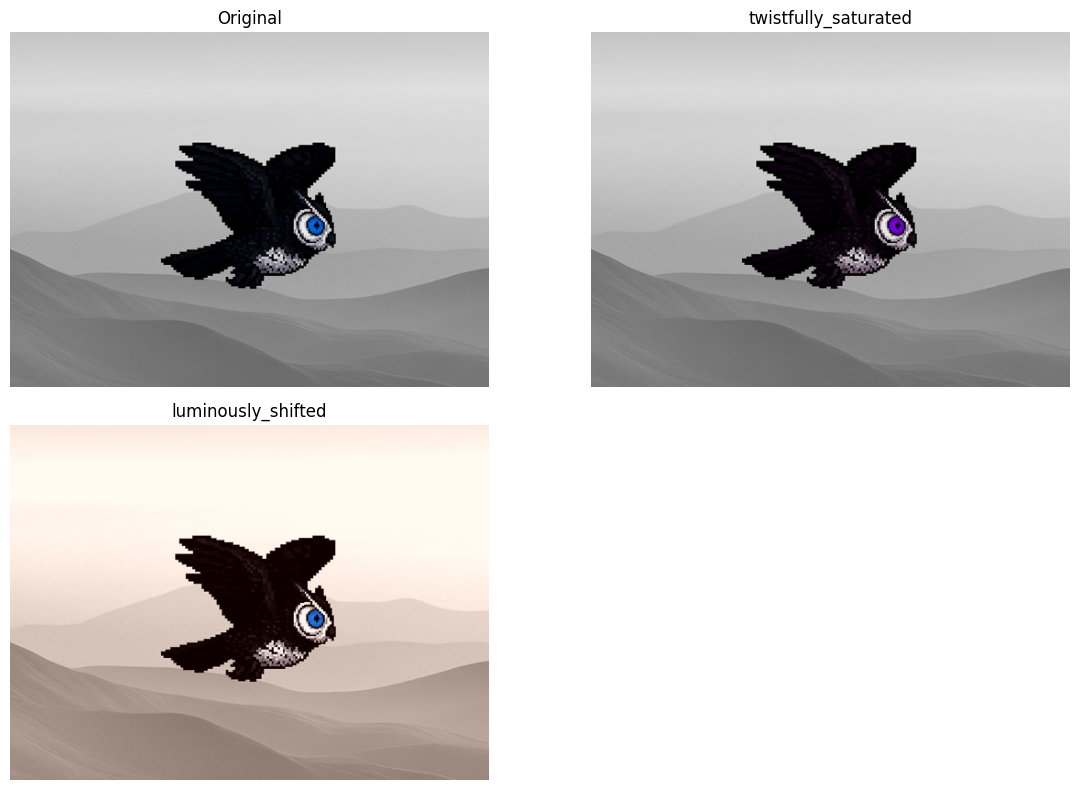

In [ ]:
#filter 1

def twistfully_saturated(img_rgb, sat_factor=1.3):

    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    # 60deg hue rotation as 360 equals 180 in opencv so used 30
    hsv[:, :, 0] = (hsv[:, :, 0] + 30) % 180

    # saturation boost
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * sat_factor, 0, 255)

    # Convert back HSV to RGB
    rgb2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    return rgb2

# this is a just for fun filter it just tries to rotate do
# movements on the color cone on that describes hsv color space

# filter 2

def luminously_shifted(img_rgb, y_boost=1.2, cr_shift=10, cb_shift=-8):
    # Convert RGB to YCrCb
    ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb).astype(np.float32)

    Y  = ycrcb[:,:,0]
    Cr = ycrcb[:,:,1]
    Cb = ycrcb[:,:,2]

    # Luminance Boost (not clipping harshly)
    Y = np.clip(Y * y_boost, 0, 255)


    # Chroma Manipulation
    Cr = np.clip(Cr + cr_shift, 0, 255)   # adds warmth (red tint)
    Cb = np.clip(Cb + cb_shift, 0, 255)   # reduces blue (more orange look)

    # Reassemble channels
    ycrcb2 = np.dstack((Y, Cr, Cb)).astype(np.uint8)

    return cv2.cvtColor(ycrcb2, cv2.COLOR_YCrCb2RGB)

# this one increases the luminosity of the image and
# make the image more warm looking helpful for image
# which you want to show of outdoor on a sunny day


img_twist = twistfully_saturated(img)
img_luminous = luminously_shifted(img)

# display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_twist)
plt.title("twistfully_saturated")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img_luminous)
plt.title("luminously_shifted")
plt.axis("off")

plt.tight_layout()
plt.show()


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

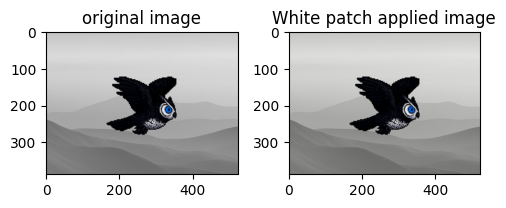

In [ ]:
def white_patch_balance(img_rgb):

  r = img_rgb[:,:,0].astype(np.float32)
  g = img_rgb[:,:,1].astype(np.float32)
  b = img_rgb[:,:,2].astype(np.float32)

  max_r = np.max(r)
  max_g = np.max(g)
  max_b = np.max(b)

  r = r * 255/max_r
  g = g * 255/max_g
  b = b * 255/max_b

  return np.dstack((r,g,b)).astype(np.uint8)

img_WPB = white_patch_balance(img)

plt.figure(figsize=(5,10))
plt.subplot(1,2,1).imshow(img)
plt.title("original image")

plt.subplot(1,2,2).imshow(img_WPB)
plt.title("White patch applied image")

plt.tight_layout()
plt.show()


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.